In [2]:
import numpy as np
import pymc3 as pm
% matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize


Obs from Site A: 

[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

...

Obs from Site B: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

...

In [3]:



figsize(12, 4)

#these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

#notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

#generate some observations
observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from Site A: ", observations_A[:30], "...")
print("Obs from Site B: ", observations_B[:30], "...")


Obs from Site A: 

[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

...

Obs from Site B: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

...

In [4]:
print(np.mean(observations_A))
print(np.mean(observations_B))

0.04933333333333333

0.03866666666666667

In [5]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)

    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)

    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace = trace[1000:]


Multiprocess sampling (2 chains in 2 jobs)

CompoundStep

>Metropolis: [p_B]

>Metropolis: [p_A]

Sampling 2 chains:   0%|          | 0/41000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 5/41000 [00:00<14:37, 46.73draws/s]

Sampling 2 chains:   0%|          | 12/41000 [00:00<13:27, 50.73draws/s]

Sampling 2 chains:   0%|          | 18/41000 [00:00<13:50, 49.34draws/s]

Sampling 2 chains:   0%|          | 25/41000 [00:00<12:51, 53.10draws/s]

Sampling 2 chains:   0%|          | 31/41000 [00:00<12:43, 53.64draws/s]

Sampling 2 chains:   0%|          | 36/41000 [00:00<13:22, 51.01draws/s]

Sampling 2 chains:   0%|          | 44/41000 [00:00<12:33, 54.34draws/s]

Sampling 2 chains:   0%|          | 54/41000 [00:00<11:23, 59.93draws/s]

Sampling 2 chains:   0%|          | 62/41000 [00:01<10:43, 63.57draws/s]

Sampling 2 chains:   0%|          | 70/41000 [00:01<10:10, 67.07draws/s]

Sampling 2 chains:   0%|          | 78/41000 [00:01<09:57, 68.46draws/s]

Sampling 2 chains:   0%|          | 86/41000 [00:01<09:45, 69.83draws/s]

Sampling 2 chains:   0%|          | 95/41000 [00:01<09:18, 73.18draws/s]

Sampling 2 chains:   0%|          | 103/41000 [00:01<09:18, 73.21draws/s]

Sampling 2 chains:   0%|          | 111/41000 [00:01<09:42, 70.22draws/s]

Sampling 2 chains:   0%|          | 119/41000 [00:01<09:34, 71.10draws/s]

Sampling 2 chains:   0%|          | 127/41000 [00:01<09:53, 68.85draws/s]

Sampling 2 chains:   0%|          | 134/41000 [00:02<10:14, 66.54draws/s]

Sampling 2 chains:   0%|          | 141/41000 [00:02<10:12, 66.66draws/s]

Sampling 2 chains:   0%|          | 148/41000 [00:02<10:27, 65.06draws/s]

Sampling 2 chains:   0%|          | 155/41000 [00:02<10:30, 64.77draws/s]

Sampling 2 chains:   0%|          | 162/41000 [00:02<10:59, 61.90draws/s]

Sampling 2 chains:   0%|          | 169/41000 [00:02<10:52, 62.54draws/s]

Sampling 2 chains:   0%|          | 176/41000 [00:02<12:42, 53.57draws/s]

Sampling 2 chains:   0%|          | 182/41000 [00:02<13:12, 51.50draws/s]

Sampling 2 chains:   0%|          | 189/41000 [00:03<12:22, 54.94draws/s]

Sampling 2 chains:   0%|          | 197/41000 [00:03<11:27, 59.39draws/s]

Sampling 2 chains:   0%|          | 205/41000 [00:03<10:54, 62.35draws/s]

Sampling 2 chains:   1%|          | 212/41000 [00:03<11:16, 60.33draws/s]

Sampling 2 chains:   1%|          | 219/41000 [00:03<11:04, 61.41draws/s]

Sampling 2 chains:   1%|          | 226/41000 [00:03<10:55, 62.20draws/s]

Sampling 2 chains:   1%|          | 234/41000 [00:03<10:25, 65.15draws/s]

Sampling 2 chains:   1%|          | 241/41000 [00:03<10:55, 62.14draws/s]

Sampling 2 chains:   1%|          | 249/41000 [00:03<10:25, 65.10draws/s]

Sampling 2 chains:   1%|          | 257/41000 [00:04<10:07, 67.01draws/s]

Sampling 2 chains:   1%|          | 266/41000 [00:04<09:40, 70.16draws/s]

Sampling 2 chains:   1%|          | 274/41000 [00:04<09:25, 71.99draws/s]

Sampling 2 chains:   1%|          | 282/41000 [00:04<09:22, 72.36draws/s]

Sampling 2 chains:   1%|          | 290/41000 [00:04<09:20, 72.63draws/s]

Sampling 2 chains:   1%|          | 298/41000 [00:04<09:18, 72.82draws/s]

Sampling 2 chains:   1%|          | 306/41000 [00:04<09:17, 72.95draws/s]

Sampling 2 chains:   1%|          | 314/41000 [00:04<09:17, 73.04draws/s]

Sampling 2 chains:   1%|          | 322/41000 [00:04<09:16, 73.11draws/s]

Sampling 2 chains:   1%|          | 330/41000 [00:05<09:54, 68.42draws/s]

Sampling 2 chains:   1%|          | 338/41000 [00:05<09:51, 68.76draws/s]

Sampling 2 chains:   1%|          | 346/41000 [00:05<09:56, 68.12draws/s]

Sampling 2 chains:   1%|          | 354/41000 [00:05<09:37, 70.36draws/s]

Sampling 2 chains:   1%|          | 362/41000 [00:05<09:54, 68.36draws/s]

Sampling 2 chains:   1%|          | 370/41000 [00:05<09:36, 70.42draws/s]

Sampling 2 chains:   1%|          | 378/41000 [00:05<09:48, 69.00draws/s]

Sampling 2 chains:   1%|          | 385/41000 [00:05<10:29, 64.54draws/s]

Sampling 2 chains:   1%|          | 392/41000 [00:06<11:45, 57.55draws/s]

Sampling 2 chains:   1%|          | 398/41000 [00:06<11:47, 57.36draws/s]

Sampling 2 chains:   1%|          | 404/41000 [00:06<11:59, 56.45draws/s]

Sampling 2 chains:   1%|          | 412/41000 [00:06<11:37, 58.17draws/s]

Sampling 2 chains:   1%|          | 418/41000 [00:06<12:21, 54.72draws/s]

Sampling 2 chains:   1%|          | 426/41000 [00:06<11:25, 59.22draws/s]

Sampling 2 chains:   1%|          | 434/41000 [00:06<11:10, 60.47draws/s]

Sampling 2 chains:   1%|          | 442/41000 [00:06<10:59, 61.51draws/s]

Sampling 2 chains:   1%|          | 451/41000 [00:06<10:10, 66.43draws/s]

Sampling 2 chains:   1%|          | 458/41000 [00:07<10:22, 65.16draws/s]

Sampling 2 chains:   1%|          | 465/41000 [00:07<10:35, 63.78draws/s]

Sampling 2 chains:   1%|          | 473/41000 [00:07<10:38, 63.51draws/s]

Sampling 2 chains:   1%|          | 481/41000 [00:07<10:12, 66.15draws/s]

Sampling 2 chains:   1%|          | 489/41000 [00:07<10:18, 65.52draws/s]

Sampling 2 chains:   1%|          | 496/41000 [00:07<10:22, 65.09draws/s]

Sampling 2 chains:   1%|          | 503/41000 [00:07<11:19, 59.63draws/s]

Sampling 2 chains:   1%|          | 511/41000 [00:07<10:41, 63.15draws/s]

Sampling 2 chains:   1%|▏         | 518/41000 [00:08<11:12, 60.19draws/s]

Sampling 2 chains:   1%|▏         | 525/41000 [00:08<11:17, 59.78draws/s]

Sampling 2 chains:   1%|▏         | 533/41000 [00:08<10:45, 62.70draws/s]

Sampling 2 chains:   1%|▏         | 540/41000 [00:08<10:33, 63.84draws/s]

Sampling 2 chains:   1%|▏         | 549/41000 [00:08<09:46, 68.94draws/s]

Sampling 2 chains:   1%|▏         | 557/41000 [00:08<09:52, 68.24draws/s]

Sampling 2 chains:   1%|▏         | 564/41000 [00:08<10:07, 66.57draws/s]

Sampling 2 chains:   1%|▏         | 571/41000 [00:08<10:51, 62.03draws/s]

Sampling 2 chains:   1%|▏         | 578/41000 [00:09<12:36, 53.40draws/s]

Sampling 2 chains:   1%|▏         | 585/41000 [00:09<11:46, 57.21draws/s]

Sampling 2 chains:   1%|▏         | 594/41000 [00:09<10:43, 62.75draws/s]

Sampling 2 chains:   1%|▏         | 602/41000 [00:09<10:16, 65.57draws/s]

Sampling 2 chains:   1%|▏         | 611/41000 [00:09<09:38, 69.86draws/s]

Sampling 2 chains:   2%|▏         | 619/41000 [00:09<09:53, 68.03draws/s]

Sampling 2 chains:   2%|▏         | 628/41000 [00:09<09:22, 71.79draws/s]

Sampling 2 chains:   2%|▏         | 636/41000 [00:09<09:18, 72.22draws/s]

Sampling 2 chains:   2%|▏         | 644/41000 [00:09<09:16, 72.53draws/s]

Sampling 2 chains:   2%|▏         | 652/41000 [00:10<09:24, 71.50draws/s]

Sampling 2 chains:   2%|▏         | 660/41000 [00:10<10:00, 67.19draws/s]

Sampling 2 chains:   2%|▏         | 667/41000 [00:10<10:15, 65.56draws/s]

Sampling 2 chains:   2%|▏         | 676/41000 [00:10<09:58, 67.40draws/s]

Sampling 2 chains:   2%|▏         | 683/41000 [00:10<10:07, 66.38draws/s]

Sampling 2 chains:   2%|▏         | 690/41000 [00:10<11:07, 60.38draws/s]

Sampling 2 chains:   2%|▏         | 698/41000 [00:10<10:32, 63.74draws/s]

Sampling 2 chains:   2%|▏         | 706/41000 [00:10<10:31, 63.85draws/s]

Sampling 2 chains:   2%|▏         | 714/41000 [00:10<10:06, 66.41draws/s]

Sampling 2 chains:   2%|▏         | 722/41000 [00:11<09:43, 69.07draws/s]

Sampling 2 chains:   2%|▏         | 730/41000 [00:11<09:36, 69.91draws/s]

Sampling 2 chains:   2%|▏         | 738/41000 [00:11<11:05, 60.52draws/s]

Sampling 2 chains:   2%|▏         | 745/41000 [00:11<10:54, 61.55draws/s]

Sampling 2 chains:   2%|▏         | 753/41000 [00:11<10:22, 64.65draws/s]

Sampling 2 chains:   2%|▏         | 760/41000 [00:11<10:24, 64.49draws/s]

Sampling 2 chains:   2%|▏         | 767/41000 [00:11<10:51, 61.71draws/s]

Sampling 2 chains:   2%|▏         | 775/41000 [00:11<10:44, 62.41draws/s]

Sampling 2 chains:   2%|▏         | 783/41000 [00:12<10:34, 63.39draws/s]

Sampling 2 chains:   2%|▏         | 791/41000 [00:12<10:12, 65.67draws/s]

Sampling 2 chains:   2%|▏         | 800/41000 [00:12<09:37, 69.61draws/s]

Sampling 2 chains:   2%|▏         | 808/41000 [00:12<09:55, 67.52draws/s]

Sampling 2 chains:   2%|▏         | 815/41000 [00:12<10:04, 66.45draws/s]

Sampling 2 chains:   2%|▏         | 822/41000 [00:12<10:38, 62.96draws/s]

Sampling 2 chains:   2%|▏         | 830/41000 [00:12<10:11, 65.74draws/s]

Sampling 2 chains:   2%|▏         | 837/41000 [00:12<11:09, 60.00draws/s]

Sampling 2 chains:   2%|▏         | 844/41000 [00:13<11:04, 60.38draws/s]

Sampling 2 chains:   2%|▏         | 854/41000 [00:13<10:07, 66.14draws/s]

Sampling 2 chains:   2%|▏         | 861/41000 [00:13<10:42, 62.43draws/s]

Sampling 2 chains:   2%|▏         | 868/41000 [00:13<11:04, 60.38draws/s]

Sampling 2 chains:   2%|▏         | 875/41000 [00:13<10:52, 61.45draws/s]

Sampling 2 chains:   2%|▏         | 882/41000 [00:13<10:44, 62.22draws/s]

Sampling 2 chains:   2%|▏         | 890/41000 [00:13<10:38, 62.78draws/s]

Sampling 2 chains:   2%|▏         | 900/41000 [00:13<09:38, 69.32draws/s]

Sampling 2 chains:   2%|▏         | 908/41000 [00:13<09:52, 67.66draws/s]

Sampling 2 chains:   2%|▏         | 915/41000 [00:14<10:06, 66.10draws/s]

Sampling 2 chains:   2%|▏         | 922/41000 [00:14<10:29, 63.70draws/s]

Sampling 2 chains:   2%|▏         | 929/41000 [00:14<11:13, 59.46draws/s]

Sampling 2 chains:   2%|▏         | 938/41000 [00:14<10:17, 64.88draws/s]

Sampling 2 chains:   2%|▏         | 945/41000 [00:14<10:19, 64.65draws/s]

Sampling 2 chains:   2%|▏         | 952/41000 [00:14<10:47, 61.82draws/s]

Sampling 2 chains:   2%|▏         | 959/41000 [00:14<10:40, 62.49draws/s]

Sampling 2 chains:   2%|▏         | 967/41000 [00:14<10:35, 62.96draws/s]

Sampling 2 chains:   2%|▏         | 974/41000 [00:15<10:46, 61.89draws/s]

Sampling 2 chains:   2%|▏         | 983/41000 [00:15<10:20, 64.53draws/s]

Sampling 2 chains:   2%|▏         | 991/41000 [00:15<10:00, 66.59draws/s]

Sampling 2 chains:   2%|▏         | 998/41000 [00:15<10:37, 62.71draws/s]

Sampling 2 chains:   2%|▏         | 1005/41000 [00:15<10:33, 63.12draws/s]

Sampling 2 chains:   2%|▏         | 1014/41000 [00:15<09:48, 67.89draws/s]

Sampling 2 chains:   2%|▏         | 1021/41000 [00:15<10:52, 61.24draws/s]

Sampling 2 chains:   3%|▎         | 1028/41000 [00:15<11:10, 59.60draws/s]

Sampling 2 chains:   3%|▎         | 1036/41000 [00:15<10:56, 60.88draws/s]

Sampling 2 chains:   3%|▎         | 1044/41000 [00:16<10:32, 63.13draws/s]

Sampling 2 chains:   3%|▎         | 1052/41000 [00:16<10:08, 65.70draws/s]

Sampling 2 chains:   3%|▎         | 1059/41000 [00:16<10:39, 62.49draws/s]

Sampling 2 chains:   3%|▎         | 1067/41000 [00:16<10:10, 65.37draws/s]

Sampling 2 chains:   3%|▎         | 1076/41000 [00:16<09:32, 69.70draws/s]

Sampling 2 chains:   3%|▎         | 1084/41000 [00:16<09:49, 67.75draws/s]

Sampling 2 chains:   3%|▎         | 1091/41000 [00:16<10:25, 63.77draws/s]

Sampling 2 chains:   3%|▎         | 1100/41000 [00:16<09:43, 68.41draws/s]

Sampling 2 chains:   3%|▎         | 1108/41000 [00:17<10:11, 65.29draws/s]

Sampling 2 chains:   3%|▎         | 1115/41000 [00:17<10:21, 64.21draws/s]

Sampling 2 chains:   3%|▎         | 1122/41000 [00:17<10:24, 63.83draws/s]

Sampling 2 chains:   3%|▎         | 1130/41000 [00:17<10:05, 65.90draws/s]

Sampling 2 chains:   3%|▎         | 1139/41000 [00:17<09:28, 70.12draws/s]

Sampling 2 chains:   3%|▎         | 1147/41000 [00:17<09:44, 68.20draws/s]

Sampling 2 chains:   3%|▎         | 1155/41000 [00:17<09:55, 66.91draws/s]

Sampling 2 chains:   3%|▎         | 1163/41000 [00:17<09:39, 68.70draws/s]

Sampling 2 chains:   3%|▎         | 1170/41000 [00:17<10:18, 64.36draws/s]

Sampling 2 chains:   3%|▎         | 1177/41000 [00:18<10:48, 61.44draws/s]

Sampling 2 chains:   3%|▎         | 1187/41000 [00:18<10:04, 65.88draws/s]

Sampling 2 chains:   3%|▎         | 1196/41000 [00:18<09:30, 69.77draws/s]

Sampling 2 chains:   3%|▎         | 1205/41000 [00:18<09:05, 72.96draws/s]

Sampling 2 chains:   3%|▎         | 1213/41000 [00:18<09:27, 70.06draws/s]

Sampling 2 chains:   3%|▎         | 1221/41000 [00:18<10:06, 65.54draws/s]

Sampling 2 chains:   3%|▎         | 1228/41000 [00:18<10:10, 65.10draws/s]

Sampling 2 chains:   3%|▎         | 1235/41000 [00:18<10:40, 62.11draws/s]

Sampling 2 chains:   3%|▎         | 1242/41000 [00:19<10:30, 63.07draws/s]

Sampling 2 chains:   3%|▎         | 1250/41000 [00:19<10:19, 64.17draws/s]

Sampling 2 chains:   3%|▎         | 1258/41000 [00:19<09:59, 66.32draws/s]

Sampling 2 chains:   3%|▎         | 1266/41000 [00:19<09:45, 67.91draws/s]

Sampling 2 chains:   3%|▎         | 1274/41000 [00:19<09:32, 69.43draws/s]

Sampling 2 chains:   3%|▎         | 1282/41000 [00:19<09:46, 67.74draws/s]

Sampling 2 chains:   3%|▎         | 1290/41000 [00:19<09:32, 69.31draws/s]

Sampling 2 chains:   3%|▎         | 1297/41000 [00:19<10:13, 64.73draws/s]

Sampling 2 chains:   3%|▎         | 1304/41000 [00:19<10:31, 62.91draws/s]

Sampling 2 chains:   3%|▎         | 1311/41000 [00:20<11:01, 60.04draws/s]

Sampling 2 chains:   3%|▎         | 1318/41000 [00:20<11:16, 58.68draws/s]

Sampling 2 chains:   3%|▎         | 1324/41000 [00:20<12:25, 53.22draws/s]

Sampling 2 chains:   3%|▎         | 1331/41000 [00:20<11:49, 55.94draws/s]

Sampling 2 chains:   3%|▎         | 1339/41000 [00:20<10:58, 60.21draws/s]

Sampling 2 chains:   3%|▎         | 1346/41000 [00:20<10:46, 61.33draws/s]

Sampling 2 chains:   3%|▎         | 1354/41000 [00:20<10:14, 64.48draws/s]

Sampling 2 chains:   3%|▎         | 1362/41000 [00:20<09:52, 66.88draws/s]

Sampling 2 chains:   3%|▎         | 1369/41000 [00:21<09:53, 66.82draws/s]

Sampling 2 chains:   3%|▎         | 1378/41000 [00:21<09:32, 69.21draws/s]

Sampling 2 chains:   3%|▎         | 1386/41000 [00:21<10:49, 61.03draws/s]

Sampling 2 chains:   3%|▎         | 1393/41000 [00:21<10:39, 61.92draws/s]

Sampling 2 chains:   3%|▎         | 1402/41000 [00:21<09:51, 66.91draws/s]

Sampling 2 chains:   3%|▎         | 1409/41000 [00:21<10:25, 63.25draws/s]

Sampling 2 chains:   3%|▎         | 1416/41000 [00:21<10:51, 60.76draws/s]

Sampling 2 chains:   3%|▎         | 1424/41000 [00:21<10:18, 64.04draws/s]

Sampling 2 chains:   3%|▎         | 1431/41000 [00:22<10:38, 61.95draws/s]

Sampling 2 chains:   4%|▎         | 1439/41000 [00:22<10:16, 64.14draws/s]

Sampling 2 chains:   4%|▎         | 1446/41000 [00:22<11:14, 58.62draws/s]

Sampling 2 chains:   4%|▎         | 1454/41000 [00:22<10:34, 62.36draws/s]

Sampling 2 chains:   4%|▎         | 1461/41000 [00:22<10:28, 62.87draws/s]

Sampling 2 chains:   4%|▎         | 1470/41000 [00:22<09:46, 67.38draws/s]

Sampling 2 chains:   4%|▎         | 1477/41000 [00:22<10:21, 63.55draws/s]

Sampling 2 chains:   4%|▎         | 1485/41000 [00:22<09:57, 66.18draws/s]

Sampling 2 chains:   4%|▎         | 1492/41000 [00:22<10:02, 65.54draws/s]

Sampling 2 chains:   4%|▎         | 1499/41000 [00:23<10:03, 65.51draws/s]

Sampling 2 chains:   4%|▎         | 1508/41000 [00:23<09:24, 69.90draws/s]

Sampling 2 chains:   4%|▎         | 1516/41000 [00:23<09:43, 67.71draws/s]

Sampling 2 chains:   4%|▎         | 1523/41000 [00:23<09:52, 66.58draws/s]

Sampling 2 chains:   4%|▎         | 1531/41000 [00:23<09:38, 68.28draws/s]

Sampling 2 chains:   4%|▍         | 1539/41000 [00:23<09:49, 66.97draws/s]

Sampling 2 chains:   4%|▍         | 1549/41000 [00:23<09:20, 70.44draws/s]

Sampling 2 chains:   4%|▍         | 1559/41000 [00:23<08:59, 73.09draws/s]

Sampling 2 chains:   4%|▍         | 1567/41000 [00:24<10:13, 64.23draws/s]

Sampling 2 chains:   4%|▍         | 1575/41000 [00:24<09:42, 67.64draws/s]

Sampling 2 chains:   4%|▍         | 1582/41000 [00:24<09:55, 66.16draws/s]

Sampling 2 chains:   4%|▍         | 1591/41000 [00:24<09:20, 70.32draws/s]

Sampling 2 chains:   4%|▍         | 1599/41000 [00:24<09:59, 65.71draws/s]

Sampling 2 chains:   4%|▍         | 1607/41000 [00:24<10:04, 65.22draws/s]

Sampling 2 chains:   4%|▍         | 1616/41000 [00:24<09:26, 69.57draws/s]

Sampling 2 chains:   4%|▍         | 1624/41000 [00:24<10:03, 65.25draws/s]

Sampling 2 chains:   4%|▍         | 1632/41000 [00:25<10:26, 62.85draws/s]

Sampling 2 chains:   4%|▍         | 1639/41000 [00:25<10:26, 62.85draws/s]

Sampling 2 chains:   4%|▍         | 1646/41000 [00:25<10:40, 61.42draws/s]

Sampling 2 chains:   4%|▍         | 1654/41000 [00:25<10:16, 63.81draws/s]

Sampling 2 chains:   4%|▍         | 1662/41000 [00:25<10:01, 65.43draws/s]

Sampling 2 chains:   4%|▍         | 1670/41000 [00:25<09:53, 66.29draws/s]

Sampling 2 chains:   4%|▍         | 1678/41000 [00:25<09:42, 67.48draws/s]

Sampling 2 chains:   4%|▍         | 1685/41000 [00:25<10:18, 63.60draws/s]

Sampling 2 chains:   4%|▍         | 1692/41000 [00:25<10:42, 61.15draws/s]

Sampling 2 chains:   4%|▍         | 1699/41000 [00:26<10:58, 59.66draws/s]

Sampling 2 chains:   4%|▍         | 1708/41000 [00:26<10:07, 64.63draws/s]

Sampling 2 chains:   4%|▍         | 1715/41000 [00:26<10:28, 62.53draws/s]

Sampling 2 chains:   4%|▍         | 1725/41000 [00:26<09:32, 68.65draws/s]

Sampling 2 chains:   4%|▍         | 1733/41000 [00:26<09:44, 67.22draws/s]

Sampling 2 chains:   4%|▍         | 1742/41000 [00:26<09:11, 71.16draws/s]

Sampling 2 chains:   4%|▍         | 1751/41000 [00:26<09:09, 71.44draws/s]

Sampling 2 chains:   4%|▍         | 1761/41000 [00:26<08:51, 73.84draws/s]

Sampling 2 chains:   4%|▍         | 1769/41000 [00:27<09:51, 66.37draws/s]

Sampling 2 chains:   4%|▍         | 1776/41000 [00:27<09:47, 66.76draws/s]

Sampling 2 chains:   4%|▍         | 1784/41000 [00:27<09:37, 67.89draws/s]

Sampling 2 chains:   4%|▍         | 1791/41000 [00:27<09:47, 66.71draws/s]

Sampling 2 chains:   4%|▍         | 1799/41000 [00:27<09:33, 68.37draws/s]

Sampling 2 chains:   4%|▍         | 1808/41000 [00:27<09:05, 71.88draws/s]

Sampling 2 chains:   4%|▍         | 1817/41000 [00:27<08:44, 74.75draws/s]

Sampling 2 chains:   4%|▍         | 1825/41000 [00:27<08:47, 74.30draws/s]

Sampling 2 chains:   4%|▍         | 1833/41000 [00:27<08:49, 73.98draws/s]

Sampling 2 chains:   4%|▍         | 1841/41000 [00:28<09:36, 67.94draws/s]

Sampling 2 chains:   5%|▍         | 1849/41000 [00:28<09:14, 70.59draws/s]

Sampling 2 chains:   5%|▍         | 1857/41000 [00:28<09:40, 67.40draws/s]

Sampling 2 chains:   5%|▍         | 1864/41000 [00:28<10:15, 63.56draws/s]

Sampling 2 chains:   5%|▍         | 1871/41000 [00:28<10:40, 61.12draws/s]

Sampling 2 chains:   5%|▍         | 1878/41000 [00:28<11:23, 57.24draws/s]

Sampling 2 chains:   5%|▍         | 1884/41000 [00:28<11:31, 56.53draws/s]

Sampling 2 chains:   5%|▍         | 1891/41000 [00:28<11:07, 58.61draws/s]

Sampling 2 chains:   5%|▍         | 1897/41000 [00:29<11:56, 54.60draws/s]

Sampling 2 chains:   5%|▍         | 1903/41000 [00:29<11:56, 54.59draws/s]

Sampling 2 chains:   5%|▍         | 1909/41000 [00:29<11:56, 54.54draws/s]

Sampling 2 chains:   5%|▍         | 1916/41000 [00:29<11:50, 55.00draws/s]

Sampling 2 chains:   5%|▍         | 1923/41000 [00:29<11:20, 57.45draws/s]

Sampling 2 chains:   5%|▍         | 1929/41000 [00:29<11:29, 56.67draws/s]

Sampling 2 chains:   5%|▍         | 1937/41000 [00:29<11:05, 58.71draws/s]

Sampling 2 chains:   5%|▍         | 1945/41000 [00:29<10:25, 62.43draws/s]

Sampling 2 chains:   5%|▍         | 1953/41000 [00:29<09:57, 65.33draws/s]

Sampling 2 chains:   5%|▍         | 1961/41000 [00:30<10:09, 64.08draws/s]

Sampling 2 chains:   5%|▍         | 1969/41000 [00:30<10:31, 61.77draws/s]

Sampling 2 chains:   5%|▍         | 1977/41000 [00:30<10:02, 64.82draws/s]

Sampling 2 chains:   5%|▍         | 1985/41000 [00:30<09:41, 67.14draws/s]

Sampling 2 chains:   5%|▍         | 1993/41000 [00:30<09:26, 68.87draws/s]

Sampling 2 chains:   5%|▍         | 2000/41000 [00:30<09:38, 67.37draws/s]

Sampling 2 chains:   5%|▍         | 2007/41000 [00:30<10:39, 60.94draws/s]

Sampling 2 chains:   5%|▍         | 2014/41000 [00:30<10:30, 61.86draws/s]

Sampling 2 chains:   5%|▍         | 2021/41000 [00:31<10:46, 60.29draws/s]

Sampling 2 chains:   5%|▍         | 2028/41000 [00:31<10:44, 60.43draws/s]

Sampling 2 chains:   5%|▍         | 2036/41000 [00:31<10:09, 63.96draws/s]

Sampling 2 chains:   5%|▍         | 2043/41000 [00:31<10:08, 64.01draws/s]

Sampling 2 chains:   5%|▌         | 2050/41000 [00:31<10:08, 64.03draws/s]

Sampling 2 chains:   5%|▌         | 2058/41000 [00:31<09:45, 66.55draws/s]

Sampling 2 chains:   5%|▌         | 2066/41000 [00:31<09:30, 68.25draws/s]

Sampling 2 chains:   5%|▌         | 2073/41000 [00:31<09:41, 66.95draws/s]

Sampling 2 chains:   5%|▌         | 2080/41000 [00:31<09:49, 66.07draws/s]

Sampling 2 chains:   5%|▌         | 2087/41000 [00:32<10:04, 64.42draws/s]

Sampling 2 chains:   5%|▌         | 2094/41000 [00:32<10:23, 62.43draws/s]

Sampling 2 chains:   5%|▌         | 2101/41000 [00:32<11:00, 58.86draws/s]

Sampling 2 chains:   5%|▌         | 2107/41000 [00:32<11:22, 57.00draws/s]

Sampling 2 chains:   5%|▌         | 2113/41000 [00:32<11:19, 57.21draws/s]

Sampling 2 chains:   5%|▌         | 2120/41000 [00:32<10:57, 59.15draws/s]

Sampling 2 chains:   5%|▌         | 2126/41000 [00:32<11:19, 57.19draws/s]

Sampling 2 chains:   5%|▌         | 2132/41000 [00:32<11:33, 56.06draws/s]

Sampling 2 chains:   5%|▌         | 2138/41000 [00:32<11:27, 56.54draws/s]

Sampling 2 chains:   5%|▌         | 2144/41000 [00:33<11:28, 56.40draws/s]

Sampling 2 chains:   5%|▌         | 2151/41000 [00:33<10:50, 59.74draws/s]

Sampling 2 chains:   5%|▌         | 2159/41000 [00:33<10:10, 63.63draws/s]

Sampling 2 chains:   5%|▌         | 2166/41000 [00:33<10:10, 63.60draws/s]

Sampling 2 chains:   5%|▌         | 2173/41000 [00:33<10:35, 61.14draws/s]

Sampling 2 chains:   5%|▌         | 2180/41000 [00:33<10:52, 59.53draws/s]

Sampling 2 chains:   5%|▌         | 2187/41000 [00:33<10:38, 60.83draws/s]

Sampling 2 chains:   5%|▌         | 2194/41000 [00:33<10:54, 59.33draws/s]

Sampling 2 chains:   5%|▌         | 2201/41000 [00:33<10:39, 60.68draws/s]

Sampling 2 chains:   5%|▌         | 2209/41000 [00:34<10:22, 62.36draws/s]

Sampling 2 chains:   5%|▌         | 2217/41000 [00:34<09:45, 66.18draws/s]

Sampling 2 chains:   5%|▌         | 2225/41000 [00:34<09:53, 65.38draws/s]

Sampling 2 chains:   5%|▌         | 2233/41000 [00:34<09:36, 67.22draws/s]

Sampling 2 chains:   5%|▌         | 2243/41000 [00:34<08:50, 73.05draws/s]

Sampling 2 chains:   5%|▌         | 2251/41000 [00:34<09:35, 67.35draws/s]

Sampling 2 chains:   6%|▌         | 2260/41000 [00:34<09:03, 71.26draws/s]

Sampling 2 chains:   6%|▌         | 2268/41000 [00:34<08:59, 71.85draws/s]

Sampling 2 chains:   6%|▌         | 2276/41000 [00:35<10:08, 63.64draws/s]

Sampling 2 chains:   6%|▌         | 2284/41000 [00:35<09:33, 67.53draws/s]

Sampling 2 chains:   6%|▌         | 2292/41000 [00:35<09:19, 69.15draws/s]

Sampling 2 chains:   6%|▌         | 2300/41000 [00:35<09:10, 70.33draws/s]

Sampling 2 chains:   6%|▌         | 2308/41000 [00:35<09:50, 65.55draws/s]

Sampling 2 chains:   6%|▌         | 2316/41000 [00:35<09:54, 65.11draws/s]

Sampling 2 chains:   6%|▌         | 2323/41000 [00:35<10:22, 62.11draws/s]

Sampling 2 chains:   6%|▌         | 2330/41000 [00:35<10:42, 60.17draws/s]

Sampling 2 chains:   6%|▌         | 2339/41000 [00:35<09:50, 65.48draws/s]

Sampling 2 chains:   6%|▌         | 2346/41000 [00:36<09:59, 64.45draws/s]

Sampling 2 chains:   6%|▌         | 2354/41000 [00:36<09:39, 66.69draws/s]

Sampling 2 chains:   6%|▌         | 2362/41000 [00:36<09:23, 68.54draws/s]

Sampling 2 chains:   6%|▌         | 2372/41000 [00:36<08:59, 71.65draws/s]

Sampling 2 chains:   6%|▌         | 2380/41000 [00:36<08:51, 72.63draws/s]

Sampling 2 chains:   6%|▌         | 2388/41000 [00:36<09:12, 69.84draws/s]

Sampling 2 chains:   6%|▌         | 2396/41000 [00:36<09:59, 64.40draws/s]

Sampling 2 chains:   6%|▌         | 2403/41000 [00:36<10:11, 63.13draws/s]

Sampling 2 chains:   6%|▌         | 2410/41000 [00:37<11:25, 56.26draws/s]

Sampling 2 chains:   6%|▌         | 2417/41000 [00:37<10:50, 59.33draws/s]

Sampling 2 chains:   6%|▌         | 2424/41000 [00:37<11:16, 57.01draws/s]

Sampling 2 chains:   6%|▌         | 2430/41000 [00:37<11:35, 55.46draws/s]

Sampling 2 chains:   6%|▌         | 2436/41000 [00:37<11:27, 56.11draws/s]

Sampling 2 chains:   6%|▌         | 2442/41000 [00:37<11:48, 54.42draws/s]

Sampling 2 chains:   6%|▌         | 2449/41000 [00:37<11:19, 56.76draws/s]

Sampling 2 chains:   6%|▌         | 2456/41000 [00:37<10:47, 59.53draws/s]

Sampling 2 chains:   6%|▌         | 2463/41000 [00:38<11:32, 55.61draws/s]

Sampling 2 chains:   6%|▌         | 2470/41000 [00:38<11:31, 55.75draws/s]

Sampling 2 chains:   6%|▌         | 2476/41000 [00:38<12:00, 53.43draws/s]

Sampling 2 chains:   6%|▌         | 2483/41000 [00:38<11:24, 56.24draws/s]

Sampling 2 chains:   6%|▌         | 2489/41000 [00:38<11:29, 55.85draws/s]

Sampling 2 chains:   6%|▌         | 2498/41000 [00:38<10:44, 59.78draws/s]

Sampling 2 chains:   6%|▌         | 2506/41000 [00:38<10:30, 61.01draws/s]

Sampling 2 chains:   6%|▌         | 2514/41000 [00:38<09:59, 64.24draws/s]

Sampling 2 chains:   6%|▌         | 2522/41000 [00:38<09:36, 66.70draws/s]

Sampling 2 chains:   6%|▌         | 2530/41000 [00:39<09:44, 65.77draws/s]

Sampling 2 chains:   6%|▌         | 2538/41000 [00:39<09:34, 67.00draws/s]

Sampling 2 chains:   6%|▌         | 2545/41000 [00:39<09:34, 66.90draws/s]

Sampling 2 chains:   6%|▌         | 2554/41000 [00:39<09:02, 70.90draws/s]

Sampling 2 chains:   6%|▌         | 2562/41000 [00:39<09:19, 68.72draws/s]

Sampling 2 chains:   6%|▋         | 2569/41000 [00:39<09:31, 67.26draws/s]

Sampling 2 chains:   6%|▋         | 2576/41000 [00:39<09:39, 66.28draws/s]

Sampling 2 chains:   6%|▋         | 2583/41000 [00:39<09:45, 65.61draws/s]

Sampling 2 chains:   6%|▋         | 2591/41000 [00:40<09:46, 65.50draws/s]

Sampling 2 chains:   6%|▋         | 2598/41000 [00:40<09:47, 65.37draws/s]

Sampling 2 chains:   6%|▋         | 2605/41000 [00:40<10:50, 59.06draws/s]

Sampling 2 chains:   6%|▋         | 2614/41000 [00:40<09:54, 64.55draws/s]

Sampling 2 chains:   6%|▋         | 2622/41000 [00:40<09:33, 66.94draws/s]

Sampling 2 chains:   6%|▋         | 2629/41000 [00:40<10:06, 63.27draws/s]

Sampling 2 chains:   6%|▋         | 2636/41000 [00:40<10:04, 63.52draws/s]

Sampling 2 chains:   6%|▋         | 2643/41000 [00:40<10:02, 63.69draws/s]

Sampling 2 chains:   6%|▋         | 2652/41000 [00:40<09:40, 66.00draws/s]

Sampling 2 chains:   6%|▋         | 2660/41000 [00:41<10:11, 62.74draws/s]

Sampling 2 chains:   7%|▋         | 2667/41000 [00:41<09:59, 63.94draws/s]

Sampling 2 chains:   7%|▋         | 2674/41000 [00:41<10:29, 60.88draws/s]

Sampling 2 chains:   7%|▋         | 2682/41000 [00:41<10:22, 61.53draws/s]

Sampling 2 chains:   7%|▋         | 2690/41000 [00:41<10:15, 62.28draws/s]

Sampling 2 chains:   7%|▋         | 2698/41000 [00:41<09:47, 65.21draws/s]

Sampling 2 chains:   7%|▋         | 2705/41000 [00:41<09:50, 64.88draws/s]

Sampling 2 chains:   7%|▋         | 2712/41000 [00:41<11:09, 57.22draws/s]

Sampling 2 chains:   7%|▋         | 2720/41000 [00:42<10:25, 61.24draws/s]

Sampling 2 chains:   7%|▋         | 2730/41000 [00:42<09:43, 65.59draws/s]

Sampling 2 chains:   7%|▋         | 2738/41000 [00:42<09:52, 64.60draws/s]

Sampling 2 chains:   7%|▋         | 2746/41000 [00:42<09:31, 66.98draws/s]

Sampling 2 chains:   7%|▋         | 2753/41000 [00:42<10:05, 63.12draws/s]

Sampling 2 chains:   7%|▋         | 2760/41000 [00:42<10:03, 63.41draws/s]

Sampling 2 chains:   7%|▋         | 2768/41000 [00:42<09:38, 66.08draws/s]

Sampling 2 chains:   7%|▋         | 2776/41000 [00:42<09:43, 65.47draws/s]

Sampling 2 chains:   7%|▋         | 2786/41000 [00:43<09:39, 65.93draws/s]

Sampling 2 chains:   7%|▋         | 2795/41000 [00:43<09:02, 70.44draws/s]

Sampling 2 chains:   7%|▋         | 2803/41000 [00:43<08:58, 70.88draws/s]

Sampling 2 chains:   7%|▋         | 2811/41000 [00:43<08:54, 71.39draws/s]

Sampling 2 chains:   7%|▋         | 2819/41000 [00:43<09:35, 66.35draws/s]

Sampling 2 chains:   7%|▋         | 2826/41000 [00:43<10:06, 62.90draws/s]

Sampling 2 chains:   7%|▋         | 2833/41000 [00:43<10:28, 60.69draws/s]

Sampling 2 chains:   7%|▋         | 2840/41000 [00:43<11:09, 56.98draws/s]

Sampling 2 chains:   7%|▋         | 2846/41000 [00:44<11:42, 54.30draws/s]

Sampling 2 chains:   7%|▋         | 2852/41000 [00:44<11:45, 54.08draws/s]

Sampling 2 chains:   7%|▋         | 2858/41000 [00:44<11:41, 54.37draws/s]

Sampling 2 chains:   7%|▋         | 2864/41000 [00:44<12:08, 52.31draws/s]

Sampling 2 chains:   7%|▋         | 2870/41000 [00:44<11:58, 53.08draws/s]

Sampling 2 chains:   7%|▋         | 2876/41000 [00:44<12:20, 51.47draws/s]

Sampling 2 chains:   7%|▋         | 2882/41000 [00:44<12:36, 50.40draws/s]

Sampling 2 chains:   7%|▋         | 2888/41000 [00:44<12:17, 51.68draws/s]

Sampling 2 chains:   7%|▋         | 2894/41000 [00:44<12:33, 50.55draws/s]

Sampling 2 chains:   7%|▋         | 2900/41000 [00:45<12:12, 52.03draws/s]

Sampling 2 chains:   7%|▋         | 2906/41000 [00:45<12:03, 52.68draws/s]

Sampling 2 chains:   7%|▋         | 2912/41000 [00:45<11:41, 54.32draws/s]

Sampling 2 chains:   7%|▋         | 2918/41000 [00:45<11:38, 54.51draws/s]

Sampling 2 chains:   7%|▋         | 2924/41000 [00:45<11:36, 54.64draws/s]

Sampling 2 chains:   7%|▋         | 2933/41000 [00:45<10:27, 60.66draws/s]

Sampling 2 chains:   7%|▋         | 2940/41000 [00:45<10:42, 59.21draws/s]

Sampling 2 chains:   7%|▋         | 2948/41000 [00:45<10:05, 62.83draws/s]

Sampling 2 chains:   7%|▋         | 2956/41000 [00:45<09:39, 65.63draws/s]

Sampling 2 chains:   7%|▋         | 2963/41000 [00:46<11:11, 56.68draws/s]

Sampling 2 chains:   7%|▋         | 2971/41000 [00:46<10:28, 60.48draws/s]

Sampling 2 chains:   7%|▋         | 2978/41000 [00:46<10:19, 61.36draws/s]

Sampling 2 chains:   7%|▋         | 2986/41000 [00:46<09:49, 64.50draws/s]

Sampling 2 chains:   7%|▋         | 2993/41000 [00:46<09:50, 64.38draws/s]

Sampling 2 chains:   7%|▋         | 3000/41000 [00:46<10:41, 59.21draws/s]

Sampling 2 chains:   7%|▋         | 3007/41000 [00:46<10:28, 60.44draws/s]

Sampling 2 chains:   7%|▋         | 3014/41000 [00:46<10:17, 61.49draws/s]

Sampling 2 chains:   7%|▋         | 3022/41000 [00:47<09:46, 64.73draws/s]

Sampling 2 chains:   7%|▋         | 3029/41000 [00:47<10:16, 61.58draws/s]

Sampling 2 chains:   7%|▋         | 3036/41000 [00:47<10:15, 61.72draws/s]

Sampling 2 chains:   7%|▋         | 3044/41000 [00:47<09:45, 64.78draws/s]

Sampling 2 chains:   7%|▋         | 3051/41000 [00:47<09:47, 64.58draws/s]

Sampling 2 chains:   7%|▋         | 3058/41000 [00:47<11:04, 57.06draws/s]

Sampling 2 chains:   7%|▋         | 3064/41000 [00:47<11:42, 54.03draws/s]

Sampling 2 chains:   7%|▋         | 3070/41000 [00:47<12:37, 50.06draws/s]

Sampling 2 chains:   8%|▊         | 3076/41000 [00:48<12:24, 50.93draws/s]

Sampling 2 chains:   8%|▊         | 3082/41000 [00:48<11:53, 53.13draws/s]

Sampling 2 chains:   8%|▊         | 3091/41000 [00:48<10:37, 59.47draws/s]

Sampling 2 chains:   8%|▊         | 3099/41000 [00:48<10:26, 60.51draws/s]

Sampling 2 chains:   8%|▊         | 3107/41000 [00:48<09:56, 63.54draws/s]

Sampling 2 chains:   8%|▊         | 3114/41000 [00:48<09:54, 63.71draws/s]

Sampling 2 chains:   8%|▊         | 3121/41000 [00:48<09:55, 63.65draws/s]

Sampling 2 chains:   8%|▊         | 3128/41000 [00:48<09:53, 63.79draws/s]

Sampling 2 chains:   8%|▊         | 3135/41000 [00:48<09:52, 63.88draws/s]

Sampling 2 chains:   8%|▊         | 3143/41000 [00:49<09:45, 64.69draws/s]

Sampling 2 chains:   8%|▊         | 3150/41000 [00:49<09:34, 65.86draws/s]

Sampling 2 chains:   8%|▊         | 3157/41000 [00:49<10:36, 59.46draws/s]

Sampling 2 chains:   8%|▊         | 3165/41000 [00:49<10:00, 63.02draws/s]

Sampling 2 chains:   8%|▊         | 3172/41000 [00:49<09:57, 63.34draws/s]

Sampling 2 chains:   8%|▊         | 3179/41000 [00:49<09:56, 63.40draws/s]

Sampling 2 chains:   8%|▊         | 3186/41000 [00:49<09:54, 63.61draws/s]

Sampling 2 chains:   8%|▊         | 3194/41000 [00:49<09:30, 66.22draws/s]

Sampling 2 chains:   8%|▊         | 3201/41000 [00:49<10:01, 62.82draws/s]

Sampling 2 chains:   8%|▊         | 3208/41000 [00:50<10:37, 59.31draws/s]

Sampling 2 chains:   8%|▊         | 3216/41000 [00:50<09:58, 63.08draws/s]

Sampling 2 chains:   8%|▊         | 3224/41000 [00:50<09:50, 64.02draws/s]

Sampling 2 chains:   8%|▊         | 3232/41000 [00:50<09:27, 66.54draws/s]

Sampling 2 chains:   8%|▊         | 3239/41000 [00:50<09:59, 63.02draws/s]

Sampling 2 chains:   8%|▊         | 3246/41000 [00:50<09:56, 63.34draws/s]

Sampling 2 chains:   8%|▊         | 3253/41000 [00:50<10:44, 58.59draws/s]

Sampling 2 chains:   8%|▊         | 3260/41000 [00:50<10:27, 60.14draws/s]

Sampling 2 chains:   8%|▊         | 3267/41000 [00:51<10:46, 58.36draws/s]

Sampling 2 chains:   8%|▊         | 3273/41000 [00:51<10:56, 57.43draws/s]

Sampling 2 chains:   8%|▊         | 3281/41000 [00:51<10:18, 60.99draws/s]

Sampling 2 chains:   8%|▊         | 3288/41000 [00:51<10:09, 61.89draws/s]

Sampling 2 chains:   8%|▊         | 3295/41000 [00:51<10:02, 62.54draws/s]

Sampling 2 chains:   8%|▊         | 3304/41000 [00:51<09:19, 67.42draws/s]

Sampling 2 chains:   8%|▊         | 3311/41000 [00:51<09:27, 66.39draws/s]

Sampling 2 chains:   8%|▊         | 3319/41000 [00:51<09:11, 68.31draws/s]

Sampling 2 chains:   8%|▊         | 3327/41000 [00:51<09:00, 69.72draws/s]

Sampling 2 chains:   8%|▊         | 3335/41000 [00:52<09:46, 64.18draws/s]

Sampling 2 chains:   8%|▊         | 3342/41000 [00:52<09:33, 65.71draws/s]

Sampling 2 chains:   8%|▊         | 3349/41000 [00:52<09:38, 65.04draws/s]

Sampling 2 chains:   8%|▊         | 3357/41000 [00:52<09:19, 67.30draws/s]

Sampling 2 chains:   8%|▊         | 3365/41000 [00:52<09:27, 66.31draws/s]

Sampling 2 chains:   8%|▊         | 3373/41000 [00:52<09:11, 68.25draws/s]

Sampling 2 chains:   8%|▊         | 3380/41000 [00:52<09:23, 66.76draws/s]

Sampling 2 chains:   8%|▊         | 3387/41000 [00:52<09:55, 63.16draws/s]

Sampling 2 chains:   8%|▊         | 3394/41000 [00:52<09:52, 63.44draws/s]

Sampling 2 chains:   8%|▊         | 3401/41000 [00:53<10:03, 62.31draws/s]

Sampling 2 chains:   8%|▊         | 3409/41000 [00:53<09:25, 66.47draws/s]

Sampling 2 chains:   8%|▊         | 3417/41000 [00:53<09:13, 67.85draws/s]

Sampling 2 chains:   8%|▊         | 3424/41000 [00:53<09:23, 66.68draws/s]

Sampling 2 chains:   8%|▊         | 3431/41000 [00:53<09:30, 65.89draws/s]

Sampling 2 chains:   8%|▊         | 3440/41000 [00:53<08:55, 70.10draws/s]

Sampling 2 chains:   8%|▊         | 3448/41000 [00:53<09:10, 68.19draws/s]

Sampling 2 chains:   8%|▊         | 3455/41000 [00:53<09:46, 64.04draws/s]

Sampling 2 chains:   8%|▊         | 3463/41000 [00:53<09:23, 66.56draws/s]

Sampling 2 chains:   8%|▊         | 3470/41000 [00:54<09:41, 64.49draws/s]

Sampling 2 chains:   8%|▊         | 3477/41000 [00:54<09:29, 65.94draws/s]

Sampling 2 chains:   8%|▊         | 3484/41000 [00:54<10:02, 62.30draws/s]

Sampling 2 chains:   9%|▊         | 3492/41000 [00:54<09:59, 62.54draws/s]

Sampling 2 chains:   9%|▊         | 3499/41000 [00:54<09:55, 63.00draws/s]

Sampling 2 chains:   9%|▊         | 3506/41000 [00:54<10:17, 60.75draws/s]

Sampling 2 chains:   9%|▊         | 3514/41000 [00:54<09:45, 64.03draws/s]

Sampling 2 chains:   9%|▊         | 3522/41000 [00:54<09:23, 66.55draws/s]

Sampling 2 chains:   9%|▊         | 3529/41000 [00:54<09:39, 64.63draws/s]

Sampling 2 chains:   9%|▊         | 3536/41000 [00:55<10:49, 57.68draws/s]

Sampling 2 chains:   9%|▊         | 3542/41000 [00:55<11:02, 56.51draws/s]

Sampling 2 chains:   9%|▊         | 3550/41000 [00:55<10:16, 60.76draws/s]

Sampling 2 chains:   9%|▊         | 3557/41000 [00:55<10:31, 59.28draws/s]

Sampling 2 chains:   9%|▊         | 3565/41000 [00:55<09:55, 62.88draws/s]

Sampling 2 chains:   9%|▊         | 3572/41000 [00:55<10:18, 60.52draws/s]

Sampling 2 chains:   9%|▊         | 3579/41000 [00:55<10:32, 59.12draws/s]

Sampling 2 chains:   9%|▊         | 3586/41000 [00:55<10:18, 60.53draws/s]

Sampling 2 chains:   9%|▉         | 3593/41000 [00:56<10:28, 59.49draws/s]

Sampling 2 chains:   9%|▉         | 3600/41000 [00:56<10:35, 58.81draws/s]

Sampling 2 chains:   9%|▉         | 3606/41000 [00:56<11:19, 55.00draws/s]

Sampling 2 chains:   9%|▉         | 3612/41000 [00:56<11:20, 54.98draws/s]

Sampling 2 chains:   9%|▉         | 3618/41000 [00:56<11:49, 52.71draws/s]

Sampling 2 chains:   9%|▉         | 3625/41000 [00:56<11:11, 55.68draws/s]

Sampling 2 chains:   9%|▉         | 3631/41000 [00:56<11:13, 55.46draws/s]

Sampling 2 chains:   9%|▉         | 3637/41000 [00:56<11:15, 55.30draws/s]

Sampling 2 chains:   9%|▉         | 3645/41000 [00:56<10:25, 59.69draws/s]

Sampling 2 chains:   9%|▉         | 3652/41000 [00:57<10:31, 59.13draws/s]

Sampling 2 chains:   9%|▉         | 3659/41000 [00:57<10:06, 61.59draws/s]

Sampling 2 chains:   9%|▉         | 3668/41000 [00:57<09:22, 66.35draws/s]

Sampling 2 chains:   9%|▉         | 3676/41000 [00:57<09:28, 65.66draws/s]

Sampling 2 chains:   9%|▉         | 3683/41000 [00:57<09:32, 65.18draws/s]

Sampling 2 chains:   9%|▉         | 3691/41000 [00:57<09:13, 67.41draws/s]

Sampling 2 chains:   9%|▉         | 3698/41000 [00:57<09:21, 66.38draws/s]

Sampling 2 chains:   9%|▉         | 3705/41000 [00:57<09:27, 65.68draws/s]

Sampling 2 chains:   9%|▉         | 3712/41000 [00:57<09:18, 66.81draws/s]

Sampling 2 chains:   9%|▉         | 3719/41000 [00:58<09:14, 67.19draws/s]

Sampling 2 chains:   9%|▉         | 3726/41000 [00:58<09:45, 63.63draws/s]

Sampling 2 chains:   9%|▉         | 3733/41000 [00:58<10:10, 61.00draws/s]

Sampling 2 chains:   9%|▉         | 3741/41000 [00:58<09:40, 64.23draws/s]

Sampling 2 chains:   9%|▉         | 3748/41000 [00:58<09:40, 64.19draws/s]

Sampling 2 chains:   9%|▉         | 3756/41000 [00:58<09:21, 66.33draws/s]

Sampling 2 chains:   9%|▉         | 3763/41000 [00:58<09:27, 65.65draws/s]

Sampling 2 chains:   9%|▉         | 3770/41000 [00:58<10:20, 59.95draws/s]

Sampling 2 chains:   9%|▉         | 3777/41000 [00:59<10:00, 61.98draws/s]

Sampling 2 chains:   9%|▉         | 3784/41000 [00:59<10:22, 59.78draws/s]

Sampling 2 chains:   9%|▉         | 3793/41000 [00:59<09:25, 65.81draws/s]

Sampling 2 chains:   9%|▉         | 3800/41000 [00:59<09:29, 65.29draws/s]

Sampling 2 chains:   9%|▉         | 3807/41000 [00:59<09:57, 62.23draws/s]

Sampling 2 chains:   9%|▉         | 3815/41000 [00:59<09:30, 65.17draws/s]

Sampling 2 chains:   9%|▉         | 3823/41000 [00:59<09:12, 67.23draws/s]

Sampling 2 chains:   9%|▉         | 3830/41000 [00:59<09:45, 63.45draws/s]

Sampling 2 chains:   9%|▉         | 3837/41000 [00:59<10:08, 61.05draws/s]

Sampling 2 chains:   9%|▉         | 3844/41000 [01:00<10:43, 57.76draws/s]

Sampling 2 chains:   9%|▉         | 3850/41000 [01:00<11:52, 52.11draws/s]

Sampling 2 chains:   9%|▉         | 3857/41000 [01:00<11:40, 53.00draws/s]

Sampling 2 chains:   9%|▉         | 3864/41000 [01:00<11:29, 53.89draws/s]

Sampling 2 chains:   9%|▉         | 3870/41000 [01:00<11:53, 52.01draws/s]

Sampling 2 chains:   9%|▉         | 3876/41000 [01:00<12:11, 50.76draws/s]

Sampling 2 chains:   9%|▉         | 3882/41000 [01:00<12:23, 49.93draws/s]

Sampling 2 chains:   9%|▉         | 3888/41000 [01:00<12:10, 50.81draws/s]

Sampling 2 chains:   9%|▉         | 3894/41000 [01:01<12:16, 50.39draws/s]

Sampling 2 chains:  10%|▉         | 3901/41000 [01:01<11:31, 53.67draws/s]

Sampling 2 chains:  10%|▉         | 3908/41000 [01:01<11:25, 54.12draws/s]

Sampling 2 chains:  10%|▉         | 3914/41000 [01:01<11:52, 52.02draws/s]

Sampling 2 chains:  10%|▉         | 3923/41000 [01:01<10:33, 58.49draws/s]

Sampling 2 chains:  10%|▉         | 3930/41000 [01:01<10:18, 59.91draws/s]

Sampling 2 chains:  10%|▉         | 3937/41000 [01:01<10:56, 56.50draws/s]

Sampling 2 chains:  10%|▉         | 3947/41000 [01:01<09:57, 61.98draws/s]

Sampling 2 chains:  10%|▉         | 3955/41000 [01:02<09:38, 64.08draws/s]

Sampling 2 chains:  10%|▉         | 3965/41000 [01:02<09:28, 65.11draws/s]

Sampling 2 chains:  10%|▉         | 3973/41000 [01:02<09:24, 65.63draws/s]

Sampling 2 chains:  10%|▉         | 3980/41000 [01:02<09:52, 62.45draws/s]

Sampling 2 chains:  10%|▉         | 3987/41000 [01:02<09:48, 62.93draws/s]

Sampling 2 chains:  10%|▉         | 3996/41000 [01:02<09:06, 67.74draws/s]

Sampling 2 chains:  10%|▉         | 4003/41000 [01:02<09:40, 63.77draws/s]

Sampling 2 chains:  10%|▉         | 4010/41000 [01:02<09:39, 63.87draws/s]

Sampling 2 chains:  10%|▉         | 4017/41000 [01:03<10:49, 56.95draws/s]

Sampling 2 chains:  10%|▉         | 4025/41000 [01:03<10:06, 60.99draws/s]

Sampling 2 chains:  10%|▉         | 4032/41000 [01:03<09:58, 61.73draws/s]

Sampling 2 chains:  10%|▉         | 4040/41000 [01:03<09:30, 64.79draws/s]

Sampling 2 chains:  10%|▉         | 4048/41000 [01:03<09:32, 64.58draws/s]

Sampling 2 chains:  10%|▉         | 4055/41000 [01:03<09:58, 61.78draws/s]

Sampling 2 chains:  10%|▉         | 4062/41000 [01:03<10:19, 59.59draws/s]

Sampling 2 chains:  10%|▉         | 4069/41000 [01:03<10:06, 60.87draws/s]

Sampling 2 chains:  10%|▉         | 4076/41000 [01:04<10:21, 59.44draws/s]

Sampling 2 chains:  10%|▉         | 4082/41000 [01:04<10:56, 56.26draws/s]

Sampling 2 chains:  10%|▉         | 4092/41000 [01:04<09:57, 61.78draws/s]

Sampling 2 chains:  10%|█         | 4102/41000 [01:04<09:16, 66.34draws/s]

Sampling 2 chains:  10%|█         | 4109/41000 [01:04<09:27, 65.03draws/s]

Sampling 2 chains:  10%|█         | 4116/41000 [01:04<09:29, 64.75draws/s]

Sampling 2 chains:  10%|█         | 4123/41000 [01:04<09:31, 64.55draws/s]

Sampling 2 chains:  10%|█         | 4131/41000 [01:04<09:10, 66.94draws/s]

Sampling 2 chains:  10%|█         | 4139/41000 [01:04<08:56, 68.72draws/s]

Sampling 2 chains:  10%|█         | 4146/41000 [01:05<09:37, 63.81draws/s]

Sampling 2 chains:  10%|█         | 4153/41000 [01:05<10:05, 60.89draws/s]

Sampling 2 chains:  10%|█         | 4160/41000 [01:05<11:00, 55.74draws/s]

Sampling 2 chains:  10%|█         | 4166/41000 [01:05<11:32, 53.19draws/s]

Sampling 2 chains:  10%|█         | 4172/41000 [01:05<11:29, 53.42draws/s]

Sampling 2 chains:  10%|█         | 4178/41000 [01:05<11:23, 53.87draws/s]

Sampling 2 chains:  10%|█         | 4185/41000 [01:05<11:39, 52.60draws/s]

Sampling 2 chains:  10%|█         | 4191/41000 [01:05<11:59, 51.16draws/s]

Sampling 2 chains:  10%|█         | 4199/41000 [01:06<10:55, 56.18draws/s]

Sampling 2 chains:  10%|█         | 4206/41000 [01:06<10:26, 58.72draws/s]

Sampling 2 chains:  10%|█         | 4214/41000 [01:06<09:51, 62.15draws/s]

Sampling 2 chains:  10%|█         | 4221/41000 [01:06<09:46, 62.72draws/s]

Sampling 2 chains:  10%|█         | 4228/41000 [01:06<10:07, 60.57draws/s]

Sampling 2 chains:  10%|█         | 4235/41000 [01:06<10:21, 59.15draws/s]

Sampling 2 chains:  10%|█         | 4242/41000 [01:06<10:06, 60.56draws/s]

Sampling 2 chains:  10%|█         | 4249/41000 [01:06<10:21, 59.14draws/s]

Sampling 2 chains:  10%|█         | 4256/41000 [01:06<10:31, 58.19draws/s]

Sampling 2 chains:  10%|█         | 4262/41000 [01:07<11:16, 54.32draws/s]

Sampling 2 chains:  10%|█         | 4270/41000 [01:07<10:26, 58.63draws/s]

Sampling 2 chains:  10%|█         | 4277/41000 [01:07<10:34, 57.84draws/s]

Sampling 2 chains:  10%|█         | 4283/41000 [01:07<10:44, 56.94draws/s]

Sampling 2 chains:  10%|█         | 4289/41000 [01:07<10:51, 56.33draws/s]

Sampling 2 chains:  10%|█         | 4295/41000 [01:07<10:56, 55.91draws/s]

Sampling 2 chains:  10%|█         | 4302/41000 [01:07<10:57, 55.83draws/s]

Sampling 2 chains:  11%|█         | 4310/41000 [01:07<10:10, 60.12draws/s]

Sampling 2 chains:  11%|█         | 4317/41000 [01:08<09:58, 61.29draws/s]

Sampling 2 chains:  11%|█         | 4324/41000 [01:08<09:43, 62.81draws/s]

Sampling 2 chains:  11%|█         | 4332/41000 [01:08<09:18, 65.62draws/s]

Sampling 2 chains:  11%|█         | 4339/41000 [01:08<09:48, 62.27draws/s]

Sampling 2 chains:  11%|█         | 4346/41000 [01:08<09:43, 62.81draws/s]

Sampling 2 chains:  11%|█         | 4353/41000 [01:08<10:04, 60.63draws/s]

Sampling 2 chains:  11%|█         | 4360/41000 [01:08<11:07, 54.85draws/s]

Sampling 2 chains:  11%|█         | 4368/41000 [01:08<10:38, 57.33draws/s]

Sampling 2 chains:  11%|█         | 4374/41000 [01:08<10:47, 56.60draws/s]

Sampling 2 chains:  11%|█         | 4380/41000 [01:09<10:38, 57.34draws/s]

Sampling 2 chains:  11%|█         | 4389/41000 [01:09<09:32, 63.94draws/s]

Sampling 2 chains:  11%|█         | 4396/41000 [01:09<09:33, 63.81draws/s]

Sampling 2 chains:  11%|█         | 4404/41000 [01:09<09:14, 66.05draws/s]

Sampling 2 chains:  11%|█         | 4411/41000 [01:09<09:18, 65.45draws/s]

Sampling 2 chains:  11%|█         | 4419/41000 [01:09<09:01, 67.62draws/s]

Sampling 2 chains:  11%|█         | 4427/41000 [01:09<09:09, 66.52draws/s]

Sampling 2 chains:  11%|█         | 4434/41000 [01:09<09:15, 65.78draws/s]

Sampling 2 chains:  11%|█         | 4441/41000 [01:10<10:29, 58.11draws/s]

Sampling 2 chains:  11%|█         | 4448/41000 [01:10<10:21, 58.85draws/s]

Sampling 2 chains:  11%|█         | 4455/41000 [01:10<10:47, 56.40draws/s]

Sampling 2 chains:  11%|█         | 4461/41000 [01:10<11:50, 51.46draws/s]

Sampling 2 chains:  11%|█         | 4467/41000 [01:10<11:38, 52.32draws/s]

Sampling 2 chains:  11%|█         | 4475/41000 [01:10<10:59, 55.38draws/s]

Sampling 2 chains:  11%|█         | 4483/41000 [01:10<10:11, 59.75draws/s]

Sampling 2 chains:  11%|█         | 4491/41000 [01:10<09:59, 60.85draws/s]

Sampling 2 chains:  11%|█         | 4499/41000 [01:10<09:29, 64.11draws/s]

Sampling 2 chains:  11%|█         | 4506/41000 [01:11<09:25, 64.57draws/s]

Sampling 2 chains:  11%|█         | 4515/41000 [01:11<09:22, 64.87draws/s]

Sampling 2 chains:  11%|█         | 4522/41000 [01:11<09:48, 61.96draws/s]

Sampling 2 chains:  11%|█         | 4529/41000 [01:11<09:42, 62.59draws/s]

Sampling 2 chains:  11%|█         | 4536/41000 [01:11<09:38, 63.04draws/s]

Sampling 2 chains:  11%|█         | 4543/41000 [01:11<10:02, 60.46draws/s]

Sampling 2 chains:  11%|█         | 4550/41000 [01:11<10:20, 58.78draws/s]

Sampling 2 chains:  11%|█         | 4557/41000 [01:11<10:04, 60.28draws/s]

Sampling 2 chains:  11%|█         | 4564/41000 [01:12<10:01, 60.55draws/s]

Sampling 2 chains:  11%|█         | 4571/41000 [01:12<09:46, 62.13draws/s]

Sampling 2 chains:  11%|█         | 4579/41000 [01:12<09:14, 65.68draws/s]

Sampling 2 chains:  11%|█         | 4586/41000 [01:12<09:18, 65.20draws/s]

Sampling 2 chains:  11%|█         | 4593/41000 [01:12<09:45, 62.17draws/s]

Sampling 2 chains:  11%|█         | 4602/41000 [01:12<09:02, 67.12draws/s]

Sampling 2 chains:  11%|█         | 4610/41000 [01:12<09:09, 66.18draws/s]

Sampling 2 chains:  11%|█▏        | 4618/41000 [01:12<09:15, 65.54draws/s]

Sampling 2 chains:  11%|█▏        | 4626/41000 [01:12<08:57, 67.68draws/s]

Sampling 2 chains:  11%|█▏        | 4633/41000 [01:13<08:57, 67.69draws/s]

Sampling 2 chains:  11%|█▏        | 4641/41000 [01:13<08:46, 69.09draws/s]

Sampling 2 chains:  11%|█▏        | 4648/41000 [01:13<09:25, 64.24draws/s]

Sampling 2 chains:  11%|█▏        | 4656/41000 [01:13<09:04, 66.71draws/s]

Sampling 2 chains:  11%|█▏        | 4663/41000 [01:13<10:01, 60.41draws/s]

Sampling 2 chains:  11%|█▏        | 4670/41000 [01:13<10:15, 59.04draws/s]

Sampling 2 chains:  11%|█▏        | 4678/41000 [01:13<09:39, 62.69draws/s]

Sampling 2 chains:  11%|█▏        | 4686/41000 [01:13<09:15, 65.37draws/s]

Sampling 2 chains:  11%|█▏        | 4693/41000 [01:14<09:49, 61.56draws/s]

Sampling 2 chains:  11%|█▏        | 4701/41000 [01:14<09:37, 62.83draws/s]

Sampling 2 chains:  11%|█▏        | 4709/41000 [01:14<09:34, 63.20draws/s]

Sampling 2 chains:  12%|█▏        | 4716/41000 [01:14<09:55, 60.89draws/s]

Sampling 2 chains:  12%|█▏        | 4723/41000 [01:14<10:59, 55.00draws/s]

Sampling 2 chains:  12%|█▏        | 4729/41000 [01:14<10:59, 54.98draws/s]

Sampling 2 chains:  12%|█▏        | 4735/41000 [01:14<11:56, 50.63draws/s]

Sampling 2 chains:  12%|█▏        | 4743/41000 [01:14<10:49, 55.80draws/s]

Sampling 2 chains:  12%|█▏        | 4749/41000 [01:15<10:46, 56.04draws/s]

Sampling 2 chains:  12%|█▏        | 4755/41000 [01:15<10:54, 55.40draws/s]

Sampling 2 chains:  12%|█▏        | 4762/41000 [01:15<10:30, 57.47draws/s]

Sampling 2 chains:  12%|█▏        | 4769/41000 [01:15<10:10, 59.31draws/s]

Sampling 2 chains:  12%|█▏        | 4776/41000 [01:15<10:24, 58.01draws/s]

Sampling 2 chains:  12%|█▏        | 4783/41000 [01:15<10:32, 57.28draws/s]

Sampling 2 chains:  12%|█▏        | 4791/41000 [01:15<09:50, 61.29draws/s]

Sampling 2 chains:  12%|█▏        | 4798/41000 [01:15<09:42, 62.11draws/s]

Sampling 2 chains:  12%|█▏        | 4805/41000 [01:15<09:37, 62.69draws/s]

Sampling 2 chains:  12%|█▏        | 4812/41000 [01:16<09:28, 63.70draws/s]

Sampling 2 chains:  12%|█▏        | 4819/41000 [01:16<10:06, 59.64draws/s]

Sampling 2 chains:  12%|█▏        | 4827/41000 [01:16<09:36, 62.72draws/s]

Sampling 2 chains:  12%|█▏        | 4835/41000 [01:16<09:56, 60.60draws/s]

Sampling 2 chains:  12%|█▏        | 4844/41000 [01:16<09:13, 65.34draws/s]

Sampling 2 chains:  12%|█▏        | 4851/41000 [01:16<10:28, 57.48draws/s]

Sampling 2 chains:  12%|█▏        | 4858/41000 [01:16<10:09, 59.32draws/s]

Sampling 2 chains:  12%|█▏        | 4866/41000 [01:16<09:35, 62.76draws/s]

Sampling 2 chains:  12%|█▏        | 4873/41000 [01:17<10:07, 59.42draws/s]

Sampling 2 chains:  12%|█▏        | 4880/41000 [01:17<10:00, 60.13draws/s]

Sampling 2 chains:  12%|█▏        | 4887/41000 [01:17<09:51, 61.01draws/s]

Sampling 2 chains:  12%|█▏        | 4896/41000 [01:17<09:11, 65.45draws/s]

Sampling 2 chains:  12%|█▏        | 4903/41000 [01:17<09:16, 64.86draws/s]

Sampling 2 chains:  12%|█▏        | 4912/41000 [01:17<08:59, 66.88draws/s]

Sampling 2 chains:  12%|█▏        | 4920/41000 [01:17<08:45, 68.67draws/s]

Sampling 2 chains:  12%|█▏        | 4927/41000 [01:17<09:46, 61.53draws/s]

Sampling 2 chains:  12%|█▏        | 4934/41000 [01:17<10:04, 59.63draws/s]

Sampling 2 chains:  12%|█▏        | 4941/41000 [01:18<09:56, 60.43draws/s]

Sampling 2 chains:  12%|█▏        | 4948/41000 [01:18<09:37, 62.41draws/s]

Sampling 2 chains:  12%|█▏        | 4957/41000 [01:18<09:14, 65.04draws/s]

Sampling 2 chains:  12%|█▏        | 4964/41000 [01:18<09:16, 64.75draws/s]

Sampling 2 chains:  12%|█▏        | 4971/41000 [01:18<09:43, 61.72draws/s]

Sampling 2 chains:  12%|█▏        | 4978/41000 [01:18<10:25, 57.61draws/s]

Sampling 2 chains:  12%|█▏        | 4987/41000 [01:18<09:47, 61.31draws/s]

Sampling 2 chains:  12%|█▏        | 4994/41000 [01:18<10:05, 59.49draws/s]

Sampling 2 chains:  12%|█▏        | 5001/41000 [01:19<10:08, 59.14draws/s]

Sampling 2 chains:  12%|█▏        | 5007/41000 [01:19<10:54, 55.02draws/s]

Sampling 2 chains:  12%|█▏        | 5013/41000 [01:19<11:24, 52.59draws/s]

Sampling 2 chains:  12%|█▏        | 5019/41000 [01:19<12:11, 49.19draws/s]

Sampling 2 chains:  12%|█▏        | 5027/41000 [01:19<11:00, 54.46draws/s]

Sampling 2 chains:  12%|█▏        | 5033/41000 [01:19<11:26, 52.37draws/s]

Sampling 2 chains:  12%|█▏        | 5041/41000 [01:19<10:48, 55.41draws/s]

Sampling 2 chains:  12%|█▏        | 5050/41000 [01:19<09:46, 61.33draws/s]

Sampling 2 chains:  12%|█▏        | 5057/41000 [01:20<09:56, 60.24draws/s]

Sampling 2 chains:  12%|█▏        | 5064/41000 [01:20<10:26, 57.34draws/s]

Sampling 2 chains:  12%|█▏        | 5070/41000 [01:20<10:38, 56.28draws/s]

Sampling 2 chains:  12%|█▏        | 5076/41000 [01:20<10:42, 55.87draws/s]

Sampling 2 chains:  12%|█▏        | 5082/41000 [01:20<10:51, 55.13draws/s]

Sampling 2 chains:  12%|█▏        | 5090/41000 [01:20<10:02, 59.55draws/s]

Sampling 2 chains:  12%|█▏        | 5098/41000 [01:20<09:29, 63.09draws/s]

Sampling 2 chains:  12%|█▏        | 5105/41000 [01:20<09:26, 63.39draws/s]

Sampling 2 chains:  12%|█▏        | 5112/41000 [01:20<09:48, 61.01draws/s]

Sampling 2 chains:  12%|█▏        | 5119/41000 [01:21<10:23, 57.57draws/s]

Sampling 2 chains:  13%|█▎        | 5126/41000 [01:21<10:06, 59.11draws/s]

Sampling 2 chains:  13%|█▎        | 5134/41000 [01:21<09:38, 62.02draws/s]

Sampling 2 chains:  13%|█▎        | 5142/41000 [01:21<09:32, 62.63draws/s]

Sampling 2 chains:  13%|█▎        | 5150/41000 [01:21<09:28, 63.06draws/s]

Sampling 2 chains:  13%|█▎        | 5157/41000 [01:21<09:49, 60.80draws/s]

Sampling 2 chains:  13%|█▎        | 5164/41000 [01:21<09:40, 61.75draws/s]

Sampling 2 chains:  13%|█▎        | 5171/41000 [01:21<09:33, 62.44draws/s]

Sampling 2 chains:  13%|█▎        | 5178/41000 [01:22<09:52, 60.45draws/s]

Sampling 2 chains:  13%|█▎        | 5186/41000 [01:22<09:25, 63.34draws/s]

Sampling 2 chains:  13%|█▎        | 5194/41000 [01:22<09:09, 65.18draws/s]

Sampling 2 chains:  13%|█▎        | 5202/41000 [01:22<09:13, 64.70draws/s]

Sampling 2 chains:  13%|█▎        | 5210/41000 [01:22<09:14, 64.52draws/s]

Sampling 2 chains:  13%|█▎        | 5217/41000 [01:22<09:15, 64.39draws/s]

Sampling 2 chains:  13%|█▎        | 5224/41000 [01:22<09:16, 64.31draws/s]

Sampling 2 chains:  13%|█▎        | 5234/41000 [01:22<08:43, 68.36draws/s]

Sampling 2 chains:  13%|█▎        | 5241/41000 [01:23<08:55, 66.75draws/s]

Sampling 2 chains:  13%|█▎        | 5248/41000 [01:23<09:27, 63.05draws/s]

Sampling 2 chains:  13%|█▎        | 5257/41000 [01:23<08:37, 69.02draws/s]

Sampling 2 chains:  13%|█▎        | 5265/41000 [01:23<09:14, 64.43draws/s]

Sampling 2 chains:  13%|█▎        | 5272/41000 [01:23<10:03, 59.24draws/s]

Sampling 2 chains:  13%|█▎        | 5279/41000 [01:23<10:38, 55.94draws/s]

Sampling 2 chains:  13%|█▎        | 5285/41000 [01:23<11:37, 51.19draws/s]

Sampling 2 chains:  13%|█▎        | 5291/41000 [01:23<12:18, 48.32draws/s]

Sampling 2 chains:  13%|█▎        | 5297/41000 [01:24<12:09, 48.96draws/s]

Sampling 2 chains:  13%|█▎        | 5303/41000 [01:24<13:07, 45.31draws/s]

Sampling 2 chains:  13%|█▎        | 5311/41000 [01:24<11:31, 51.65draws/s]

Sampling 2 chains:  13%|█▎        | 5317/41000 [01:24<11:46, 50.52draws/s]

Sampling 2 chains:  13%|█▎        | 5324/41000 [01:24<11:01, 53.95draws/s]

Sampling 2 chains:  13%|█▎        | 5332/41000 [01:24<10:29, 56.64draws/s]

Sampling 2 chains:  13%|█▎        | 5340/41000 [01:24<10:07, 58.69draws/s]

Sampling 2 chains:  13%|█▎        | 5349/41000 [01:24<09:14, 64.24draws/s]

Sampling 2 chains:  13%|█▎        | 5356/41000 [01:25<10:06, 58.79draws/s]

Sampling 2 chains:  13%|█▎        | 5363/41000 [01:25<10:09, 58.51draws/s]

Sampling 2 chains:  13%|█▎        | 5371/41000 [01:25<09:32, 62.27draws/s]

Sampling 2 chains:  13%|█▎        | 5378/41000 [01:25<09:50, 60.28draws/s]

Sampling 2 chains:  13%|█▎        | 5387/41000 [01:25<09:03, 65.56draws/s]

Sampling 2 chains:  13%|█▎        | 5394/41000 [01:25<10:18, 57.59draws/s]

Sampling 2 chains:  13%|█▎        | 5402/41000 [01:25<09:59, 59.40draws/s]

Sampling 2 chains:  13%|█▎        | 5410/41000 [01:25<09:49, 60.33draws/s]

Sampling 2 chains:  13%|█▎        | 5418/41000 [01:26<09:33, 62.04draws/s]

Sampling 2 chains:  13%|█▎        | 5426/41000 [01:26<08:58, 66.03draws/s]

Sampling 2 chains:  13%|█▎        | 5436/41000 [01:26<08:31, 69.59draws/s]

Sampling 2 chains:  13%|█▎        | 5444/41000 [01:26<09:25, 62.86draws/s]

Sampling 2 chains:  13%|█▎        | 5453/41000 [01:26<08:45, 67.68draws/s]

Sampling 2 chains:  13%|█▎        | 5461/41000 [01:26<08:34, 69.08draws/s]

Sampling 2 chains:  13%|█▎        | 5469/41000 [01:26<08:46, 67.51draws/s]

Sampling 2 chains:  13%|█▎        | 5477/41000 [01:26<08:33, 69.14draws/s]

Sampling 2 chains:  13%|█▎        | 5485/41000 [01:27<09:24, 62.92draws/s]

Sampling 2 chains:  13%|█▎        | 5493/41000 [01:27<09:02, 65.48draws/s]

Sampling 2 chains:  13%|█▎        | 5500/41000 [01:27<08:54, 66.39draws/s]

Sampling 2 chains:  13%|█▎        | 5508/41000 [01:27<08:39, 68.31draws/s]

Sampling 2 chains:  13%|█▎        | 5515/41000 [01:27<08:49, 66.99draws/s]

Sampling 2 chains:  13%|█▎        | 5523/41000 [01:27<08:35, 68.76draws/s]

Sampling 2 chains:  13%|█▎        | 5530/41000 [01:27<09:34, 61.74draws/s]

Sampling 2 chains:  14%|█▎        | 5537/41000 [01:27<09:51, 59.93draws/s]

Sampling 2 chains:  14%|█▎        | 5544/41000 [01:27<09:40, 61.12draws/s]

Sampling 2 chains:  14%|█▎        | 5551/41000 [01:28<09:42, 60.89draws/s]

Sampling 2 chains:  14%|█▎        | 5559/41000 [01:28<09:14, 63.92draws/s]

Sampling 2 chains:  14%|█▎        | 5566/41000 [01:28<09:14, 63.91draws/s]

Sampling 2 chains:  14%|█▎        | 5574/41000 [01:28<08:42, 67.84draws/s]

Sampling 2 chains:  14%|█▎        | 5581/41000 [01:28<08:51, 66.67draws/s]

Sampling 2 chains:  14%|█▎        | 5588/41000 [01:28<09:46, 60.39draws/s]

Sampling 2 chains:  14%|█▎        | 5597/41000 [01:28<08:59, 65.65draws/s]

Sampling 2 chains:  14%|█▎        | 5604/41000 [01:28<09:03, 65.18draws/s]

Sampling 2 chains:  14%|█▎        | 5611/41000 [01:28<09:12, 64.07draws/s]

Sampling 2 chains:  14%|█▎        | 5618/41000 [01:29<09:27, 62.40draws/s]

Sampling 2 chains:  14%|█▎        | 5626/41000 [01:29<08:54, 66.15draws/s]

Sampling 2 chains:  14%|█▎        | 5633/41000 [01:29<09:17, 63.49draws/s]

Sampling 2 chains:  14%|█▍        | 5641/41000 [01:29<08:55, 65.97draws/s]

Sampling 2 chains:  14%|█▍        | 5648/41000 [01:29<09:00, 65.40draws/s]

Sampling 2 chains:  14%|█▍        | 5655/41000 [01:29<09:27, 62.30draws/s]

Sampling 2 chains:  14%|█▍        | 5662/41000 [01:29<09:46, 60.30draws/s]

Sampling 2 chains:  14%|█▍        | 5671/41000 [01:29<08:58, 65.58draws/s]

Sampling 2 chains:  14%|█▍        | 5678/41000 [01:30<09:39, 60.97draws/s]

Sampling 2 chains:  14%|█▍        | 5685/41000 [01:30<10:24, 56.54draws/s]

Sampling 2 chains:  14%|█▍        | 5692/41000 [01:30<10:57, 53.68draws/s]

Sampling 2 chains:  14%|█▍        | 5698/41000 [01:30<11:51, 49.60draws/s]

Sampling 2 chains:  14%|█▍        | 5704/41000 [01:30<11:58, 49.13draws/s]

Sampling 2 chains:  14%|█▍        | 5710/41000 [01:30<11:35, 50.74draws/s]

Sampling 2 chains:  14%|█▍        | 5716/41000 [01:30<11:19, 51.94draws/s]

Sampling 2 chains:  14%|█▍        | 5724/41000 [01:30<10:19, 56.90draws/s]

Sampling 2 chains:  14%|█▍        | 5730/41000 [01:31<10:21, 56.72draws/s]

Sampling 2 chains:  14%|█▍        | 5738/41000 [01:31<09:44, 60.29draws/s]

Sampling 2 chains:  14%|█▍        | 5747/41000 [01:31<08:59, 65.28draws/s]

Sampling 2 chains:  14%|█▍        | 5754/41000 [01:31<09:05, 64.57draws/s]

Sampling 2 chains:  14%|█▍        | 5761/41000 [01:31<09:54, 59.32draws/s]

Sampling 2 chains:  14%|█▍        | 5768/41000 [01:31<10:52, 53.97draws/s]

Sampling 2 chains:  14%|█▍        | 5775/41000 [01:31<10:21, 56.65draws/s]

Sampling 2 chains:  14%|█▍        | 5783/41000 [01:31<09:39, 60.79draws/s]

Sampling 2 chains:  14%|█▍        | 5791/41000 [01:31<09:30, 61.75draws/s]

Sampling 2 chains:  14%|█▍        | 5799/41000 [01:32<09:08, 64.18draws/s]

Sampling 2 chains:  14%|█▍        | 5806/41000 [01:32<09:07, 64.26draws/s]

Sampling 2 chains:  14%|█▍        | 5815/41000 [01:32<08:33, 68.49draws/s]

Sampling 2 chains:  14%|█▍        | 5822/41000 [01:32<08:44, 67.11draws/s]

Sampling 2 chains:  14%|█▍        | 5829/41000 [01:32<08:51, 66.18draws/s]

Sampling 2 chains:  14%|█▍        | 5838/41000 [01:32<08:19, 70.34draws/s]

Sampling 2 chains:  14%|█▍        | 5847/41000 [01:32<08:16, 70.86draws/s]

Sampling 2 chains:  14%|█▍        | 5855/41000 [01:32<08:31, 68.69draws/s]

Sampling 2 chains:  14%|█▍        | 5863/41000 [01:33<08:26, 69.31draws/s]

Sampling 2 chains:  14%|█▍        | 5871/41000 [01:33<08:14, 71.09draws/s]

Sampling 2 chains:  14%|█▍        | 5879/41000 [01:33<08:25, 69.41draws/s]

Sampling 2 chains:  14%|█▍        | 5886/41000 [01:33<08:41, 67.34draws/s]

Sampling 2 chains:  14%|█▍        | 5894/41000 [01:33<08:28, 69.01draws/s]

Sampling 2 chains:  14%|█▍        | 5901/41000 [01:33<08:40, 67.46draws/s]

Sampling 2 chains:  14%|█▍        | 5909/41000 [01:33<08:30, 68.75draws/s]

Sampling 2 chains:  14%|█▍        | 5916/41000 [01:33<09:04, 64.39draws/s]

Sampling 2 chains:  14%|█▍        | 5925/41000 [01:33<08:28, 68.91draws/s]

Sampling 2 chains:  14%|█▍        | 5933/41000 [01:34<08:36, 67.94draws/s]

Sampling 2 chains:  14%|█▍        | 5940/41000 [01:34<08:32, 68.43draws/s]

Sampling 2 chains:  15%|█▍        | 5947/41000 [01:34<08:33, 68.29draws/s]

Sampling 2 chains:  15%|█▍        | 5954/41000 [01:34<08:43, 66.98draws/s]

Sampling 2 chains:  15%|█▍        | 5962/41000 [01:34<08:50, 66.09draws/s]

Sampling 2 chains:  15%|█▍        | 5969/41000 [01:34<08:54, 65.48draws/s]

Sampling 2 chains:  15%|█▍        | 5977/41000 [01:34<08:39, 67.46draws/s]

Sampling 2 chains:  15%|█▍        | 5984/41000 [01:34<09:57, 58.61draws/s]

Sampling 2 chains:  15%|█▍        | 5991/41000 [01:34<09:41, 60.16draws/s]

Sampling 2 chains:  15%|█▍        | 5998/41000 [01:35<10:36, 55.02draws/s]

Sampling 2 chains:  15%|█▍        | 6004/41000 [01:35<10:38, 54.84draws/s]

Sampling 2 chains:  15%|█▍        | 6012/41000 [01:35<10:10, 57.33draws/s]

Sampling 2 chains:  15%|█▍        | 6020/41000 [01:35<09:50, 59.21draws/s]

Sampling 2 chains:  15%|█▍        | 6028/41000 [01:35<09:16, 62.82draws/s]

Sampling 2 chains:  15%|█▍        | 6035/41000 [01:35<09:14, 63.03draws/s]

Sampling 2 chains:  15%|█▍        | 6042/41000 [01:35<09:35, 60.77draws/s]

Sampling 2 chains:  15%|█▍        | 6050/41000 [01:35<09:05, 64.05draws/s]

Sampling 2 chains:  15%|█▍        | 6057/41000 [01:36<09:08, 63.68draws/s]

Sampling 2 chains:  15%|█▍        | 6066/41000 [01:36<08:33, 68.03draws/s]

Sampling 2 chains:  15%|█▍        | 6073/41000 [01:36<09:10, 63.43draws/s]

Sampling 2 chains:  15%|█▍        | 6081/41000 [01:36<08:48, 66.09draws/s]

Sampling 2 chains:  15%|█▍        | 6089/41000 [01:36<08:32, 68.09draws/s]

Sampling 2 chains:  15%|█▍        | 6096/41000 [01:36<08:42, 66.84draws/s]

Sampling 2 chains:  15%|█▍        | 6103/41000 [01:36<08:51, 65.62draws/s]

Sampling 2 chains:  15%|█▍        | 6111/41000 [01:36<08:35, 67.74draws/s]

Sampling 2 chains:  15%|█▍        | 6119/41000 [01:36<08:23, 69.31draws/s]

Sampling 2 chains:  15%|█▍        | 6126/41000 [01:37<08:30, 68.29draws/s]

Sampling 2 chains:  15%|█▍        | 6133/41000 [01:37<08:33, 67.88draws/s]

Sampling 2 chains:  15%|█▍        | 6141/41000 [01:37<09:05, 63.89draws/s]

Sampling 2 chains:  15%|█▌        | 6151/41000 [01:37<08:18, 69.96draws/s]

Sampling 2 chains:  15%|█▌        | 6159/41000 [01:37<08:31, 68.10draws/s]

Sampling 2 chains:  15%|█▌        | 6166/41000 [01:37<08:41, 66.85draws/s]

Sampling 2 chains:  15%|█▌        | 6173/41000 [01:37<08:49, 65.81draws/s]

Sampling 2 chains:  15%|█▌        | 6181/41000 [01:37<08:32, 67.88draws/s]

Sampling 2 chains:  15%|█▌        | 6189/41000 [01:37<08:21, 69.41draws/s]

Sampling 2 chains:  15%|█▌        | 6197/41000 [01:38<08:32, 67.94draws/s]

Sampling 2 chains:  15%|█▌        | 6204/41000 [01:38<08:28, 68.38draws/s]

Sampling 2 chains:  15%|█▌        | 6213/41000 [01:38<08:24, 68.95draws/s]

Sampling 2 chains:  15%|█▌        | 6221/41000 [01:38<08:16, 70.00draws/s]

Sampling 2 chains:  15%|█▌        | 6229/41000 [01:38<08:30, 68.12draws/s]

Sampling 2 chains:  15%|█▌        | 6237/41000 [01:38<08:19, 69.59draws/s]

Sampling 2 chains:  15%|█▌        | 6244/41000 [01:38<08:57, 64.72draws/s]

Sampling 2 chains:  15%|█▌        | 6251/41000 [01:38<08:58, 64.53draws/s]

Sampling 2 chains:  15%|█▌        | 6259/41000 [01:39<08:39, 66.93draws/s]

Sampling 2 chains:  15%|█▌        | 6266/41000 [01:39<08:55, 64.81draws/s]

Sampling 2 chains:  15%|█▌        | 6273/41000 [01:39<09:03, 63.89draws/s]

Sampling 2 chains:  15%|█▌        | 6280/41000 [01:39<09:27, 61.17draws/s]

Sampling 2 chains:  15%|█▌        | 6287/41000 [01:39<09:19, 62.02draws/s]

Sampling 2 chains:  15%|█▌        | 6294/41000 [01:39<09:37, 60.11draws/s]

Sampling 2 chains:  15%|█▌        | 6301/41000 [01:39<10:15, 56.35draws/s]

Sampling 2 chains:  15%|█▌        | 6307/41000 [01:39<10:20, 55.92draws/s]

Sampling 2 chains:  15%|█▌        | 6315/41000 [01:39<09:36, 60.19draws/s]

Sampling 2 chains:  15%|█▌        | 6322/41000 [01:40<09:25, 61.31draws/s]

Sampling 2 chains:  15%|█▌        | 6329/41000 [01:40<09:22, 61.67draws/s]

Sampling 2 chains:  15%|█▌        | 6336/41000 [01:40<09:07, 63.26draws/s]

Sampling 2 chains:  15%|█▌        | 6345/41000 [01:40<08:47, 65.68draws/s]

Sampling 2 chains:  15%|█▌        | 6353/41000 [01:40<08:31, 67.78draws/s]

Sampling 2 chains:  16%|█▌        | 6360/41000 [01:40<09:26, 61.18draws/s]

Sampling 2 chains:  16%|█▌        | 6367/41000 [01:40<09:42, 59.41draws/s]

Sampling 2 chains:  16%|█▌        | 6375/41000 [01:40<09:09, 62.98draws/s]

Sampling 2 chains:  16%|█▌        | 6382/41000 [01:41<10:19, 55.86draws/s]

Sampling 2 chains:  16%|█▌        | 6391/41000 [01:41<09:19, 61.83draws/s]

Sampling 2 chains:  16%|█▌        | 6398/41000 [01:41<09:30, 60.65draws/s]

Sampling 2 chains:  16%|█▌        | 6405/41000 [01:41<09:21, 61.64draws/s]

Sampling 2 chains:  16%|█▌        | 6413/41000 [01:41<08:54, 64.72draws/s]

Sampling 2 chains:  16%|█▌        | 6421/41000 [01:41<08:35, 67.07draws/s]

Sampling 2 chains:  16%|█▌        | 6428/41000 [01:41<08:42, 66.15draws/s]

Sampling 2 chains:  16%|█▌        | 6435/41000 [01:41<08:49, 65.34draws/s]

Sampling 2 chains:  16%|█▌        | 6444/41000 [01:41<08:15, 69.67draws/s]

Sampling 2 chains:  16%|█▌        | 6452/41000 [01:42<08:32, 67.42draws/s]

Sampling 2 chains:  16%|█▌        | 6460/41000 [01:42<08:14, 69.83draws/s]

Sampling 2 chains:  16%|█▌        | 6468/41000 [01:42<08:30, 67.66draws/s]

Sampling 2 chains:  16%|█▌        | 6475/41000 [01:42<09:01, 63.72draws/s]

Sampling 2 chains:  16%|█▌        | 6483/41000 [01:42<08:40, 66.31draws/s]

Sampling 2 chains:  16%|█▌        | 6492/41000 [01:42<08:09, 70.44draws/s]

Sampling 2 chains:  16%|█▌        | 6500/41000 [01:42<08:04, 71.26draws/s]

Sampling 2 chains:  16%|█▌        | 6508/41000 [01:42<08:37, 66.64draws/s]

Sampling 2 chains:  16%|█▌        | 6516/41000 [01:42<08:22, 68.60draws/s]

Sampling 2 chains:  16%|█▌        | 6523/41000 [01:43<08:36, 66.73draws/s]

Sampling 2 chains:  16%|█▌        | 6531/41000 [01:43<08:18, 69.13draws/s]

Sampling 2 chains:  16%|█▌        | 6538/41000 [01:43<08:34, 66.96draws/s]

Sampling 2 chains:  16%|█▌        | 6546/41000 [01:43<08:41, 66.08draws/s]

Sampling 2 chains:  16%|█▌        | 6554/41000 [01:43<09:06, 63.06draws/s]

Sampling 2 chains:  16%|█▌        | 6562/41000 [01:43<09:23, 61.10draws/s]

Sampling 2 chains:  16%|█▌        | 6569/41000 [01:43<09:17, 61.81draws/s]

Sampling 2 chains:  16%|█▌        | 6576/41000 [01:43<09:33, 59.97draws/s]

Sampling 2 chains:  16%|█▌        | 6583/41000 [01:44<09:41, 59.23draws/s]

Sampling 2 chains:  16%|█▌        | 6589/41000 [01:44<10:11, 56.28draws/s]

Sampling 2 chains:  16%|█▌        | 6596/41000 [01:44<10:13, 56.09draws/s]

Sampling 2 chains:  16%|█▌        | 6604/41000 [01:44<09:30, 60.33draws/s]

Sampling 2 chains:  16%|█▌        | 6611/41000 [01:44<09:19, 61.41draws/s]

Sampling 2 chains:  16%|█▌        | 6619/41000 [01:44<08:52, 64.55draws/s]

Sampling 2 chains:  16%|█▌        | 6626/41000 [01:44<08:53, 64.41draws/s]

Sampling 2 chains:  16%|█▌        | 6633/41000 [01:44<09:41, 59.08draws/s]

Sampling 2 chains:  16%|█▌        | 6640/41000 [01:45<09:22, 61.07draws/s]

Sampling 2 chains:  16%|█▌        | 6648/41000 [01:45<09:07, 62.71draws/s]

Sampling 2 chains:  16%|█▌        | 6655/41000 [01:45<08:57, 63.84draws/s]

Sampling 2 chains:  16%|█▌        | 6662/41000 [01:45<08:47, 65.13draws/s]

Sampling 2 chains:  16%|█▋        | 6671/41000 [01:45<08:31, 67.08draws/s]

Sampling 2 chains:  16%|█▋        | 6680/41000 [01:45<08:03, 71.05draws/s]

Sampling 2 chains:  16%|█▋        | 6688/41000 [01:45<08:38, 66.15draws/s]

Sampling 2 chains:  16%|█▋        | 6695/41000 [01:45<09:06, 62.77draws/s]

Sampling 2 chains:  16%|█▋        | 6702/41000 [01:45<09:25, 60.61draws/s]

Sampling 2 chains:  16%|█▋        | 6709/41000 [01:46<09:19, 61.26draws/s]

Sampling 2 chains:  16%|█▋        | 6716/41000 [01:46<09:35, 59.55draws/s]

Sampling 2 chains:  16%|█▋        | 6725/41000 [01:46<08:43, 65.47draws/s]

Sampling 2 chains:  16%|█▋        | 6733/41000 [01:46<08:26, 67.62draws/s]

Sampling 2 chains:  16%|█▋        | 6740/41000 [01:46<08:57, 63.70draws/s]

Sampling 2 chains:  16%|█▋        | 6747/41000 [01:46<08:56, 63.82draws/s]

Sampling 2 chains:  16%|█▋        | 6756/41000 [01:46<08:39, 65.95draws/s]

Sampling 2 chains:  16%|█▋        | 6763/41000 [01:46<08:43, 65.39draws/s]

Sampling 2 chains:  17%|█▋        | 6770/41000 [01:47<09:23, 60.76draws/s]

Sampling 2 chains:  17%|█▋        | 6778/41000 [01:47<08:46, 65.01draws/s]

Sampling 2 chains:  17%|█▋        | 6785/41000 [01:47<08:38, 65.98draws/s]

Sampling 2 chains:  17%|█▋        | 6792/41000 [01:47<08:43, 65.40draws/s]

Sampling 2 chains:  17%|█▋        | 6800/41000 [01:47<08:26, 67.58draws/s]

Sampling 2 chains:  17%|█▋        | 6808/41000 [01:47<08:14, 69.19draws/s]

Sampling 2 chains:  17%|█▋        | 6815/41000 [01:47<08:25, 67.58draws/s]

Sampling 2 chains:  17%|█▋        | 6822/41000 [01:47<08:33, 66.50draws/s]

Sampling 2 chains:  17%|█▋        | 6829/41000 [01:47<09:25, 60.45draws/s]

Sampling 2 chains:  17%|█▋        | 6836/41000 [01:48<09:14, 61.60draws/s]

Sampling 2 chains:  17%|█▋        | 6843/41000 [01:48<08:58, 63.38draws/s]

Sampling 2 chains:  17%|█▋        | 6851/41000 [01:48<08:59, 63.29draws/s]

Sampling 2 chains:  17%|█▋        | 6859/41000 [01:48<08:57, 63.53draws/s]

Sampling 2 chains:  17%|█▋        | 6866/41000 [01:48<09:41, 58.70draws/s]

Sampling 2 chains:  17%|█▋        | 6872/41000 [01:48<10:46, 52.79draws/s]

Sampling 2 chains:  17%|█▋        | 6878/41000 [01:48<11:05, 51.28draws/s]

Sampling 2 chains:  17%|█▋        | 6884/41000 [01:48<11:20, 50.15draws/s]

Sampling 2 chains:  17%|█▋        | 6890/41000 [01:49<11:16, 50.41draws/s]

Sampling 2 chains:  17%|█▋        | 6899/41000 [01:49<09:58, 56.97draws/s]

Sampling 2 chains:  17%|█▋        | 6907/41000 [01:49<09:21, 60.71draws/s]

Sampling 2 chains:  17%|█▋        | 6915/41000 [01:49<08:53, 63.84draws/s]

Sampling 2 chains:  17%|█▋        | 6922/41000 [01:49<08:53, 63.92draws/s]

Sampling 2 chains:  17%|█▋        | 6930/41000 [01:49<08:32, 66.46draws/s]

Sampling 2 chains:  17%|█▋        | 6937/41000 [01:49<08:38, 65.74draws/s]

Sampling 2 chains:  17%|█▋        | 6945/41000 [01:49<08:42, 65.24draws/s]

Sampling 2 chains:  17%|█▋        | 6954/41000 [01:49<08:11, 69.20draws/s]

Sampling 2 chains:  17%|█▋        | 6962/41000 [01:50<08:44, 64.89draws/s]

Sampling 2 chains:  17%|█▋        | 6970/41000 [01:50<08:21, 67.91draws/s]

Sampling 2 chains:  17%|█▋        | 6977/41000 [01:50<08:56, 63.39draws/s]

Sampling 2 chains:  17%|█▋        | 6984/41000 [01:50<08:56, 63.43draws/s]

Sampling 2 chains:  17%|█▋        | 6991/41000 [01:50<08:54, 63.63draws/s]

Sampling 2 chains:  17%|█▋        | 6999/41000 [01:50<08:33, 66.24draws/s]

Sampling 2 chains:  17%|█▋        | 7006/41000 [01:50<09:23, 60.30draws/s]

Sampling 2 chains:  17%|█▋        | 7016/41000 [01:50<08:41, 65.13draws/s]

Sampling 2 chains:  17%|█▋        | 7024/41000 [01:50<08:24, 67.38draws/s]

Sampling 2 chains:  17%|█▋        | 7031/41000 [01:51<08:35, 65.95draws/s]

Sampling 2 chains:  17%|█▋        | 7038/41000 [01:51<08:35, 65.86draws/s]

Sampling 2 chains:  17%|█▋        | 7045/41000 [01:51<08:39, 65.32draws/s]

Sampling 2 chains:  17%|█▋        | 7053/41000 [01:51<08:25, 67.18draws/s]

Sampling 2 chains:  17%|█▋        | 7061/41000 [01:51<08:12, 68.89draws/s]

Sampling 2 chains:  17%|█▋        | 7069/41000 [01:51<08:23, 67.38draws/s]

Sampling 2 chains:  17%|█▋        | 7078/41000 [01:51<07:55, 71.28draws/s]

Sampling 2 chains:  17%|█▋        | 7086/41000 [01:51<07:54, 71.48draws/s]

Sampling 2 chains:  17%|█▋        | 7094/41000 [01:52<08:33, 66.05draws/s]

Sampling 2 chains:  17%|█▋        | 7101/41000 [01:52<08:49, 63.98draws/s]

Sampling 2 chains:  17%|█▋        | 7108/41000 [01:52<09:55, 56.93draws/s]

Sampling 2 chains:  17%|█▋        | 7115/41000 [01:52<09:57, 56.67draws/s]

Sampling 2 chains:  17%|█▋        | 7124/41000 [01:52<09:01, 62.53draws/s]

Sampling 2 chains:  17%|█▋        | 7131/41000 [01:52<08:57, 63.00draws/s]

Sampling 2 chains:  17%|█▋        | 7138/41000 [01:52<08:54, 63.32draws/s]

Sampling 2 chains:  17%|█▋        | 7145/41000 [01:52<08:52, 63.56draws/s]

Sampling 2 chains:  17%|█▋        | 7153/41000 [01:53<09:21, 60.32draws/s]

Sampling 2 chains:  17%|█▋        | 7161/41000 [01:53<09:13, 61.10draws/s]

Sampling 2 chains:  17%|█▋        | 7169/41000 [01:53<08:47, 64.14draws/s]

Sampling 2 chains:  18%|█▊        | 7176/41000 [01:53<08:47, 64.13draws/s]

Sampling 2 chains:  18%|█▊        | 7183/41000 [01:53<08:47, 64.12draws/s]

Sampling 2 chains:  18%|█▊        | 7191/41000 [01:53<08:27, 66.62draws/s]

Sampling 2 chains:  18%|█▊        | 7199/41000 [01:53<08:13, 68.48draws/s]

Sampling 2 chains:  18%|█▊        | 7206/41000 [01:53<09:08, 61.58draws/s]

Sampling 2 chains:  18%|█▊        | 7213/41000 [01:53<09:03, 62.15draws/s]

Sampling 2 chains:  18%|█▊        | 7220/41000 [01:54<09:13, 61.02draws/s]

Sampling 2 chains:  18%|█▊        | 7227/41000 [01:54<09:02, 62.21draws/s]

Sampling 2 chains:  18%|█▊        | 7235/41000 [01:54<08:40, 64.84draws/s]

Sampling 2 chains:  18%|█▊        | 7243/41000 [01:54<08:22, 67.16draws/s]

Sampling 2 chains:  18%|█▊        | 7250/41000 [01:54<08:32, 65.84draws/s]

Sampling 2 chains:  18%|█▊        | 7259/41000 [01:54<08:01, 70.06draws/s]

Sampling 2 chains:  18%|█▊        | 7268/41000 [01:54<07:57, 70.67draws/s]

Sampling 2 chains:  18%|█▊        | 7276/41000 [01:54<08:11, 68.56draws/s]

Sampling 2 chains:  18%|█▊        | 7283/41000 [01:54<08:46, 64.10draws/s]

Sampling 2 chains:  18%|█▊        | 7290/41000 [01:55<09:11, 61.17draws/s]

Sampling 2 chains:  18%|█▊        | 7297/41000 [01:55<09:10, 61.21draws/s]

Sampling 2 chains:  18%|█▊        | 7304/41000 [01:55<09:17, 60.44draws/s]

Sampling 2 chains:  18%|█▊        | 7312/41000 [01:55<09:06, 61.61draws/s]

Sampling 2 chains:  18%|█▊        | 7320/41000 [01:55<09:00, 62.31draws/s]

Sampling 2 chains:  18%|█▊        | 7327/41000 [01:55<08:55, 62.84draws/s]

Sampling 2 chains:  18%|█▊        | 7334/41000 [01:55<09:15, 60.65draws/s]

Sampling 2 chains:  18%|█▊        | 7342/41000 [01:55<08:46, 63.95draws/s]

Sampling 2 chains:  18%|█▊        | 7349/41000 [01:56<09:21, 59.89draws/s]

Sampling 2 chains:  18%|█▊        | 7356/41000 [01:56<10:23, 54.00draws/s]

Sampling 2 chains:  18%|█▊        | 7362/41000 [01:56<10:39, 52.59draws/s]

Sampling 2 chains:  18%|█▊        | 7368/41000 [01:56<10:57, 51.15draws/s]

Sampling 2 chains:  18%|█▊        | 7374/41000 [01:56<10:43, 52.23draws/s]

Sampling 2 chains:  18%|█▊        | 7380/41000 [01:56<11:00, 50.91draws/s]

Sampling 2 chains:  18%|█▊        | 7386/41000 [01:56<11:11, 50.03draws/s]

Sampling 2 chains:  18%|█▊        | 7392/41000 [01:56<11:23, 49.18draws/s]

Sampling 2 chains:  18%|█▊        | 7397/41000 [01:57<11:24, 49.10draws/s]

Sampling 2 chains:  18%|█▊        | 7403/41000 [01:57<11:54, 47.00draws/s]

Sampling 2 chains:  18%|█▊        | 7410/41000 [01:57<11:06, 50.43draws/s]

Sampling 2 chains:  18%|█▊        | 7416/41000 [01:57<10:51, 51.57draws/s]

Sampling 2 chains:  18%|█▊        | 7422/41000 [01:57<10:44, 52.13draws/s]

Sampling 2 chains:  18%|█▊        | 7428/41000 [01:57<10:34, 52.94draws/s]

Sampling 2 chains:  18%|█▊        | 7434/41000 [01:57<10:27, 53.53draws/s]

Sampling 2 chains:  18%|█▊        | 7440/41000 [01:57<11:14, 49.76draws/s]

Sampling 2 chains:  18%|█▊        | 7446/41000 [01:58<11:25, 48.95draws/s]

Sampling 2 chains:  18%|█▊        | 7454/41000 [01:58<10:23, 53.77draws/s]

Sampling 2 chains:  18%|█▊        | 7461/41000 [01:58<09:41, 57.71draws/s]

Sampling 2 chains:  18%|█▊        | 7467/41000 [01:58<09:49, 56.85draws/s]

Sampling 2 chains:  18%|█▊        | 7475/41000 [01:58<09:11, 60.81draws/s]

Sampling 2 chains:  18%|█▊        | 7482/41000 [01:58<09:05, 61.43draws/s]

Sampling 2 chains:  18%|█▊        | 7489/41000 [01:58<08:58, 62.21draws/s]

Sampling 2 chains:  18%|█▊        | 7496/41000 [01:58<08:53, 62.77draws/s]

Sampling 2 chains:  18%|█▊        | 7503/41000 [01:58<08:50, 63.16draws/s]

Sampling 2 chains:  18%|█▊        | 7510/41000 [01:59<09:03, 61.60draws/s]

Sampling 2 chains:  18%|█▊        | 7517/41000 [01:59<08:51, 62.97draws/s]

Sampling 2 chains:  18%|█▊        | 7524/41000 [01:59<09:00, 61.89draws/s]

Sampling 2 chains:  18%|█▊        | 7531/41000 [01:59<09:02, 61.75draws/s]

Sampling 2 chains:  18%|█▊        | 7539/41000 [01:59<08:47, 63.44draws/s]

Sampling 2 chains:  18%|█▊        | 7546/41000 [01:59<08:41, 64.10draws/s]

Sampling 2 chains:  18%|█▊        | 7553/41000 [01:59<09:35, 58.13draws/s]

Sampling 2 chains:  18%|█▊        | 7559/41000 [01:59<09:41, 57.49draws/s]

Sampling 2 chains:  18%|█▊        | 7566/41000 [01:59<09:13, 60.44draws/s]

Sampling 2 chains:  18%|█▊        | 7573/41000 [02:00<09:56, 56.08draws/s]

Sampling 2 chains:  18%|█▊        | 7579/41000 [02:00<09:59, 55.77draws/s]

Sampling 2 chains:  19%|█▊        | 7586/41000 [02:00<09:53, 56.27draws/s]

Sampling 2 chains:  19%|█▊        | 7592/41000 [02:00<10:24, 53.53draws/s]

Sampling 2 chains:  19%|█▊        | 7598/41000 [02:00<11:52, 46.89draws/s]

Sampling 2 chains:  19%|█▊        | 7603/41000 [02:00<12:21, 45.07draws/s]

Sampling 2 chains:  19%|█▊        | 7608/41000 [02:00<12:57, 42.97draws/s]

Sampling 2 chains:  19%|█▊        | 7614/41000 [02:00<12:22, 44.96draws/s]

Sampling 2 chains:  19%|█▊        | 7619/41000 [02:01<12:44, 43.69draws/s]

Sampling 2 chains:  19%|█▊        | 7624/41000 [02:01<12:17, 45.29draws/s]

Sampling 2 chains:  19%|█▊        | 7629/41000 [02:01<13:00, 42.78draws/s]

Sampling 2 chains:  19%|█▊        | 7634/41000 [02:01<13:48, 40.28draws/s]

Sampling 2 chains:  19%|█▊        | 7639/41000 [02:01<13:35, 40.89draws/s]

Sampling 2 chains:  19%|█▊        | 7646/41000 [02:01<12:07, 45.84draws/s]

Sampling 2 chains:  19%|█▊        | 7654/41000 [02:01<10:45, 51.63draws/s]

Sampling 2 chains:  19%|█▊        | 7661/41000 [02:01<10:30, 52.90draws/s]

Sampling 2 chains:  19%|█▊        | 7667/41000 [02:02<10:14, 54.25draws/s]

Sampling 2 chains:  19%|█▊        | 7674/41000 [02:02<09:43, 57.12draws/s]

Sampling 2 chains:  19%|█▊        | 7683/41000 [02:02<09:06, 60.92draws/s]

Sampling 2 chains:  19%|█▉        | 7690/41000 [02:02<09:43, 57.12draws/s]

Sampling 2 chains:  19%|█▉        | 7697/41000 [02:02<09:23, 59.05draws/s]

Sampling 2 chains:  19%|█▉        | 7706/41000 [02:02<08:35, 64.54draws/s]

Sampling 2 chains:  19%|█▉        | 7713/41000 [02:02<08:59, 61.75draws/s]

Sampling 2 chains:  19%|█▉        | 7720/41000 [02:02<09:15, 59.93draws/s]

Sampling 2 chains:  19%|█▉        | 7728/41000 [02:02<09:02, 61.35draws/s]

Sampling 2 chains:  19%|█▉        | 7735/41000 [02:03<09:10, 60.41draws/s]

Sampling 2 chains:  19%|█▉        | 7742/41000 [02:03<09:06, 60.83draws/s]

Sampling 2 chains:  19%|█▉        | 7749/41000 [02:03<09:21, 59.18draws/s]

Sampling 2 chains:  19%|█▉        | 7756/41000 [02:03<09:31, 58.22draws/s]

Sampling 2 chains:  19%|█▉        | 7764/41000 [02:03<09:24, 58.84draws/s]

Sampling 2 chains:  19%|█▉        | 7771/41000 [02:03<09:10, 60.32draws/s]

Sampling 2 chains:  19%|█▉        | 7779/41000 [02:03<08:41, 63.70draws/s]

Sampling 2 chains:  19%|█▉        | 7786/41000 [02:03<08:40, 63.82draws/s]

Sampling 2 chains:  19%|█▉        | 7793/41000 [02:04<08:57, 61.80draws/s]

Sampling 2 chains:  19%|█▉        | 7800/41000 [02:04<09:15, 59.76draws/s]

Sampling 2 chains:  19%|█▉        | 7807/41000 [02:04<08:59, 61.58draws/s]

Sampling 2 chains:  19%|█▉        | 7814/41000 [02:04<09:14, 59.82draws/s]

Sampling 2 chains:  19%|█▉        | 7821/41000 [02:04<09:03, 61.04draws/s]

Sampling 2 chains:  19%|█▉        | 7828/41000 [02:04<08:55, 61.93draws/s]

Sampling 2 chains:  19%|█▉        | 7835/41000 [02:04<08:50, 62.57draws/s]

Sampling 2 chains:  19%|█▉        | 7842/41000 [02:04<09:08, 60.47draws/s]

Sampling 2 chains:  19%|█▉        | 7851/41000 [02:04<08:24, 65.72draws/s]

Sampling 2 chains:  19%|█▉        | 7858/41000 [02:05<08:53, 62.07draws/s]

Sampling 2 chains:  19%|█▉        | 7865/41000 [02:05<09:30, 58.05draws/s]

Sampling 2 chains:  19%|█▉        | 7871/41000 [02:05<10:07, 54.50draws/s]

Sampling 2 chains:  19%|█▉        | 7877/41000 [02:05<10:32, 52.40draws/s]

Sampling 2 chains:  19%|█▉        | 7883/41000 [02:05<11:14, 49.07draws/s]

Sampling 2 chains:  19%|█▉        | 7889/41000 [02:05<11:18, 48.77draws/s]

Sampling 2 chains:  19%|█▉        | 7896/41000 [02:05<10:52, 50.76draws/s]

Sampling 2 chains:  19%|█▉        | 7902/41000 [02:06<11:02, 50.00draws/s]

Sampling 2 chains:  19%|█▉        | 7908/41000 [02:06<10:56, 50.38draws/s]

Sampling 2 chains:  19%|█▉        | 7914/41000 [02:06<11:46, 46.85draws/s]

Sampling 2 chains:  19%|█▉        | 7919/41000 [02:06<11:38, 47.37draws/s]

Sampling 2 chains:  19%|█▉        | 7924/41000 [02:06<12:16, 44.91draws/s]

Sampling 2 chains:  19%|█▉        | 7932/41000 [02:06<10:50, 50.81draws/s]

Sampling 2 chains:  19%|█▉        | 7940/41000 [02:06<09:50, 55.96draws/s]

Sampling 2 chains:  19%|█▉        | 7948/41000 [02:06<09:28, 58.17draws/s]

Sampling 2 chains:  19%|█▉        | 7956/41000 [02:06<08:59, 61.29draws/s]

Sampling 2 chains:  19%|█▉        | 7964/41000 [02:07<08:39, 63.56draws/s]

Sampling 2 chains:  19%|█▉        | 7972/41000 [02:07<08:40, 63.42draws/s]

Sampling 2 chains:  19%|█▉        | 7980/41000 [02:07<08:40, 63.47draws/s]

Sampling 2 chains:  19%|█▉        | 7989/41000 [02:07<08:04, 68.17draws/s]

Sampling 2 chains:  20%|█▉        | 7996/41000 [02:07<08:13, 66.90draws/s]

Sampling 2 chains:  20%|█▉        | 8004/41000 [02:07<08:00, 68.69draws/s]

Sampling 2 chains:  20%|█▉        | 8011/41000 [02:07<08:32, 64.35draws/s]

Sampling 2 chains:  20%|█▉        | 8018/41000 [02:07<08:33, 64.28draws/s]

Sampling 2 chains:  20%|█▉        | 8025/41000 [02:07<08:25, 65.23draws/s]

Sampling 2 chains:  20%|█▉        | 8033/41000 [02:08<08:32, 64.39draws/s]

Sampling 2 chains:  20%|█▉        | 8041/41000 [02:08<08:11, 67.02draws/s]

Sampling 2 chains:  20%|█▉        | 8049/41000 [02:08<08:18, 66.11draws/s]

Sampling 2 chains:  20%|█▉        | 8057/41000 [02:08<08:22, 65.50draws/s]

Sampling 2 chains:  20%|█▉        | 8065/41000 [02:08<08:06, 67.65draws/s]

Sampling 2 chains:  20%|█▉        | 8073/41000 [02:08<07:56, 69.06draws/s]

Sampling 2 chains:  20%|█▉        | 8081/41000 [02:08<08:07, 67.49draws/s]

Sampling 2 chains:  20%|█▉        | 8089/41000 [02:08<07:56, 69.13draws/s]

Sampling 2 chains:  20%|█▉        | 8096/41000 [02:09<08:19, 65.94draws/s]

Sampling 2 chains:  20%|█▉        | 8103/41000 [02:09<08:52, 61.74draws/s]

Sampling 2 chains:  20%|█▉        | 8111/41000 [02:09<09:08, 59.96draws/s]

Sampling 2 chains:  20%|█▉        | 8119/41000 [02:09<08:38, 63.41draws/s]

Sampling 2 chains:  20%|█▉        | 8126/41000 [02:09<08:36, 63.62draws/s]

Sampling 2 chains:  20%|█▉        | 8133/41000 [02:09<08:57, 61.16draws/s]

Sampling 2 chains:  20%|█▉        | 8140/41000 [02:09<08:49, 62.01draws/s]

Sampling 2 chains:  20%|█▉        | 8147/41000 [02:09<09:06, 60.11draws/s]

Sampling 2 chains:  20%|█▉        | 8154/41000 [02:10<08:56, 61.25draws/s]

Sampling 2 chains:  20%|█▉        | 8161/41000 [02:10<08:49, 62.05draws/s]

Sampling 2 chains:  20%|█▉        | 8168/41000 [02:10<09:06, 60.13draws/s]

Sampling 2 chains:  20%|█▉        | 8175/41000 [02:10<09:05, 60.13draws/s]

Sampling 2 chains:  20%|█▉        | 8183/41000 [02:10<08:36, 63.55draws/s]

Sampling 2 chains:  20%|█▉        | 8190/41000 [02:10<08:56, 61.11draws/s]

Sampling 2 chains:  20%|█▉        | 8197/41000 [02:10<09:11, 59.51draws/s]

Sampling 2 chains:  20%|██        | 8204/41000 [02:10<09:21, 58.44draws/s]

Sampling 2 chains:  20%|██        | 8212/41000 [02:10<08:46, 62.22draws/s]

Sampling 2 chains:  20%|██        | 8220/41000 [02:11<08:44, 62.54draws/s]

Sampling 2 chains:  20%|██        | 8227/41000 [02:11<08:30, 64.25draws/s]

Sampling 2 chains:  20%|██        | 8234/41000 [02:11<08:33, 63.85draws/s]

Sampling 2 chains:  20%|██        | 8242/41000 [02:11<08:14, 66.25draws/s]

Sampling 2 chains:  20%|██        | 8250/41000 [02:11<08:00, 68.20draws/s]

Sampling 2 chains:  20%|██        | 8257/41000 [02:11<08:09, 66.92draws/s]

Sampling 2 chains:  20%|██        | 8265/41000 [02:11<07:57, 68.53draws/s]

Sampling 2 chains:  20%|██        | 8272/41000 [02:11<08:07, 67.14draws/s]

Sampling 2 chains:  20%|██        | 8279/41000 [02:11<08:14, 66.20draws/s]

Sampling 2 chains:  20%|██        | 8286/41000 [02:12<08:50, 61.71draws/s]

Sampling 2 chains:  20%|██        | 8294/41000 [02:12<08:20, 65.34draws/s]

Sampling 2 chains:  20%|██        | 8302/41000 [02:12<08:09, 66.85draws/s]

Sampling 2 chains:  20%|██        | 8309/41000 [02:12<08:15, 66.00draws/s]

Sampling 2 chains:  20%|██        | 8316/41000 [02:12<08:19, 65.42draws/s]

Sampling 2 chains:  20%|██        | 8323/41000 [02:12<08:44, 62.31draws/s]

Sampling 2 chains:  20%|██        | 8330/41000 [02:12<09:01, 60.30draws/s]

Sampling 2 chains:  20%|██        | 8337/41000 [02:12<09:35, 56.74draws/s]

Sampling 2 chains:  20%|██        | 8343/41000 [02:13<09:55, 54.83draws/s]

Sampling 2 chains:  20%|██        | 8351/41000 [02:13<09:18, 58.50draws/s]

Sampling 2 chains:  20%|██        | 8357/41000 [02:13<10:02, 54.21draws/s]

Sampling 2 chains:  20%|██        | 8363/41000 [02:13<09:51, 55.21draws/s]

Sampling 2 chains:  20%|██        | 8371/41000 [02:13<09:36, 56.61draws/s]

Sampling 2 chains:  20%|██        | 8377/41000 [02:13<09:36, 56.61draws/s]

Sampling 2 chains:  20%|██        | 8383/41000 [02:13<09:44, 55.82draws/s]

Sampling 2 chains:  20%|██        | 8390/41000 [02:13<09:10, 59.28draws/s]

Sampling 2 chains:  20%|██        | 8397/41000 [02:13<09:43, 55.88draws/s]

Sampling 2 chains:  20%|██        | 8403/41000 [02:14<09:44, 55.78draws/s]

Sampling 2 chains:  21%|██        | 8409/41000 [02:14<10:12, 53.20draws/s]

Sampling 2 chains:  21%|██        | 8415/41000 [02:14<10:22, 52.33draws/s]

Sampling 2 chains:  21%|██        | 8423/41000 [02:14<09:46, 55.50draws/s]

Sampling 2 chains:  21%|██        | 8431/41000 [02:14<09:24, 57.70draws/s]

Sampling 2 chains:  21%|██        | 8438/41000 [02:14<09:07, 59.48draws/s]

Sampling 2 chains:  21%|██        | 8445/41000 [02:14<09:17, 58.42draws/s]

Sampling 2 chains:  21%|██        | 8452/41000 [02:14<09:02, 60.02draws/s]

Sampling 2 chains:  21%|██        | 8459/41000 [02:15<08:56, 60.65draws/s]

Sampling 2 chains:  21%|██        | 8468/41000 [02:15<08:28, 63.96draws/s]

Sampling 2 chains:  21%|██        | 8475/41000 [02:15<08:18, 65.18draws/s]

Sampling 2 chains:  21%|██        | 8483/41000 [02:15<08:02, 67.41draws/s]

Sampling 2 chains:  21%|██        | 8490/41000 [02:15<08:31, 63.56draws/s]

Sampling 2 chains:  21%|██        | 8497/41000 [02:15<08:51, 61.12draws/s]

Sampling 2 chains:  21%|██        | 8504/41000 [02:15<09:27, 57.24draws/s]

Sampling 2 chains:  21%|██        | 8512/41000 [02:15<08:50, 61.26draws/s]

Sampling 2 chains:  21%|██        | 8520/41000 [02:15<08:43, 62.09draws/s]

Sampling 2 chains:  21%|██        | 8528/41000 [02:16<08:42, 62.09draws/s]

Sampling 2 chains:  21%|██        | 8536/41000 [02:16<08:41, 62.24draws/s]

Sampling 2 chains:  21%|██        | 8544/41000 [02:16<08:19, 65.03draws/s]

Sampling 2 chains:  21%|██        | 8552/41000 [02:16<08:02, 67.29draws/s]

Sampling 2 chains:  21%|██        | 8559/41000 [02:16<08:09, 66.30draws/s]

Sampling 2 chains:  21%|██        | 8566/41000 [02:16<08:37, 62.70draws/s]

Sampling 2 chains:  21%|██        | 8574/41000 [02:16<08:33, 63.11draws/s]

Sampling 2 chains:  21%|██        | 8582/41000 [02:16<08:12, 65.85draws/s]

Sampling 2 chains:  21%|██        | 8589/41000 [02:17<08:22, 64.45draws/s]

Sampling 2 chains:  21%|██        | 8596/41000 [02:17<08:22, 64.45draws/s]

Sampling 2 chains:  21%|██        | 8604/41000 [02:17<08:04, 66.86draws/s]

Sampling 2 chains:  21%|██        | 8612/41000 [02:17<07:51, 68.66draws/s]

Sampling 2 chains:  21%|██        | 8619/41000 [02:17<08:23, 64.34draws/s]

Sampling 2 chains:  21%|██        | 8627/41000 [02:17<08:23, 64.27draws/s]

Sampling 2 chains:  21%|██        | 8634/41000 [02:17<08:24, 64.22draws/s]

Sampling 2 chains:  21%|██        | 8641/41000 [02:17<08:24, 64.18draws/s]

Sampling 2 chains:  21%|██        | 8649/41000 [02:17<08:24, 64.16draws/s]

Sampling 2 chains:  21%|██        | 8656/41000 [02:18<08:53, 60.67draws/s]

Sampling 2 chains:  21%|██        | 8663/41000 [02:18<09:13, 58.42draws/s]

Sampling 2 chains:  21%|██        | 8669/41000 [02:18<09:23, 57.33draws/s]

Sampling 2 chains:  21%|██        | 8675/41000 [02:18<09:59, 53.91draws/s]

Sampling 2 chains:  21%|██        | 8683/41000 [02:18<09:11, 58.55draws/s]

Sampling 2 chains:  21%|██        | 8691/41000 [02:18<08:38, 62.30draws/s]

Sampling 2 chains:  21%|██        | 8698/41000 [02:18<08:55, 60.30draws/s]

Sampling 2 chains:  21%|██        | 8706/41000 [02:18<08:46, 61.39draws/s]

Sampling 2 chains:  21%|██▏       | 8713/41000 [02:19<08:28, 63.50draws/s]

Sampling 2 chains:  21%|██▏       | 8722/41000 [02:19<07:56, 67.67draws/s]

Sampling 2 chains:  21%|██▏       | 8730/41000 [02:19<08:06, 66.40draws/s]

Sampling 2 chains:  21%|██▏       | 8738/41000 [02:19<07:52, 68.32draws/s]

Sampling 2 chains:  21%|██▏       | 8745/41000 [02:19<08:01, 66.99draws/s]

Sampling 2 chains:  21%|██▏       | 8752/41000 [02:19<08:07, 66.10draws/s]

Sampling 2 chains:  21%|██▏       | 8760/41000 [02:19<08:12, 65.49draws/s]

Sampling 2 chains:  21%|██▏       | 8768/41000 [02:19<07:56, 67.64draws/s]

Sampling 2 chains:  21%|██▏       | 8777/41000 [02:19<07:30, 71.49draws/s]

Sampling 2 chains:  21%|██▏       | 8785/41000 [02:20<07:42, 69.64draws/s]

Sampling 2 chains:  21%|██▏       | 8793/41000 [02:20<08:10, 65.71draws/s]

Sampling 2 chains:  21%|██▏       | 8800/41000 [02:20<08:20, 64.28draws/s]

Sampling 2 chains:  21%|██▏       | 8808/41000 [02:20<08:02, 66.74draws/s]

Sampling 2 chains:  22%|██▏       | 8815/41000 [02:20<09:12, 58.22draws/s]

Sampling 2 chains:  22%|██▏       | 8822/41000 [02:20<08:57, 59.87draws/s]

Sampling 2 chains:  22%|██▏       | 8829/41000 [02:20<09:08, 58.68draws/s]

Sampling 2 chains:  22%|██▏       | 8836/41000 [02:20<09:15, 57.88draws/s]

Sampling 2 chains:  22%|██▏       | 8843/41000 [02:21<09:19, 57.44draws/s]

Sampling 2 chains:  22%|██▏       | 8851/41000 [02:21<08:40, 61.79draws/s]

Sampling 2 chains:  22%|██▏       | 8858/41000 [02:21<09:06, 58.84draws/s]

Sampling 2 chains:  22%|██▏       | 8867/41000 [02:21<08:35, 62.28draws/s]

Sampling 2 chains:  22%|██▏       | 8875/41000 [02:21<08:31, 62.82draws/s]

Sampling 2 chains:  22%|██▏       | 8884/41000 [02:21<07:54, 67.64draws/s]

Sampling 2 chains:  22%|██▏       | 8891/41000 [02:21<09:06, 58.71draws/s]

Sampling 2 chains:  22%|██▏       | 8898/41000 [02:21<08:53, 60.23draws/s]

Sampling 2 chains:  22%|██▏       | 8905/41000 [02:22<09:05, 58.83draws/s]

Sampling 2 chains:  22%|██▏       | 8915/41000 [02:22<08:27, 63.20draws/s]

Sampling 2 chains:  22%|██▏       | 8923/41000 [02:22<08:11, 65.27draws/s]

Sampling 2 chains:  22%|██▏       | 8930/41000 [02:22<08:14, 64.92draws/s]

Sampling 2 chains:  22%|██▏       | 8937/41000 [02:22<08:15, 64.67draws/s]

Sampling 2 chains:  22%|██▏       | 8944/41000 [02:22<08:59, 59.38draws/s]

Sampling 2 chains:  22%|██▏       | 8951/41000 [02:22<08:47, 60.72draws/s]

Sampling 2 chains:  22%|██▏       | 8958/41000 [02:22<08:39, 61.70draws/s]

Sampling 2 chains:  22%|██▏       | 8965/41000 [02:22<08:54, 59.90draws/s]

Sampling 2 chains:  22%|██▏       | 8973/41000 [02:23<08:25, 63.34draws/s]

Sampling 2 chains:  22%|██▏       | 8980/41000 [02:23<08:26, 63.22draws/s]

Sampling 2 chains:  22%|██▏       | 8988/41000 [02:23<08:05, 65.93draws/s]

Sampling 2 chains:  22%|██▏       | 8995/41000 [02:23<08:32, 62.47draws/s]

Sampling 2 chains:  22%|██▏       | 9003/41000 [02:23<08:09, 65.36draws/s]

Sampling 2 chains:  22%|██▏       | 9010/41000 [02:23<08:12, 64.97draws/s]

Sampling 2 chains:  22%|██▏       | 9017/41000 [02:23<08:14, 64.71draws/s]

Sampling 2 chains:  22%|██▏       | 9024/41000 [02:23<08:18, 64.17draws/s]

Sampling 2 chains:  22%|██▏       | 9031/41000 [02:24<09:00, 59.17draws/s]

Sampling 2 chains:  22%|██▏       | 9038/41000 [02:24<08:50, 60.20draws/s]

Sampling 2 chains:  22%|██▏       | 9046/41000 [02:24<08:25, 63.24draws/s]

Sampling 2 chains:  22%|██▏       | 9054/41000 [02:24<08:05, 65.78draws/s]

Sampling 2 chains:  22%|██▏       | 9062/41000 [02:24<07:50, 67.86draws/s]

Sampling 2 chains:  22%|██▏       | 9070/41000 [02:24<07:40, 69.39draws/s]

Sampling 2 chains:  22%|██▏       | 9078/41000 [02:24<08:00, 66.40draws/s]

Sampling 2 chains:  22%|██▏       | 9086/41000 [02:24<07:54, 67.29draws/s]

Sampling 2 chains:  22%|██▏       | 9093/41000 [02:24<08:43, 60.90draws/s]

Sampling 2 chains:  22%|██▏       | 9100/41000 [02:25<08:37, 61.60draws/s]

Sampling 2 chains:  22%|██▏       | 9107/41000 [02:25<08:24, 63.27draws/s]

Sampling 2 chains:  22%|██▏       | 9115/41000 [02:25<08:02, 66.07draws/s]

Sampling 2 chains:  22%|██▏       | 9123/41000 [02:25<07:49, 67.90draws/s]

Sampling 2 chains:  22%|██▏       | 9130/41000 [02:25<08:19, 63.87draws/s]

Sampling 2 chains:  22%|██▏       | 9137/41000 [02:25<08:18, 63.94draws/s]

Sampling 2 chains:  22%|██▏       | 9144/41000 [02:25<09:00, 58.94draws/s]

Sampling 2 chains:  22%|██▏       | 9151/41000 [02:25<09:31, 55.75draws/s]

Sampling 2 chains:  22%|██▏       | 9157/41000 [02:26<09:24, 56.39draws/s]

Sampling 2 chains:  22%|██▏       | 9165/41000 [02:26<09:00, 58.94draws/s]

Sampling 2 chains:  22%|██▏       | 9173/41000 [02:26<08:19, 63.75draws/s]

Sampling 2 chains:  22%|██▏       | 9181/41000 [02:26<08:24, 63.10draws/s]

Sampling 2 chains:  22%|██▏       | 9191/41000 [02:26<07:37, 69.59draws/s]

Sampling 2 chains:  22%|██▏       | 9199/41000 [02:26<08:25, 62.86draws/s]

Sampling 2 chains:  22%|██▏       | 9207/41000 [02:26<08:05, 65.49draws/s]

Sampling 2 chains:  22%|██▏       | 9215/41000 [02:26<07:49, 67.64draws/s]

Sampling 2 chains:  22%|██▏       | 9222/41000 [02:26<08:35, 61.69draws/s]

Sampling 2 chains:  23%|██▎       | 9231/41000 [02:27<07:59, 66.19draws/s]

Sampling 2 chains:  23%|██▎       | 9238/41000 [02:27<08:06, 65.29draws/s]

Sampling 2 chains:  23%|██▎       | 9245/41000 [02:27<08:34, 61.67draws/s]

Sampling 2 chains:  23%|██▎       | 9252/41000 [02:27<08:28, 62.38draws/s]

Sampling 2 chains:  23%|██▎       | 9260/41000 [02:27<08:06, 65.29draws/s]

Sampling 2 chains:  23%|██▎       | 9267/41000 [02:27<08:08, 64.93draws/s]

Sampling 2 chains:  23%|██▎       | 9276/41000 [02:27<07:53, 66.93draws/s]

Sampling 2 chains:  23%|██▎       | 9284/41000 [02:27<08:00, 66.06draws/s]

Sampling 2 chains:  23%|██▎       | 9291/41000 [02:28<08:44, 60.41draws/s]

Sampling 2 chains:  23%|██▎       | 9298/41000 [02:28<08:42, 60.70draws/s]

Sampling 2 chains:  23%|██▎       | 9306/41000 [02:28<08:16, 63.84draws/s]

Sampling 2 chains:  23%|██▎       | 9314/41000 [02:28<08:03, 65.55draws/s]

Sampling 2 chains:  23%|██▎       | 9324/41000 [02:28<07:42, 68.48draws/s]

Sampling 2 chains:  23%|██▎       | 9331/41000 [02:28<07:51, 67.11draws/s]

Sampling 2 chains:  23%|██▎       | 9338/41000 [02:28<08:19, 63.37draws/s]

Sampling 2 chains:  23%|██▎       | 9345/41000 [02:28<08:38, 61.00draws/s]

Sampling 2 chains:  23%|██▎       | 9352/41000 [02:29<08:47, 59.99draws/s]

Sampling 2 chains:  23%|██▎       | 9359/41000 [02:29<08:29, 62.11draws/s]

Sampling 2 chains:  23%|██▎       | 9367/41000 [02:29<08:08, 64.73draws/s]

Sampling 2 chains:  23%|██▎       | 9375/41000 [02:29<08:13, 64.08draws/s]

Sampling 2 chains:  23%|██▎       | 9383/41000 [02:29<07:54, 66.58draws/s]

Sampling 2 chains:  23%|██▎       | 9390/41000 [02:29<08:21, 63.04draws/s]

Sampling 2 chains:  23%|██▎       | 9397/41000 [02:29<09:01, 58.41draws/s]

Sampling 2 chains:  23%|██▎       | 9403/41000 [02:29<09:35, 54.87draws/s]

Sampling 2 chains:  23%|██▎       | 9410/41000 [02:29<09:10, 57.35draws/s]

Sampling 2 chains:  23%|██▎       | 9416/41000 [02:30<09:53, 53.23draws/s]

Sampling 2 chains:  23%|██▎       | 9423/41000 [02:30<09:49, 53.56draws/s]

Sampling 2 chains:  23%|██▎       | 9429/41000 [02:30<09:44, 53.97draws/s]

Sampling 2 chains:  23%|██▎       | 9435/41000 [02:30<09:41, 54.26draws/s]

Sampling 2 chains:  23%|██▎       | 9443/41000 [02:30<08:56, 58.84draws/s]

Sampling 2 chains:  23%|██▎       | 9451/41000 [02:30<08:43, 60.32draws/s]

Sampling 2 chains:  23%|██▎       | 9460/41000 [02:30<08:00, 65.60draws/s]

Sampling 2 chains:  23%|██▎       | 9467/41000 [02:30<08:04, 65.14draws/s]

Sampling 2 chains:  23%|██▎       | 9474/41000 [02:31<08:51, 59.29draws/s]

Sampling 2 chains:  23%|██▎       | 9481/41000 [02:31<08:46, 59.82draws/s]

Sampling 2 chains:  23%|██▎       | 9490/41000 [02:31<08:05, 64.90draws/s]

Sampling 2 chains:  23%|██▎       | 9497/41000 [02:31<08:29, 61.81draws/s]

Sampling 2 chains:  23%|██▎       | 9505/41000 [02:31<08:05, 64.85draws/s]

Sampling 2 chains:  23%|██▎       | 9512/41000 [02:31<08:28, 61.95draws/s]

Sampling 2 chains:  23%|██▎       | 9520/41000 [02:31<08:04, 64.96draws/s]

Sampling 2 chains:  23%|██▎       | 9528/41000 [02:31<07:48, 67.24draws/s]

Sampling 2 chains:  23%|██▎       | 9536/41000 [02:31<07:54, 66.27draws/s]

Sampling 2 chains:  23%|██▎       | 9543/41000 [02:32<08:21, 62.78draws/s]

Sampling 2 chains:  23%|██▎       | 9551/41000 [02:32<07:56, 65.95draws/s]

Sampling 2 chains:  23%|██▎       | 9559/41000 [02:32<07:46, 67.33draws/s]

Sampling 2 chains:  23%|██▎       | 9568/41000 [02:32<07:22, 71.08draws/s]

Sampling 2 chains:  23%|██▎       | 9576/41000 [02:32<08:13, 63.70draws/s]

Sampling 2 chains:  23%|██▎       | 9583/41000 [02:32<08:33, 61.21draws/s]

Sampling 2 chains:  23%|██▎       | 9591/41000 [02:32<08:07, 64.39draws/s]

Sampling 2 chains:  23%|██▎       | 9599/41000 [02:32<07:49, 66.81draws/s]

Sampling 2 chains:  23%|██▎       | 9607/41000 [02:33<07:39, 68.31draws/s]

Sampling 2 chains:  23%|██▎       | 9614/41000 [02:33<08:04, 64.72draws/s]

Sampling 2 chains:  23%|██▎       | 9621/41000 [02:33<08:08, 64.22draws/s]

Sampling 2 chains:  23%|██▎       | 9629/41000 [02:33<07:52, 66.35draws/s]

Sampling 2 chains:  24%|██▎       | 9637/41000 [02:33<07:39, 68.29draws/s]

Sampling 2 chains:  24%|██▎       | 9645/41000 [02:33<07:29, 69.71draws/s]

Sampling 2 chains:  24%|██▎       | 9653/41000 [02:33<07:23, 70.73draws/s]

Sampling 2 chains:  24%|██▎       | 9661/41000 [02:33<07:18, 71.47draws/s]

Sampling 2 chains:  24%|██▎       | 9669/41000 [02:33<07:33, 69.09draws/s]

Sampling 2 chains:  24%|██▎       | 9676/41000 [02:34<08:03, 64.74draws/s]

Sampling 2 chains:  24%|██▎       | 9683/41000 [02:34<08:45, 59.63draws/s]

Sampling 2 chains:  24%|██▎       | 9690/41000 [02:34<09:26, 55.25draws/s]

Sampling 2 chains:  24%|██▎       | 9696/41000 [02:34<09:51, 52.89draws/s]

Sampling 2 chains:  24%|██▎       | 9704/41000 [02:34<09:20, 55.82draws/s]

Sampling 2 chains:  24%|██▎       | 9712/41000 [02:34<08:40, 60.11draws/s]

Sampling 2 chains:  24%|██▎       | 9720/41000 [02:34<08:12, 63.53draws/s]

Sampling 2 chains:  24%|██▎       | 9727/41000 [02:34<08:31, 61.10draws/s]

Sampling 2 chains:  24%|██▎       | 9734/41000 [02:35<08:20, 62.43draws/s]

Sampling 2 chains:  24%|██▍       | 9741/41000 [02:35<08:30, 61.24draws/s]

Sampling 2 chains:  24%|██▍       | 9748/41000 [02:35<08:28, 61.42draws/s]

Sampling 2 chains:  24%|██▍       | 9755/41000 [02:35<09:05, 57.28draws/s]

Sampling 2 chains:  24%|██▍       | 9763/41000 [02:35<08:29, 61.29draws/s]

Sampling 2 chains:  24%|██▍       | 9770/41000 [02:35<08:43, 59.63draws/s]

Sampling 2 chains:  24%|██▍       | 9777/41000 [02:35<08:53, 58.52draws/s]

Sampling 2 chains:  24%|██▍       | 9785/41000 [02:35<08:21, 62.28draws/s]

Sampling 2 chains:  24%|██▍       | 9793/41000 [02:35<07:58, 65.21draws/s]

Sampling 2 chains:  24%|██▍       | 9801/41000 [02:36<08:15, 62.92draws/s]

Sampling 2 chains:  24%|██▍       | 9809/41000 [02:36<08:12, 63.27draws/s]

Sampling 2 chains:  24%|██▍       | 9817/41000 [02:36<08:10, 63.52draws/s]

Sampling 2 chains:  24%|██▍       | 9827/41000 [02:36<07:40, 67.73draws/s]

Sampling 2 chains:  24%|██▍       | 9834/41000 [02:36<08:08, 63.76draws/s]

Sampling 2 chains:  24%|██▍       | 9841/41000 [02:36<08:07, 63.86draws/s]

Sampling 2 chains:  24%|██▍       | 9849/41000 [02:36<07:49, 66.42draws/s]

Sampling 2 chains:  24%|██▍       | 9856/41000 [02:36<07:53, 65.71draws/s]

Sampling 2 chains:  24%|██▍       | 9863/41000 [02:37<07:59, 65.00draws/s]

Sampling 2 chains:  24%|██▍       | 9871/41000 [02:37<07:43, 67.21draws/s]

Sampling 2 chains:  24%|██▍       | 9878/41000 [02:37<07:53, 65.76draws/s]

Sampling 2 chains:  24%|██▍       | 9885/41000 [02:37<07:56, 65.25draws/s]

Sampling 2 chains:  24%|██▍       | 9892/41000 [02:37<08:20, 62.20draws/s]

Sampling 2 chains:  24%|██▍       | 9899/41000 [02:37<08:15, 62.76draws/s]

Sampling 2 chains:  24%|██▍       | 9908/41000 [02:37<07:39, 67.60draws/s]

Sampling 2 chains:  24%|██▍       | 9916/41000 [02:37<07:47, 66.51draws/s]

Sampling 2 chains:  24%|██▍       | 9925/41000 [02:37<07:36, 68.10draws/s]

Sampling 2 chains:  24%|██▍       | 9933/41000 [02:38<07:37, 67.94draws/s]

Sampling 2 chains:  24%|██▍       | 9940/41000 [02:38<07:45, 66.74draws/s]

Sampling 2 chains:  24%|██▍       | 9947/41000 [02:38<08:11, 63.14draws/s]

Sampling 2 chains:  24%|██▍       | 9956/41000 [02:38<07:37, 67.91draws/s]

Sampling 2 chains:  24%|██▍       | 9963/41000 [02:38<08:26, 61.25draws/s]

Sampling 2 chains:  24%|██▍       | 9970/41000 [02:38<08:19, 62.08draws/s]

Sampling 2 chains:  24%|██▍       | 9977/41000 [02:38<08:35, 60.15draws/s]

Sampling 2 chains:  24%|██▍       | 9984/41000 [02:38<08:26, 61.29draws/s]

Sampling 2 chains:  24%|██▍       | 9991/41000 [02:39<10:00, 51.66draws/s]

Sampling 2 chains:  24%|██▍       | 9997/41000 [02:39<09:46, 52.82draws/s]

Sampling 2 chains:  24%|██▍       | 10005/41000 [02:39<08:47, 58.74draws/s]

Sampling 2 chains:  24%|██▍       | 10013/41000 [02:39<08:16, 62.45draws/s]

Sampling 2 chains:  24%|██▍       | 10021/41000 [02:39<08:12, 62.94draws/s]

Sampling 2 chains:  24%|██▍       | 10029/41000 [02:39<07:51, 65.72draws/s]

Sampling 2 chains:  24%|██▍       | 10038/41000 [02:39<07:22, 69.97draws/s]

Sampling 2 chains:  25%|██▍       | 10046/41000 [02:39<07:16, 70.93draws/s]

Sampling 2 chains:  25%|██▍       | 10054/41000 [02:40<07:45, 66.54draws/s]

Sampling 2 chains:  25%|██▍       | 10062/41000 [02:40<07:47, 66.21draws/s]

Sampling 2 chains:  25%|██▍       | 10069/41000 [02:40<07:47, 66.16draws/s]

Sampling 2 chains:  25%|██▍       | 10076/41000 [02:40<08:15, 62.44draws/s]

Sampling 2 chains:  25%|██▍       | 10083/41000 [02:40<08:11, 62.93draws/s]

Sampling 2 chains:  25%|██▍       | 10090/41000 [02:40<09:10, 56.15draws/s]

Sampling 2 chains:  25%|██▍       | 10097/41000 [02:40<09:31, 54.10draws/s]

Sampling 2 chains:  25%|██▍       | 10105/41000 [02:40<08:46, 58.71draws/s]

Sampling 2 chains:  25%|██▍       | 10113/41000 [02:41<08:26, 61.00draws/s]

Sampling 2 chains:  25%|██▍       | 10120/41000 [02:41<08:09, 63.04draws/s]

Sampling 2 chains:  25%|██▍       | 10128/41000 [02:41<07:49, 65.79draws/s]

Sampling 2 chains:  25%|██▍       | 10136/41000 [02:41<07:34, 67.87draws/s]

Sampling 2 chains:  25%|██▍       | 10144/41000 [02:41<07:24, 69.40draws/s]

Sampling 2 chains:  25%|██▍       | 10152/41000 [02:41<08:11, 62.75draws/s]

Sampling 2 chains:  25%|██▍       | 10162/41000 [02:41<07:39, 67.12draws/s]

Sampling 2 chains:  25%|██▍       | 10169/41000 [02:41<07:45, 66.18draws/s]

Sampling 2 chains:  25%|██▍       | 10176/41000 [02:41<08:10, 62.79draws/s]

Sampling 2 chains:  25%|██▍       | 10183/41000 [02:42<08:10, 62.77draws/s]

Sampling 2 chains:  25%|██▍       | 10190/41000 [02:42<08:37, 59.55draws/s]

Sampling 2 chains:  25%|██▍       | 10198/41000 [02:42<08:10, 62.80draws/s]

Sampling 2 chains:  25%|██▍       | 10205/41000 [02:42<08:07, 63.18draws/s]

Sampling 2 chains:  25%|██▍       | 10213/41000 [02:42<07:48, 65.74draws/s]

Sampling 2 chains:  25%|██▍       | 10220/41000 [02:42<07:51, 65.24draws/s]

Sampling 2 chains:  25%|██▍       | 10227/41000 [02:42<08:14, 62.20draws/s]

Sampling 2 chains:  25%|██▍       | 10234/41000 [02:42<08:30, 60.23draws/s]

Sampling 2 chains:  25%|██▍       | 10242/41000 [02:43<08:03, 63.62draws/s]

Sampling 2 chains:  25%|██▍       | 10249/41000 [02:43<08:30, 60.18draws/s]

Sampling 2 chains:  25%|██▌       | 10256/41000 [02:43<09:01, 56.83draws/s]

Sampling 2 chains:  25%|██▌       | 10262/41000 [02:43<09:06, 56.25draws/s]

Sampling 2 chains:  25%|██▌       | 10268/41000 [02:43<09:10, 55.85draws/s]

Sampling 2 chains:  25%|██▌       | 10274/41000 [02:43<10:00, 51.14draws/s]

Sampling 2 chains:  25%|██▌       | 10281/41000 [02:43<09:24, 54.44draws/s]

Sampling 2 chains:  25%|██▌       | 10287/41000 [02:43<10:10, 50.31draws/s]

Sampling 2 chains:  25%|██▌       | 10296/41000 [02:44<09:14, 55.33draws/s]

Sampling 2 chains:  25%|██▌       | 10303/41000 [02:44<08:44, 58.51draws/s]

Sampling 2 chains:  25%|██▌       | 10312/41000 [02:44<08:04, 63.30draws/s]

Sampling 2 chains:  25%|██▌       | 10319/41000 [02:44<08:23, 60.95draws/s]

Sampling 2 chains:  25%|██▌       | 10326/41000 [02:44<08:15, 61.86draws/s]

Sampling 2 chains:  25%|██▌       | 10334/41000 [02:44<07:54, 64.58draws/s]

Sampling 2 chains:  25%|██▌       | 10342/41000 [02:44<07:37, 66.96draws/s]

Sampling 2 chains:  25%|██▌       | 10349/41000 [02:44<08:04, 63.28draws/s]

Sampling 2 chains:  25%|██▌       | 10358/41000 [02:44<07:30, 68.02draws/s]

Sampling 2 chains:  25%|██▌       | 10365/41000 [02:45<08:23, 60.87draws/s]

Sampling 2 chains:  25%|██▌       | 10372/41000 [02:45<08:28, 60.21draws/s]

Sampling 2 chains:  25%|██▌       | 10379/41000 [02:45<08:09, 62.54draws/s]

Sampling 2 chains:  25%|██▌       | 10387/41000 [02:45<08:07, 62.85draws/s]

Sampling 2 chains:  25%|██▌       | 10395/41000 [02:45<07:46, 65.65draws/s]

Sampling 2 chains:  25%|██▌       | 10402/41000 [02:45<07:49, 65.18draws/s]

Sampling 2 chains:  25%|██▌       | 10409/41000 [02:45<08:32, 59.68draws/s]

Sampling 2 chains:  25%|██▌       | 10419/41000 [02:45<07:53, 64.63draws/s]

Sampling 2 chains:  25%|██▌       | 10426/41000 [02:46<08:00, 63.69draws/s]

Sampling 2 chains:  25%|██▌       | 10433/41000 [02:46<08:24, 60.54draws/s]

Sampling 2 chains:  25%|██▌       | 10441/41000 [02:46<08:00, 63.56draws/s]

Sampling 2 chains:  25%|██▌       | 10449/41000 [02:46<07:42, 66.03draws/s]

Sampling 2 chains:  26%|██▌       | 10456/41000 [02:46<07:46, 65.44draws/s]

Sampling 2 chains:  26%|██▌       | 10463/41000 [02:46<07:49, 65.03draws/s]

Sampling 2 chains:  26%|██▌       | 10472/41000 [02:46<07:35, 67.01draws/s]

Sampling 2 chains:  26%|██▌       | 10480/41000 [02:46<07:41, 66.11draws/s]

Sampling 2 chains:  26%|██▌       | 10488/41000 [02:46<07:28, 68.10draws/s]

Sampling 2 chains:  26%|██▌       | 10496/41000 [02:47<07:41, 66.09draws/s]

Sampling 2 chains:  26%|██▌       | 10504/41000 [02:47<07:21, 69.08draws/s]

Sampling 2 chains:  26%|██▌       | 10512/41000 [02:47<07:34, 67.10draws/s]

Sampling 2 chains:  26%|██▌       | 10520/41000 [02:47<07:40, 66.17draws/s]

Sampling 2 chains:  26%|██▌       | 10530/41000 [02:47<07:16, 69.82draws/s]

Sampling 2 chains:  26%|██▌       | 10538/41000 [02:47<07:27, 68.00draws/s]

Sampling 2 chains:  26%|██▌       | 10545/41000 [02:47<07:36, 66.78draws/s]

Sampling 2 chains:  26%|██▌       | 10552/41000 [02:47<07:41, 65.95draws/s]

Sampling 2 chains:  26%|██▌       | 10559/41000 [02:48<08:50, 57.35draws/s]

Sampling 2 chains:  26%|██▌       | 10565/41000 [02:48<09:14, 54.84draws/s]

Sampling 2 chains:  26%|██▌       | 10573/41000 [02:48<08:54, 56.96draws/s]

Sampling 2 chains:  26%|██▌       | 10583/41000 [02:48<08:08, 62.25draws/s]

Sampling 2 chains:  26%|██▌       | 10591/41000 [02:48<07:46, 65.19draws/s]

Sampling 2 chains:  26%|██▌       | 10599/41000 [02:48<07:48, 64.86draws/s]

Sampling 2 chains:  26%|██▌       | 10607/41000 [02:48<07:32, 67.17draws/s]

Sampling 2 chains:  26%|██▌       | 10616/41000 [02:48<07:07, 71.12draws/s]

Sampling 2 chains:  26%|██▌       | 10624/41000 [02:49<07:54, 63.97draws/s]

Sampling 2 chains:  26%|██▌       | 10631/41000 [02:49<07:43, 65.52draws/s]

Sampling 2 chains:  26%|██▌       | 10640/41000 [02:49<07:16, 69.49draws/s]

Sampling 2 chains:  26%|██▌       | 10648/41000 [02:49<07:28, 67.61draws/s]

Sampling 2 chains:  26%|██▌       | 10655/41000 [02:49<07:36, 66.52draws/s]

Sampling 2 chains:  26%|██▌       | 10662/41000 [02:49<08:01, 63.00draws/s]

Sampling 2 chains:  26%|██▌       | 10669/41000 [02:49<08:19, 60.76draws/s]

Sampling 2 chains:  26%|██▌       | 10676/41000 [02:49<08:11, 61.72draws/s]

Sampling 2 chains:  26%|██▌       | 10683/41000 [02:49<08:47, 57.47draws/s]

Sampling 2 chains:  26%|██▌       | 10689/41000 [02:50<08:46, 57.54draws/s]

Sampling 2 chains:  26%|██▌       | 10695/41000 [02:50<08:59, 56.13draws/s]

Sampling 2 chains:  26%|██▌       | 10701/41000 [02:50<09:15, 54.55draws/s]

Sampling 2 chains:  26%|██▌       | 10707/41000 [02:50<09:14, 54.67draws/s]

Sampling 2 chains:  26%|██▌       | 10713/41000 [02:50<09:13, 54.75draws/s]

Sampling 2 chains:  26%|██▌       | 10719/41000 [02:50<09:12, 54.81draws/s]

Sampling 2 chains:  26%|██▌       | 10725/41000 [02:50<09:11, 54.85draws/s]

Sampling 2 chains:  26%|██▌       | 10731/41000 [02:50<09:35, 52.63draws/s]

Sampling 2 chains:  26%|██▌       | 10738/41000 [02:50<09:25, 53.50draws/s]

Sampling 2 chains:  26%|██▌       | 10745/41000 [02:51<08:50, 56.98draws/s]

Sampling 2 chains:  26%|██▌       | 10751/41000 [02:51<09:02, 55.72draws/s]

Sampling 2 chains:  26%|██▌       | 10758/41000 [02:51<09:04, 55.57draws/s]

Sampling 2 chains:  26%|██▋       | 10766/41000 [02:51<08:44, 57.63draws/s]

Sampling 2 chains:  26%|██▋       | 10773/41000 [02:51<08:28, 59.43draws/s]

Sampling 2 chains:  26%|██▋       | 10780/41000 [02:51<08:17, 60.76draws/s]

Sampling 2 chains:  26%|██▋       | 10788/41000 [02:51<07:51, 64.04draws/s]

Sampling 2 chains:  26%|██▋       | 10796/41000 [02:51<07:33, 66.55draws/s]

Sampling 2 chains:  26%|██▋       | 10803/41000 [02:52<07:40, 65.61draws/s]

Sampling 2 chains:  26%|██▋       | 10811/41000 [02:52<07:15, 69.25draws/s]

Sampling 2 chains:  26%|██▋       | 10819/41000 [02:52<07:26, 67.55draws/s]

Sampling 2 chains:  26%|██▋       | 10828/41000 [02:52<07:02, 71.35draws/s]

Sampling 2 chains:  26%|██▋       | 10836/41000 [02:52<07:01, 71.52draws/s]

Sampling 2 chains:  26%|██▋       | 10844/41000 [02:52<07:33, 66.44draws/s]

Sampling 2 chains:  26%|██▋       | 10851/41000 [02:52<07:38, 65.72draws/s]

Sampling 2 chains:  26%|██▋       | 10859/41000 [02:52<07:24, 67.81draws/s]

Sampling 2 chains:  27%|██▋       | 10867/41000 [02:52<07:32, 66.66draws/s]

Sampling 2 chains:  27%|██▋       | 10874/41000 [02:53<07:32, 66.51draws/s]

Sampling 2 chains:  27%|██▋       | 10881/41000 [02:53<07:47, 64.42draws/s]

Sampling 2 chains:  27%|██▋       | 10889/41000 [02:53<08:12, 61.17draws/s]

Sampling 2 chains:  27%|██▋       | 10898/41000 [02:53<07:37, 65.86draws/s]

Sampling 2 chains:  27%|██▋       | 10905/41000 [02:53<08:00, 62.59draws/s]

Sampling 2 chains:  27%|██▋       | 10912/41000 [02:53<08:17, 60.49draws/s]

Sampling 2 chains:  27%|██▋       | 10919/41000 [02:53<08:08, 61.53draws/s]

Sampling 2 chains:  27%|██▋       | 10926/41000 [02:53<08:02, 62.28draws/s]

Sampling 2 chains:  27%|██▋       | 10933/41000 [02:54<08:37, 58.06draws/s]

Sampling 2 chains:  27%|██▋       | 10941/41000 [02:54<07:58, 62.76draws/s]

Sampling 2 chains:  27%|██▋       | 10950/41000 [02:54<07:28, 66.99draws/s]

Sampling 2 chains:  27%|██▋       | 10957/41000 [02:54<07:57, 62.96draws/s]

Sampling 2 chains:  27%|██▋       | 10964/41000 [02:54<08:14, 60.73draws/s]

Sampling 2 chains:  27%|██▋       | 10971/41000 [02:54<08:26, 59.26draws/s]

Sampling 2 chains:  27%|██▋       | 10978/41000 [02:54<09:35, 52.17draws/s]

Sampling 2 chains:  27%|██▋       | 10984/41000 [02:54<10:13, 48.93draws/s]

Sampling 2 chains:  27%|██▋       | 10990/41000 [02:55<09:39, 51.74draws/s]

Sampling 2 chains:  27%|██▋       | 10998/41000 [02:55<08:50, 56.50draws/s]

Sampling 2 chains:  27%|██▋       | 11004/41000 [02:55<09:06, 54.92draws/s]

Sampling 2 chains:  27%|██▋       | 11012/41000 [02:55<08:17, 60.26draws/s]

Sampling 2 chains:  27%|██▋       | 11020/41000 [02:55<07:51, 63.65draws/s]

Sampling 2 chains:  27%|██▋       | 11028/41000 [02:55<07:32, 66.26draws/s]

Sampling 2 chains:  27%|██▋       | 11035/41000 [02:55<07:56, 62.84draws/s]

Sampling 2 chains:  27%|██▋       | 11044/41000 [02:55<07:38, 65.36draws/s]

Sampling 2 chains:  27%|██▋       | 11051/41000 [02:55<07:40, 64.98draws/s]

Sampling 2 chains:  27%|██▋       | 11058/41000 [02:56<08:27, 58.96draws/s]

Sampling 2 chains:  27%|██▋       | 11065/41000 [02:56<08:07, 61.40draws/s]

Sampling 2 chains:  27%|██▋       | 11073/41000 [02:56<07:45, 64.22draws/s]

Sampling 2 chains:  27%|██▋       | 11080/41000 [02:56<08:09, 61.06draws/s]

Sampling 2 chains:  27%|██▋       | 11089/41000 [02:56<07:31, 66.21draws/s]

Sampling 2 chains:  27%|██▋       | 11097/41000 [02:56<07:36, 65.56draws/s]

Sampling 2 chains:  27%|██▋       | 11104/41000 [02:56<07:39, 65.12draws/s]

Sampling 2 chains:  27%|██▋       | 11111/41000 [02:56<08:01, 62.12draws/s]

Sampling 2 chains:  27%|██▋       | 11118/41000 [02:57<08:34, 58.11draws/s]

Sampling 2 chains:  27%|██▋       | 11125/41000 [02:57<08:17, 60.00draws/s]

Sampling 2 chains:  27%|██▋       | 11133/41000 [02:57<07:56, 62.64draws/s]

Sampling 2 chains:  27%|██▋       | 11141/41000 [02:57<07:35, 65.49draws/s]

Sampling 2 chains:  27%|██▋       | 11149/41000 [02:57<07:22, 67.47draws/s]

Sampling 2 chains:  27%|██▋       | 11156/41000 [02:57<07:29, 66.42draws/s]

Sampling 2 chains:  27%|██▋       | 11163/41000 [02:57<08:13, 60.40draws/s]

Sampling 2 chains:  27%|██▋       | 11172/41000 [02:57<07:34, 65.66draws/s]

Sampling 2 chains:  27%|██▋       | 11179/41000 [02:57<07:37, 65.19draws/s]

Sampling 2 chains:  27%|██▋       | 11186/41000 [02:58<07:48, 63.59draws/s]

Sampling 2 chains:  27%|██▋       | 11194/41000 [02:58<07:30, 66.11draws/s]

Sampling 2 chains:  27%|██▋       | 11201/41000 [02:58<07:42, 64.41draws/s]

Sampling 2 chains:  27%|██▋       | 11208/41000 [02:58<07:45, 63.96draws/s]

Sampling 2 chains:  27%|██▋       | 11217/41000 [02:58<07:15, 68.41draws/s]

Sampling 2 chains:  27%|██▋       | 11224/41000 [02:58<07:24, 67.06draws/s]

Sampling 2 chains:  27%|██▋       | 11231/41000 [02:58<07:30, 66.15draws/s]

Sampling 2 chains:  27%|██▋       | 11239/41000 [02:58<07:16, 68.13draws/s]

Sampling 2 chains:  27%|██▋       | 11247/41000 [02:58<07:07, 69.59draws/s]

Sampling 2 chains:  27%|██▋       | 11255/41000 [02:59<07:24, 66.86draws/s]

Sampling 2 chains:  27%|██▋       | 11262/41000 [02:59<08:15, 60.03draws/s]

Sampling 2 chains:  27%|██▋       | 11269/41000 [02:59<08:25, 58.79draws/s]

Sampling 2 chains:  28%|██▊       | 11276/41000 [02:59<08:34, 57.81draws/s]

Sampling 2 chains:  28%|██▊       | 11284/41000 [02:59<08:01, 61.72draws/s]

Sampling 2 chains:  28%|██▊       | 11291/41000 [02:59<07:56, 62.41draws/s]

Sampling 2 chains:  28%|██▊       | 11298/41000 [02:59<08:51, 55.86draws/s]

Sampling 2 chains:  28%|██▊       | 11306/41000 [02:59<08:18, 59.61draws/s]

Sampling 2 chains:  28%|██▊       | 11313/41000 [03:00<08:17, 59.61draws/s]

Sampling 2 chains:  28%|██▊       | 11321/41000 [03:00<07:44, 63.84draws/s]

Sampling 2 chains:  28%|██▊       | 11328/41000 [03:00<07:49, 63.26draws/s]

Sampling 2 chains:  28%|██▊       | 11335/41000 [03:00<07:48, 63.34draws/s]

Sampling 2 chains:  28%|██▊       | 11344/41000 [03:00<07:16, 67.91draws/s]

Sampling 2 chains:  28%|██▊       | 11353/41000 [03:00<07:08, 69.12draws/s]

Sampling 2 chains:  28%|██▊       | 11361/41000 [03:00<07:01, 70.31draws/s]

Sampling 2 chains:  28%|██▊       | 11369/41000 [03:00<07:13, 68.33draws/s]

Sampling 2 chains:  28%|██▊       | 11376/41000 [03:00<07:27, 66.24draws/s]

Sampling 2 chains:  28%|██▊       | 11383/41000 [03:01<07:47, 63.41draws/s]

Sampling 2 chains:  28%|██▊       | 11390/41000 [03:01<08:14, 59.86draws/s]

Sampling 2 chains:  28%|██▊       | 11397/41000 [03:01<08:04, 61.07draws/s]

Sampling 2 chains:  28%|██▊       | 11405/41000 [03:01<07:42, 63.97draws/s]

Sampling 2 chains:  28%|██▊       | 11415/41000 [03:01<07:28, 65.99draws/s]

Sampling 2 chains:  28%|██▊       | 11423/41000 [03:01<07:15, 67.84draws/s]

Sampling 2 chains:  28%|██▊       | 11431/41000 [03:01<07:23, 66.67draws/s]

Sampling 2 chains:  28%|██▊       | 11439/41000 [03:01<07:11, 68.52draws/s]

Sampling 2 chains:  28%|██▊       | 11447/41000 [03:02<07:10, 68.58draws/s]

Sampling 2 chains:  28%|██▊       | 11455/41000 [03:02<06:54, 71.34draws/s]

Sampling 2 chains:  28%|██▊       | 11463/41000 [03:02<07:09, 68.83draws/s]

Sampling 2 chains:  28%|██▊       | 11471/41000 [03:02<07:01, 70.10draws/s]

Sampling 2 chains:  28%|██▊       | 11479/41000 [03:02<07:12, 68.19draws/s]

Sampling 2 chains:  28%|██▊       | 11487/41000 [03:02<07:21, 66.91draws/s]

Sampling 2 chains:  28%|██▊       | 11495/41000 [03:02<07:26, 66.04draws/s]

Sampling 2 chains:  28%|██▊       | 11503/41000 [03:02<07:47, 63.03draws/s]

Sampling 2 chains:  28%|██▊       | 11511/41000 [03:03<07:35, 64.67draws/s]

Sampling 2 chains:  28%|██▊       | 11518/41000 [03:03<07:36, 64.57draws/s]

Sampling 2 chains:  28%|██▊       | 11525/41000 [03:03<07:27, 65.81draws/s]

Sampling 2 chains:  28%|██▊       | 11533/41000 [03:03<07:18, 67.13draws/s]

Sampling 2 chains:  28%|██▊       | 11541/41000 [03:03<07:08, 68.68draws/s]

Sampling 2 chains:  28%|██▊       | 11548/41000 [03:03<07:57, 61.69draws/s]

Sampling 2 chains:  28%|██▊       | 11555/41000 [03:03<08:31, 57.59draws/s]

Sampling 2 chains:  28%|██▊       | 11561/41000 [03:03<09:01, 54.36draws/s]

Sampling 2 chains:  28%|██▊       | 11568/41000 [03:03<08:36, 56.96draws/s]

Sampling 2 chains:  28%|██▊       | 11575/41000 [03:04<08:50, 55.46draws/s]

Sampling 2 chains:  28%|██▊       | 11583/41000 [03:04<08:11, 59.90draws/s]

Sampling 2 chains:  28%|██▊       | 11590/41000 [03:04<08:02, 60.94draws/s]

Sampling 2 chains:  28%|██▊       | 11597/41000 [03:04<08:16, 59.25draws/s]

Sampling 2 chains:  28%|██▊       | 11605/41000 [03:04<07:49, 62.56draws/s]

Sampling 2 chains:  28%|██▊       | 11613/41000 [03:04<07:46, 63.02draws/s]

Sampling 2 chains:  28%|██▊       | 11622/41000 [03:04<07:13, 67.80draws/s]

Sampling 2 chains:  28%|██▊       | 11629/41000 [03:04<07:20, 66.65draws/s]

Sampling 2 chains:  28%|██▊       | 11636/41000 [03:05<07:40, 63.81draws/s]

Sampling 2 chains:  28%|██▊       | 11644/41000 [03:05<07:20, 66.64draws/s]

Sampling 2 chains:  28%|██▊       | 11652/41000 [03:05<07:15, 67.39draws/s]

Sampling 2 chains:  28%|██▊       | 11659/41000 [03:05<08:01, 60.96draws/s]

Sampling 2 chains:  28%|██▊       | 11668/41000 [03:05<07:23, 66.13draws/s]

Sampling 2 chains:  28%|██▊       | 11675/41000 [03:05<07:47, 62.76draws/s]

Sampling 2 chains:  28%|██▊       | 11682/41000 [03:05<07:44, 63.15draws/s]

Sampling 2 chains:  29%|██▊       | 11689/41000 [03:05<08:01, 60.86draws/s]

Sampling 2 chains:  29%|██▊       | 11696/41000 [03:05<08:13, 59.34draws/s]

Sampling 2 chains:  29%|██▊       | 11704/41000 [03:06<07:38, 63.86draws/s]

Sampling 2 chains:  29%|██▊       | 11712/41000 [03:06<07:34, 64.49draws/s]

Sampling 2 chains:  29%|██▊       | 11720/41000 [03:06<07:25, 65.71draws/s]

Sampling 2 chains:  29%|██▊       | 11727/41000 [03:06<07:28, 65.22draws/s]

Sampling 2 chains:  29%|██▊       | 11736/41000 [03:06<07:15, 67.14draws/s]

Sampling 2 chains:  29%|██▊       | 11744/41000 [03:06<07:04, 68.87draws/s]

Sampling 2 chains:  29%|██▊       | 11752/41000 [03:06<07:14, 67.37draws/s]

Sampling 2 chains:  29%|██▊       | 11760/41000 [03:06<07:20, 66.35draws/s]

Sampling 2 chains:  29%|██▊       | 11767/41000 [03:07<07:24, 65.70draws/s]

Sampling 2 chains:  29%|██▊       | 11774/41000 [03:07<08:01, 60.70draws/s]

Sampling 2 chains:  29%|██▊       | 11781/41000 [03:07<07:54, 61.52draws/s]

Sampling 2 chains:  29%|██▉       | 11788/41000 [03:07<08:11, 59.48draws/s]

Sampling 2 chains:  29%|██▉       | 11795/41000 [03:07<08:00, 60.79draws/s]

Sampling 2 chains:  29%|██▉       | 11802/41000 [03:07<07:52, 61.75draws/s]

Sampling 2 chains:  29%|██▉       | 11809/41000 [03:07<08:07, 59.94draws/s]

Sampling 2 chains:  29%|██▉       | 11817/41000 [03:07<07:40, 63.39draws/s]

Sampling 2 chains:  29%|██▉       | 11825/41000 [03:07<07:21, 66.06draws/s]

Sampling 2 chains:  29%|██▉       | 11832/41000 [03:08<08:08, 59.76draws/s]

Sampling 2 chains:  29%|██▉       | 11840/41000 [03:08<07:43, 62.96draws/s]

Sampling 2 chains:  29%|██▉       | 11848/41000 [03:08<07:24, 65.57draws/s]

Sampling 2 chains:  29%|██▉       | 11857/41000 [03:08<06:59, 69.53draws/s]

Sampling 2 chains:  29%|██▉       | 11865/41000 [03:08<07:09, 67.81draws/s]

Sampling 2 chains:  29%|██▉       | 11874/41000 [03:08<06:46, 71.62draws/s]

Sampling 2 chains:  29%|██▉       | 11882/41000 [03:08<06:43, 72.10draws/s]

Sampling 2 chains:  29%|██▉       | 11890/41000 [03:08<06:58, 69.50draws/s]

Sampling 2 chains:  29%|██▉       | 11898/41000 [03:09<07:54, 61.28draws/s]

Sampling 2 chains:  29%|██▉       | 11905/41000 [03:09<08:32, 56.72draws/s]

Sampling 2 chains:  29%|██▉       | 11911/41000 [03:09<08:36, 56.27draws/s]

Sampling 2 chains:  29%|██▉       | 11917/41000 [03:09<08:42, 55.71draws/s]

Sampling 2 chains:  29%|██▉       | 11923/41000 [03:09<09:08, 53.04draws/s]

Sampling 2 chains:  29%|██▉       | 11929/41000 [03:09<09:25, 51.45draws/s]

Sampling 2 chains:  29%|██▉       | 11935/41000 [03:09<09:59, 48.48draws/s]

Sampling 2 chains:  29%|██▉       | 11941/41000 [03:09<09:38, 50.25draws/s]

Sampling 2 chains:  29%|██▉       | 11947/41000 [03:10<09:42, 49.90draws/s]

Sampling 2 chains:  29%|██▉       | 11953/41000 [03:10<09:38, 50.21draws/s]

Sampling 2 chains:  29%|██▉       | 11959/41000 [03:10<09:29, 50.96draws/s]

Sampling 2 chains:  29%|██▉       | 11965/41000 [03:10<10:04, 48.06draws/s]

Sampling 2 chains:  29%|██▉       | 11970/41000 [03:10<10:40, 45.35draws/s]

Sampling 2 chains:  29%|██▉       | 11976/41000 [03:10<10:29, 46.13draws/s]

Sampling 2 chains:  29%|██▉       | 11984/41000 [03:10<09:19, 51.90draws/s]

Sampling 2 chains:  29%|██▉       | 11992/41000 [03:10<08:30, 56.87draws/s]

Sampling 2 chains:  29%|██▉       | 12000/41000 [03:11<08:03, 59.95draws/s]

Sampling 2 chains:  29%|██▉       | 12008/41000 [03:11<07:37, 63.32draws/s]

Sampling 2 chains:  29%|██▉       | 12017/41000 [03:11<07:11, 67.13draws/s]

Sampling 2 chains:  29%|██▉       | 12025/41000 [03:11<07:00, 68.86draws/s]

Sampling 2 chains:  29%|██▉       | 12033/41000 [03:11<08:01, 60.10draws/s]

Sampling 2 chains:  29%|██▉       | 12040/41000 [03:11<08:12, 58.84draws/s]

Sampling 2 chains:  29%|██▉       | 12047/41000 [03:11<07:59, 60.33draws/s]

Sampling 2 chains:  29%|██▉       | 12054/41000 [03:11<08:30, 56.75draws/s]

Sampling 2 chains:  29%|██▉       | 12062/41000 [03:12<08:12, 58.77draws/s]

Sampling 2 chains:  29%|██▉       | 12071/41000 [03:12<07:31, 64.14draws/s]

Sampling 2 chains:  29%|██▉       | 12078/41000 [03:12<07:29, 64.41draws/s]

Sampling 2 chains:  29%|██▉       | 12088/41000 [03:12<06:54, 69.82draws/s]

Sampling 2 chains:  30%|██▉       | 12096/41000 [03:12<07:23, 65.24draws/s]

Sampling 2 chains:  30%|██▉       | 12104/41000 [03:12<07:08, 67.45draws/s]

Sampling 2 chains:  30%|██▉       | 12112/41000 [03:12<06:58, 69.10draws/s]

Sampling 2 chains:  30%|██▉       | 12120/41000 [03:12<06:50, 70.29draws/s]

Sampling 2 chains:  30%|██▉       | 12128/41000 [03:12<07:02, 68.32draws/s]

Sampling 2 chains:  30%|██▉       | 12135/41000 [03:13<07:23, 65.05draws/s]

Sampling 2 chains:  30%|██▉       | 12143/41000 [03:13<07:14, 66.48draws/s]

Sampling 2 chains:  30%|██▉       | 12150/41000 [03:13<07:23, 65.01draws/s]

Sampling 2 chains:  30%|██▉       | 12159/41000 [03:13<06:55, 69.41draws/s]

Sampling 2 chains:  30%|██▉       | 12167/41000 [03:13<06:48, 70.52draws/s]

Sampling 2 chains:  30%|██▉       | 12175/41000 [03:13<07:01, 68.47draws/s]

Sampling 2 chains:  30%|██▉       | 12183/41000 [03:13<06:52, 69.84draws/s]

Sampling 2 chains:  30%|██▉       | 12191/41000 [03:13<06:46, 70.83draws/s]

Sampling 2 chains:  30%|██▉       | 12199/41000 [03:14<07:48, 61.45draws/s]

Sampling 2 chains:  30%|██▉       | 12207/41000 [03:14<07:27, 64.39draws/s]

Sampling 2 chains:  30%|██▉       | 12215/41000 [03:14<07:08, 67.19draws/s]

Sampling 2 chains:  30%|██▉       | 12223/41000 [03:14<06:58, 68.72draws/s]

Sampling 2 chains:  30%|██▉       | 12232/41000 [03:14<06:37, 72.33draws/s]

Sampling 2 chains:  30%|██▉       | 12240/41000 [03:14<06:52, 69.65draws/s]

Sampling 2 chains:  30%|██▉       | 12248/41000 [03:14<07:03, 67.89draws/s]

Sampling 2 chains:  30%|██▉       | 12255/41000 [03:14<07:49, 61.24draws/s]

Sampling 2 chains:  30%|██▉       | 12262/41000 [03:14<07:44, 61.91draws/s]

Sampling 2 chains:  30%|██▉       | 12269/41000 [03:15<08:32, 56.06draws/s]

Sampling 2 chains:  30%|██▉       | 12275/41000 [03:15<09:09, 52.31draws/s]

Sampling 2 chains:  30%|██▉       | 12281/41000 [03:15<09:45, 49.02draws/s]

Sampling 2 chains:  30%|██▉       | 12287/41000 [03:15<09:27, 50.55draws/s]

Sampling 2 chains:  30%|██▉       | 12296/41000 [03:15<08:24, 56.86draws/s]

Sampling 2 chains:  30%|███       | 12303/41000 [03:15<08:07, 58.86draws/s]

Sampling 2 chains:  30%|███       | 12311/41000 [03:15<07:38, 62.54draws/s]

Sampling 2 chains:  30%|███       | 12318/41000 [03:15<07:35, 63.00draws/s]

Sampling 2 chains:  30%|███       | 12325/41000 [03:16<07:43, 61.89draws/s]

Sampling 2 chains:  30%|███       | 12332/41000 [03:16<07:34, 63.11draws/s]

Sampling 2 chains:  30%|███       | 12341/41000 [03:16<07:04, 67.57draws/s]

Sampling 2 chains:  30%|███       | 12349/41000 [03:16<06:54, 69.19draws/s]

Sampling 2 chains:  30%|███       | 12357/41000 [03:16<07:20, 65.01draws/s]

Sampling 2 chains:  30%|███       | 12364/41000 [03:16<07:41, 62.05draws/s]

Sampling 2 chains:  30%|███       | 12371/41000 [03:16<07:36, 62.65draws/s]

Sampling 2 chains:  30%|███       | 12380/41000 [03:16<07:03, 67.51draws/s]

Sampling 2 chains:  30%|███       | 12387/41000 [03:16<07:35, 62.87draws/s]

Sampling 2 chains:  30%|███       | 12395/41000 [03:17<07:18, 65.18draws/s]

Sampling 2 chains:  30%|███       | 12402/41000 [03:17<07:23, 64.50draws/s]

Sampling 2 chains:  30%|███       | 12409/41000 [03:17<07:44, 61.56draws/s]

Sampling 2 chains:  30%|███       | 12417/41000 [03:17<07:22, 64.66draws/s]

Sampling 2 chains:  30%|███       | 12425/41000 [03:17<07:33, 62.97draws/s]

Sampling 2 chains:  30%|███       | 12433/41000 [03:17<07:14, 65.74draws/s]

Sampling 2 chains:  30%|███       | 12440/41000 [03:17<07:17, 65.24draws/s]

Sampling 2 chains:  30%|███       | 12447/41000 [03:17<07:39, 62.19draws/s]

Sampling 2 chains:  30%|███       | 12455/41000 [03:18<07:29, 63.53draws/s]

Sampling 2 chains:  30%|███       | 12462/41000 [03:18<07:30, 63.39draws/s]

Sampling 2 chains:  30%|███       | 12469/41000 [03:18<07:50, 60.69draws/s]

Sampling 2 chains:  30%|███       | 12477/41000 [03:18<07:25, 63.98draws/s]

Sampling 2 chains:  30%|███       | 12484/41000 [03:18<07:25, 64.02draws/s]

Sampling 2 chains:  30%|███       | 12493/41000 [03:18<07:13, 65.81draws/s]

Sampling 2 chains:  30%|███       | 12500/41000 [03:18<07:16, 65.29draws/s]

Sampling 2 chains:  31%|███       | 12507/41000 [03:18<07:37, 62.23draws/s]

Sampling 2 chains:  31%|███       | 12515/41000 [03:18<07:17, 65.17draws/s]

Sampling 2 chains:  31%|███       | 12523/41000 [03:19<07:04, 67.10draws/s]

Sampling 2 chains:  31%|███       | 12530/41000 [03:19<07:04, 67.05draws/s]

Sampling 2 chains:  31%|███       | 12537/41000 [03:19<07:01, 67.51draws/s]

Sampling 2 chains:  31%|███       | 12544/41000 [03:19<07:46, 61.03draws/s]

Sampling 2 chains:  31%|███       | 12552/41000 [03:19<07:39, 61.92draws/s]

Sampling 2 chains:  31%|███       | 12559/41000 [03:19<07:35, 62.39draws/s]

Sampling 2 chains:  31%|███       | 12566/41000 [03:19<08:10, 58.02draws/s]

Sampling 2 chains:  31%|███       | 12572/41000 [03:19<08:18, 57.06draws/s]

Sampling 2 chains:  31%|███       | 12578/41000 [03:20<08:17, 57.08draws/s]

Sampling 2 chains:  31%|███       | 12584/41000 [03:20<08:40, 54.58draws/s]

Sampling 2 chains:  31%|███       | 12590/41000 [03:20<08:28, 55.88draws/s]

Sampling 2 chains:  31%|███       | 12596/41000 [03:20<08:30, 55.60draws/s]

Sampling 2 chains:  31%|███       | 12602/41000 [03:20<08:32, 55.40draws/s]

Sampling 2 chains:  31%|███       | 12608/41000 [03:20<08:35, 55.11draws/s]

Sampling 2 chains:  31%|███       | 12616/41000 [03:20<07:57, 59.40draws/s]

Sampling 2 chains:  31%|███       | 12623/41000 [03:20<07:47, 60.74draws/s]

Sampling 2 chains:  31%|███       | 12630/41000 [03:20<07:39, 61.71draws/s]

Sampling 2 chains:  31%|███       | 12637/41000 [03:21<08:02, 58.82draws/s]

Sampling 2 chains:  31%|███       | 12644/41000 [03:21<07:49, 60.41draws/s]

Sampling 2 chains:  31%|███       | 12652/41000 [03:21<07:28, 63.19draws/s]

Sampling 2 chains:  31%|███       | 12660/41000 [03:21<07:11, 65.74draws/s]

Sampling 2 chains:  31%|███       | 12668/41000 [03:21<07:14, 65.24draws/s]

Sampling 2 chains:  31%|███       | 12676/41000 [03:21<07:00, 67.29draws/s]

Sampling 2 chains:  31%|███       | 12684/41000 [03:21<06:50, 68.97draws/s]

Sampling 2 chains:  31%|███       | 12692/41000 [03:21<06:43, 70.21draws/s]

Sampling 2 chains:  31%|███       | 12700/41000 [03:21<06:38, 71.10draws/s]

Sampling 2 chains:  31%|███       | 12708/41000 [03:22<07:39, 61.53draws/s]

Sampling 2 chains:  31%|███       | 12716/41000 [03:22<07:20, 64.20draws/s]

Sampling 2 chains:  31%|███       | 12724/41000 [03:22<07:21, 64.02draws/s]

Sampling 2 chains:  31%|███       | 12732/41000 [03:22<07:04, 66.54draws/s]

Sampling 2 chains:  31%|███       | 12739/41000 [03:22<07:28, 63.02draws/s]

Sampling 2 chains:  31%|███       | 12747/41000 [03:22<07:10, 65.61draws/s]

Sampling 2 chains:  31%|███       | 12755/41000 [03:22<06:56, 67.73draws/s]

Sampling 2 chains:  31%|███       | 12763/41000 [03:22<07:03, 66.60draws/s]

Sampling 2 chains:  31%|███       | 12771/41000 [03:23<07:07, 65.96draws/s]

Sampling 2 chains:  31%|███       | 12778/41000 [03:23<07:12, 65.32draws/s]

Sampling 2 chains:  31%|███       | 12787/41000 [03:23<07:02, 66.71draws/s]

Sampling 2 chains:  31%|███       | 12795/41000 [03:23<06:51, 68.55draws/s]

Sampling 2 chains:  31%|███       | 12803/41000 [03:23<06:45, 69.53draws/s]

Sampling 2 chains:  31%|███       | 12810/41000 [03:23<06:55, 67.81draws/s]

Sampling 2 chains:  31%|███▏      | 12818/41000 [03:23<06:46, 69.36draws/s]

Sampling 2 chains:  31%|███▏      | 12825/41000 [03:23<07:15, 64.76draws/s]

Sampling 2 chains:  31%|███▏      | 12832/41000 [03:23<07:16, 64.56draws/s]

Sampling 2 chains:  31%|███▏      | 12839/41000 [03:24<08:00, 58.57draws/s]

Sampling 2 chains:  31%|███▏      | 12846/41000 [03:24<08:12, 57.18draws/s]

Sampling 2 chains:  31%|███▏      | 12852/41000 [03:24<08:40, 54.11draws/s]

Sampling 2 chains:  31%|███▏      | 12859/41000 [03:24<08:15, 56.76draws/s]

Sampling 2 chains:  31%|███▏      | 12866/41000 [03:24<07:58, 58.78draws/s]

Sampling 2 chains:  31%|███▏      | 12874/41000 [03:24<07:46, 60.28draws/s]

Sampling 2 chains:  31%|███▏      | 12881/41000 [03:24<07:38, 61.38draws/s]

Sampling 2 chains:  31%|███▏      | 12888/41000 [03:24<07:32, 62.17draws/s]

Sampling 2 chains:  31%|███▏      | 12895/41000 [03:25<07:50, 59.72draws/s]

Sampling 2 chains:  31%|███▏      | 12902/41000 [03:25<08:36, 54.38draws/s]

Sampling 2 chains:  31%|███▏      | 12910/41000 [03:25<08:10, 57.29draws/s]

Sampling 2 chains:  32%|███▏      | 12918/41000 [03:25<07:54, 59.18draws/s]

Sampling 2 chains:  32%|███▏      | 12926/41000 [03:25<07:27, 62.80draws/s]

Sampling 2 chains:  32%|███▏      | 12934/41000 [03:25<07:09, 65.29draws/s]

Sampling 2 chains:  32%|███▏      | 12942/41000 [03:25<07:12, 64.93draws/s]

Sampling 2 chains:  32%|███▏      | 12950/41000 [03:25<07:30, 62.32draws/s]

Sampling 2 chains:  32%|███▏      | 12958/41000 [03:26<07:17, 64.08draws/s]

Sampling 2 chains:  32%|███▏      | 12966/41000 [03:26<07:13, 64.68draws/s]

Sampling 2 chains:  32%|███▏      | 12974/41000 [03:26<06:52, 67.99draws/s]

Sampling 2 chains:  32%|███▏      | 12982/41000 [03:26<06:43, 69.49draws/s]

Sampling 2 chains:  32%|███▏      | 12990/41000 [03:26<06:53, 67.78draws/s]

Sampling 2 chains:  32%|███▏      | 12997/41000 [03:26<07:18, 63.79draws/s]

Sampling 2 chains:  32%|███▏      | 13004/41000 [03:26<07:27, 62.58draws/s]

Sampling 2 chains:  32%|███▏      | 13013/41000 [03:26<07:00, 66.56draws/s]

Sampling 2 chains:  32%|███▏      | 13022/41000 [03:26<06:50, 68.13draws/s]

Sampling 2 chains:  32%|███▏      | 13030/41000 [03:27<06:41, 69.74draws/s]

Sampling 2 chains:  32%|███▏      | 13039/41000 [03:27<06:31, 71.37draws/s]

Sampling 2 chains:  32%|███▏      | 13048/41000 [03:27<06:21, 73.27draws/s]

Sampling 2 chains:  32%|███▏      | 13056/41000 [03:27<06:37, 70.26draws/s]

Sampling 2 chains:  32%|███▏      | 13064/41000 [03:27<07:21, 63.24draws/s]

Sampling 2 chains:  32%|███▏      | 13071/41000 [03:27<07:19, 63.49draws/s]

Sampling 2 chains:  32%|███▏      | 13078/41000 [03:27<07:18, 63.68draws/s]

Sampling 2 chains:  32%|███▏      | 13087/41000 [03:27<07:17, 63.80draws/s]

Sampling 2 chains:  32%|███▏      | 13095/41000 [03:28<07:00, 66.44draws/s]

Sampling 2 chains:  32%|███▏      | 13103/41000 [03:28<07:10, 64.76draws/s]

Sampling 2 chains:  32%|███▏      | 13111/41000 [03:28<06:56, 66.93draws/s]

Sampling 2 chains:  32%|███▏      | 13119/41000 [03:28<07:03, 65.89draws/s]

Sampling 2 chains:  32%|███▏      | 13126/41000 [03:28<07:06, 65.34draws/s]

Sampling 2 chains:  32%|███▏      | 13133/41000 [03:28<07:10, 64.79draws/s]

Sampling 2 chains:  32%|███▏      | 13141/41000 [03:28<07:11, 64.58draws/s]

Sampling 2 chains:  32%|███▏      | 13148/41000 [03:28<07:13, 64.26draws/s]

Sampling 2 chains:  32%|███▏      | 13155/41000 [03:29<07:14, 64.07draws/s]

Sampling 2 chains:  32%|███▏      | 13163/41000 [03:29<07:24, 62.66draws/s]

Sampling 2 chains:  32%|███▏      | 13170/41000 [03:29<07:31, 61.59draws/s]

Sampling 2 chains:  32%|███▏      | 13177/41000 [03:29<07:26, 62.32draws/s]

Sampling 2 chains:  32%|███▏      | 13184/41000 [03:29<07:41, 60.31draws/s]

Sampling 2 chains:  32%|███▏      | 13192/41000 [03:29<07:16, 63.69draws/s]

Sampling 2 chains:  32%|███▏      | 13199/41000 [03:29<07:34, 61.20draws/s]

Sampling 2 chains:  32%|███▏      | 13206/41000 [03:29<07:27, 62.04draws/s]

Sampling 2 chains:  32%|███▏      | 13213/41000 [03:29<07:23, 62.65draws/s]

Sampling 2 chains:  32%|███▏      | 13220/41000 [03:30<07:23, 62.57draws/s]

Sampling 2 chains:  32%|███▏      | 13228/41000 [03:30<07:17, 63.50draws/s]

Sampling 2 chains:  32%|███▏      | 13236/41000 [03:30<06:59, 66.24draws/s]

Sampling 2 chains:  32%|███▏      | 13244/41000 [03:30<06:46, 68.20draws/s]

Sampling 2 chains:  32%|███▏      | 13252/41000 [03:30<06:54, 66.92draws/s]

Sampling 2 chains:  32%|███▏      | 13260/41000 [03:30<06:43, 68.70draws/s]

Sampling 2 chains:  32%|███▏      | 13267/41000 [03:30<07:10, 64.36draws/s]

Sampling 2 chains:  32%|███▏      | 13274/41000 [03:30<07:11, 64.28draws/s]

Sampling 2 chains:  32%|███▏      | 13281/41000 [03:30<07:11, 64.23draws/s]

Sampling 2 chains:  32%|███▏      | 13288/41000 [03:31<07:09, 64.51draws/s]

Sampling 2 chains:  32%|███▏      | 13295/41000 [03:31<07:20, 62.86draws/s]

Sampling 2 chains:  32%|███▏      | 13303/41000 [03:31<07:07, 64.83draws/s]

Sampling 2 chains:  32%|███▏      | 13311/41000 [03:31<07:08, 64.61draws/s]

Sampling 2 chains:  32%|███▏      | 13318/41000 [03:31<07:27, 61.79draws/s]

Sampling 2 chains:  32%|███▎      | 13325/41000 [03:31<08:04, 57.09draws/s]

Sampling 2 chains:  33%|███▎      | 13331/41000 [03:31<08:11, 56.27draws/s]

Sampling 2 chains:  33%|███▎      | 13337/41000 [03:31<08:15, 55.87draws/s]

Sampling 2 chains:  33%|███▎      | 13343/41000 [03:32<08:31, 54.05draws/s]

Sampling 2 chains:  33%|███▎      | 13349/41000 [03:32<09:11, 50.18draws/s]

Sampling 2 chains:  33%|███▎      | 13355/41000 [03:32<08:58, 51.38draws/s]

Sampling 2 chains:  33%|███▎      | 13361/41000 [03:32<08:47, 52.40draws/s]

Sampling 2 chains:  33%|███▎      | 13368/41000 [03:32<08:55, 51.61draws/s]

Sampling 2 chains:  33%|███▎      | 13374/41000 [03:32<08:53, 51.75draws/s]

Sampling 2 chains:  33%|███▎      | 13380/41000 [03:32<09:50, 46.78draws/s]

Sampling 2 chains:  33%|███▎      | 13385/41000 [03:32<09:54, 46.48draws/s]

Sampling 2 chains:  33%|███▎      | 13390/41000 [03:33<10:11, 45.17draws/s]

Sampling 2 chains:  33%|███▎      | 13397/41000 [03:33<09:18, 49.45draws/s]

Sampling 2 chains:  33%|███▎      | 13403/41000 [03:33<09:24, 48.91draws/s]

Sampling 2 chains:  33%|███▎      | 13409/41000 [03:33<09:05, 50.58draws/s]

Sampling 2 chains:  33%|███▎      | 13415/41000 [03:33<08:52, 51.81draws/s]

Sampling 2 chains:  33%|███▎      | 13421/41000 [03:33<09:04, 50.63draws/s]

Sampling 2 chains:  33%|███▎      | 13428/41000 [03:33<08:30, 54.04draws/s]

Sampling 2 chains:  33%|███▎      | 13435/41000 [03:33<08:07, 56.57draws/s]

Sampling 2 chains:  33%|███▎      | 13443/41000 [03:33<07:33, 60.72draws/s]

Sampling 2 chains:  33%|███▎      | 13450/41000 [03:34<07:36, 60.30draws/s]

Sampling 2 chains:  33%|███▎      | 13458/41000 [03:34<07:08, 64.23draws/s]

Sampling 2 chains:  33%|███▎      | 13465/41000 [03:34<07:35, 60.43draws/s]

Sampling 2 chains:  33%|███▎      | 13472/41000 [03:34<07:46, 59.06draws/s]

Sampling 2 chains:  33%|███▎      | 13479/41000 [03:34<07:53, 58.14draws/s]

Sampling 2 chains:  33%|███▎      | 13487/41000 [03:34<07:23, 61.98draws/s]

Sampling 2 chains:  33%|███▎      | 13495/41000 [03:34<07:03, 64.98draws/s]

Sampling 2 chains:  33%|███▎      | 13503/41000 [03:34<06:48, 67.26draws/s]

Sampling 2 chains:  33%|███▎      | 13510/41000 [03:35<07:14, 63.30draws/s]

Sampling 2 chains:  33%|███▎      | 13517/41000 [03:35<07:09, 64.02draws/s]

Sampling 2 chains:  33%|███▎      | 13525/41000 [03:35<06:44, 68.00draws/s]

Sampling 2 chains:  33%|███▎      | 13533/41000 [03:35<06:36, 69.32draws/s]

Sampling 2 chains:  33%|███▎      | 13541/41000 [03:35<06:29, 70.45draws/s]

Sampling 2 chains:  33%|███▎      | 13549/41000 [03:35<06:57, 65.79draws/s]

Sampling 2 chains:  33%|███▎      | 13556/41000 [03:35<07:00, 65.27draws/s]

Sampling 2 chains:  33%|███▎      | 13564/41000 [03:35<06:47, 67.31draws/s]

Sampling 2 chains:  33%|███▎      | 13571/41000 [03:35<07:48, 58.53draws/s]

Sampling 2 chains:  33%|███▎      | 13578/41000 [03:36<07:27, 61.26draws/s]

Sampling 2 chains:  33%|███▎      | 13585/41000 [03:36<07:15, 62.96draws/s]

Sampling 2 chains:  33%|███▎      | 13593/41000 [03:36<07:01, 64.96draws/s]

Sampling 2 chains:  33%|███▎      | 13600/41000 [03:36<07:05, 64.35draws/s]

Sampling 2 chains:  33%|███▎      | 13607/41000 [03:36<07:06, 64.27draws/s]

Sampling 2 chains:  33%|███▎      | 13614/41000 [03:36<07:24, 61.58draws/s]

Sampling 2 chains:  33%|███▎      | 13621/41000 [03:36<07:19, 62.31draws/s]

Sampling 2 chains:  33%|███▎      | 13628/41000 [03:36<07:15, 62.84draws/s]

Sampling 2 chains:  33%|███▎      | 13635/41000 [03:36<07:12, 63.21draws/s]

Sampling 2 chains:  33%|███▎      | 13642/41000 [03:37<08:02, 56.69draws/s]

Sampling 2 chains:  33%|███▎      | 13651/41000 [03:37<07:20, 62.06draws/s]

Sampling 2 chains:  33%|███▎      | 13658/41000 [03:37<07:11, 63.37draws/s]

Sampling 2 chains:  33%|███▎      | 13666/41000 [03:37<06:53, 66.05draws/s]

Sampling 2 chains:  33%|███▎      | 13673/41000 [03:37<06:57, 65.45draws/s]

Sampling 2 chains:  33%|███▎      | 13681/41000 [03:37<06:44, 67.61draws/s]

Sampling 2 chains:  33%|███▎      | 13688/41000 [03:37<07:29, 60.77draws/s]

Sampling 2 chains:  33%|███▎      | 13695/41000 [03:37<07:23, 61.57draws/s]

Sampling 2 chains:  33%|███▎      | 13702/41000 [03:38<07:54, 57.54draws/s]

Sampling 2 chains:  33%|███▎      | 13708/41000 [03:38<08:19, 54.63draws/s]

Sampling 2 chains:  33%|███▎      | 13714/41000 [03:38<08:22, 54.28draws/s]

Sampling 2 chains:  33%|███▎      | 13722/41000 [03:38<07:44, 58.72draws/s]

Sampling 2 chains:  33%|███▎      | 13729/41000 [03:38<07:52, 57.76draws/s]

Sampling 2 chains:  34%|███▎      | 13735/41000 [03:38<07:59, 56.89draws/s]

Sampling 2 chains:  34%|███▎      | 13742/41000 [03:38<07:42, 58.88draws/s]

Sampling 2 chains:  34%|███▎      | 13749/41000 [03:38<07:31, 60.35draws/s]

Sampling 2 chains:  34%|███▎      | 13756/41000 [03:38<07:23, 61.43draws/s]

Sampling 2 chains:  34%|███▎      | 13763/41000 [03:39<07:09, 63.36draws/s]

Sampling 2 chains:  34%|███▎      | 13772/41000 [03:39<06:56, 65.38draws/s]

Sampling 2 chains:  34%|███▎      | 13779/41000 [03:39<07:19, 61.95draws/s]

Sampling 2 chains:  34%|███▎      | 13786/41000 [03:39<07:33, 60.07draws/s]

Sampling 2 chains:  34%|███▎      | 13793/41000 [03:39<07:24, 61.23draws/s]

Sampling 2 chains:  34%|███▎      | 13801/41000 [03:39<07:02, 64.40draws/s]

Sampling 2 chains:  34%|███▎      | 13809/41000 [03:39<07:03, 64.16draws/s]

Sampling 2 chains:  34%|███▎      | 13817/41000 [03:39<06:47, 66.64draws/s]

Sampling 2 chains:  34%|███▎      | 13825/41000 [03:40<06:52, 65.86draws/s]

Sampling 2 chains:  34%|███▎      | 13833/41000 [03:40<06:39, 68.06draws/s]

Sampling 2 chains:  34%|███▍      | 13841/41000 [03:40<06:37, 68.40draws/s]

Sampling 2 chains:  34%|███▍      | 13848/41000 [03:40<06:38, 68.15draws/s]

Sampling 2 chains:  34%|███▍      | 13855/41000 [03:40<07:22, 61.39draws/s]

Sampling 2 chains:  34%|███▍      | 13862/41000 [03:40<07:16, 62.18draws/s]

Sampling 2 chains:  34%|███▍      | 13869/41000 [03:40<07:31, 60.06draws/s]

Sampling 2 chains:  34%|███▍      | 13876/41000 [03:40<07:42, 58.67draws/s]

Sampling 2 chains:  34%|███▍      | 13884/41000 [03:40<07:14, 62.39draws/s]

Sampling 2 chains:  34%|███▍      | 13891/41000 [03:41<07:33, 59.77draws/s]

Sampling 2 chains:  34%|███▍      | 13898/41000 [03:41<07:35, 59.45draws/s]

Sampling 2 chains:  34%|███▍      | 13906/41000 [03:41<07:12, 62.57draws/s]

Sampling 2 chains:  34%|███▍      | 13913/41000 [03:41<07:09, 63.02draws/s]

Sampling 2 chains:  34%|███▍      | 13920/41000 [03:41<07:07, 63.34draws/s]

Sampling 2 chains:  34%|███▍      | 13929/41000 [03:41<06:37, 68.07draws/s]

Sampling 2 chains:  34%|███▍      | 13936/41000 [03:41<06:47, 66.45draws/s]

Sampling 2 chains:  34%|███▍      | 13943/41000 [03:41<06:52, 65.54draws/s]

Sampling 2 chains:  34%|███▍      | 13951/41000 [03:41<06:39, 67.68draws/s]

Sampling 2 chains:  34%|███▍      | 13958/41000 [03:42<06:55, 65.08draws/s]

Sampling 2 chains:  34%|███▍      | 13966/41000 [03:42<06:45, 66.66draws/s]

Sampling 2 chains:  34%|███▍      | 13974/41000 [03:42<06:29, 69.37draws/s]

Sampling 2 chains:  34%|███▍      | 13982/41000 [03:42<07:05, 63.57draws/s]

Sampling 2 chains:  34%|███▍      | 13989/41000 [03:42<07:58, 56.51draws/s]

Sampling 2 chains:  34%|███▍      | 13995/41000 [03:42<08:01, 56.03draws/s]

Sampling 2 chains:  34%|███▍      | 14001/41000 [03:42<08:25, 53.38draws/s]

Sampling 2 chains:  34%|███▍      | 14010/41000 [03:42<07:46, 57.89draws/s]

Sampling 2 chains:  34%|███▍      | 14017/41000 [03:43<07:47, 57.68draws/s]

Sampling 2 chains:  34%|███▍      | 14024/41000 [03:43<07:27, 60.27draws/s]

Sampling 2 chains:  34%|███▍      | 14031/41000 [03:43<07:39, 58.65draws/s]

Sampling 2 chains:  34%|███▍      | 14037/41000 [03:43<07:51, 57.16draws/s]

Sampling 2 chains:  34%|███▍      | 14044/41000 [03:43<07:36, 59.08draws/s]

Sampling 2 chains:  34%|███▍      | 14052/41000 [03:43<07:09, 62.72draws/s]

Sampling 2 chains:  34%|███▍      | 14059/41000 [03:43<07:06, 63.13draws/s]

Sampling 2 chains:  34%|███▍      | 14066/41000 [03:43<07:04, 63.42draws/s]

Sampling 2 chains:  34%|███▍      | 14074/41000 [03:43<06:47, 66.08draws/s]

Sampling 2 chains:  34%|███▍      | 14081/41000 [03:44<06:53, 65.11draws/s]

Sampling 2 chains:  34%|███▍      | 14089/41000 [03:44<06:38, 67.56draws/s]

Sampling 2 chains:  34%|███▍      | 14097/41000 [03:44<06:27, 69.43draws/s]

Sampling 2 chains:  34%|███▍      | 14104/41000 [03:44<06:37, 67.74draws/s]

Sampling 2 chains:  34%|███▍      | 14111/41000 [03:44<06:43, 66.61draws/s]

Sampling 2 chains:  34%|███▍      | 14118/41000 [03:44<07:24, 60.51draws/s]

Sampling 2 chains:  34%|███▍      | 14126/41000 [03:44<07:02, 63.54draws/s]

Sampling 2 chains:  34%|███▍      | 14133/41000 [03:44<07:37, 58.71draws/s]

Sampling 2 chains:  34%|███▍      | 14140/41000 [03:45<07:56, 56.38draws/s]

Sampling 2 chains:  35%|███▍      | 14148/41000 [03:45<07:29, 59.70draws/s]

Sampling 2 chains:  35%|███▍      | 14155/41000 [03:45<07:22, 60.64draws/s]

Sampling 2 chains:  35%|███▍      | 14162/41000 [03:45<07:33, 59.20draws/s]

Sampling 2 chains:  35%|███▍      | 14170/41000 [03:45<07:07, 62.82draws/s]

Sampling 2 chains:  35%|███▍      | 14177/41000 [03:45<07:04, 63.20draws/s]

Sampling 2 chains:  35%|███▍      | 14185/41000 [03:45<06:46, 65.91draws/s]

Sampling 2 chains:  35%|███▍      | 14192/41000 [03:45<06:50, 65.36draws/s]

Sampling 2 chains:  35%|███▍      | 14199/41000 [03:45<06:53, 64.80draws/s]

Sampling 2 chains:  35%|███▍      | 14206/41000 [03:46<07:15, 61.49draws/s]

Sampling 2 chains:  35%|███▍      | 14213/41000 [03:46<07:44, 57.72draws/s]

Sampling 2 chains:  35%|███▍      | 14220/41000 [03:46<07:30, 59.50draws/s]

Sampling 2 chains:  35%|███▍      | 14227/41000 [03:46<07:38, 58.43draws/s]

Sampling 2 chains:  35%|███▍      | 14235/41000 [03:46<07:10, 62.21draws/s]

Sampling 2 chains:  35%|███▍      | 14243/41000 [03:46<06:50, 65.16draws/s]

Sampling 2 chains:  35%|███▍      | 14250/41000 [03:46<06:52, 64.84draws/s]

Sampling 2 chains:  35%|███▍      | 14257/41000 [03:46<07:33, 59.03draws/s]

Sampling 2 chains:  35%|███▍      | 14264/41000 [03:47<07:38, 58.37draws/s]

Sampling 2 chains:  35%|███▍      | 14270/41000 [03:47<08:08, 54.70draws/s]

Sampling 2 chains:  35%|███▍      | 14278/41000 [03:47<07:49, 56.97draws/s]

Sampling 2 chains:  35%|███▍      | 14285/41000 [03:47<07:33, 58.94draws/s]

Sampling 2 chains:  35%|███▍      | 14291/41000 [03:47<08:03, 55.20draws/s]

Sampling 2 chains:  35%|███▍      | 14297/41000 [03:47<08:04, 55.12draws/s]

Sampling 2 chains:  35%|███▍      | 14304/41000 [03:47<07:43, 57.54draws/s]

Sampling 2 chains:  35%|███▍      | 14310/41000 [03:47<07:51, 56.58draws/s]

Sampling 2 chains:  35%|███▍      | 14318/41000 [03:47<07:22, 60.34draws/s]

Sampling 2 chains:  35%|███▍      | 14325/41000 [03:48<07:27, 59.63draws/s]

Sampling 2 chains:  35%|███▍      | 14332/41000 [03:48<07:52, 56.48draws/s]

Sampling 2 chains:  35%|███▍      | 14341/41000 [03:48<07:08, 62.24draws/s]

Sampling 2 chains:  35%|███▌      | 14350/41000 [03:48<06:36, 67.18draws/s]

Sampling 2 chains:  35%|███▌      | 14357/41000 [03:48<06:42, 66.22draws/s]

Sampling 2 chains:  35%|███▌      | 14364/41000 [03:48<06:46, 65.57draws/s]

Sampling 2 chains:  35%|███▌      | 14372/41000 [03:48<06:48, 65.12draws/s]

Sampling 2 chains:  35%|███▌      | 14380/41000 [03:48<06:35, 67.37draws/s]

Sampling 2 chains:  35%|███▌      | 14387/41000 [03:49<06:38, 66.77draws/s]

Sampling 2 chains:  35%|███▌      | 14395/41000 [03:49<06:27, 68.70draws/s]

Sampling 2 chains:  35%|███▌      | 14403/41000 [03:49<06:42, 66.09draws/s]

Sampling 2 chains:  35%|███▌      | 14411/41000 [03:49<06:30, 68.09draws/s]

Sampling 2 chains:  35%|███▌      | 14419/41000 [03:49<06:37, 66.84draws/s]

Sampling 2 chains:  35%|███▌      | 14428/41000 [03:49<06:15, 70.86draws/s]

Sampling 2 chains:  35%|███▌      | 14436/41000 [03:49<06:26, 68.69draws/s]

Sampling 2 chains:  35%|███▌      | 14443/41000 [03:49<06:52, 64.35draws/s]

Sampling 2 chains:  35%|███▌      | 14450/41000 [03:49<07:31, 58.74draws/s]

Sampling 2 chains:  35%|███▌      | 14457/41000 [03:50<07:39, 57.81draws/s]

Sampling 2 chains:  35%|███▌      | 14464/41000 [03:50<07:41, 57.53draws/s]

Sampling 2 chains:  35%|███▌      | 14472/41000 [03:50<07:14, 61.07draws/s]

Sampling 2 chains:  35%|███▌      | 14480/41000 [03:50<07:08, 61.95draws/s]

Sampling 2 chains:  35%|███▌      | 14488/41000 [03:50<06:50, 64.64draws/s]

Sampling 2 chains:  35%|███▌      | 14496/41000 [03:50<06:51, 64.48draws/s]

Sampling 2 chains:  35%|███▌      | 14504/41000 [03:50<06:51, 64.37draws/s]

Sampling 2 chains:  35%|███▌      | 14512/41000 [03:50<06:36, 66.80draws/s]

Sampling 2 chains:  35%|███▌      | 14519/41000 [03:51<06:40, 66.04draws/s]

Sampling 2 chains:  35%|███▌      | 14528/41000 [03:51<06:30, 67.85draws/s]

Sampling 2 chains:  35%|███▌      | 14535/41000 [03:51<06:36, 66.68draws/s]

Sampling 2 chains:  35%|███▌      | 14542/41000 [03:51<06:41, 65.88draws/s]

Sampling 2 chains:  35%|███▌      | 14549/41000 [03:51<06:44, 65.34draws/s]

Sampling 2 chains:  36%|███▌      | 14557/41000 [03:51<06:31, 67.53draws/s]

Sampling 2 chains:  36%|███▌      | 14564/41000 [03:51<06:55, 63.64draws/s]

Sampling 2 chains:  36%|███▌      | 14571/41000 [03:51<07:30, 58.62draws/s]

Sampling 2 chains:  36%|███▌      | 14580/41000 [03:52<07:08, 61.72draws/s]

Sampling 2 chains:  36%|███▌      | 14587/41000 [03:52<07:09, 61.53draws/s]

Sampling 2 chains:  36%|███▌      | 14595/41000 [03:52<06:50, 64.32draws/s]

Sampling 2 chains:  36%|███▌      | 14604/41000 [03:52<06:37, 66.33draws/s]

Sampling 2 chains:  36%|███▌      | 14611/41000 [03:52<06:41, 65.65draws/s]

Sampling 2 chains:  36%|███▌      | 14618/41000 [03:52<07:20, 59.95draws/s]

Sampling 2 chains:  36%|███▌      | 14625/41000 [03:52<07:46, 56.52draws/s]

Sampling 2 chains:  36%|███▌      | 14632/41000 [03:52<07:51, 55.93draws/s]

Sampling 2 chains:  36%|███▌      | 14638/41000 [03:53<08:40, 50.62draws/s]

Sampling 2 chains:  36%|███▌      | 14644/41000 [03:53<08:56, 49.14draws/s]

Sampling 2 chains:  36%|███▌      | 14650/41000 [03:53<08:54, 49.30draws/s]

Sampling 2 chains:  36%|███▌      | 14656/41000 [03:53<08:45, 50.10draws/s]

Sampling 2 chains:  36%|███▌      | 14662/41000 [03:53<08:52, 49.48draws/s]

Sampling 2 chains:  36%|███▌      | 14668/41000 [03:53<08:37, 50.87draws/s]

Sampling 2 chains:  36%|███▌      | 14674/41000 [03:53<08:46, 50.00draws/s]

Sampling 2 chains:  36%|███▌      | 14680/41000 [03:53<08:33, 51.25draws/s]

Sampling 2 chains:  36%|███▌      | 14686/41000 [03:53<08:43, 50.26draws/s]

Sampling 2 chains:  36%|███▌      | 14693/41000 [03:54<08:09, 53.72draws/s]

Sampling 2 chains:  36%|███▌      | 14700/41000 [03:54<08:01, 54.61draws/s]

Sampling 2 chains:  36%|███▌      | 14709/41000 [03:54<07:12, 60.76draws/s]

Sampling 2 chains:  36%|███▌      | 14717/41000 [03:54<07:05, 61.73draws/s]

Sampling 2 chains:  36%|███▌      | 14725/41000 [03:54<06:45, 64.79draws/s]

Sampling 2 chains:  36%|███▌      | 14733/41000 [03:54<07:02, 62.23draws/s]

Sampling 2 chains:  36%|███▌      | 14741/41000 [03:54<06:42, 65.17draws/s]

Sampling 2 chains:  36%|███▌      | 14749/41000 [03:54<06:44, 64.85draws/s]

Sampling 2 chains:  36%|███▌      | 14756/41000 [03:55<06:42, 65.27draws/s]

Sampling 2 chains:  36%|███▌      | 14763/41000 [03:55<06:39, 65.69draws/s]

Sampling 2 chains:  36%|███▌      | 14770/41000 [03:55<06:44, 64.77draws/s]

Sampling 2 chains:  36%|███▌      | 14778/41000 [03:55<06:31, 66.93draws/s]

Sampling 2 chains:  36%|███▌      | 14785/41000 [03:55<06:54, 63.26draws/s]

Sampling 2 chains:  36%|███▌      | 14793/41000 [03:55<06:37, 65.96draws/s]

Sampling 2 chains:  36%|███▌      | 14801/41000 [03:55<06:25, 68.00draws/s]

Sampling 2 chains:  36%|███▌      | 14808/41000 [03:55<06:32, 66.78draws/s]

Sampling 2 chains:  36%|███▌      | 14815/41000 [03:55<06:37, 65.95draws/s]

Sampling 2 chains:  36%|███▌      | 14822/41000 [03:56<06:51, 63.57draws/s]

Sampling 2 chains:  36%|███▌      | 14829/41000 [03:56<06:43, 64.93draws/s]

Sampling 2 chains:  36%|███▌      | 14838/41000 [03:56<06:34, 66.34draws/s]

Sampling 2 chains:  36%|███▌      | 14845/41000 [03:56<07:04, 61.57draws/s]

Sampling 2 chains:  36%|███▌      | 14853/41000 [03:56<06:44, 64.66draws/s]

Sampling 2 chains:  36%|███▌      | 14861/41000 [03:56<06:30, 67.02draws/s]

Sampling 2 chains:  36%|███▋      | 14868/41000 [03:56<06:52, 63.32draws/s]

Sampling 2 chains:  36%|███▋      | 14875/41000 [03:56<07:08, 60.96draws/s]

Sampling 2 chains:  36%|███▋      | 14882/41000 [03:57<07:25, 58.61draws/s]

Sampling 2 chains:  36%|███▋      | 14889/41000 [03:57<07:06, 61.26draws/s]

Sampling 2 chains:  36%|███▋      | 14898/41000 [03:57<06:36, 65.79draws/s]

Sampling 2 chains:  36%|███▋      | 14905/41000 [03:57<06:47, 64.06draws/s]

Sampling 2 chains:  36%|███▋      | 14912/41000 [03:57<07:05, 61.28draws/s]

Sampling 2 chains:  36%|███▋      | 14920/41000 [03:57<06:44, 64.44draws/s]

Sampling 2 chains:  36%|███▋      | 14927/41000 [03:57<06:45, 64.34draws/s]

Sampling 2 chains:  36%|███▋      | 14934/41000 [03:57<06:45, 64.27draws/s]

Sampling 2 chains:  36%|███▋      | 14942/41000 [03:57<06:32, 66.39draws/s]

Sampling 2 chains:  36%|███▋      | 14950/41000 [03:58<06:52, 63.14draws/s]

Sampling 2 chains:  36%|███▋      | 14957/41000 [03:58<06:48, 63.77draws/s]

Sampling 2 chains:  36%|███▋      | 14964/41000 [03:58<07:30, 57.82draws/s]

Sampling 2 chains:  37%|███▋      | 14970/41000 [03:58<07:57, 54.51draws/s]

Sampling 2 chains:  37%|███▋      | 14976/41000 [03:58<08:16, 52.41draws/s]

Sampling 2 chains:  37%|███▋      | 14984/41000 [03:58<07:34, 57.30draws/s]

Sampling 2 chains:  37%|███▋      | 14991/41000 [03:58<07:19, 59.18draws/s]

Sampling 2 chains:  37%|███▋      | 14999/41000 [03:58<06:54, 62.80draws/s]

Sampling 2 chains:  37%|███▋      | 15006/41000 [03:58<06:51, 63.19draws/s]

Sampling 2 chains:  37%|███▋      | 15013/41000 [03:59<07:18, 59.30draws/s]

Sampling 2 chains:  37%|███▋      | 15020/41000 [03:59<07:10, 60.35draws/s]

Sampling 2 chains:  37%|███▋      | 15027/41000 [03:59<07:03, 61.27draws/s]

Sampling 2 chains:  37%|███▋      | 15034/41000 [03:59<07:32, 57.33draws/s]

Sampling 2 chains:  37%|███▋      | 15042/41000 [03:59<07:03, 61.33draws/s]

Sampling 2 chains:  37%|███▋      | 15049/41000 [03:59<06:57, 62.14draws/s]

Sampling 2 chains:  37%|███▋      | 15056/41000 [03:59<07:11, 60.19draws/s]

Sampling 2 chains:  37%|███▋      | 15064/41000 [03:59<06:49, 63.38draws/s]

Sampling 2 chains:  37%|███▋      | 15071/41000 [04:00<06:50, 63.12draws/s]

Sampling 2 chains:  37%|███▋      | 15078/41000 [04:00<06:58, 61.89draws/s]

Sampling 2 chains:  37%|███▋      | 15085/41000 [04:00<07:07, 60.62draws/s]

Sampling 2 chains:  37%|███▋      | 15092/41000 [04:00<07:00, 61.63draws/s]

Sampling 2 chains:  37%|███▋      | 15101/41000 [04:00<06:28, 66.67draws/s]

Sampling 2 chains:  37%|███▋      | 15108/41000 [04:00<07:07, 60.55draws/s]

Sampling 2 chains:  37%|███▋      | 15115/41000 [04:00<07:17, 59.14draws/s]

Sampling 2 chains:  37%|███▋      | 15122/41000 [04:00<07:25, 58.04draws/s]

Sampling 2 chains:  37%|███▋      | 15128/41000 [04:01<07:33, 57.08draws/s]

Sampling 2 chains:  37%|███▋      | 15134/41000 [04:01<07:54, 54.51draws/s]

Sampling 2 chains:  37%|███▋      | 15141/41000 [04:01<07:25, 58.01draws/s]

Sampling 2 chains:  37%|███▋      | 15150/41000 [04:01<07:04, 60.88draws/s]

Sampling 2 chains:  37%|███▋      | 15159/41000 [04:01<06:31, 66.06draws/s]

Sampling 2 chains:  37%|███▋      | 15166/41000 [04:01<07:26, 57.86draws/s]

Sampling 2 chains:  37%|███▋      | 15174/41000 [04:01<07:13, 59.60draws/s]

Sampling 2 chains:  37%|███▋      | 15181/41000 [04:01<07:21, 58.50draws/s]

Sampling 2 chains:  37%|███▋      | 15188/41000 [04:02<08:01, 53.57draws/s]

Sampling 2 chains:  37%|███▋      | 15194/41000 [04:02<08:23, 51.21draws/s]

Sampling 2 chains:  37%|███▋      | 15200/41000 [04:02<08:13, 52.28draws/s]

Sampling 2 chains:  37%|███▋      | 15206/41000 [04:02<08:26, 50.94draws/s]

Sampling 2 chains:  37%|███▋      | 15212/41000 [04:02<08:15, 52.08draws/s]

Sampling 2 chains:  37%|███▋      | 15218/41000 [04:02<08:07, 52.91draws/s]

Sampling 2 chains:  37%|███▋      | 15224/41000 [04:02<08:21, 51.36draws/s]

Sampling 2 chains:  37%|███▋      | 15230/41000 [04:02<08:11, 52.38draws/s]

Sampling 2 chains:  37%|███▋      | 15236/41000 [04:02<08:25, 51.01draws/s]

Sampling 2 chains:  37%|███▋      | 15242/41000 [04:03<08:10, 52.52draws/s]

Sampling 2 chains:  37%|███▋      | 15248/41000 [04:03<08:07, 52.80draws/s]

Sampling 2 chains:  37%|███▋      | 15255/41000 [04:03<07:59, 53.70draws/s]

Sampling 2 chains:  37%|███▋      | 15263/41000 [04:03<07:35, 56.45draws/s]

Sampling 2 chains:  37%|███▋      | 15271/41000 [04:03<07:04, 60.62draws/s]

Sampling 2 chains:  37%|███▋      | 15278/41000 [04:03<06:57, 61.62draws/s]

Sampling 2 chains:  37%|███▋      | 15285/41000 [04:03<06:52, 62.35draws/s]

Sampling 2 chains:  37%|███▋      | 15292/41000 [04:03<07:23, 57.99draws/s]

Sampling 2 chains:  37%|███▋      | 15298/41000 [04:04<07:50, 54.64draws/s]

Sampling 2 chains:  37%|███▋      | 15306/41000 [04:04<07:29, 57.17draws/s]

Sampling 2 chains:  37%|███▋      | 15313/41000 [04:04<07:18, 58.64draws/s]

Sampling 2 chains:  37%|███▋      | 15319/41000 [04:04<07:26, 57.48draws/s]

Sampling 2 chains:  37%|███▋      | 15325/41000 [04:04<07:32, 56.70draws/s]

Sampling 2 chains:  37%|███▋      | 15331/41000 [04:04<07:37, 56.16draws/s]

Sampling 2 chains:  37%|███▋      | 15337/41000 [04:04<07:39, 55.79draws/s]

Sampling 2 chains:  37%|███▋      | 15343/41000 [04:04<08:02, 53.23draws/s]

Sampling 2 chains:  37%|███▋      | 15350/41000 [04:04<07:37, 56.08draws/s]

Sampling 2 chains:  37%|███▋      | 15356/41000 [04:05<07:54, 54.05draws/s]

Sampling 2 chains:  37%|███▋      | 15364/41000 [04:05<07:18, 58.41draws/s]

Sampling 2 chains:  37%|███▋      | 15372/41000 [04:05<07:00, 60.99draws/s]

Sampling 2 chains:  38%|███▊      | 15379/41000 [04:05<06:53, 61.90draws/s]

Sampling 2 chains:  38%|███▊      | 15386/41000 [04:05<07:06, 60.03draws/s]

Sampling 2 chains:  38%|███▊      | 15394/41000 [04:05<06:43, 63.47draws/s]

Sampling 2 chains:  38%|███▊      | 15401/41000 [04:05<06:42, 63.66draws/s]

Sampling 2 chains:  38%|███▊      | 15408/41000 [04:05<06:58, 61.18draws/s]

Sampling 2 chains:  38%|███▊      | 15416/41000 [04:05<06:52, 62.03draws/s]

Sampling 2 chains:  38%|███▊      | 15424/41000 [04:06<06:26, 66.12draws/s]

Sampling 2 chains:  38%|███▊      | 15431/41000 [04:06<06:45, 63.02draws/s]

Sampling 2 chains:  38%|███▊      | 15440/41000 [04:06<06:16, 67.81draws/s]

Sampling 2 chains:  38%|███▊      | 15447/41000 [04:06<06:40, 63.81draws/s]

Sampling 2 chains:  38%|███▊      | 15455/41000 [04:06<06:39, 63.90draws/s]

Sampling 2 chains:  38%|███▊      | 15463/41000 [04:06<06:24, 66.44draws/s]

Sampling 2 chains:  38%|███▊      | 15471/41000 [04:06<06:14, 68.18draws/s]

Sampling 2 chains:  38%|███▊      | 15478/41000 [04:06<06:21, 66.90draws/s]

Sampling 2 chains:  38%|███▊      | 15485/41000 [04:07<06:41, 63.62draws/s]

Sampling 2 chains:  38%|███▊      | 15492/41000 [04:07<06:39, 63.87draws/s]

Sampling 2 chains:  38%|███▊      | 15499/41000 [04:07<06:58, 60.97draws/s]

Sampling 2 chains:  38%|███▊      | 15506/41000 [04:07<07:26, 57.15draws/s]

Sampling 2 chains:  38%|███▊      | 15512/41000 [04:07<07:51, 54.09draws/s]

Sampling 2 chains:  38%|███▊      | 15519/41000 [04:07<08:03, 52.74draws/s]

Sampling 2 chains:  38%|███▊      | 15527/41000 [04:07<07:37, 55.71draws/s]

Sampling 2 chains:  38%|███▊      | 15536/41000 [04:07<06:52, 61.70draws/s]

Sampling 2 chains:  38%|███▊      | 15543/41000 [04:08<06:52, 61.74draws/s]

Sampling 2 chains:  38%|███▊      | 15550/41000 [04:08<06:42, 63.25draws/s]

Sampling 2 chains:  38%|███▊      | 15557/41000 [04:08<07:07, 59.46draws/s]

Sampling 2 chains:  38%|███▊      | 15565/41000 [04:08<06:43, 63.02draws/s]

Sampling 2 chains:  38%|███▊      | 15573/41000 [04:08<06:26, 65.78draws/s]

Sampling 2 chains:  38%|███▊      | 15580/41000 [04:08<06:46, 62.54draws/s]

Sampling 2 chains:  38%|███▊      | 15587/41000 [04:08<07:00, 60.45draws/s]

Sampling 2 chains:  38%|███▊      | 15595/41000 [04:08<06:38, 63.80draws/s]

Sampling 2 chains:  38%|███▊      | 15603/41000 [04:08<06:34, 64.45draws/s]

Sampling 2 chains:  38%|███▊      | 15610/41000 [04:09<06:44, 62.75draws/s]

Sampling 2 chains:  38%|███▊      | 15619/41000 [04:09<06:18, 67.13draws/s]

Sampling 2 chains:  38%|███▊      | 15626/41000 [04:09<06:19, 66.88draws/s]

Sampling 2 chains:  38%|███▊      | 15634/41000 [04:09<06:09, 68.67draws/s]

Sampling 2 chains:  38%|███▊      | 15641/41000 [04:09<06:17, 67.23draws/s]

Sampling 2 chains:  38%|███▊      | 15648/41000 [04:09<06:56, 60.87draws/s]

Sampling 2 chains:  38%|███▊      | 15656/41000 [04:09<06:35, 64.12draws/s]

Sampling 2 chains:  38%|███▊      | 15663/41000 [04:09<06:35, 64.12draws/s]

Sampling 2 chains:  38%|███▊      | 15670/41000 [04:09<06:35, 64.11draws/s]

Sampling 2 chains:  38%|███▊      | 15677/41000 [04:10<06:26, 65.48draws/s]

Sampling 2 chains:  38%|███▊      | 15684/41000 [04:10<06:26, 65.57draws/s]

Sampling 2 chains:  38%|███▊      | 15692/41000 [04:10<06:31, 64.68draws/s]

Sampling 2 chains:  38%|███▊      | 15700/41000 [04:10<06:13, 67.65draws/s]

Sampling 2 chains:  38%|███▊      | 15707/41000 [04:10<06:20, 66.54draws/s]

Sampling 2 chains:  38%|███▊      | 15714/41000 [04:10<06:41, 63.02draws/s]

Sampling 2 chains:  38%|███▊      | 15721/41000 [04:10<07:12, 58.40draws/s]

Sampling 2 chains:  38%|███▊      | 15727/41000 [04:10<08:00, 52.61draws/s]

Sampling 2 chains:  38%|███▊      | 15733/41000 [04:11<07:47, 54.04draws/s]

Sampling 2 chains:  38%|███▊      | 15739/41000 [04:11<08:00, 52.59draws/s]

Sampling 2 chains:  38%|███▊      | 15745/41000 [04:11<08:05, 52.06draws/s]

Sampling 2 chains:  38%|███▊      | 15751/41000 [04:11<08:01, 52.48draws/s]

Sampling 2 chains:  38%|███▊      | 15757/41000 [04:11<08:14, 51.07draws/s]

Sampling 2 chains:  38%|███▊      | 15763/41000 [04:11<08:23, 50.14draws/s]

Sampling 2 chains:  38%|███▊      | 15769/41000 [04:11<08:30, 49.38draws/s]

Sampling 2 chains:  38%|███▊      | 15775/41000 [04:11<08:15, 50.93draws/s]

Sampling 2 chains:  38%|███▊      | 15782/41000 [04:11<08:01, 52.37draws/s]

Sampling 2 chains:  39%|███▊      | 15788/41000 [04:12<08:14, 51.03draws/s]

Sampling 2 chains:  39%|███▊      | 15794/41000 [04:12<08:08, 51.61draws/s]

Sampling 2 chains:  39%|███▊      | 15800/41000 [04:12<08:01, 52.29draws/s]

Sampling 2 chains:  39%|███▊      | 15808/41000 [04:12<07:20, 57.20draws/s]

Sampling 2 chains:  39%|███▊      | 15814/41000 [04:12<07:25, 56.51draws/s]

Sampling 2 chains:  39%|███▊      | 15821/41000 [04:12<07:09, 58.59draws/s]

Sampling 2 chains:  39%|███▊      | 15828/41000 [04:12<06:58, 60.14draws/s]

Sampling 2 chains:  39%|███▊      | 15835/41000 [04:12<06:50, 61.28draws/s]

Sampling 2 chains:  39%|███▊      | 15842/41000 [04:13<07:28, 56.04draws/s]

Sampling 2 chains:  39%|███▊      | 15852/41000 [04:13<06:38, 63.04draws/s]

Sampling 2 chains:  39%|███▊      | 15860/41000 [04:13<06:22, 65.79draws/s]

Sampling 2 chains:  39%|███▊      | 15868/41000 [04:13<06:10, 67.87draws/s]

Sampling 2 chains:  39%|███▊      | 15876/41000 [04:13<06:02, 69.40draws/s]

Sampling 2 chains:  39%|███▊      | 15884/41000 [04:13<06:25, 65.14draws/s]

Sampling 2 chains:  39%|███▉      | 15893/41000 [04:13<06:01, 69.51draws/s]

Sampling 2 chains:  39%|███▉      | 15901/41000 [04:13<06:24, 65.21draws/s]

Sampling 2 chains:  39%|███▉      | 15908/41000 [04:13<06:26, 64.87draws/s]

Sampling 2 chains:  39%|███▉      | 15915/41000 [04:14<06:34, 63.58draws/s]

Sampling 2 chains:  39%|███▉      | 15922/41000 [04:14<06:27, 64.73draws/s]

Sampling 2 chains:  39%|███▉      | 15929/41000 [04:14<06:29, 64.36draws/s]

Sampling 2 chains:  39%|███▉      | 15936/41000 [04:14<06:29, 64.28draws/s]

Sampling 2 chains:  39%|███▉      | 15943/41000 [04:14<06:32, 63.88draws/s]

Sampling 2 chains:  39%|███▉      | 15950/41000 [04:14<06:31, 63.94draws/s]

Sampling 2 chains:  39%|███▉      | 15957/41000 [04:14<06:49, 61.21draws/s]

Sampling 2 chains:  39%|███▉      | 15964/41000 [04:14<06:43, 62.05draws/s]

Sampling 2 chains:  39%|███▉      | 15971/41000 [04:15<06:56, 60.13draws/s]

Sampling 2 chains:  39%|███▉      | 15978/41000 [04:15<07:00, 59.46draws/s]

Sampling 2 chains:  39%|███▉      | 15984/41000 [04:15<07:04, 58.99draws/s]

Sampling 2 chains:  39%|███▉      | 15992/41000 [04:15<06:30, 63.97draws/s]

Sampling 2 chains:  39%|███▉      | 16001/41000 [04:15<06:17, 66.21draws/s]

Sampling 2 chains:  39%|███▉      | 16008/41000 [04:15<06:45, 61.68draws/s]

Sampling 2 chains:  39%|███▉      | 16015/41000 [04:15<06:56, 60.02draws/s]

Sampling 2 chains:  39%|███▉      | 16022/41000 [04:15<07:04, 58.87draws/s]

Sampling 2 chains:  39%|███▉      | 16030/41000 [04:15<06:38, 62.59draws/s]

Sampling 2 chains:  39%|███▉      | 16037/41000 [04:16<06:59, 59.53draws/s]

Sampling 2 chains:  39%|███▉      | 16044/41000 [04:16<06:41, 62.16draws/s]

Sampling 2 chains:  39%|███▉      | 16051/41000 [04:16<06:42, 61.93draws/s]

Sampling 2 chains:  39%|███▉      | 16058/41000 [04:16<06:37, 62.77draws/s]

Sampling 2 chains:  39%|███▉      | 16065/41000 [04:16<06:59, 59.49draws/s]

Sampling 2 chains:  39%|███▉      | 16072/41000 [04:16<07:23, 56.23draws/s]

Sampling 2 chains:  39%|███▉      | 16079/41000 [04:16<07:07, 58.24draws/s]

Sampling 2 chains:  39%|███▉      | 16085/41000 [04:16<07:15, 57.21draws/s]

Sampling 2 chains:  39%|███▉      | 16093/41000 [04:17<06:59, 59.33draws/s]

Sampling 2 chains:  39%|███▉      | 16099/41000 [04:17<07:16, 57.02draws/s]

Sampling 2 chains:  39%|███▉      | 16105/41000 [04:17<07:24, 56.00draws/s]

Sampling 2 chains:  39%|███▉      | 16112/41000 [04:17<07:08, 58.06draws/s]

Sampling 2 chains:  39%|███▉      | 16121/41000 [04:17<06:30, 63.71draws/s]

Sampling 2 chains:  39%|███▉      | 16128/41000 [04:17<06:29, 63.83draws/s]

Sampling 2 chains:  39%|███▉      | 16135/41000 [04:17<07:18, 56.65draws/s]

Sampling 2 chains:  39%|███▉      | 16141/41000 [04:17<07:22, 56.13draws/s]

Sampling 2 chains:  39%|███▉      | 16149/41000 [04:17<06:51, 60.36draws/s]

Sampling 2 chains:  39%|███▉      | 16156/41000 [04:18<06:53, 60.05draws/s]

Sampling 2 chains:  39%|███▉      | 16163/41000 [04:18<06:59, 59.19draws/s]

Sampling 2 chains:  39%|███▉      | 16171/41000 [04:18<06:38, 62.34draws/s]

Sampling 2 chains:  39%|███▉      | 16179/41000 [04:18<06:34, 62.86draws/s]

Sampling 2 chains:  39%|███▉      | 16186/41000 [04:18<06:49, 60.66draws/s]

Sampling 2 chains:  39%|███▉      | 16193/41000 [04:18<06:42, 61.65draws/s]

Sampling 2 chains:  40%|███▉      | 16201/41000 [04:18<06:37, 62.37draws/s]

Sampling 2 chains:  40%|███▉      | 16209/41000 [04:18<06:19, 65.28draws/s]

Sampling 2 chains:  40%|███▉      | 16217/41000 [04:19<06:37, 62.40draws/s]

Sampling 2 chains:  40%|███▉      | 16224/41000 [04:19<06:29, 63.66draws/s]

Sampling 2 chains:  40%|███▉      | 16231/41000 [04:19<06:56, 59.40draws/s]

Sampling 2 chains:  40%|███▉      | 16238/41000 [04:19<06:44, 61.25draws/s]

Sampling 2 chains:  40%|███▉      | 16247/41000 [04:19<06:12, 66.36draws/s]

Sampling 2 chains:  40%|███▉      | 16254/41000 [04:19<06:35, 62.50draws/s]

Sampling 2 chains:  40%|███▉      | 16261/41000 [04:19<06:53, 59.78draws/s]

Sampling 2 chains:  40%|███▉      | 16268/41000 [04:19<06:58, 59.04draws/s]

Sampling 2 chains:  40%|███▉      | 16275/41000 [04:19<06:48, 60.50draws/s]

Sampling 2 chains:  40%|███▉      | 16282/41000 [04:20<07:11, 57.34draws/s]

Sampling 2 chains:  40%|███▉      | 16289/41000 [04:20<06:47, 60.63draws/s]

Sampling 2 chains:  40%|███▉      | 16296/41000 [04:20<06:57, 59.16draws/s]

Sampling 2 chains:  40%|███▉      | 16303/41000 [04:20<06:43, 61.23draws/s]

Sampling 2 chains:  40%|███▉      | 16310/41000 [04:20<06:55, 59.41draws/s]

Sampling 2 chains:  40%|███▉      | 16317/41000 [04:20<06:46, 60.74draws/s]

Sampling 2 chains:  40%|███▉      | 16324/41000 [04:20<07:12, 57.01draws/s]

Sampling 2 chains:  40%|███▉      | 16333/41000 [04:20<06:45, 60.83draws/s]

Sampling 2 chains:  40%|███▉      | 16340/41000 [04:21<07:15, 56.57draws/s]

Sampling 2 chains:  40%|███▉      | 16346/41000 [04:21<08:02, 51.09draws/s]

Sampling 2 chains:  40%|███▉      | 16355/41000 [04:21<07:11, 57.11draws/s]

Sampling 2 chains:  40%|███▉      | 16362/41000 [04:21<06:57, 59.04draws/s]

Sampling 2 chains:  40%|███▉      | 16369/41000 [04:21<06:47, 60.48draws/s]

Sampling 2 chains:  40%|███▉      | 16376/41000 [04:21<06:40, 61.52draws/s]

Sampling 2 chains:  40%|███▉      | 16383/41000 [04:21<07:24, 55.36draws/s]

Sampling 2 chains:  40%|███▉      | 16389/41000 [04:21<07:25, 55.23draws/s]

Sampling 2 chains:  40%|███▉      | 16396/41000 [04:22<07:09, 57.29draws/s]

Sampling 2 chains:  40%|████      | 16404/41000 [04:22<06:45, 60.68draws/s]

Sampling 2 chains:  40%|████      | 16411/41000 [04:22<06:53, 59.41draws/s]

Sampling 2 chains:  40%|████      | 16419/41000 [04:22<06:30, 62.98draws/s]

Sampling 2 chains:  40%|████      | 16427/41000 [04:22<06:13, 65.75draws/s]

Sampling 2 chains:  40%|████      | 16434/41000 [04:22<06:32, 62.52draws/s]

Sampling 2 chains:  40%|████      | 16441/41000 [04:22<06:29, 62.99draws/s]

Sampling 2 chains:  40%|████      | 16448/41000 [04:22<06:27, 63.32draws/s]

Sampling 2 chains:  40%|████      | 16455/41000 [04:22<06:26, 63.55draws/s]

Sampling 2 chains:  40%|████      | 16462/41000 [04:23<06:27, 63.40draws/s]

Sampling 2 chains:  40%|████      | 16471/41000 [04:23<06:03, 67.44draws/s]

Sampling 2 chains:  40%|████      | 16478/41000 [04:23<06:16, 65.22draws/s]

Sampling 2 chains:  40%|████      | 16485/41000 [04:23<06:17, 64.88draws/s]

Sampling 2 chains:  40%|████      | 16492/41000 [04:23<07:10, 56.95draws/s]

Sampling 2 chains:  40%|████      | 16499/41000 [04:23<06:55, 58.92draws/s]

Sampling 2 chains:  40%|████      | 16508/41000 [04:23<06:32, 62.34draws/s]

Sampling 2 chains:  40%|████      | 16516/41000 [04:23<06:15, 65.26draws/s]

Sampling 2 chains:  40%|████      | 16524/41000 [04:24<06:18, 64.75draws/s]

Sampling 2 chains:  40%|████      | 16531/41000 [04:24<06:39, 61.30draws/s]

Sampling 2 chains:  40%|████      | 16538/41000 [04:24<06:42, 60.82draws/s]

Sampling 2 chains:  40%|████      | 16545/41000 [04:24<06:52, 59.32draws/s]

Sampling 2 chains:  40%|████      | 16551/41000 [04:24<07:40, 53.13draws/s]

Sampling 2 chains:  40%|████      | 16557/41000 [04:24<07:54, 51.51draws/s]

Sampling 2 chains:  40%|████      | 16563/41000 [04:24<08:04, 50.43draws/s]

Sampling 2 chains:  40%|████      | 16569/41000 [04:24<08:30, 47.84draws/s]

Sampling 2 chains:  40%|████      | 16574/41000 [04:25<08:33, 47.59draws/s]

Sampling 2 chains:  40%|████      | 16580/41000 [04:25<08:16, 49.21draws/s]

Sampling 2 chains:  40%|████      | 16587/41000 [04:25<08:02, 50.65draws/s]

Sampling 2 chains:  40%|████      | 16593/41000 [04:25<08:09, 49.85draws/s]

Sampling 2 chains:  40%|████      | 16599/41000 [04:25<08:33, 47.48draws/s]

Sampling 2 chains:  40%|████      | 16605/41000 [04:25<08:31, 47.66draws/s]

Sampling 2 chains:  41%|████      | 16612/41000 [04:25<08:22, 48.56draws/s]

Sampling 2 chains:  41%|████      | 16618/41000 [04:25<08:23, 48.39draws/s]

Sampling 2 chains:  41%|████      | 16624/41000 [04:26<08:24, 48.27draws/s]

Sampling 2 chains:  41%|████      | 16630/41000 [04:26<08:13, 49.38draws/s]

Sampling 2 chains:  41%|████      | 16638/41000 [04:26<07:41, 52.84draws/s]

Sampling 2 chains:  41%|████      | 16646/41000 [04:26<07:16, 55.78draws/s]

Sampling 2 chains:  41%|████      | 16654/41000 [04:26<06:59, 58.04draws/s]

Sampling 2 chains:  41%|████      | 16662/41000 [04:26<06:33, 61.90draws/s]

Sampling 2 chains:  41%|████      | 16671/41000 [04:26<06:04, 66.75draws/s]

Sampling 2 chains:  41%|████      | 16678/41000 [04:26<06:08, 65.93draws/s]

Sampling 2 chains:  41%|████      | 16685/41000 [04:26<06:14, 65.01draws/s]

Sampling 2 chains:  41%|████      | 16692/41000 [04:27<06:16, 64.63draws/s]

Sampling 2 chains:  41%|████      | 16699/41000 [04:27<06:49, 59.32draws/s]

Sampling 2 chains:  41%|████      | 16706/41000 [04:27<07:11, 56.32draws/s]

Sampling 2 chains:  41%|████      | 16716/41000 [04:27<06:25, 63.02draws/s]

Sampling 2 chains:  41%|████      | 16724/41000 [04:27<06:09, 65.78draws/s]

Sampling 2 chains:  41%|████      | 16732/41000 [04:27<06:12, 65.11draws/s]

Sampling 2 chains:  41%|████      | 16740/41000 [04:27<06:00, 67.36draws/s]

Sampling 2 chains:  41%|████      | 16747/41000 [04:27<06:05, 66.35draws/s]

Sampling 2 chains:  41%|████      | 16754/41000 [04:28<06:19, 63.96draws/s]

Sampling 2 chains:  41%|████      | 16761/41000 [04:28<06:29, 62.16draws/s]

Sampling 2 chains:  41%|████      | 16768/41000 [04:28<07:05, 57.00draws/s]

Sampling 2 chains:  41%|████      | 16774/41000 [04:28<07:33, 53.39draws/s]

Sampling 2 chains:  41%|████      | 16780/41000 [04:28<07:50, 51.52draws/s]

Sampling 2 chains:  41%|████      | 16786/41000 [04:28<07:42, 52.39draws/s]

Sampling 2 chains:  41%|████      | 16793/41000 [04:28<07:19, 55.04draws/s]

Sampling 2 chains:  41%|████      | 16801/41000 [04:28<06:46, 59.47draws/s]

Sampling 2 chains:  41%|████      | 16808/41000 [04:29<06:52, 58.65draws/s]

Sampling 2 chains:  41%|████      | 16815/41000 [04:29<06:52, 58.61draws/s]

Sampling 2 chains:  41%|████      | 16821/41000 [04:29<06:50, 58.92draws/s]

Sampling 2 chains:  41%|████      | 16828/41000 [04:29<06:40, 60.38draws/s]

Sampling 2 chains:  41%|████      | 16835/41000 [04:29<06:33, 61.45draws/s]

Sampling 2 chains:  41%|████      | 16843/41000 [04:29<06:14, 64.58draws/s]

Sampling 2 chains:  41%|████      | 16851/41000 [04:29<06:00, 66.96draws/s]

Sampling 2 chains:  41%|████      | 16859/41000 [04:29<05:51, 68.73draws/s]

Sampling 2 chains:  41%|████      | 16866/41000 [04:29<06:18, 63.78draws/s]

Sampling 2 chains:  41%|████      | 16873/41000 [04:30<07:27, 53.88draws/s]

Sampling 2 chains:  41%|████      | 16879/41000 [04:30<08:05, 49.65draws/s]

Sampling 2 chains:  41%|████      | 16886/41000 [04:30<07:31, 53.42draws/s]

Sampling 2 chains:  41%|████      | 16892/41000 [04:30<07:48, 51.43draws/s]

Sampling 2 chains:  41%|████      | 16898/41000 [04:30<07:39, 52.44draws/s]

Sampling 2 chains:  41%|████      | 16904/41000 [04:30<07:52, 51.05draws/s]

Sampling 2 chains:  41%|████      | 16910/41000 [04:30<08:00, 50.12draws/s]

Sampling 2 chains:  41%|████▏     | 16916/41000 [04:30<08:25, 47.65draws/s]

Sampling 2 chains:  41%|████▏     | 16922/41000 [04:31<07:56, 50.55draws/s]

Sampling 2 chains:  41%|████▏     | 16930/41000 [04:31<07:17, 55.07draws/s]

Sampling 2 chains:  41%|████▏     | 16938/41000 [04:31<06:58, 57.50draws/s]

Sampling 2 chains:  41%|████▏     | 16946/41000 [04:31<06:31, 61.47draws/s]

Sampling 2 chains:  41%|████▏     | 16953/41000 [04:31<06:26, 62.23draws/s]

Sampling 2 chains:  41%|████▏     | 16962/41000 [04:31<06:10, 64.90draws/s]

Sampling 2 chains:  41%|████▏     | 16970/41000 [04:31<05:57, 67.20draws/s]

Sampling 2 chains:  41%|████▏     | 16977/41000 [04:31<06:18, 63.43draws/s]

Sampling 2 chains:  41%|████▏     | 16984/41000 [04:32<06:54, 58.00draws/s]

Sampling 2 chains:  41%|████▏     | 16992/41000 [04:32<06:27, 61.95draws/s]

Sampling 2 chains:  41%|████▏     | 16999/41000 [04:32<06:26, 62.08draws/s]

Sampling 2 chains:  41%|████▏     | 17006/41000 [04:32<06:56, 57.54draws/s]

Sampling 2 chains:  42%|████▏     | 17016/41000 [04:32<06:10, 64.76draws/s]

Sampling 2 chains:  42%|████▏     | 17023/41000 [04:32<06:11, 64.56draws/s]

Sampling 2 chains:  42%|████▏     | 17030/41000 [04:32<06:28, 61.76draws/s]

Sampling 2 chains:  42%|████▏     | 17037/41000 [04:32<06:23, 62.45draws/s]

Sampling 2 chains:  42%|████▏     | 17045/41000 [04:32<06:27, 61.77draws/s]

Sampling 2 chains:  42%|████▏     | 17052/41000 [04:33<06:15, 63.82draws/s]

Sampling 2 chains:  42%|████▏     | 17059/41000 [04:33<06:40, 59.72draws/s]

Sampling 2 chains:  42%|████▏     | 17067/41000 [04:33<06:21, 62.81draws/s]

Sampling 2 chains:  42%|████▏     | 17077/41000 [04:33<06:10, 64.61draws/s]

Sampling 2 chains:  42%|████▏     | 17085/41000 [04:33<05:57, 66.98draws/s]

Sampling 2 chains:  42%|████▏     | 17092/41000 [04:33<06:01, 66.09draws/s]

Sampling 2 chains:  42%|████▏     | 17099/41000 [04:33<06:20, 62.74draws/s]

Sampling 2 chains:  42%|████▏     | 17107/41000 [04:33<06:04, 65.56draws/s]

Sampling 2 chains:  42%|████▏     | 17114/41000 [04:34<06:00, 66.26draws/s]

Sampling 2 chains:  42%|████▏     | 17121/41000 [04:34<06:06, 65.09draws/s]

Sampling 2 chains:  42%|████▏     | 17129/41000 [04:34<05:56, 67.00draws/s]

Sampling 2 chains:  42%|████▏     | 17137/41000 [04:34<05:47, 68.76draws/s]

Sampling 2 chains:  42%|████▏     | 17144/41000 [04:34<06:10, 64.40draws/s]

Sampling 2 chains:  42%|████▏     | 17151/41000 [04:34<06:10, 64.31draws/s]

Sampling 2 chains:  42%|████▏     | 17158/41000 [04:34<06:11, 64.25draws/s]

Sampling 2 chains:  42%|████▏     | 17165/41000 [04:34<06:43, 59.13draws/s]

Sampling 2 chains:  42%|████▏     | 17172/41000 [04:34<06:49, 58.18draws/s]

Sampling 2 chains:  42%|████▏     | 17178/41000 [04:35<07:21, 53.96draws/s]

Sampling 2 chains:  42%|████▏     | 17184/41000 [04:35<08:17, 47.91draws/s]

Sampling 2 chains:  42%|████▏     | 17189/41000 [04:35<09:23, 42.25draws/s]

Sampling 2 chains:  42%|████▏     | 17195/41000 [04:35<08:53, 44.60draws/s]

Sampling 2 chains:  42%|████▏     | 17201/41000 [04:35<08:45, 45.28draws/s]

Sampling 2 chains:  42%|████▏     | 17208/41000 [04:35<07:59, 49.66draws/s]

Sampling 2 chains:  42%|████▏     | 17215/41000 [04:35<07:58, 49.72draws/s]

Sampling 2 chains:  42%|████▏     | 17221/41000 [04:36<07:54, 50.15draws/s]

Sampling 2 chains:  42%|████▏     | 17230/41000 [04:36<06:55, 57.22draws/s]

Sampling 2 chains:  42%|████▏     | 17237/41000 [04:36<06:59, 56.68draws/s]

Sampling 2 chains:  42%|████▏     | 17246/41000 [04:36<06:19, 62.54draws/s]

Sampling 2 chains:  42%|████▏     | 17253/41000 [04:36<06:16, 63.00draws/s]

Sampling 2 chains:  42%|████▏     | 17260/41000 [04:36<06:14, 63.33draws/s]

Sampling 2 chains:  42%|████▏     | 17268/41000 [04:36<05:59, 66.01draws/s]

Sampling 2 chains:  42%|████▏     | 17276/41000 [04:36<05:48, 68.03draws/s]

Sampling 2 chains:  42%|████▏     | 17284/41000 [04:36<05:55, 66.80draws/s]

Sampling 2 chains:  42%|████▏     | 17291/41000 [04:37<06:08, 64.26draws/s]

Sampling 2 chains:  42%|████▏     | 17299/41000 [04:37<05:47, 68.26draws/s]

Sampling 2 chains:  42%|████▏     | 17306/41000 [04:37<05:55, 66.57draws/s]

Sampling 2 chains:  42%|████▏     | 17314/41000 [04:37<06:18, 62.63draws/s]

Sampling 2 chains:  42%|████▏     | 17322/41000 [04:37<06:01, 65.48draws/s]

Sampling 2 chains:  42%|████▏     | 17329/41000 [04:37<06:03, 65.06draws/s]

Sampling 2 chains:  42%|████▏     | 17338/41000 [04:37<05:53, 67.03draws/s]

Sampling 2 chains:  42%|████▏     | 17346/41000 [04:37<05:43, 68.78draws/s]

Sampling 2 chains:  42%|████▏     | 17353/41000 [04:37<05:51, 67.31draws/s]

Sampling 2 chains:  42%|████▏     | 17360/41000 [04:38<06:13, 63.36draws/s]

Sampling 2 chains:  42%|████▏     | 17367/41000 [04:38<06:23, 61.67draws/s]

Sampling 2 chains:  42%|████▏     | 17374/41000 [04:38<06:18, 62.38draws/s]

Sampling 2 chains:  42%|████▏     | 17382/41000 [04:38<06:16, 62.74draws/s]

Sampling 2 chains:  42%|████▏     | 17391/41000 [04:38<05:49, 67.58draws/s]

Sampling 2 chains:  42%|████▏     | 17400/41000 [04:38<05:42, 68.88draws/s]

Sampling 2 chains:  42%|████▏     | 17408/41000 [04:38<05:51, 67.20draws/s]

Sampling 2 chains:  42%|████▏     | 17416/41000 [04:38<05:56, 66.24draws/s]

Sampling 2 chains:  42%|████▏     | 17423/41000 [04:39<06:02, 65.07draws/s]

Sampling 2 chains:  43%|████▎     | 17430/41000 [04:39<06:09, 63.79draws/s]

Sampling 2 chains:  43%|████▎     | 17437/41000 [04:39<06:02, 65.06draws/s]

Sampling 2 chains:  43%|████▎     | 17444/41000 [04:39<06:02, 65.06draws/s]

Sampling 2 chains:  43%|████▎     | 17451/41000 [04:39<06:23, 61.43draws/s]

Sampling 2 chains:  43%|████▎     | 17458/41000 [04:39<06:34, 59.72draws/s]

Sampling 2 chains:  43%|████▎     | 17465/41000 [04:39<06:41, 58.58draws/s]

Sampling 2 chains:  43%|████▎     | 17471/41000 [04:39<07:07, 54.98draws/s]

Sampling 2 chains:  43%|████▎     | 17477/41000 [04:40<07:26, 52.71draws/s]

Sampling 2 chains:  43%|████▎     | 17483/41000 [04:40<07:55, 49.50draws/s]

Sampling 2 chains:  43%|████▎     | 17489/41000 [04:40<08:09, 48.08draws/s]

Sampling 2 chains:  43%|████▎     | 17497/41000 [04:40<07:18, 53.60draws/s]

Sampling 2 chains:  43%|████▎     | 17505/41000 [04:40<06:43, 58.30draws/s]

Sampling 2 chains:  43%|████▎     | 17513/41000 [04:40<06:31, 59.92draws/s]

Sampling 2 chains:  43%|████▎     | 17520/41000 [04:40<06:39, 58.72draws/s]

Sampling 2 chains:  43%|████▎     | 17527/41000 [04:40<06:29, 60.24draws/s]

Sampling 2 chains:  43%|████▎     | 17534/41000 [04:40<06:22, 61.35draws/s]

Sampling 2 chains:  43%|████▎     | 17541/41000 [04:41<06:28, 60.35draws/s]

Sampling 2 chains:  43%|████▎     | 17550/41000 [04:41<06:12, 62.98draws/s]

Sampling 2 chains:  43%|████▎     | 17557/41000 [04:41<06:13, 62.80draws/s]

Sampling 2 chains:  43%|████▎     | 17564/41000 [04:41<06:42, 58.26draws/s]

Sampling 2 chains:  43%|████▎     | 17572/41000 [04:41<06:17, 62.07draws/s]

Sampling 2 chains:  43%|████▎     | 17580/41000 [04:41<06:13, 62.67draws/s]

Sampling 2 chains:  43%|████▎     | 17587/41000 [04:41<06:11, 63.09draws/s]

Sampling 2 chains:  43%|████▎     | 17594/41000 [04:41<06:24, 60.81draws/s]

Sampling 2 chains:  43%|████▎     | 17601/41000 [04:42<06:18, 61.90draws/s]

Sampling 2 chains:  43%|████▎     | 17609/41000 [04:42<06:19, 61.70draws/s]

Sampling 2 chains:  43%|████▎     | 17616/41000 [04:42<06:32, 59.60draws/s]

Sampling 2 chains:  43%|████▎     | 17624/41000 [04:42<06:10, 63.13draws/s]

Sampling 2 chains:  43%|████▎     | 17631/41000 [04:42<06:08, 63.42draws/s]

Sampling 2 chains:  43%|████▎     | 17639/41000 [04:42<06:07, 63.62draws/s]

Sampling 2 chains:  43%|████▎     | 17648/41000 [04:42<05:41, 68.29draws/s]

Sampling 2 chains:  43%|████▎     | 17655/41000 [04:42<05:48, 66.98draws/s]

Sampling 2 chains:  43%|████▎     | 17662/41000 [04:42<05:53, 66.09draws/s]

Sampling 2 chains:  43%|████▎     | 17669/41000 [04:43<06:16, 61.94draws/s]

Sampling 2 chains:  43%|████▎     | 17676/41000 [04:43<06:13, 62.40draws/s]

Sampling 2 chains:  43%|████▎     | 17684/41000 [04:43<06:13, 62.46draws/s]

Sampling 2 chains:  43%|████▎     | 17692/41000 [04:43<05:56, 65.35draws/s]

Sampling 2 chains:  43%|████▎     | 17699/41000 [04:43<05:58, 64.97draws/s]

Sampling 2 chains:  43%|████▎     | 17706/41000 [04:43<05:59, 64.71draws/s]

Sampling 2 chains:  43%|████▎     | 17714/41000 [04:43<06:00, 64.53draws/s]

Sampling 2 chains:  43%|████▎     | 17722/41000 [04:43<05:47, 66.92draws/s]

Sampling 2 chains:  43%|████▎     | 17729/41000 [04:44<06:05, 63.70draws/s]

Sampling 2 chains:  43%|████▎     | 17736/41000 [04:44<06:15, 61.96draws/s]

Sampling 2 chains:  43%|████▎     | 17744/41000 [04:44<05:54, 65.54draws/s]

Sampling 2 chains:  43%|████▎     | 17752/41000 [04:44<05:57, 64.94draws/s]

Sampling 2 chains:  43%|████▎     | 17760/41000 [04:44<05:59, 64.69draws/s]

Sampling 2 chains:  43%|████▎     | 17769/41000 [04:44<05:35, 69.15draws/s]

Sampling 2 chains:  43%|████▎     | 17777/41000 [04:44<05:30, 70.33draws/s]

Sampling 2 chains:  43%|████▎     | 17785/41000 [04:44<05:39, 68.34draws/s]

Sampling 2 chains:  43%|████▎     | 17792/41000 [04:44<05:46, 67.01draws/s]

Sampling 2 chains:  43%|████▎     | 17799/41000 [04:45<05:57, 64.90draws/s]

Sampling 2 chains:  43%|████▎     | 17806/41000 [04:45<05:58, 64.66draws/s]

Sampling 2 chains:  43%|████▎     | 17813/41000 [04:45<06:02, 64.03draws/s]

Sampling 2 chains:  43%|████▎     | 17820/41000 [04:45<06:24, 60.31draws/s]

Sampling 2 chains:  43%|████▎     | 17829/41000 [04:45<06:05, 63.42draws/s]

Sampling 2 chains:  44%|████▎     | 17837/41000 [04:45<05:50, 66.09draws/s]

Sampling 2 chains:  44%|████▎     | 17845/41000 [04:45<05:53, 65.48draws/s]

Sampling 2 chains:  44%|████▎     | 17852/41000 [04:45<06:11, 62.35draws/s]

Sampling 2 chains:  44%|████▎     | 17859/41000 [04:46<06:20, 60.83draws/s]

Sampling 2 chains:  44%|████▎     | 17866/41000 [04:46<06:05, 63.32draws/s]

Sampling 2 chains:  44%|████▎     | 17873/41000 [04:46<06:28, 59.56draws/s]

Sampling 2 chains:  44%|████▎     | 17880/41000 [04:46<06:51, 56.14draws/s]

Sampling 2 chains:  44%|████▎     | 17887/41000 [04:46<06:51, 56.13draws/s]

Sampling 2 chains:  44%|████▎     | 17893/41000 [04:46<06:54, 55.77draws/s]

Sampling 2 chains:  44%|████▎     | 17899/41000 [04:46<06:56, 55.52draws/s]

Sampling 2 chains:  44%|████▎     | 17905/41000 [04:46<06:57, 55.34draws/s]

Sampling 2 chains:  44%|████▎     | 17911/41000 [04:46<06:59, 55.07draws/s]

Sampling 2 chains:  44%|████▎     | 17917/41000 [04:47<07:15, 53.05draws/s]

Sampling 2 chains:  44%|████▎     | 17923/41000 [04:47<07:48, 49.22draws/s]

Sampling 2 chains:  44%|████▎     | 17930/41000 [04:47<07:10, 53.59draws/s]

Sampling 2 chains:  44%|████▎     | 17936/41000 [04:47<07:25, 51.81draws/s]

Sampling 2 chains:  44%|████▍     | 17944/41000 [04:47<06:45, 56.80draws/s]

Sampling 2 chains:  44%|████▍     | 17952/41000 [04:47<06:45, 56.85draws/s]

Sampling 2 chains:  44%|████▍     | 17960/41000 [04:47<06:31, 58.85draws/s]

Sampling 2 chains:  44%|████▍     | 17970/41000 [04:47<06:00, 63.94draws/s]

Sampling 2 chains:  44%|████▍     | 17978/41000 [04:48<06:08, 62.46draws/s]

Sampling 2 chains:  44%|████▍     | 17986/41000 [04:48<05:57, 64.44draws/s]

Sampling 2 chains:  44%|████▍     | 17994/41000 [04:48<05:59, 64.03draws/s]

Sampling 2 chains:  44%|████▍     | 18001/41000 [04:48<06:45, 56.76draws/s]

Sampling 2 chains:  44%|████▍     | 18009/41000 [04:48<06:31, 58.78draws/s]

Sampling 2 chains:  44%|████▍     | 18016/41000 [04:48<06:21, 60.28draws/s]

Sampling 2 chains:  44%|████▍     | 18023/41000 [04:48<06:29, 58.96draws/s]

Sampling 2 chains:  44%|████▍     | 18033/41000 [04:48<05:58, 64.03draws/s]

Sampling 2 chains:  44%|████▍     | 18041/41000 [04:49<05:48, 65.86draws/s]

Sampling 2 chains:  44%|████▍     | 18049/41000 [04:49<05:56, 64.47draws/s]

Sampling 2 chains:  44%|████▍     | 18057/41000 [04:49<05:42, 67.04draws/s]

Sampling 2 chains:  44%|████▍     | 18064/41000 [04:49<06:17, 60.76draws/s]

Sampling 2 chains:  44%|████▍     | 18071/41000 [04:49<06:26, 59.28draws/s]

Sampling 2 chains:  44%|████▍     | 18079/41000 [04:49<06:17, 60.65draws/s]

Sampling 2 chains:  44%|████▍     | 18086/41000 [04:49<06:27, 59.21draws/s]

Sampling 2 chains:  44%|████▍     | 18093/41000 [04:49<06:33, 58.23draws/s]

Sampling 2 chains:  44%|████▍     | 18100/41000 [04:50<06:19, 60.31draws/s]

Sampling 2 chains:  44%|████▍     | 18107/41000 [04:50<06:23, 59.67draws/s]

Sampling 2 chains:  44%|████▍     | 18114/41000 [04:50<06:30, 58.58draws/s]

Sampling 2 chains:  44%|████▍     | 18121/41000 [04:50<06:20, 60.14draws/s]

Sampling 2 chains:  44%|████▍     | 18128/41000 [04:50<06:43, 56.63draws/s]

Sampling 2 chains:  44%|████▍     | 18134/41000 [04:50<07:05, 53.76draws/s]

Sampling 2 chains:  44%|████▍     | 18140/41000 [04:50<07:55, 48.03draws/s]

Sampling 2 chains:  44%|████▍     | 18146/41000 [04:50<07:56, 47.93draws/s]

Sampling 2 chains:  44%|████▍     | 18152/41000 [04:51<08:02, 47.32draws/s]

Sampling 2 chains:  44%|████▍     | 18158/41000 [04:51<07:52, 48.37draws/s]

Sampling 2 chains:  44%|████▍     | 18165/41000 [04:51<07:32, 50.45draws/s]

Sampling 2 chains:  44%|████▍     | 18171/41000 [04:51<07:21, 51.72draws/s]

Sampling 2 chains:  44%|████▍     | 18177/41000 [04:51<07:31, 50.57draws/s]

Sampling 2 chains:  44%|████▍     | 18183/41000 [04:51<07:20, 51.81draws/s]

Sampling 2 chains:  44%|████▍     | 18190/41000 [04:51<07:10, 53.02draws/s]

Sampling 2 chains:  44%|████▍     | 18196/41000 [04:51<07:05, 53.59draws/s]

Sampling 2 chains:  44%|████▍     | 18204/41000 [04:52<06:48, 55.75draws/s]

Sampling 2 chains:  44%|████▍     | 18214/41000 [04:52<06:10, 61.53draws/s]

Sampling 2 chains:  44%|████▍     | 18222/41000 [04:52<05:54, 64.20draws/s]

Sampling 2 chains:  44%|████▍     | 18230/41000 [04:52<05:56, 63.86draws/s]

Sampling 2 chains:  44%|████▍     | 18238/41000 [04:52<05:56, 63.93draws/s]

Sampling 2 chains:  44%|████▍     | 18245/41000 [04:52<05:55, 63.98draws/s]

Sampling 2 chains:  45%|████▍     | 18252/41000 [04:52<06:10, 61.39draws/s]

Sampling 2 chains:  45%|████▍     | 18262/41000 [04:52<05:44, 66.02draws/s]

Sampling 2 chains:  45%|████▍     | 18270/41000 [04:53<05:48, 65.21draws/s]

Sampling 2 chains:  45%|████▍     | 18279/41000 [04:53<05:26, 69.57draws/s]

Sampling 2 chains:  45%|████▍     | 18287/41000 [04:53<05:45, 65.76draws/s]

Sampling 2 chains:  45%|████▍     | 18294/41000 [04:53<05:49, 64.89draws/s]

Sampling 2 chains:  45%|████▍     | 18301/41000 [04:53<05:51, 64.65draws/s]

Sampling 2 chains:  45%|████▍     | 18308/41000 [04:53<05:51, 64.49draws/s]

Sampling 2 chains:  45%|████▍     | 18315/41000 [04:53<05:52, 64.37draws/s]

Sampling 2 chains:  45%|████▍     | 18322/41000 [04:53<06:07, 61.64draws/s]

Sampling 2 chains:  45%|████▍     | 18331/41000 [04:53<05:39, 66.68draws/s]

Sampling 2 chains:  45%|████▍     | 18338/41000 [04:54<06:16, 60.12draws/s]

Sampling 2 chains:  45%|████▍     | 18347/41000 [04:54<05:45, 65.54draws/s]

Sampling 2 chains:  45%|████▍     | 18355/41000 [04:54<05:49, 64.72draws/s]

Sampling 2 chains:  45%|████▍     | 18362/41000 [04:54<06:05, 61.87draws/s]

Sampling 2 chains:  45%|████▍     | 18369/41000 [04:54<06:01, 62.52draws/s]

Sampling 2 chains:  45%|████▍     | 18376/41000 [04:54<05:59, 62.99draws/s]

Sampling 2 chains:  45%|████▍     | 18385/41000 [04:54<05:45, 65.47draws/s]

Sampling 2 chains:  45%|████▍     | 18393/41000 [04:54<05:43, 65.83draws/s]

Sampling 2 chains:  45%|████▍     | 18400/41000 [04:55<05:45, 65.34draws/s]

Sampling 2 chains:  45%|████▍     | 18407/41000 [04:55<05:52, 64.10draws/s]

Sampling 2 chains:  45%|████▍     | 18415/41000 [04:55<05:57, 63.19draws/s]

Sampling 2 chains:  45%|████▍     | 18424/41000 [04:55<05:33, 67.64draws/s]

Sampling 2 chains:  45%|████▍     | 18431/41000 [04:55<07:35, 49.57draws/s]

Sampling 2 chains:  45%|████▍     | 18437/41000 [04:55<07:48, 48.15draws/s]

Sampling 2 chains:  45%|████▍     | 18444/41000 [04:55<07:10, 52.41draws/s]

Sampling 2 chains:  45%|████▌     | 18450/41000 [04:55<06:53, 54.47draws/s]

Sampling 2 chains:  45%|████▌     | 18457/41000 [04:56<06:40, 56.25draws/s]

Sampling 2 chains:  45%|████▌     | 18465/41000 [04:56<06:14, 60.21draws/s]

Sampling 2 chains:  45%|████▌     | 18472/41000 [04:56<06:20, 59.18draws/s]

Sampling 2 chains:  45%|████▌     | 18479/41000 [04:56<06:23, 58.78draws/s]

Sampling 2 chains:  45%|████▌     | 18486/41000 [04:56<06:14, 60.16draws/s]

Sampling 2 chains:  45%|████▌     | 18494/41000 [04:56<06:11, 60.56draws/s]

Sampling 2 chains:  45%|████▌     | 18502/41000 [04:56<06:02, 62.13draws/s]

Sampling 2 chains:  45%|████▌     | 18509/41000 [04:56<05:59, 62.57draws/s]

Sampling 2 chains:  45%|████▌     | 18517/41000 [04:56<05:44, 65.31draws/s]

Sampling 2 chains:  45%|████▌     | 18524/41000 [04:57<06:09, 60.75draws/s]

Sampling 2 chains:  45%|████▌     | 18532/41000 [04:57<05:54, 63.45draws/s]

Sampling 2 chains:  45%|████▌     | 18540/41000 [04:57<05:57, 62.86draws/s]

Sampling 2 chains:  45%|████▌     | 18548/41000 [04:57<05:54, 63.35draws/s]

Sampling 2 chains:  45%|████▌     | 18555/41000 [04:57<05:48, 64.49draws/s]

Sampling 2 chains:  45%|████▌     | 18562/41000 [04:57<06:08, 60.88draws/s]

Sampling 2 chains:  45%|████▌     | 18569/41000 [04:57<05:54, 63.36draws/s]

Sampling 2 chains:  45%|████▌     | 18576/41000 [04:57<06:12, 60.17draws/s]

Sampling 2 chains:  45%|████▌     | 18584/41000 [04:58<06:07, 60.99draws/s]

Sampling 2 chains:  45%|████▌     | 18592/41000 [04:58<05:42, 65.35draws/s]

Sampling 2 chains:  45%|████▌     | 18599/41000 [04:58<05:37, 66.30draws/s]

Sampling 2 chains:  45%|████▌     | 18606/41000 [04:58<06:02, 61.83draws/s]

Sampling 2 chains:  45%|████▌     | 18614/41000 [04:58<05:45, 64.74draws/s]

Sampling 2 chains:  45%|████▌     | 18621/41000 [04:58<05:37, 66.23draws/s]

Sampling 2 chains:  45%|████▌     | 18628/41000 [04:58<05:41, 65.43draws/s]

Sampling 2 chains:  45%|████▌     | 18635/41000 [04:58<05:56, 62.79draws/s]

Sampling 2 chains:  45%|████▌     | 18642/41000 [04:58<06:06, 61.06draws/s]

Sampling 2 chains:  45%|████▌     | 18649/41000 [04:59<06:07, 60.84draws/s]

Sampling 2 chains:  46%|████▌     | 18656/41000 [04:59<05:57, 62.48draws/s]

Sampling 2 chains:  46%|████▌     | 18664/41000 [04:59<05:43, 65.08draws/s]

Sampling 2 chains:  46%|████▌     | 18671/41000 [04:59<05:42, 65.18draws/s]

Sampling 2 chains:  46%|████▌     | 18678/41000 [04:59<05:55, 62.79draws/s]

Sampling 2 chains:  46%|████▌     | 18686/41000 [04:59<05:49, 63.91draws/s]

Sampling 2 chains:  46%|████▌     | 18693/41000 [04:59<05:49, 63.83draws/s]

Sampling 2 chains:  46%|████▌     | 18700/41000 [04:59<06:16, 59.24draws/s]

Sampling 2 chains:  46%|████▌     | 18707/41000 [05:00<06:44, 55.07draws/s]

Sampling 2 chains:  46%|████▌     | 18713/41000 [05:00<06:59, 53.16draws/s]

Sampling 2 chains:  46%|████▌     | 18719/41000 [05:00<07:03, 52.58draws/s]

Sampling 2 chains:  46%|████▌     | 18725/41000 [05:00<07:15, 51.12draws/s]

Sampling 2 chains:  46%|████▌     | 18731/41000 [05:00<07:44, 47.98draws/s]

Sampling 2 chains:  46%|████▌     | 18736/41000 [05:00<09:09, 40.53draws/s]

Sampling 2 chains:  46%|████▌     | 18742/41000 [05:00<08:30, 43.63draws/s]

Sampling 2 chains:  46%|████▌     | 18749/41000 [05:00<07:35, 48.88draws/s]

Sampling 2 chains:  46%|████▌     | 18755/41000 [05:01<07:29, 49.45draws/s]

Sampling 2 chains:  46%|████▌     | 18761/41000 [05:01<07:25, 49.86draws/s]

Sampling 2 chains:  46%|████▌     | 18767/41000 [05:01<07:21, 50.41draws/s]

Sampling 2 chains:  46%|████▌     | 18773/41000 [05:01<07:20, 50.41draws/s]

Sampling 2 chains:  46%|████▌     | 18780/41000 [05:01<07:01, 52.67draws/s]

Sampling 2 chains:  46%|████▌     | 18786/41000 [05:01<06:48, 54.38draws/s]

Sampling 2 chains:  46%|████▌     | 18793/41000 [05:01<06:22, 57.99draws/s]

Sampling 2 chains:  46%|████▌     | 18800/41000 [05:01<06:30, 56.82draws/s]

Sampling 2 chains:  46%|████▌     | 18806/41000 [05:01<06:32, 56.59draws/s]

Sampling 2 chains:  46%|████▌     | 18814/41000 [05:02<06:20, 58.25draws/s]

Sampling 2 chains:  46%|████▌     | 18822/41000 [05:02<06:02, 61.23draws/s]

Sampling 2 chains:  46%|████▌     | 18830/41000 [05:02<05:43, 64.59draws/s]

Sampling 2 chains:  46%|████▌     | 18837/41000 [05:02<06:03, 60.94draws/s]

Sampling 2 chains:  46%|████▌     | 18844/41000 [05:02<05:58, 61.73draws/s]

Sampling 2 chains:  46%|████▌     | 18852/41000 [05:02<05:46, 63.89draws/s]

Sampling 2 chains:  46%|████▌     | 18860/41000 [05:02<05:39, 65.17draws/s]

Sampling 2 chains:  46%|████▌     | 18867/41000 [05:02<06:01, 61.14draws/s]

Sampling 2 chains:  46%|████▌     | 18874/41000 [05:03<06:00, 61.38draws/s]

Sampling 2 chains:  46%|████▌     | 18881/41000 [05:03<05:47, 63.74draws/s]

Sampling 2 chains:  46%|████▌     | 18888/41000 [05:03<05:52, 62.68draws/s]

Sampling 2 chains:  46%|████▌     | 18895/41000 [05:03<05:49, 63.30draws/s]

Sampling 2 chains:  46%|████▌     | 18902/41000 [05:03<05:55, 62.22draws/s]

Sampling 2 chains:  46%|████▌     | 18909/41000 [05:03<06:40, 55.23draws/s]

Sampling 2 chains:  46%|████▌     | 18915/41000 [05:03<07:07, 51.61draws/s]

Sampling 2 chains:  46%|████▌     | 18921/41000 [05:03<07:36, 48.40draws/s]

Sampling 2 chains:  46%|████▌     | 18926/41000 [05:04<07:35, 48.44draws/s]

Sampling 2 chains:  46%|████▌     | 18932/41000 [05:04<07:13, 50.89draws/s]

Sampling 2 chains:  46%|████▌     | 18938/41000 [05:04<07:29, 49.13draws/s]

Sampling 2 chains:  46%|████▌     | 18944/41000 [05:04<07:26, 49.39draws/s]

Sampling 2 chains:  46%|████▌     | 18950/41000 [05:04<07:08, 51.48draws/s]

Sampling 2 chains:  46%|████▌     | 18956/41000 [05:04<07:11, 51.03draws/s]

Sampling 2 chains:  46%|████▌     | 18962/41000 [05:04<07:14, 50.72draws/s]

Sampling 2 chains:  46%|████▋     | 18968/41000 [05:04<07:22, 49.75draws/s]

Sampling 2 chains:  46%|████▋     | 18974/41000 [05:04<07:25, 49.45draws/s]

Sampling 2 chains:  46%|████▋     | 18979/41000 [05:05<07:58, 46.05draws/s]

Sampling 2 chains:  46%|████▋     | 18984/41000 [05:05<07:49, 46.90draws/s]

Sampling 2 chains:  46%|████▋     | 18990/41000 [05:05<07:37, 48.14draws/s]

Sampling 2 chains:  46%|████▋     | 18995/41000 [05:05<07:50, 46.77draws/s]

Sampling 2 chains:  46%|████▋     | 19001/41000 [05:05<07:28, 49.10draws/s]

Sampling 2 chains:  46%|████▋     | 19007/41000 [05:05<07:29, 48.88draws/s]

Sampling 2 chains:  46%|████▋     | 19014/41000 [05:05<06:50, 53.50draws/s]

Sampling 2 chains:  46%|████▋     | 19021/41000 [05:05<06:44, 54.35draws/s]

Sampling 2 chains:  46%|████▋     | 19028/41000 [05:06<06:25, 56.98draws/s]

Sampling 2 chains:  46%|████▋     | 19035/41000 [05:06<06:15, 58.53draws/s]

Sampling 2 chains:  46%|████▋     | 19043/41000 [05:06<06:01, 60.75draws/s]

Sampling 2 chains:  46%|████▋     | 19050/41000 [05:06<05:48, 62.92draws/s]

Sampling 2 chains:  46%|████▋     | 19057/41000 [05:06<05:54, 61.96draws/s]

Sampling 2 chains:  46%|████▋     | 19065/41000 [05:06<05:43, 63.91draws/s]

Sampling 2 chains:  47%|████▋     | 19073/41000 [05:06<05:30, 66.32draws/s]

Sampling 2 chains:  47%|████▋     | 19080/41000 [05:06<05:35, 65.31draws/s]

Sampling 2 chains:  47%|████▋     | 19087/41000 [05:06<05:49, 62.71draws/s]

Sampling 2 chains:  47%|████▋     | 19094/41000 [05:07<05:45, 63.33draws/s]

Sampling 2 chains:  47%|████▋     | 19101/41000 [05:07<05:47, 63.08draws/s]

Sampling 2 chains:  47%|████▋     | 19108/41000 [05:07<06:17, 58.05draws/s]

Sampling 2 chains:  47%|████▋     | 19114/41000 [05:07<06:39, 54.77draws/s]

Sampling 2 chains:  47%|████▋     | 19121/41000 [05:07<06:15, 58.30draws/s]

Sampling 2 chains:  47%|████▋     | 19129/41000 [05:07<05:52, 61.99draws/s]

Sampling 2 chains:  47%|████▋     | 19136/41000 [05:07<05:49, 62.47draws/s]

Sampling 2 chains:  47%|████▋     | 19143/41000 [05:07<05:47, 62.99draws/s]

Sampling 2 chains:  47%|████▋     | 19150/41000 [05:07<05:49, 62.50draws/s]

Sampling 2 chains:  47%|████▋     | 19157/41000 [05:08<05:50, 62.34draws/s]

Sampling 2 chains:  47%|████▋     | 19164/41000 [05:08<06:16, 58.04draws/s]

Sampling 2 chains:  47%|████▋     | 19172/41000 [05:08<05:56, 61.22draws/s]

Sampling 2 chains:  47%|████▋     | 19180/41000 [05:08<05:39, 64.27draws/s]

Sampling 2 chains:  47%|████▋     | 19188/41000 [05:08<05:45, 63.12draws/s]

Sampling 2 chains:  47%|████▋     | 19197/41000 [05:08<05:21, 67.77draws/s]

Sampling 2 chains:  47%|████▋     | 19204/41000 [05:08<05:22, 67.63draws/s]

Sampling 2 chains:  47%|████▋     | 19211/41000 [05:08<05:25, 66.95draws/s]

Sampling 2 chains:  47%|████▋     | 19218/41000 [05:09<05:52, 61.74draws/s]

Sampling 2 chains:  47%|████▋     | 19225/41000 [05:09<05:41, 63.83draws/s]

Sampling 2 chains:  47%|████▋     | 19232/41000 [05:09<06:12, 58.49draws/s]

Sampling 2 chains:  47%|████▋     | 19239/41000 [05:09<05:58, 60.73draws/s]

Sampling 2 chains:  47%|████▋     | 19246/41000 [05:09<06:11, 58.49draws/s]

Sampling 2 chains:  47%|████▋     | 19252/41000 [05:09<06:09, 58.93draws/s]

Sampling 2 chains:  47%|████▋     | 19259/41000 [05:09<05:54, 61.38draws/s]

Sampling 2 chains:  47%|████▋     | 19266/41000 [05:09<05:50, 62.04draws/s]

Sampling 2 chains:  47%|████▋     | 19274/41000 [05:09<05:34, 64.90draws/s]

Sampling 2 chains:  47%|████▋     | 19281/41000 [05:10<05:39, 63.98draws/s]

Sampling 2 chains:  47%|████▋     | 19288/41000 [05:10<05:34, 64.95draws/s]

Sampling 2 chains:  47%|████▋     | 19295/41000 [05:10<05:40, 63.67draws/s]

Sampling 2 chains:  47%|████▋     | 19303/41000 [05:10<05:28, 66.14draws/s]

Sampling 2 chains:  47%|████▋     | 19310/41000 [05:10<05:29, 65.74draws/s]

Sampling 2 chains:  47%|████▋     | 19317/41000 [05:10<05:39, 63.85draws/s]

Sampling 2 chains:  47%|████▋     | 19325/41000 [05:10<05:38, 64.04draws/s]

Sampling 2 chains:  47%|████▋     | 19333/41000 [05:10<05:34, 64.81draws/s]

Sampling 2 chains:  47%|████▋     | 19340/41000 [05:10<05:26, 66.28draws/s]

Sampling 2 chains:  47%|████▋     | 19347/41000 [05:11<05:57, 60.54draws/s]

Sampling 2 chains:  47%|████▋     | 19355/41000 [05:11<05:36, 64.36draws/s]

Sampling 2 chains:  47%|████▋     | 19362/41000 [05:11<05:41, 63.44draws/s]

Sampling 2 chains:  47%|████▋     | 19370/41000 [05:11<05:44, 62.86draws/s]

Sampling 2 chains:  47%|████▋     | 19377/41000 [05:11<05:43, 62.92draws/s]

Sampling 2 chains:  47%|████▋     | 19384/41000 [05:11<06:00, 59.89draws/s]

Sampling 2 chains:  47%|████▋     | 19391/41000 [05:11<05:54, 60.97draws/s]

Sampling 2 chains:  47%|████▋     | 19398/41000 [05:11<06:17, 57.20draws/s]

Sampling 2 chains:  47%|████▋     | 19404/41000 [05:12<06:31, 55.14draws/s]

Sampling 2 chains:  47%|████▋     | 19410/41000 [05:12<06:26, 55.88draws/s]

Sampling 2 chains:  47%|████▋     | 19416/41000 [05:12<06:42, 53.69draws/s]

Sampling 2 chains:  47%|████▋     | 19422/41000 [05:12<07:02, 51.05draws/s]

Sampling 2 chains:  47%|████▋     | 19428/41000 [05:12<06:59, 51.38draws/s]

Sampling 2 chains:  47%|████▋     | 19434/41000 [05:12<06:55, 51.88draws/s]

Sampling 2 chains:  47%|████▋     | 19441/41000 [05:12<06:53, 52.11draws/s]

Sampling 2 chains:  47%|████▋     | 19449/41000 [05:12<06:31, 55.07draws/s]

Sampling 2 chains:  47%|████▋     | 19457/41000 [05:12<06:18, 56.96draws/s]

Sampling 2 chains:  47%|████▋     | 19463/41000 [05:13<06:40, 53.74draws/s]

Sampling 2 chains:  47%|████▋     | 19469/41000 [05:13<06:30, 55.08draws/s]

Sampling 2 chains:  48%|████▊     | 19477/41000 [05:13<06:12, 57.70draws/s]

Sampling 2 chains:  48%|████▊     | 19484/41000 [05:13<06:08, 58.44draws/s]

Sampling 2 chains:  48%|████▊     | 19491/41000 [05:13<06:12, 57.72draws/s]

Sampling 2 chains:  48%|████▊     | 19498/41000 [05:13<06:15, 57.22draws/s]

Sampling 2 chains:  48%|████▊     | 19504/41000 [05:13<06:37, 54.13draws/s]

Sampling 2 chains:  48%|████▊     | 19510/41000 [05:13<07:10, 49.87draws/s]

Sampling 2 chains:  48%|████▊     | 19517/41000 [05:14<07:15, 49.38draws/s]

Sampling 2 chains:  48%|████▊     | 19524/41000 [05:14<06:49, 52.44draws/s]

Sampling 2 chains:  48%|████▊     | 19531/41000 [05:14<06:27, 55.34draws/s]

Sampling 2 chains:  48%|████▊     | 19539/41000 [05:14<06:13, 57.53draws/s]

Sampling 2 chains:  48%|████▊     | 19547/41000 [05:14<05:48, 61.49draws/s]

Sampling 2 chains:  48%|████▊     | 19554/41000 [05:14<05:44, 62.25draws/s]

Sampling 2 chains:  48%|████▊     | 19561/41000 [05:14<06:10, 57.93draws/s]

Sampling 2 chains:  48%|████▊     | 19568/41000 [05:14<05:51, 61.00draws/s]

Sampling 2 chains:  48%|████▊     | 19575/41000 [05:15<05:44, 62.13draws/s]

Sampling 2 chains:  48%|████▊     | 19582/41000 [05:15<05:57, 59.90draws/s]

Sampling 2 chains:  48%|████▊     | 19589/41000 [05:15<06:17, 56.79draws/s]

Sampling 2 chains:  48%|████▊     | 19596/41000 [05:15<06:04, 58.77draws/s]

Sampling 2 chains:  48%|████▊     | 19602/41000 [05:15<06:13, 57.24draws/s]

Sampling 2 chains:  48%|████▊     | 19610/41000 [05:15<06:01, 59.14draws/s]

Sampling 2 chains:  48%|████▊     | 19617/41000 [05:15<05:50, 61.05draws/s]

Sampling 2 chains:  48%|████▊     | 19626/41000 [05:15<05:22, 66.20draws/s]

Sampling 2 chains:  48%|████▊     | 19633/41000 [05:16<06:13, 57.23draws/s]

Sampling 2 chains:  48%|████▊     | 19641/41000 [05:16<05:41, 62.48draws/s]

Sampling 2 chains:  48%|████▊     | 19648/41000 [05:16<06:19, 56.28draws/s]

Sampling 2 chains:  48%|████▊     | 19655/41000 [05:16<06:20, 56.09draws/s]

Sampling 2 chains:  48%|████▊     | 19662/41000 [05:16<06:06, 58.27draws/s]

Sampling 2 chains:  48%|████▊     | 19670/41000 [05:16<05:45, 61.80draws/s]

Sampling 2 chains:  48%|████▊     | 19677/41000 [05:16<05:42, 62.30draws/s]

Sampling 2 chains:  48%|████▊     | 19684/41000 [05:16<05:44, 61.93draws/s]

Sampling 2 chains:  48%|████▊     | 19691/41000 [05:16<05:40, 62.57draws/s]

Sampling 2 chains:  48%|████▊     | 19698/41000 [05:17<05:58, 59.46draws/s]

Sampling 2 chains:  48%|████▊     | 19705/41000 [05:17<05:55, 59.87draws/s]

Sampling 2 chains:  48%|████▊     | 19712/41000 [05:17<05:40, 62.52draws/s]

Sampling 2 chains:  48%|████▊     | 19719/41000 [05:17<05:53, 60.13draws/s]

Sampling 2 chains:  48%|████▊     | 19727/41000 [05:17<05:34, 63.55draws/s]

Sampling 2 chains:  48%|████▊     | 19736/41000 [05:17<05:15, 67.32draws/s]

Sampling 2 chains:  48%|████▊     | 19743/41000 [05:17<05:12, 67.98draws/s]

Sampling 2 chains:  48%|████▊     | 19751/41000 [05:17<05:05, 69.48draws/s]

Sampling 2 chains:  48%|████▊     | 19759/41000 [05:18<05:26, 64.97draws/s]

Sampling 2 chains:  48%|████▊     | 19767/41000 [05:18<05:25, 65.21draws/s]

Sampling 2 chains:  48%|████▊     | 19775/41000 [05:18<05:33, 63.67draws/s]

Sampling 2 chains:  48%|████▊     | 19782/41000 [05:18<05:47, 61.03draws/s]

Sampling 2 chains:  48%|████▊     | 19790/41000 [05:18<05:30, 64.25draws/s]

Sampling 2 chains:  48%|████▊     | 19797/41000 [05:18<05:30, 64.20draws/s]

Sampling 2 chains:  48%|████▊     | 19805/41000 [05:18<05:22, 65.69draws/s]

Sampling 2 chains:  48%|████▊     | 19812/41000 [05:18<05:39, 62.48draws/s]

Sampling 2 chains:  48%|████▊     | 19820/41000 [05:18<05:25, 64.98draws/s]

Sampling 2 chains:  48%|████▊     | 19827/41000 [05:19<05:38, 62.53draws/s]

Sampling 2 chains:  48%|████▊     | 19835/41000 [05:19<05:25, 65.09draws/s]

Sampling 2 chains:  48%|████▊     | 19842/41000 [05:19<05:44, 61.44draws/s]

Sampling 2 chains:  48%|████▊     | 19850/41000 [05:19<05:29, 64.20draws/s]

Sampling 2 chains:  48%|████▊     | 19857/41000 [05:19<05:43, 61.50draws/s]

Sampling 2 chains:  48%|████▊     | 19864/41000 [05:19<06:03, 58.10draws/s]

Sampling 2 chains:  48%|████▊     | 19870/41000 [05:19<06:10, 56.99draws/s]

Sampling 2 chains:  48%|████▊     | 19876/41000 [05:19<06:11, 56.87draws/s]

Sampling 2 chains:  48%|████▊     | 19882/41000 [05:20<06:44, 52.17draws/s]

Sampling 2 chains:  49%|████▊     | 19888/41000 [05:20<07:00, 50.21draws/s]

Sampling 2 chains:  49%|████▊     | 19894/41000 [05:20<07:13, 48.73draws/s]

Sampling 2 chains:  49%|████▊     | 19899/41000 [05:20<07:30, 46.87draws/s]

Sampling 2 chains:  49%|████▊     | 19904/41000 [05:20<08:20, 42.14draws/s]

Sampling 2 chains:  49%|████▊     | 19909/41000 [05:20<07:59, 43.97draws/s]

Sampling 2 chains:  49%|████▊     | 19914/41000 [05:20<07:42, 45.57draws/s]

Sampling 2 chains:  49%|████▊     | 19919/41000 [05:20<07:46, 45.16draws/s]

Sampling 2 chains:  49%|████▊     | 19924/41000 [05:21<08:21, 42.05draws/s]

Sampling 2 chains:  49%|████▊     | 19930/41000 [05:21<07:44, 45.36draws/s]

Sampling 2 chains:  49%|████▊     | 19935/41000 [05:21<09:13, 38.03draws/s]

Sampling 2 chains:  49%|████▊     | 19940/41000 [05:21<08:41, 40.38draws/s]

Sampling 2 chains:  49%|████▊     | 19948/41000 [05:21<07:38, 45.88draws/s]

Sampling 2 chains:  49%|████▊     | 19955/41000 [05:21<06:54, 50.83draws/s]

Sampling 2 chains:  49%|████▊     | 19963/41000 [05:21<06:19, 55.44draws/s]

Sampling 2 chains:  49%|████▊     | 19970/41000 [05:21<06:05, 57.58draws/s]

Sampling 2 chains:  49%|████▊     | 19977/41000 [05:21<05:53, 59.48draws/s]

Sampling 2 chains:  49%|████▊     | 19984/41000 [05:22<06:10, 56.66draws/s]

Sampling 2 chains:  49%|████▉     | 19992/41000 [05:22<05:55, 59.07draws/s]

Sampling 2 chains:  49%|████▉     | 19999/41000 [05:22<05:44, 60.91draws/s]

Sampling 2 chains:  49%|████▉     | 20006/41000 [05:22<05:56, 58.81draws/s]

Sampling 2 chains:  49%|████▉     | 20014/41000 [05:22<05:47, 60.41draws/s]

Sampling 2 chains:  49%|████▉     | 20023/41000 [05:22<05:23, 64.91draws/s]

Sampling 2 chains:  49%|████▉     | 20030/41000 [05:22<05:48, 60.10draws/s]

Sampling 2 chains:  49%|████▉     | 20037/41000 [05:22<05:49, 60.02draws/s]

Sampling 2 chains:  49%|████▉     | 20044/41000 [05:23<06:02, 57.74draws/s]

Sampling 2 chains:  49%|████▉     | 20051/41000 [05:23<05:50, 59.84draws/s]

Sampling 2 chains:  49%|████▉     | 20058/41000 [05:23<05:41, 61.25draws/s]

Sampling 2 chains:  49%|████▉     | 20065/41000 [05:23<05:34, 62.61draws/s]

Sampling 2 chains:  49%|████▉     | 20072/41000 [05:23<05:36, 62.25draws/s]

Sampling 2 chains:  49%|████▉     | 20079/41000 [05:23<05:49, 59.92draws/s]

Sampling 2 chains:  49%|████▉     | 20086/41000 [05:23<05:51, 59.44draws/s]

Sampling 2 chains:  49%|████▉     | 20092/41000 [05:23<05:57, 58.56draws/s]

Sampling 2 chains:  49%|████▉     | 20099/41000 [05:23<05:45, 60.46draws/s]

Sampling 2 chains:  49%|████▉     | 20106/41000 [05:24<05:37, 61.87draws/s]

Sampling 2 chains:  49%|████▉     | 20113/41000 [05:24<05:34, 62.39draws/s]

Sampling 2 chains:  49%|████▉     | 20121/41000 [05:24<05:27, 63.76draws/s]

Sampling 2 chains:  49%|████▉     | 20129/41000 [05:24<05:26, 63.99draws/s]

Sampling 2 chains:  49%|████▉     | 20137/41000 [05:24<05:25, 64.15draws/s]

Sampling 2 chains:  49%|████▉     | 20145/41000 [05:24<05:24, 64.35draws/s]

Sampling 2 chains:  49%|████▉     | 20152/41000 [05:24<05:22, 64.67draws/s]

Sampling 2 chains:  49%|████▉     | 20159/41000 [05:24<05:38, 61.63draws/s]

Sampling 2 chains:  49%|████▉     | 20166/41000 [05:25<05:43, 60.64draws/s]

Sampling 2 chains:  49%|████▉     | 20174/41000 [05:25<05:29, 63.27draws/s]

Sampling 2 chains:  49%|████▉     | 20181/41000 [05:25<05:24, 64.18draws/s]

Sampling 2 chains:  49%|████▉     | 20188/41000 [05:25<05:32, 62.54draws/s]

Sampling 2 chains:  49%|████▉     | 20195/41000 [05:25<05:30, 63.00draws/s]

Sampling 2 chains:  49%|████▉     | 20204/41000 [05:25<05:19, 65.06draws/s]

Sampling 2 chains:  49%|████▉     | 20212/41000 [05:25<05:08, 67.32draws/s]

Sampling 2 chains:  49%|████▉     | 20220/41000 [05:25<05:13, 66.32draws/s]

Sampling 2 chains:  49%|████▉     | 20228/41000 [05:25<05:04, 68.26draws/s]

Sampling 2 chains:  49%|████▉     | 20235/41000 [05:26<05:32, 62.44draws/s]

Sampling 2 chains:  49%|████▉     | 20242/41000 [05:26<06:31, 52.96draws/s]

Sampling 2 chains:  49%|████▉     | 20248/41000 [05:26<06:35, 52.45draws/s]

Sampling 2 chains:  49%|████▉     | 20255/41000 [05:26<06:14, 55.37draws/s]

Sampling 2 chains:  49%|████▉     | 20262/41000 [05:26<05:52, 58.86draws/s]

Sampling 2 chains:  49%|████▉     | 20270/41000 [05:26<05:32, 62.40draws/s]

Sampling 2 chains:  49%|████▉     | 20278/41000 [05:26<05:27, 63.35draws/s]

Sampling 2 chains:  49%|████▉     | 20285/41000 [05:26<05:24, 63.89draws/s]

Sampling 2 chains:  49%|████▉     | 20292/41000 [05:27<05:23, 63.95draws/s]

Sampling 2 chains:  50%|████▉     | 20300/41000 [05:27<05:23, 63.94draws/s]

Sampling 2 chains:  50%|████▉     | 20308/41000 [05:27<05:06, 67.52draws/s]

Sampling 2 chains:  50%|████▉     | 20315/41000 [05:27<05:04, 68.01draws/s]

Sampling 2 chains:  50%|████▉     | 20322/41000 [05:27<05:03, 68.19draws/s]

Sampling 2 chains:  50%|████▉     | 20330/41000 [05:27<05:01, 68.67draws/s]

Sampling 2 chains:  50%|████▉     | 20338/41000 [05:27<04:56, 69.62draws/s]

Sampling 2 chains:  50%|████▉     | 20345/41000 [05:27<05:18, 64.92draws/s]

Sampling 2 chains:  50%|████▉     | 20353/41000 [05:27<05:07, 67.22draws/s]

Sampling 2 chains:  50%|████▉     | 20360/41000 [05:28<05:08, 66.86draws/s]

Sampling 2 chains:  50%|████▉     | 20368/41000 [05:28<04:56, 69.48draws/s]

Sampling 2 chains:  50%|████▉     | 20376/41000 [05:28<04:56, 69.65draws/s]

Sampling 2 chains:  50%|████▉     | 20384/41000 [05:28<05:27, 62.89draws/s]

Sampling 2 chains:  50%|████▉     | 20391/41000 [05:28<05:39, 60.68draws/s]

Sampling 2 chains:  50%|████▉     | 20399/41000 [05:28<05:21, 63.98draws/s]

Sampling 2 chains:  50%|████▉     | 20406/41000 [05:28<05:23, 63.67draws/s]

Sampling 2 chains:  50%|████▉     | 20413/41000 [05:28<06:11, 55.48draws/s]

Sampling 2 chains:  50%|████▉     | 20419/41000 [05:29<06:23, 53.72draws/s]

Sampling 2 chains:  50%|████▉     | 20425/41000 [05:29<06:18, 54.31draws/s]

Sampling 2 chains:  50%|████▉     | 20431/41000 [05:29<06:39, 51.47draws/s]

Sampling 2 chains:  50%|████▉     | 20437/41000 [05:29<06:47, 50.40draws/s]

Sampling 2 chains:  50%|████▉     | 20443/41000 [05:29<06:40, 51.29draws/s]

Sampling 2 chains:  50%|████▉     | 20449/41000 [05:29<07:04, 48.38draws/s]

Sampling 2 chains:  50%|████▉     | 20455/41000 [05:29<06:51, 49.93draws/s]

Sampling 2 chains:  50%|████▉     | 20461/41000 [05:29<06:40, 51.34draws/s]

Sampling 2 chains:  50%|████▉     | 20467/41000 [05:30<06:59, 48.91draws/s]

Sampling 2 chains:  50%|████▉     | 20473/41000 [05:30<06:57, 49.11draws/s]

Sampling 2 chains:  50%|████▉     | 20478/41000 [05:30<07:26, 45.97draws/s]

Sampling 2 chains:  50%|████▉     | 20483/41000 [05:30<07:20, 46.56draws/s]

Sampling 2 chains:  50%|████▉     | 20489/41000 [05:30<07:34, 45.14draws/s]

Sampling 2 chains:  50%|████▉     | 20495/41000 [05:30<07:09, 47.69draws/s]

Sampling 2 chains:  50%|█████     | 20502/41000 [05:30<06:54, 49.40draws/s]

Sampling 2 chains:  50%|█████     | 20508/41000 [05:30<06:42, 50.97draws/s]

Sampling 2 chains:  50%|█████     | 20514/41000 [05:30<06:26, 52.96draws/s]

Sampling 2 chains:  50%|█████     | 20520/41000 [05:31<06:28, 52.72draws/s]

Sampling 2 chains:  50%|█████     | 20527/41000 [05:31<06:19, 53.91draws/s]

Sampling 2 chains:  50%|█████     | 20534/41000 [05:31<05:55, 57.62draws/s]

Sampling 2 chains:  50%|█████     | 20540/41000 [05:31<05:59, 56.98draws/s]

Sampling 2 chains:  50%|█████     | 20546/41000 [05:31<05:54, 57.69draws/s]

Sampling 2 chains:  50%|█████     | 20552/41000 [05:31<05:59, 56.87draws/s]

Sampling 2 chains:  50%|█████     | 20559/41000 [05:31<05:59, 56.88draws/s]

Sampling 2 chains:  50%|█████     | 20565/41000 [05:31<06:02, 56.32draws/s]

Sampling 2 chains:  50%|█████     | 20572/41000 [05:31<05:47, 58.77draws/s]

Sampling 2 chains:  50%|█████     | 20578/41000 [05:32<05:48, 58.61draws/s]

Sampling 2 chains:  50%|█████     | 20584/41000 [05:32<05:47, 58.68draws/s]

Sampling 2 chains:  50%|█████     | 20591/41000 [05:32<05:35, 60.77draws/s]

Sampling 2 chains:  50%|█████     | 20598/41000 [05:32<05:43, 59.44draws/s]

Sampling 2 chains:  50%|█████     | 20605/41000 [05:32<05:41, 59.71draws/s]

Sampling 2 chains:  50%|█████     | 20611/41000 [05:32<05:54, 57.56draws/s]

Sampling 2 chains:  50%|█████     | 20619/41000 [05:32<05:25, 62.61draws/s]

Sampling 2 chains:  50%|█████     | 20626/41000 [05:32<05:36, 60.50draws/s]

Sampling 2 chains:  50%|█████     | 20634/41000 [05:32<05:19, 63.84draws/s]

Sampling 2 chains:  50%|█████     | 20641/41000 [05:33<05:15, 64.52draws/s]

Sampling 2 chains:  50%|█████     | 20648/41000 [05:33<05:38, 60.17draws/s]

Sampling 2 chains:  50%|█████     | 20657/41000 [05:33<05:10, 65.42draws/s]

Sampling 2 chains:  50%|█████     | 20664/41000 [05:33<05:28, 61.98draws/s]

Sampling 2 chains:  50%|█████     | 20671/41000 [05:33<05:51, 57.77draws/s]

Sampling 2 chains:  50%|█████     | 20678/41000 [05:33<05:41, 59.53draws/s]

Sampling 2 chains:  50%|█████     | 20686/41000 [05:33<05:22, 63.08draws/s]

Sampling 2 chains:  50%|█████     | 20693/41000 [05:33<05:21, 63.21draws/s]

Sampling 2 chains:  50%|█████     | 20700/41000 [05:34<05:36, 60.39draws/s]

Sampling 2 chains:  51%|█████     | 20707/41000 [05:34<05:25, 62.41draws/s]

Sampling 2 chains:  51%|█████     | 20716/41000 [05:34<05:05, 66.42draws/s]

Sampling 2 chains:  51%|█████     | 20724/41000 [05:34<05:09, 65.54draws/s]

Sampling 2 chains:  51%|█████     | 20732/41000 [05:34<05:23, 62.72draws/s]

Sampling 2 chains:  51%|█████     | 20740/41000 [05:34<05:20, 63.13draws/s]

Sampling 2 chains:  51%|█████     | 20747/41000 [05:34<05:19, 63.42draws/s]

Sampling 2 chains:  51%|█████     | 20754/41000 [05:34<05:58, 56.42draws/s]

Sampling 2 chains:  51%|█████     | 20760/41000 [05:35<06:29, 51.93draws/s]

Sampling 2 chains:  51%|█████     | 20767/41000 [05:35<06:10, 54.58draws/s]

Sampling 2 chains:  51%|█████     | 20773/41000 [05:35<06:18, 53.37draws/s]

Sampling 2 chains:  51%|█████     | 20779/41000 [05:35<06:17, 53.55draws/s]

Sampling 2 chains:  51%|█████     | 20787/41000 [05:35<05:47, 58.25draws/s]

Sampling 2 chains:  51%|█████     | 20795/41000 [05:35<05:25, 62.06draws/s]

Sampling 2 chains:  51%|█████     | 20802/41000 [05:35<05:22, 62.66draws/s]

Sampling 2 chains:  51%|█████     | 20809/41000 [05:35<05:47, 58.18draws/s]

Sampling 2 chains:  51%|█████     | 20817/41000 [05:35<05:25, 62.01draws/s]

Sampling 2 chains:  51%|█████     | 20824/41000 [05:36<05:42, 58.98draws/s]

Sampling 2 chains:  51%|█████     | 20832/41000 [05:36<05:21, 62.64draws/s]

Sampling 2 chains:  51%|█████     | 20839/41000 [05:36<05:18, 63.38draws/s]

Sampling 2 chains:  51%|█████     | 20846/41000 [05:36<05:16, 63.60draws/s]

Sampling 2 chains:  51%|█████     | 20855/41000 [05:36<04:55, 68.27draws/s]

Sampling 2 chains:  51%|█████     | 20864/41000 [05:36<04:50, 69.38draws/s]

Sampling 2 chains:  51%|█████     | 20872/41000 [05:36<04:57, 67.71draws/s]

Sampling 2 chains:  51%|█████     | 20880/41000 [05:36<04:50, 69.28draws/s]

Sampling 2 chains:  51%|█████     | 20888/41000 [05:37<04:47, 69.88draws/s]

Sampling 2 chains:  51%|█████     | 20896/41000 [05:37<05:04, 66.05draws/s]

Sampling 2 chains:  51%|█████     | 20904/41000 [05:37<05:07, 65.45draws/s]

Sampling 2 chains:  51%|█████     | 20914/41000 [05:37<04:50, 69.26draws/s]

Sampling 2 chains:  51%|█████     | 20922/41000 [05:37<04:45, 70.41draws/s]

Sampling 2 chains:  51%|█████     | 20930/41000 [05:37<05:17, 63.18draws/s]

Sampling 2 chains:  51%|█████     | 20938/41000 [05:37<05:16, 63.45draws/s]

Sampling 2 chains:  51%|█████     | 20946/41000 [05:37<05:15, 63.64draws/s]

Sampling 2 chains:  51%|█████     | 20953/41000 [05:38<05:15, 63.47draws/s]

Sampling 2 chains:  51%|█████     | 20960/41000 [05:38<05:34, 59.90draws/s]

Sampling 2 chains:  51%|█████     | 20967/41000 [05:38<05:27, 61.10draws/s]

Sampling 2 chains:  51%|█████     | 20974/41000 [05:38<05:36, 59.51draws/s]

Sampling 2 chains:  51%|█████     | 20981/41000 [05:38<05:38, 59.21draws/s]

Sampling 2 chains:  51%|█████     | 20991/41000 [05:38<05:12, 64.12draws/s]

Sampling 2 chains:  51%|█████     | 20999/41000 [05:38<05:00, 66.61draws/s]

Sampling 2 chains:  51%|█████     | 21007/41000 [05:38<04:51, 68.48draws/s]

Sampling 2 chains:  51%|█████▏    | 21015/41000 [05:38<04:46, 69.84draws/s]

Sampling 2 chains:  51%|█████▏    | 21023/41000 [05:39<04:59, 66.79draws/s]

Sampling 2 chains:  51%|█████▏    | 21030/41000 [05:39<05:32, 59.99draws/s]

Sampling 2 chains:  51%|█████▏    | 21038/41000 [05:39<05:14, 63.44draws/s]

Sampling 2 chains:  51%|█████▏    | 21046/41000 [05:39<05:01, 66.10draws/s]

Sampling 2 chains:  51%|█████▏    | 21055/41000 [05:39<04:54, 67.79draws/s]

Sampling 2 chains:  51%|█████▏    | 21063/41000 [05:39<04:47, 69.35draws/s]

Sampling 2 chains:  51%|█████▏    | 21071/41000 [05:39<04:42, 70.48draws/s]

Sampling 2 chains:  51%|█████▏    | 21079/41000 [05:39<04:51, 68.43draws/s]

Sampling 2 chains:  51%|█████▏    | 21086/41000 [05:40<05:13, 63.53draws/s]

Sampling 2 chains:  51%|█████▏    | 21094/41000 [05:40<04:55, 67.37draws/s]

Sampling 2 chains:  51%|█████▏    | 21101/41000 [05:40<04:58, 66.70draws/s]

Sampling 2 chains:  51%|█████▏    | 21108/41000 [05:40<05:01, 65.90draws/s]

Sampling 2 chains:  52%|█████▏    | 21116/41000 [05:40<05:04, 65.35draws/s]

Sampling 2 chains:  52%|█████▏    | 21123/41000 [05:40<05:05, 64.97draws/s]

Sampling 2 chains:  52%|█████▏    | 21130/41000 [05:40<05:33, 59.55draws/s]

Sampling 2 chains:  52%|█████▏    | 21138/41000 [05:40<05:14, 63.10draws/s]

Sampling 2 chains:  52%|█████▏    | 21145/41000 [05:40<05:13, 63.39draws/s]

Sampling 2 chains:  52%|█████▏    | 21152/41000 [05:41<05:28, 60.44draws/s]

Sampling 2 chains:  52%|█████▏    | 21160/41000 [05:41<05:13, 63.37draws/s]

Sampling 2 chains:  52%|█████▏    | 21168/41000 [05:41<05:01, 65.72draws/s]

Sampling 2 chains:  52%|█████▏    | 21176/41000 [05:41<05:03, 65.22draws/s]

Sampling 2 chains:  52%|█████▏    | 21184/41000 [05:41<04:53, 67.44draws/s]

Sampling 2 chains:  52%|█████▏    | 21191/41000 [05:41<05:11, 63.58draws/s]

Sampling 2 chains:  52%|█████▏    | 21199/41000 [05:41<05:10, 63.74draws/s]

Sampling 2 chains:  52%|█████▏    | 21206/41000 [05:41<05:10, 63.85draws/s]

Sampling 2 chains:  52%|█████▏    | 21213/41000 [05:42<05:19, 61.89draws/s]

Sampling 2 chains:  52%|█████▏    | 21220/41000 [05:42<05:20, 61.77draws/s]

Sampling 2 chains:  52%|█████▏    | 21227/41000 [05:42<05:09, 63.96draws/s]

Sampling 2 chains:  52%|█████▏    | 21235/41000 [05:42<05:08, 64.00draws/s]

Sampling 2 chains:  52%|█████▏    | 21243/41000 [05:42<05:08, 64.03draws/s]

Sampling 2 chains:  52%|█████▏    | 21251/41000 [05:42<04:56, 66.55draws/s]

Sampling 2 chains:  52%|█████▏    | 21258/41000 [05:42<05:00, 65.79draws/s]

Sampling 2 chains:  52%|█████▏    | 21265/41000 [05:42<05:28, 60.04draws/s]

Sampling 2 chains:  52%|█████▏    | 21273/41000 [05:42<05:10, 63.47draws/s]

Sampling 2 chains:  52%|█████▏    | 21280/41000 [05:43<05:03, 65.08draws/s]

Sampling 2 chains:  52%|█████▏    | 21287/41000 [05:43<05:11, 63.34draws/s]

Sampling 2 chains:  52%|█████▏    | 21297/41000 [05:43<04:53, 67.21draws/s]

Sampling 2 chains:  52%|█████▏    | 21305/41000 [05:43<04:57, 66.25draws/s]

Sampling 2 chains:  52%|█████▏    | 21313/41000 [05:43<04:48, 68.21draws/s]

Sampling 2 chains:  52%|█████▏    | 21320/41000 [05:43<05:07, 64.05draws/s]

Sampling 2 chains:  52%|█████▏    | 21327/41000 [05:43<05:20, 61.44draws/s]

Sampling 2 chains:  52%|█████▏    | 21334/41000 [05:43<05:16, 62.21draws/s]

Sampling 2 chains:  52%|█████▏    | 21342/41000 [05:44<05:01, 65.16draws/s]

Sampling 2 chains:  52%|█████▏    | 21349/41000 [05:44<04:57, 66.05draws/s]

Sampling 2 chains:  52%|█████▏    | 21356/41000 [05:44<05:06, 64.05draws/s]

Sampling 2 chains:  52%|█████▏    | 21364/41000 [05:44<04:55, 66.56draws/s]

Sampling 2 chains:  52%|█████▏    | 21373/41000 [05:44<04:37, 70.64draws/s]

Sampling 2 chains:  52%|█████▏    | 21381/41000 [05:44<04:36, 70.84draws/s]

Sampling 2 chains:  52%|█████▏    | 21389/41000 [05:44<04:34, 71.55draws/s]

Sampling 2 chains:  52%|█████▏    | 21397/41000 [05:44<04:43, 69.14draws/s]

Sampling 2 chains:  52%|█████▏    | 21404/41000 [05:44<04:50, 67.55draws/s]

Sampling 2 chains:  52%|█████▏    | 21412/41000 [05:45<04:58, 65.66draws/s]

Sampling 2 chains:  52%|█████▏    | 21420/41000 [05:45<04:47, 68.18draws/s]

Sampling 2 chains:  52%|█████▏    | 21428/41000 [05:45<04:42, 69.20draws/s]

Sampling 2 chains:  52%|█████▏    | 21436/41000 [05:45<04:43, 69.09draws/s]

Sampling 2 chains:  52%|█████▏    | 21444/41000 [05:45<04:50, 67.34draws/s]

Sampling 2 chains:  52%|█████▏    | 21451/41000 [05:45<05:09, 63.18draws/s]

Sampling 2 chains:  52%|█████▏    | 21458/41000 [05:45<05:34, 58.49draws/s]

Sampling 2 chains:  52%|█████▏    | 21464/41000 [05:45<05:40, 57.38draws/s]

Sampling 2 chains:  52%|█████▏    | 21470/41000 [05:46<06:24, 50.84draws/s]

Sampling 2 chains:  52%|█████▏    | 21476/41000 [05:46<06:16, 51.84draws/s]

Sampling 2 chains:  52%|█████▏    | 21482/41000 [05:46<06:28, 50.27draws/s]

Sampling 2 chains:  52%|█████▏    | 21489/41000 [05:46<06:16, 51.89draws/s]

Sampling 2 chains:  52%|█████▏    | 21495/41000 [05:46<06:41, 48.64draws/s]

Sampling 2 chains:  52%|█████▏    | 21500/41000 [05:46<06:48, 47.74draws/s]

Sampling 2 chains:  52%|█████▏    | 21507/41000 [05:46<06:30, 49.98draws/s]

Sampling 2 chains:  52%|█████▏    | 21513/41000 [05:46<06:49, 47.56draws/s]

Sampling 2 chains:  52%|█████▏    | 21519/41000 [05:47<06:43, 48.24draws/s]

Sampling 2 chains:  52%|█████▎    | 21525/41000 [05:47<06:26, 50.43draws/s]

Sampling 2 chains:  53%|█████▎    | 21534/41000 [05:47<05:42, 56.86draws/s]

Sampling 2 chains:  53%|█████▎    | 21542/41000 [05:47<05:24, 59.91draws/s]

Sampling 2 chains:  53%|█████▎    | 21550/41000 [05:47<05:06, 63.38draws/s]

Sampling 2 chains:  53%|█████▎    | 21557/41000 [05:47<05:19, 60.84draws/s]

Sampling 2 chains:  53%|█████▎    | 21564/41000 [05:47<05:14, 61.78draws/s]

Sampling 2 chains:  53%|█████▎    | 21571/41000 [05:47<05:11, 62.46draws/s]

Sampling 2 chains:  53%|█████▎    | 21578/41000 [05:47<05:21, 60.40draws/s]

Sampling 2 chains:  53%|█████▎    | 21585/41000 [05:48<05:11, 62.42draws/s]

Sampling 2 chains:  53%|█████▎    | 21592/41000 [05:48<05:15, 61.46draws/s]

Sampling 2 chains:  53%|█████▎    | 21601/41000 [05:48<04:51, 66.53draws/s]

Sampling 2 chains:  53%|█████▎    | 21608/41000 [05:48<05:07, 63.01draws/s]

Sampling 2 chains:  53%|█████▎    | 21617/41000 [05:48<04:45, 67.80draws/s]

Sampling 2 chains:  53%|█████▎    | 21625/41000 [05:48<04:39, 69.35draws/s]

Sampling 2 chains:  53%|█████▎    | 21633/41000 [05:48<04:57, 65.11draws/s]

Sampling 2 chains:  53%|█████▎    | 21640/41000 [05:48<04:58, 64.81draws/s]

Sampling 2 chains:  53%|█████▎    | 21647/41000 [05:48<04:59, 64.59draws/s]

Sampling 2 chains:  53%|█████▎    | 21654/41000 [05:49<05:05, 63.39draws/s]

Sampling 2 chains:  53%|█████▎    | 21661/41000 [05:49<05:04, 63.43draws/s]

Sampling 2 chains:  53%|█████▎    | 21668/41000 [05:49<05:19, 60.56draws/s]

Sampling 2 chains:  53%|█████▎    | 21675/41000 [05:49<05:13, 61.58draws/s]

Sampling 2 chains:  53%|█████▎    | 21684/41000 [05:49<04:49, 66.63draws/s]

Sampling 2 chains:  53%|█████▎    | 21691/41000 [05:49<05:06, 63.08draws/s]

Sampling 2 chains:  53%|█████▎    | 21698/41000 [05:49<05:04, 63.38draws/s]

Sampling 2 chains:  53%|█████▎    | 21706/41000 [05:49<04:52, 66.05draws/s]

Sampling 2 chains:  53%|█████▎    | 21714/41000 [05:50<04:59, 64.29draws/s]

Sampling 2 chains:  53%|█████▎    | 21721/41000 [05:50<05:05, 63.05draws/s]

Sampling 2 chains:  53%|█████▎    | 21728/41000 [05:50<05:19, 60.38draws/s]

Sampling 2 chains:  53%|█████▎    | 21737/41000 [05:50<04:54, 65.50draws/s]

Sampling 2 chains:  53%|█████▎    | 21745/41000 [05:50<04:44, 67.65draws/s]

Sampling 2 chains:  53%|█████▎    | 21752/41000 [05:50<04:49, 66.55draws/s]

Sampling 2 chains:  53%|█████▎    | 21759/41000 [05:50<04:52, 65.79draws/s]

Sampling 2 chains:  53%|█████▎    | 21766/41000 [05:50<05:07, 62.55draws/s]

Sampling 2 chains:  53%|█████▎    | 21774/41000 [05:50<04:53, 65.42draws/s]

Sampling 2 chains:  53%|█████▎    | 21781/41000 [05:51<04:59, 64.23draws/s]

Sampling 2 chains:  53%|█████▎    | 21788/41000 [05:51<04:59, 64.09draws/s]

Sampling 2 chains:  53%|█████▎    | 21795/41000 [05:51<04:53, 65.46draws/s]

Sampling 2 chains:  53%|█████▎    | 21803/41000 [05:51<04:44, 67.45draws/s]

Sampling 2 chains:  53%|█████▎    | 21810/41000 [05:51<04:48, 66.41draws/s]

Sampling 2 chains:  53%|█████▎    | 21817/41000 [05:51<04:51, 65.70draws/s]

Sampling 2 chains:  53%|█████▎    | 21824/41000 [05:51<04:54, 65.21draws/s]

Sampling 2 chains:  53%|█████▎    | 21833/41000 [05:51<04:35, 69.57draws/s]

Sampling 2 chains:  53%|█████▎    | 21841/41000 [05:51<04:53, 65.24draws/s]

Sampling 2 chains:  53%|█████▎    | 21848/41000 [05:52<04:58, 64.15draws/s]

Sampling 2 chains:  53%|█████▎    | 21856/41000 [05:52<04:43, 67.41draws/s]

Sampling 2 chains:  53%|█████▎    | 21864/41000 [05:52<04:49, 66.05draws/s]

Sampling 2 chains:  53%|█████▎    | 21872/41000 [05:52<04:52, 65.46draws/s]

Sampling 2 chains:  53%|█████▎    | 21881/41000 [05:52<04:34, 69.76draws/s]

Sampling 2 chains:  53%|█████▎    | 21889/41000 [05:52<04:41, 67.79draws/s]

Sampling 2 chains:  53%|█████▎    | 21896/41000 [05:52<05:01, 63.28draws/s]

Sampling 2 chains:  53%|█████▎    | 21903/41000 [05:52<05:00, 63.52draws/s]

Sampling 2 chains:  53%|█████▎    | 21911/41000 [05:52<04:48, 66.16draws/s]

Sampling 2 chains:  53%|█████▎    | 21918/41000 [05:53<04:55, 64.66draws/s]

Sampling 2 chains:  53%|█████▎    | 21926/41000 [05:53<04:47, 66.25draws/s]

Sampling 2 chains:  53%|█████▎    | 21933/41000 [05:53<04:52, 65.15draws/s]

Sampling 2 chains:  54%|█████▎    | 21940/41000 [05:53<05:19, 59.66draws/s]

Sampling 2 chains:  54%|█████▎    | 21947/41000 [05:53<05:26, 58.40draws/s]

Sampling 2 chains:  54%|█████▎    | 21955/41000 [05:53<05:06, 62.18draws/s]

Sampling 2 chains:  54%|█████▎    | 21963/41000 [05:53<04:52, 65.14draws/s]

Sampling 2 chains:  54%|█████▎    | 21970/41000 [05:53<04:53, 64.82draws/s]

Sampling 2 chains:  54%|█████▎    | 21977/41000 [05:54<05:13, 60.67draws/s]

Sampling 2 chains:  54%|█████▎    | 21984/41000 [05:54<05:02, 62.93draws/s]

Sampling 2 chains:  54%|█████▎    | 21993/41000 [05:54<04:51, 65.14draws/s]

Sampling 2 chains:  54%|█████▎    | 22002/41000 [05:54<04:43, 67.09draws/s]

Sampling 2 chains:  54%|█████▎    | 22009/41000 [05:54<05:12, 60.79draws/s]

Sampling 2 chains:  54%|█████▎    | 22016/41000 [05:54<05:34, 56.76draws/s]

Sampling 2 chains:  54%|█████▎    | 22022/41000 [05:54<05:52, 53.84draws/s]

Sampling 2 chains:  54%|█████▎    | 22028/41000 [05:54<05:50, 54.17draws/s]

Sampling 2 chains:  54%|█████▎    | 22034/41000 [05:55<05:50, 54.05draws/s]

Sampling 2 chains:  54%|█████▍    | 22040/41000 [05:55<05:58, 52.82draws/s]

Sampling 2 chains:  54%|█████▍    | 22046/41000 [05:55<05:56, 53.16draws/s]

Sampling 2 chains:  54%|█████▍    | 22054/41000 [05:55<05:30, 57.30draws/s]

Sampling 2 chains:  54%|█████▍    | 22061/41000 [05:55<05:19, 59.19draws/s]

Sampling 2 chains:  54%|█████▍    | 22068/41000 [05:55<05:12, 60.58draws/s]

Sampling 2 chains:  54%|█████▍    | 22075/41000 [05:55<05:07, 61.60draws/s]

Sampling 2 chains:  54%|█████▍    | 22083/41000 [05:55<05:03, 62.33draws/s]

Sampling 2 chains:  54%|█████▍    | 22091/41000 [05:55<05:11, 60.62draws/s]

Sampling 2 chains:  54%|█████▍    | 22099/41000 [05:56<04:55, 64.05draws/s]

Sampling 2 chains:  54%|█████▍    | 22106/41000 [05:56<05:03, 62.19draws/s]

Sampling 2 chains:  54%|█████▍    | 22114/41000 [05:56<04:52, 64.51draws/s]

Sampling 2 chains:  54%|█████▍    | 22121/41000 [05:56<04:54, 64.04draws/s]

Sampling 2 chains:  54%|█████▍    | 22128/41000 [05:56<04:54, 64.06draws/s]

Sampling 2 chains:  54%|█████▍    | 22137/41000 [05:56<04:34, 68.64draws/s]

Sampling 2 chains:  54%|█████▍    | 22144/41000 [05:56<04:53, 64.32draws/s]

Sampling 2 chains:  54%|█████▍    | 22151/41000 [05:56<04:53, 64.26draws/s]

Sampling 2 chains:  54%|█████▍    | 22159/41000 [05:56<04:42, 66.72draws/s]

Sampling 2 chains:  54%|█████▍    | 22166/41000 [05:57<04:45, 66.06draws/s]

Sampling 2 chains:  54%|█████▍    | 22173/41000 [05:57<05:01, 62.38draws/s]

Sampling 2 chains:  54%|█████▍    | 22180/41000 [05:57<04:56, 63.50draws/s]

Sampling 2 chains:  54%|█████▍    | 22187/41000 [05:57<04:55, 63.68draws/s]

Sampling 2 chains:  54%|█████▍    | 22194/41000 [05:57<04:54, 63.81draws/s]

Sampling 2 chains:  54%|█████▍    | 22201/41000 [05:57<04:54, 63.90draws/s]

Sampling 2 chains:  54%|█████▍    | 22210/41000 [05:57<04:44, 66.01draws/s]

Sampling 2 chains:  54%|█████▍    | 22218/41000 [05:57<04:36, 68.03draws/s]

Sampling 2 chains:  54%|█████▍    | 22225/41000 [05:58<04:59, 62.74draws/s]

Sampling 2 chains:  54%|█████▍    | 22232/41000 [05:58<05:00, 62.54draws/s]

Sampling 2 chains:  54%|█████▍    | 22240/41000 [05:58<04:57, 63.00draws/s]

Sampling 2 chains:  54%|█████▍    | 22248/41000 [05:58<04:45, 65.60draws/s]

Sampling 2 chains:  54%|█████▍    | 22256/41000 [05:58<04:36, 67.72draws/s]

Sampling 2 chains:  54%|█████▍    | 22264/41000 [05:58<04:31, 69.12draws/s]

Sampling 2 chains:  54%|█████▍    | 22271/41000 [05:58<05:14, 59.48draws/s]

Sampling 2 chains:  54%|█████▍    | 22279/41000 [05:58<04:57, 63.03draws/s]

Sampling 2 chains:  54%|█████▍    | 22286/41000 [05:58<05:07, 60.78draws/s]

Sampling 2 chains:  54%|█████▍    | 22293/41000 [05:59<04:57, 62.87draws/s]

Sampling 2 chains:  54%|█████▍    | 22300/41000 [05:59<05:09, 60.51draws/s]

Sampling 2 chains:  54%|█████▍    | 22308/41000 [05:59<04:54, 63.39draws/s]

Sampling 2 chains:  54%|█████▍    | 22315/41000 [05:59<05:06, 61.01draws/s]

Sampling 2 chains:  54%|█████▍    | 22322/41000 [05:59<05:14, 59.44draws/s]

Sampling 2 chains:  54%|█████▍    | 22331/41000 [05:59<04:58, 62.62draws/s]

Sampling 2 chains:  54%|█████▍    | 22339/41000 [05:59<04:55, 63.06draws/s]

Sampling 2 chains:  55%|█████▍    | 22347/41000 [05:59<04:43, 65.81draws/s]

Sampling 2 chains:  55%|█████▍    | 22355/41000 [06:00<04:39, 66.79draws/s]

Sampling 2 chains:  55%|█████▍    | 22363/41000 [06:00<04:42, 65.90draws/s]

Sampling 2 chains:  55%|█████▍    | 22371/41000 [06:00<04:33, 68.15draws/s]

Sampling 2 chains:  55%|█████▍    | 22379/41000 [06:00<04:27, 69.61draws/s]

Sampling 2 chains:  55%|█████▍    | 22387/41000 [06:00<04:45, 65.27draws/s]

Sampling 2 chains:  55%|█████▍    | 22395/41000 [06:00<04:36, 67.31draws/s]

Sampling 2 chains:  55%|█████▍    | 22403/41000 [06:00<04:40, 66.31draws/s]

Sampling 2 chains:  55%|█████▍    | 22412/41000 [06:00<04:23, 70.44draws/s]

Sampling 2 chains:  55%|█████▍    | 22420/41000 [06:01<04:51, 63.74draws/s]

Sampling 2 chains:  55%|█████▍    | 22427/41000 [06:01<05:12, 59.45draws/s]

Sampling 2 chains:  55%|█████▍    | 22434/41000 [06:01<05:06, 60.65draws/s]

Sampling 2 chains:  55%|█████▍    | 22441/41000 [06:01<05:25, 56.95draws/s]

Sampling 2 chains:  55%|█████▍    | 22449/41000 [06:01<05:03, 61.03draws/s]

Sampling 2 chains:  55%|█████▍    | 22456/41000 [06:01<05:11, 59.46draws/s]

Sampling 2 chains:  55%|█████▍    | 22463/41000 [06:01<05:04, 60.78draws/s]

Sampling 2 chains:  55%|█████▍    | 22471/41000 [06:01<04:49, 64.05draws/s]

Sampling 2 chains:  55%|█████▍    | 22478/41000 [06:01<04:49, 64.07draws/s]

Sampling 2 chains:  55%|█████▍    | 22485/41000 [06:02<05:15, 58.69draws/s]

Sampling 2 chains:  55%|█████▍    | 22493/41000 [06:02<04:51, 63.55draws/s]

Sampling 2 chains:  55%|█████▍    | 22500/41000 [06:02<05:03, 60.95draws/s]

Sampling 2 chains:  55%|█████▍    | 22508/41000 [06:02<04:48, 64.19draws/s]

Sampling 2 chains:  55%|█████▍    | 22515/41000 [06:02<04:48, 64.16draws/s]

Sampling 2 chains:  55%|█████▍    | 22522/41000 [06:02<05:01, 61.34draws/s]

Sampling 2 chains:  55%|█████▍    | 22530/41000 [06:02<04:47, 64.18draws/s]

Sampling 2 chains:  55%|█████▍    | 22538/41000 [06:02<04:47, 64.16draws/s]

Sampling 2 chains:  55%|█████▍    | 22545/41000 [06:03<04:46, 64.46draws/s]

Sampling 2 chains:  55%|█████▌    | 22552/41000 [06:03<05:03, 60.86draws/s]

Sampling 2 chains:  55%|█████▌    | 22560/41000 [06:03<04:49, 63.66draws/s]

Sampling 2 chains:  55%|█████▌    | 22567/41000 [06:03<05:01, 61.18draws/s]

Sampling 2 chains:  55%|█████▌    | 22574/41000 [06:03<05:21, 57.28draws/s]

Sampling 2 chains:  55%|█████▌    | 22582/41000 [06:03<05:11, 59.17draws/s]

Sampling 2 chains:  55%|█████▌    | 22589/41000 [06:03<05:03, 60.57draws/s]

Sampling 2 chains:  55%|█████▌    | 22596/41000 [06:03<05:11, 59.15draws/s]

Sampling 2 chains:  55%|█████▌    | 22602/41000 [06:04<05:32, 55.36draws/s]

Sampling 2 chains:  55%|█████▌    | 22610/41000 [06:04<05:05, 60.14draws/s]

Sampling 2 chains:  55%|█████▌    | 22618/41000 [06:04<04:50, 63.19draws/s]

Sampling 2 chains:  55%|█████▌    | 22626/41000 [06:04<04:40, 65.49draws/s]

Sampling 2 chains:  55%|█████▌    | 22633/41000 [06:04<04:42, 65.07draws/s]

Sampling 2 chains:  55%|█████▌    | 22640/41000 [06:04<04:43, 64.78draws/s]

Sampling 2 chains:  55%|█████▌    | 22647/41000 [06:04<04:46, 64.15draws/s]

Sampling 2 chains:  55%|█████▌    | 22654/41000 [06:04<04:46, 64.13draws/s]

Sampling 2 chains:  55%|█████▌    | 22662/41000 [06:04<04:35, 66.62draws/s]

Sampling 2 chains:  55%|█████▌    | 22669/41000 [06:05<04:48, 63.52draws/s]

Sampling 2 chains:  55%|█████▌    | 22676/41000 [06:05<04:42, 64.97draws/s]

Sampling 2 chains:  55%|█████▌    | 22683/41000 [06:05<04:44, 64.35draws/s]

Sampling 2 chains:  55%|█████▌    | 22691/41000 [06:05<04:44, 64.27draws/s]

Sampling 2 chains:  55%|█████▌    | 22698/41000 [06:05<04:57, 61.58draws/s]

Sampling 2 chains:  55%|█████▌    | 22705/41000 [06:05<04:53, 62.31draws/s]

Sampling 2 chains:  55%|█████▌    | 22713/41000 [06:05<04:40, 65.24draws/s]

Sampling 2 chains:  55%|█████▌    | 22720/41000 [06:05<05:06, 59.71draws/s]

Sampling 2 chains:  55%|█████▌    | 22727/41000 [06:05<05:24, 56.37draws/s]

Sampling 2 chains:  55%|█████▌    | 22733/41000 [06:06<05:30, 55.19draws/s]

Sampling 2 chains:  55%|█████▌    | 22741/41000 [06:06<05:16, 57.74draws/s]

Sampling 2 chains:  55%|█████▌    | 22747/41000 [06:06<05:17, 57.46draws/s]

Sampling 2 chains:  56%|█████▌    | 22755/41000 [06:06<05:07, 59.31draws/s]

Sampling 2 chains:  56%|█████▌    | 22765/41000 [06:06<04:43, 64.32draws/s]

Sampling 2 chains:  56%|█████▌    | 22772/41000 [06:06<05:01, 60.49draws/s]

Sampling 2 chains:  56%|█████▌    | 22780/41000 [06:06<04:45, 63.83draws/s]

Sampling 2 chains:  56%|█████▌    | 22788/41000 [06:06<04:34, 66.39draws/s]

Sampling 2 chains:  56%|█████▌    | 22795/41000 [06:07<04:48, 63.13draws/s]

Sampling 2 chains:  56%|█████▌    | 22802/41000 [06:07<04:46, 63.42draws/s]

Sampling 2 chains:  56%|█████▌    | 22810/41000 [06:07<04:35, 66.08draws/s]

Sampling 2 chains:  56%|█████▌    | 22818/41000 [06:07<04:27, 68.08draws/s]

Sampling 2 chains:  56%|█████▌    | 22826/41000 [06:07<04:21, 69.56draws/s]

Sampling 2 chains:  56%|█████▌    | 22834/41000 [06:07<04:27, 67.83draws/s]

Sampling 2 chains:  56%|█████▌    | 22842/41000 [06:07<04:22, 69.19draws/s]

Sampling 2 chains:  56%|█████▌    | 22850/41000 [06:07<04:18, 70.18draws/s]

Sampling 2 chains:  56%|█████▌    | 22858/41000 [06:07<04:36, 65.62draws/s]

Sampling 2 chains:  56%|█████▌    | 22866/41000 [06:08<04:27, 67.81draws/s]

Sampling 2 chains:  56%|█████▌    | 22874/41000 [06:08<04:27, 67.67draws/s]

Sampling 2 chains:  56%|█████▌    | 22882/41000 [06:08<04:32, 66.39draws/s]

Sampling 2 chains:  56%|█████▌    | 22889/41000 [06:08<04:59, 60.38draws/s]

Sampling 2 chains:  56%|█████▌    | 22896/41000 [06:08<04:54, 61.45draws/s]

Sampling 2 chains:  56%|█████▌    | 22903/41000 [06:08<05:11, 58.05draws/s]

Sampling 2 chains:  56%|█████▌    | 22910/41000 [06:08<05:01, 60.08draws/s]

Sampling 2 chains:  56%|█████▌    | 22917/41000 [06:08<05:05, 59.24draws/s]

Sampling 2 chains:  56%|█████▌    | 22923/41000 [06:09<05:12, 57.88draws/s]

Sampling 2 chains:  56%|█████▌    | 22931/41000 [06:09<04:53, 61.57draws/s]

Sampling 2 chains:  56%|█████▌    | 22938/41000 [06:09<05:13, 57.69draws/s]

Sampling 2 chains:  56%|█████▌    | 22944/41000 [06:09<05:31, 54.42draws/s]

Sampling 2 chains:  56%|█████▌    | 22950/41000 [06:09<05:58, 50.30draws/s]

Sampling 2 chains:  56%|█████▌    | 22956/41000 [06:09<05:49, 51.61draws/s]

Sampling 2 chains:  56%|█████▌    | 22962/41000 [06:09<05:43, 52.56draws/s]

Sampling 2 chains:  56%|█████▌    | 22968/41000 [06:09<06:06, 49.17draws/s]

Sampling 2 chains:  56%|█████▌    | 22974/41000 [06:10<06:48, 44.12draws/s]

Sampling 2 chains:  56%|█████▌    | 22979/41000 [06:10<06:39, 45.11draws/s]

Sampling 2 chains:  56%|█████▌    | 22984/41000 [06:10<07:00, 42.89draws/s]

Sampling 2 chains:  56%|█████▌    | 22989/41000 [06:10<06:53, 43.51draws/s]

Sampling 2 chains:  56%|█████▌    | 22994/41000 [06:10<06:54, 43.39draws/s]

Sampling 2 chains:  56%|█████▌    | 23000/41000 [06:10<06:29, 46.23draws/s]

Sampling 2 chains:  56%|█████▌    | 23007/41000 [06:10<05:58, 50.23draws/s]

Sampling 2 chains:  56%|█████▌    | 23013/41000 [06:10<05:48, 51.56draws/s]

Sampling 2 chains:  56%|█████▌    | 23022/41000 [06:11<05:26, 55.14draws/s]

Sampling 2 chains:  56%|█████▌    | 23032/41000 [06:11<04:50, 61.89draws/s]

Sampling 2 chains:  56%|█████▌    | 23040/41000 [06:11<04:36, 64.85draws/s]

Sampling 2 chains:  56%|█████▌    | 23047/41000 [06:11<04:38, 64.44draws/s]

Sampling 2 chains:  56%|█████▌    | 23054/41000 [06:11<04:50, 61.69draws/s]

Sampling 2 chains:  56%|█████▌    | 23061/41000 [06:11<04:47, 62.39draws/s]

Sampling 2 chains:  56%|█████▋    | 23068/41000 [06:11<04:57, 60.36draws/s]

Sampling 2 chains:  56%|█████▋    | 23075/41000 [06:11<04:51, 61.43draws/s]

Sampling 2 chains:  56%|█████▋    | 23082/41000 [06:11<04:48, 62.21draws/s]

Sampling 2 chains:  56%|█████▋    | 23089/41000 [06:12<05:02, 59.14draws/s]

Sampling 2 chains:  56%|█████▋    | 23097/41000 [06:12<04:48, 61.98draws/s]

Sampling 2 chains:  56%|█████▋    | 23104/41000 [06:12<04:45, 62.60draws/s]

Sampling 2 chains:  56%|█████▋    | 23112/41000 [06:12<04:33, 65.46draws/s]

Sampling 2 chains:  56%|█████▋    | 23119/41000 [06:12<04:58, 59.84draws/s]

Sampling 2 chains:  56%|█████▋    | 23126/41000 [06:12<05:04, 58.66draws/s]

Sampling 2 chains:  56%|█████▋    | 23133/41000 [06:12<05:08, 57.87draws/s]

Sampling 2 chains:  56%|█████▋    | 23141/41000 [06:12<04:49, 61.76draws/s]

Sampling 2 chains:  56%|█████▋    | 23148/41000 [06:13<04:45, 62.44draws/s]

Sampling 2 chains:  56%|█████▋    | 23155/41000 [06:13<05:08, 57.82draws/s]

Sampling 2 chains:  56%|█████▋    | 23163/41000 [06:13<05:00, 59.31draws/s]

Sampling 2 chains:  57%|█████▋    | 23170/41000 [06:13<05:05, 58.30draws/s]

Sampling 2 chains:  57%|█████▋    | 23177/41000 [06:13<04:57, 59.93draws/s]

Sampling 2 chains:  57%|█████▋    | 23184/41000 [06:13<04:51, 61.12draws/s]

Sampling 2 chains:  57%|█████▋    | 23191/41000 [06:13<04:47, 61.99draws/s]

Sampling 2 chains:  57%|█████▋    | 23198/41000 [06:13<05:10, 57.37draws/s]

Sampling 2 chains:  57%|█████▋    | 23204/41000 [06:13<05:23, 54.94draws/s]

Sampling 2 chains:  57%|█████▋    | 23210/41000 [06:14<05:21, 55.28draws/s]

Sampling 2 chains:  57%|█████▋    | 23216/41000 [06:14<05:36, 52.87draws/s]

Sampling 2 chains:  57%|█████▋    | 23222/41000 [06:14<05:26, 54.38draws/s]

Sampling 2 chains:  57%|█████▋    | 23229/41000 [06:14<05:07, 57.70draws/s]

Sampling 2 chains:  57%|█████▋    | 23235/41000 [06:14<05:05, 58.20draws/s]

Sampling 2 chains:  57%|█████▋    | 23242/41000 [06:14<05:19, 55.61draws/s]

Sampling 2 chains:  57%|█████▋    | 23248/41000 [06:14<05:40, 52.11draws/s]

Sampling 2 chains:  57%|█████▋    | 23254/41000 [06:14<05:39, 52.24draws/s]

Sampling 2 chains:  57%|█████▋    | 23260/41000 [06:15<05:49, 50.69draws/s]

Sampling 2 chains:  57%|█████▋    | 23268/41000 [06:15<05:14, 56.32draws/s]

Sampling 2 chains:  57%|█████▋    | 23274/41000 [06:15<05:29, 53.82draws/s]

Sampling 2 chains:  57%|█████▋    | 23280/41000 [06:15<05:35, 52.90draws/s]

Sampling 2 chains:  57%|█████▋    | 23286/41000 [06:15<05:29, 53.81draws/s]

Sampling 2 chains:  57%|█████▋    | 23292/41000 [06:15<05:34, 52.89draws/s]

Sampling 2 chains:  57%|█████▋    | 23298/41000 [06:15<05:28, 53.95draws/s]

Sampling 2 chains:  57%|█████▋    | 23304/41000 [06:15<05:26, 54.13draws/s]

Sampling 2 chains:  57%|█████▋    | 23311/41000 [06:15<05:09, 57.22draws/s]

Sampling 2 chains:  57%|█████▋    | 23317/41000 [06:16<05:22, 54.85draws/s]

Sampling 2 chains:  57%|█████▋    | 23323/41000 [06:16<05:21, 55.06draws/s]

Sampling 2 chains:  57%|█████▋    | 23329/41000 [06:16<05:21, 54.90draws/s]

Sampling 2 chains:  57%|█████▋    | 23337/41000 [06:16<04:55, 59.79draws/s]

Sampling 2 chains:  57%|█████▋    | 23345/41000 [06:16<04:49, 61.02draws/s]

Sampling 2 chains:  57%|█████▋    | 23353/41000 [06:16<04:45, 61.91draws/s]

Sampling 2 chains:  57%|█████▋    | 23360/41000 [06:16<04:41, 62.56draws/s]

Sampling 2 chains:  57%|█████▋    | 23367/41000 [06:16<05:03, 58.12draws/s]

Sampling 2 chains:  57%|█████▋    | 23375/41000 [06:17<04:47, 61.25draws/s]

Sampling 2 chains:  57%|█████▋    | 23383/41000 [06:17<04:31, 64.79draws/s]

Sampling 2 chains:  57%|█████▋    | 23390/41000 [06:17<04:33, 64.40draws/s]

Sampling 2 chains:  57%|█████▋    | 23397/41000 [06:17<04:52, 60.17draws/s]

Sampling 2 chains:  57%|█████▋    | 23405/41000 [06:17<04:49, 60.74draws/s]

Sampling 2 chains:  57%|█████▋    | 23412/41000 [06:17<04:43, 62.14draws/s]

Sampling 2 chains:  57%|█████▋    | 23419/41000 [06:17<05:11, 56.52draws/s]

Sampling 2 chains:  57%|█████▋    | 23425/41000 [06:17<05:20, 54.78draws/s]

Sampling 2 chains:  57%|█████▋    | 23434/41000 [06:17<04:58, 58.92draws/s]

Sampling 2 chains:  57%|█████▋    | 23441/41000 [06:18<04:50, 60.35draws/s]

Sampling 2 chains:  57%|█████▋    | 23448/41000 [06:18<04:42, 62.12draws/s]

Sampling 2 chains:  57%|█████▋    | 23456/41000 [06:18<04:35, 63.63draws/s]

Sampling 2 chains:  57%|█████▋    | 23465/41000 [06:18<04:16, 68.30draws/s]

Sampling 2 chains:  57%|█████▋    | 23473/41000 [06:18<04:11, 69.72draws/s]

Sampling 2 chains:  57%|█████▋    | 23481/41000 [06:18<04:28, 65.33draws/s]

Sampling 2 chains:  57%|█████▋    | 23488/41000 [06:18<04:52, 59.77draws/s]

Sampling 2 chains:  57%|█████▋    | 23496/41000 [06:18<04:37, 63.11draws/s]

Sampling 2 chains:  57%|█████▋    | 23504/41000 [06:19<04:29, 64.83draws/s]

Sampling 2 chains:  57%|█████▋    | 23511/41000 [06:19<04:31, 64.36draws/s]

Sampling 2 chains:  57%|█████▋    | 23518/41000 [06:19<04:38, 62.76draws/s]

Sampling 2 chains:  57%|█████▋    | 23525/41000 [06:19<04:45, 61.11draws/s]

Sampling 2 chains:  57%|█████▋    | 23532/41000 [06:19<04:53, 59.51draws/s]

Sampling 2 chains:  57%|█████▋    | 23539/41000 [06:19<05:11, 56.08draws/s]

Sampling 2 chains:  57%|█████▋    | 23545/41000 [06:19<05:22, 54.11draws/s]

Sampling 2 chains:  57%|█████▋    | 23552/41000 [06:19<05:19, 54.58draws/s]

Sampling 2 chains:  57%|█████▋    | 23558/41000 [06:20<05:43, 50.72draws/s]

Sampling 2 chains:  57%|█████▋    | 23565/41000 [06:20<05:21, 54.26draws/s]

Sampling 2 chains:  57%|█████▋    | 23571/41000 [06:20<05:32, 52.36draws/s]

Sampling 2 chains:  58%|█████▊    | 23577/41000 [06:20<05:20, 54.35draws/s]

Sampling 2 chains:  58%|█████▊    | 23583/41000 [06:20<05:46, 50.25draws/s]

Sampling 2 chains:  58%|█████▊    | 23589/41000 [06:20<05:51, 49.58draws/s]

Sampling 2 chains:  58%|█████▊    | 23595/41000 [06:20<06:07, 47.31draws/s]

Sampling 2 chains:  58%|█████▊    | 23600/41000 [06:20<06:27, 44.87draws/s]

Sampling 2 chains:  58%|█████▊    | 23606/41000 [06:21<06:27, 44.88draws/s]

Sampling 2 chains:  58%|█████▊    | 23612/41000 [06:21<06:11, 46.83draws/s]

Sampling 2 chains:  58%|█████▊    | 23619/41000 [06:21<05:43, 50.61draws/s]

Sampling 2 chains:  58%|█████▊    | 23625/41000 [06:21<06:02, 47.96draws/s]

Sampling 2 chains:  58%|█████▊    | 23631/41000 [06:21<06:15, 46.26draws/s]

Sampling 2 chains:  58%|█████▊    | 23637/41000 [06:21<05:57, 48.57draws/s]

Sampling 2 chains:  58%|█████▊    | 23643/41000 [06:21<05:39, 51.17draws/s]

Sampling 2 chains:  58%|█████▊    | 23649/41000 [06:21<05:32, 52.25draws/s]

Sampling 2 chains:  58%|█████▊    | 23657/41000 [06:21<05:19, 54.28draws/s]

Sampling 2 chains:  58%|█████▊    | 23665/41000 [06:22<04:53, 59.01draws/s]

Sampling 2 chains:  58%|█████▊    | 23672/41000 [06:22<04:43, 61.12draws/s]

Sampling 2 chains:  58%|█████▊    | 23679/41000 [06:22<04:41, 61.46draws/s]

Sampling 2 chains:  58%|█████▊    | 23687/41000 [06:22<04:42, 61.31draws/s]

Sampling 2 chains:  58%|█████▊    | 23695/41000 [06:22<04:29, 64.16draws/s]

Sampling 2 chains:  58%|█████▊    | 23702/41000 [06:22<04:47, 60.17draws/s]

Sampling 2 chains:  58%|█████▊    | 23709/41000 [06:22<04:47, 60.07draws/s]

Sampling 2 chains:  58%|█████▊    | 23716/41000 [06:22<04:57, 58.03draws/s]

Sampling 2 chains:  58%|█████▊    | 23722/41000 [06:23<05:06, 56.45draws/s]

Sampling 2 chains:  58%|█████▊    | 23728/41000 [06:23<05:22, 53.59draws/s]

Sampling 2 chains:  58%|█████▊    | 23734/41000 [06:23<05:16, 54.61draws/s]

Sampling 2 chains:  58%|█████▊    | 23741/41000 [06:23<04:57, 58.03draws/s]

Sampling 2 chains:  58%|█████▊    | 23747/41000 [06:23<05:03, 56.78draws/s]

Sampling 2 chains:  58%|█████▊    | 23755/41000 [06:23<04:43, 60.89draws/s]

Sampling 2 chains:  58%|█████▊    | 23762/41000 [06:23<04:38, 61.82draws/s]

Sampling 2 chains:  58%|█████▊    | 23769/41000 [06:23<04:36, 62.32draws/s]

Sampling 2 chains:  58%|█████▊    | 23777/41000 [06:23<04:25, 64.92draws/s]

Sampling 2 chains:  58%|█████▊    | 23784/41000 [06:24<04:23, 65.25draws/s]

Sampling 2 chains:  58%|█████▊    | 23791/41000 [06:24<04:42, 60.94draws/s]

Sampling 2 chains:  58%|█████▊    | 23799/41000 [06:24<04:30, 63.56draws/s]

Sampling 2 chains:  58%|█████▊    | 23806/41000 [06:24<04:29, 63.72draws/s]

Sampling 2 chains:  58%|█████▊    | 23813/41000 [06:24<05:26, 52.61draws/s]

Sampling 2 chains:  58%|█████▊    | 23823/41000 [06:24<04:52, 58.65draws/s]

Sampling 2 chains:  58%|█████▊    | 23831/41000 [06:24<04:45, 60.05draws/s]

Sampling 2 chains:  58%|█████▊    | 23839/41000 [06:24<04:41, 60.93draws/s]

Sampling 2 chains:  58%|█████▊    | 23846/41000 [06:25<04:40, 61.20draws/s]

Sampling 2 chains:  58%|█████▊    | 23853/41000 [06:25<04:54, 58.23draws/s]

Sampling 2 chains:  58%|█████▊    | 23861/41000 [06:25<04:37, 61.77draws/s]

Sampling 2 chains:  58%|█████▊    | 23868/41000 [06:25<04:57, 57.64draws/s]

Sampling 2 chains:  58%|█████▊    | 23875/41000 [06:25<04:48, 59.43draws/s]

Sampling 2 chains:  58%|█████▊    | 23882/41000 [06:25<04:41, 60.76draws/s]

Sampling 2 chains:  58%|█████▊    | 23889/41000 [06:25<05:11, 54.93draws/s]

Sampling 2 chains:  58%|█████▊    | 23895/41000 [06:25<05:11, 54.93draws/s]

Sampling 2 chains:  58%|█████▊    | 23901/41000 [06:26<05:24, 52.65draws/s]

Sampling 2 chains:  58%|█████▊    | 23908/41000 [06:26<05:17, 53.89draws/s]

Sampling 2 chains:  58%|█████▊    | 23914/41000 [06:26<05:31, 51.60draws/s]

Sampling 2 chains:  58%|█████▊    | 23922/41000 [06:26<05:11, 54.81draws/s]

Sampling 2 chains:  58%|█████▊    | 23930/41000 [06:26<04:47, 59.29draws/s]

Sampling 2 chains:  58%|█████▊    | 23937/41000 [06:26<04:41, 60.65draws/s]

Sampling 2 chains:  58%|█████▊    | 23944/41000 [06:26<04:36, 61.65draws/s]

Sampling 2 chains:  58%|█████▊    | 23952/41000 [06:26<04:33, 62.36draws/s]

Sampling 2 chains:  58%|█████▊    | 23960/41000 [06:27<04:21, 65.28draws/s]

Sampling 2 chains:  58%|█████▊    | 23967/41000 [06:27<04:19, 65.69draws/s]

Sampling 2 chains:  58%|█████▊    | 23974/41000 [06:27<04:43, 60.04draws/s]

Sampling 2 chains:  58%|█████▊    | 23982/41000 [06:27<04:28, 63.47draws/s]

Sampling 2 chains:  59%|█████▊    | 23989/41000 [06:27<04:38, 61.06draws/s]

Sampling 2 chains:  59%|█████▊    | 23996/41000 [06:27<04:34, 61.94draws/s]

Sampling 2 chains:  59%|█████▊    | 24004/41000 [06:27<04:31, 62.58draws/s]

Sampling 2 chains:  59%|█████▊    | 24012/41000 [06:27<04:20, 65.28draws/s]

Sampling 2 chains:  59%|█████▊    | 24019/41000 [06:27<04:22, 64.74draws/s]

Sampling 2 chains:  59%|█████▊    | 24026/41000 [06:28<04:25, 64.05draws/s]

Sampling 2 chains:  59%|█████▊    | 24034/41000 [06:28<04:16, 66.23draws/s]

Sampling 2 chains:  59%|█████▊    | 24041/41000 [06:28<04:14, 66.66draws/s]

Sampling 2 chains:  59%|█████▊    | 24048/41000 [06:28<04:40, 60.54draws/s]

Sampling 2 chains:  59%|█████▊    | 24056/41000 [06:28<04:35, 61.57draws/s]

Sampling 2 chains:  59%|█████▊    | 24066/41000 [06:28<04:15, 66.17draws/s]

Sampling 2 chains:  59%|█████▊    | 24073/41000 [06:28<04:52, 57.78draws/s]

Sampling 2 chains:  59%|█████▊    | 24080/41000 [06:28<04:44, 59.54draws/s]

Sampling 2 chains:  59%|█████▊    | 24087/41000 [06:29<04:38, 60.78draws/s]

Sampling 2 chains:  59%|█████▉    | 24096/41000 [06:29<04:15, 66.15draws/s]

Sampling 2 chains:  59%|█████▉    | 24103/41000 [06:29<04:20, 64.97draws/s]

Sampling 2 chains:  59%|█████▉    | 24112/41000 [06:29<04:03, 69.22draws/s]

Sampling 2 chains:  59%|█████▉    | 24120/41000 [06:29<03:59, 70.38draws/s]

Sampling 2 chains:  59%|█████▉    | 24128/41000 [06:29<04:06, 68.37draws/s]

Sampling 2 chains:  59%|█████▉    | 24135/41000 [06:29<04:22, 64.16draws/s]

Sampling 2 chains:  59%|█████▉    | 24142/41000 [06:29<04:23, 63.97draws/s]

Sampling 2 chains:  59%|█████▉    | 24149/41000 [06:29<04:23, 64.01draws/s]

Sampling 2 chains:  59%|█████▉    | 24156/41000 [06:30<04:34, 61.28draws/s]

Sampling 2 chains:  59%|█████▉    | 24164/41000 [06:30<04:20, 64.63draws/s]

Sampling 2 chains:  59%|█████▉    | 24171/41000 [06:30<04:21, 64.33draws/s]

Sampling 2 chains:  59%|█████▉    | 24179/41000 [06:30<04:12, 66.60draws/s]

Sampling 2 chains:  59%|█████▉    | 24186/41000 [06:30<05:00, 55.98draws/s]

Sampling 2 chains:  59%|█████▉    | 24193/41000 [06:30<05:11, 53.99draws/s]

Sampling 2 chains:  59%|█████▉    | 24199/41000 [06:30<05:22, 52.07draws/s]

Sampling 2 chains:  59%|█████▉    | 24206/41000 [06:30<05:15, 53.21draws/s]

Sampling 2 chains:  59%|█████▉    | 24212/41000 [06:31<05:27, 51.32draws/s]

Sampling 2 chains:  59%|█████▉    | 24218/41000 [06:31<05:20, 52.36draws/s]

Sampling 2 chains:  59%|█████▉    | 24227/41000 [06:31<04:46, 58.45draws/s]

Sampling 2 chains:  59%|█████▉    | 24234/41000 [06:31<04:50, 57.72draws/s]

Sampling 2 chains:  59%|█████▉    | 24242/41000 [06:31<04:31, 61.64draws/s]

Sampling 2 chains:  59%|█████▉    | 24250/41000 [06:31<04:38, 60.17draws/s]

Sampling 2 chains:  59%|█████▉    | 24257/41000 [06:31<04:44, 58.88draws/s]

Sampling 2 chains:  59%|█████▉    | 24264/41000 [06:31<04:37, 60.36draws/s]

Sampling 2 chains:  59%|█████▉    | 24272/41000 [06:32<04:27, 62.59draws/s]

Sampling 2 chains:  59%|█████▉    | 24280/41000 [06:32<04:11, 66.49draws/s]

Sampling 2 chains:  59%|█████▉    | 24288/41000 [06:32<04:05, 68.04draws/s]

Sampling 2 chains:  59%|█████▉    | 24295/41000 [06:32<04:12, 66.28draws/s]

Sampling 2 chains:  59%|█████▉    | 24302/41000 [06:32<04:14, 65.61draws/s]

Sampling 2 chains:  59%|█████▉    | 24310/41000 [06:32<04:06, 67.73draws/s]

Sampling 2 chains:  59%|█████▉    | 24317/41000 [06:32<04:21, 63.76draws/s]

Sampling 2 chains:  59%|█████▉    | 24324/41000 [06:32<04:32, 61.25draws/s]

Sampling 2 chains:  59%|█████▉    | 24331/41000 [06:32<04:28, 62.08draws/s]

Sampling 2 chains:  59%|█████▉    | 24338/41000 [06:33<04:32, 61.06draws/s]

Sampling 2 chains:  59%|█████▉    | 24345/41000 [06:33<04:27, 62.21draws/s]

Sampling 2 chains:  59%|█████▉    | 24353/41000 [06:33<04:17, 64.53draws/s]

Sampling 2 chains:  59%|█████▉    | 24361/41000 [06:33<04:09, 66.75draws/s]

Sampling 2 chains:  59%|█████▉    | 24368/41000 [06:33<04:12, 65.93draws/s]

Sampling 2 chains:  59%|█████▉    | 24375/41000 [06:33<04:14, 65.37draws/s]

Sampling 2 chains:  59%|█████▉    | 24382/41000 [06:33<04:15, 64.99draws/s]

Sampling 2 chains:  59%|█████▉    | 24389/41000 [06:33<04:39, 59.41draws/s]

Sampling 2 chains:  60%|█████▉    | 24396/41000 [06:33<04:33, 60.75draws/s]

Sampling 2 chains:  60%|█████▉    | 24403/41000 [06:34<04:27, 62.11draws/s]

Sampling 2 chains:  60%|█████▉    | 24411/41000 [06:34<04:21, 63.38draws/s]

Sampling 2 chains:  60%|█████▉    | 24419/41000 [06:34<04:12, 65.73draws/s]

Sampling 2 chains:  60%|█████▉    | 24426/41000 [06:34<04:25, 62.51draws/s]

Sampling 2 chains:  60%|█████▉    | 24433/41000 [06:34<04:24, 62.64draws/s]

Sampling 2 chains:  60%|█████▉    | 24441/41000 [06:34<04:22, 63.07draws/s]

Sampling 2 chains:  60%|█████▉    | 24448/41000 [06:34<04:21, 63.38draws/s]

Sampling 2 chains:  60%|█████▉    | 24455/41000 [06:34<04:20, 63.42draws/s]

Sampling 2 chains:  60%|█████▉    | 24462/41000 [06:35<04:29, 61.44draws/s]

Sampling 2 chains:  60%|█████▉    | 24470/41000 [06:35<04:34, 60.20draws/s]

Sampling 2 chains:  60%|█████▉    | 24477/41000 [06:35<04:47, 57.54draws/s]

Sampling 2 chains:  60%|█████▉    | 24483/41000 [06:35<04:51, 56.73draws/s]

Sampling 2 chains:  60%|█████▉    | 24489/41000 [06:35<05:06, 53.83draws/s]

Sampling 2 chains:  60%|█████▉    | 24495/41000 [06:35<04:59, 55.14draws/s]

Sampling 2 chains:  60%|█████▉    | 24502/41000 [06:35<04:46, 57.56draws/s]

Sampling 2 chains:  60%|█████▉    | 24510/41000 [06:35<04:28, 61.51draws/s]

Sampling 2 chains:  60%|█████▉    | 24518/41000 [06:35<04:16, 64.31draws/s]

Sampling 2 chains:  60%|█████▉    | 24525/41000 [06:36<04:18, 63.76draws/s]

Sampling 2 chains:  60%|█████▉    | 24532/41000 [06:36<04:13, 64.85draws/s]

Sampling 2 chains:  60%|█████▉    | 24539/41000 [06:36<04:16, 64.27draws/s]

Sampling 2 chains:  60%|█████▉    | 24548/41000 [06:36<03:59, 68.82draws/s]

Sampling 2 chains:  60%|█████▉    | 24556/41000 [06:36<03:54, 70.09draws/s]

Sampling 2 chains:  60%|█████▉    | 24564/41000 [06:36<03:51, 71.01draws/s]

Sampling 2 chains:  60%|█████▉    | 24572/41000 [06:36<04:08, 66.13draws/s]

Sampling 2 chains:  60%|█████▉    | 24579/41000 [06:36<04:22, 62.59draws/s]

Sampling 2 chains:  60%|█████▉    | 24587/41000 [06:36<04:10, 65.45draws/s]

Sampling 2 chains:  60%|█████▉    | 24594/41000 [06:37<04:13, 64.64draws/s]

Sampling 2 chains:  60%|██████    | 24601/41000 [06:37<04:16, 63.95draws/s]

Sampling 2 chains:  60%|██████    | 24609/41000 [06:37<04:08, 65.99draws/s]

Sampling 2 chains:  60%|██████    | 24619/41000 [06:37<03:55, 69.53draws/s]

Sampling 2 chains:  60%|██████    | 24627/41000 [06:37<03:51, 70.61draws/s]

Sampling 2 chains:  60%|██████    | 24635/41000 [06:37<03:58, 68.52draws/s]

Sampling 2 chains:  60%|██████    | 24643/41000 [06:37<03:54, 69.88draws/s]

Sampling 2 chains:  60%|██████    | 24651/41000 [06:37<03:51, 70.67draws/s]

Sampling 2 chains:  60%|██████    | 24659/41000 [06:38<04:13, 64.58draws/s]

Sampling 2 chains:  60%|██████    | 24666/41000 [06:38<04:11, 65.01draws/s]

Sampling 2 chains:  60%|██████    | 24673/41000 [06:38<04:13, 64.38draws/s]

Sampling 2 chains:  60%|██████    | 24681/41000 [06:38<04:05, 66.47draws/s]

Sampling 2 chains:  60%|██████    | 24689/41000 [06:38<04:08, 65.74draws/s]

Sampling 2 chains:  60%|██████    | 24697/41000 [06:38<04:00, 67.83draws/s]

Sampling 2 chains:  60%|██████    | 24705/41000 [06:38<03:54, 69.37draws/s]

Sampling 2 chains:  60%|██████    | 24713/41000 [06:38<03:51, 70.31draws/s]

Sampling 2 chains:  60%|██████    | 24722/41000 [06:38<03:41, 73.37draws/s]

Sampling 2 chains:  60%|██████    | 24730/41000 [06:39<04:01, 67.41draws/s]

Sampling 2 chains:  60%|██████    | 24738/41000 [06:39<03:52, 70.00draws/s]

Sampling 2 chains:  60%|██████    | 24746/41000 [06:39<03:45, 71.95draws/s]

Sampling 2 chains:  60%|██████    | 24754/41000 [06:39<03:44, 72.34draws/s]

Sampling 2 chains:  60%|██████    | 24762/41000 [06:39<03:53, 69.65draws/s]

Sampling 2 chains:  60%|██████    | 24770/41000 [06:39<04:08, 65.30draws/s]

Sampling 2 chains:  60%|██████    | 24777/41000 [06:39<04:09, 64.93draws/s]

Sampling 2 chains:  60%|██████    | 24784/41000 [06:39<04:43, 57.20draws/s]

Sampling 2 chains:  60%|██████    | 24790/41000 [06:40<05:11, 52.12draws/s]

Sampling 2 chains:  60%|██████    | 24796/41000 [06:40<05:12, 51.86draws/s]

Sampling 2 chains:  60%|██████    | 24802/41000 [06:40<05:07, 52.64draws/s]

Sampling 2 chains:  61%|██████    | 24809/41000 [06:40<04:55, 54.81draws/s]

Sampling 2 chains:  61%|██████    | 24815/41000 [06:40<05:12, 51.87draws/s]

Sampling 2 chains:  61%|██████    | 24822/41000 [06:40<04:54, 55.02draws/s]

Sampling 2 chains:  61%|██████    | 24828/41000 [06:40<05:02, 53.44draws/s]

Sampling 2 chains:  61%|██████    | 24834/41000 [06:40<04:55, 54.80draws/s]

Sampling 2 chains:  61%|██████    | 24841/41000 [06:40<04:51, 55.41draws/s]

Sampling 2 chains:  61%|██████    | 24848/41000 [06:41<04:43, 56.92draws/s]

Sampling 2 chains:  61%|██████    | 24854/41000 [06:41<04:39, 57.74draws/s]

Sampling 2 chains:  61%|██████    | 24861/41000 [06:41<04:36, 58.41draws/s]

Sampling 2 chains:  61%|██████    | 24867/41000 [06:41<04:36, 58.40draws/s]

Sampling 2 chains:  61%|██████    | 24875/41000 [06:41<04:28, 60.03draws/s]

Sampling 2 chains:  61%|██████    | 24883/41000 [06:41<04:13, 63.47draws/s]

Sampling 2 chains:  61%|██████    | 24890/41000 [06:41<04:09, 64.50draws/s]

Sampling 2 chains:  61%|██████    | 24898/41000 [06:41<04:00, 66.90draws/s]

Sampling 2 chains:  61%|██████    | 24905/41000 [06:41<04:03, 66.04draws/s]

Sampling 2 chains:  61%|██████    | 24913/41000 [06:42<03:56, 67.98draws/s]

Sampling 2 chains:  61%|██████    | 24920/41000 [06:42<03:57, 67.66draws/s]

Sampling 2 chains:  61%|██████    | 24927/41000 [06:42<03:59, 67.16draws/s]

Sampling 2 chains:  61%|██████    | 24935/41000 [06:42<03:53, 68.88draws/s]

Sampling 2 chains:  61%|██████    | 24944/41000 [06:42<03:49, 69.82draws/s]

Sampling 2 chains:  61%|██████    | 24952/41000 [06:42<03:46, 70.82draws/s]

Sampling 2 chains:  61%|██████    | 24960/41000 [06:42<03:53, 68.66draws/s]

Sampling 2 chains:  61%|██████    | 24967/41000 [06:42<04:09, 64.34draws/s]

Sampling 2 chains:  61%|██████    | 24974/41000 [06:43<04:32, 58.88draws/s]

Sampling 2 chains:  61%|██████    | 24984/41000 [06:43<04:12, 63.51draws/s]

Sampling 2 chains:  61%|██████    | 24992/41000 [06:43<04:05, 65.34draws/s]

Sampling 2 chains:  61%|██████    | 25000/41000 [06:43<03:56, 67.53draws/s]

Sampling 2 chains:  61%|██████    | 25008/41000 [06:43<03:51, 69.15draws/s]

Sampling 2 chains:  61%|██████    | 25016/41000 [06:43<03:56, 67.56draws/s]

Sampling 2 chains:  61%|██████    | 25023/41000 [06:43<04:02, 65.81draws/s]

Sampling 2 chains:  61%|██████    | 25030/41000 [06:43<04:20, 61.31draws/s]

Sampling 2 chains:  61%|██████    | 25038/41000 [06:43<04:07, 64.46draws/s]

Sampling 2 chains:  61%|██████    | 25046/41000 [06:44<04:01, 66.01draws/s]

Sampling 2 chains:  61%|██████    | 25053/41000 [06:44<04:10, 63.64draws/s]

Sampling 2 chains:  61%|██████    | 25061/41000 [06:44<04:03, 65.37draws/s]

Sampling 2 chains:  61%|██████    | 25069/41000 [06:44<04:07, 64.36draws/s]

Sampling 2 chains:  61%|██████    | 25078/41000 [06:44<03:51, 68.89draws/s]

Sampling 2 chains:  61%|██████    | 25086/41000 [06:44<04:14, 62.46draws/s]

Sampling 2 chains:  61%|██████    | 25093/41000 [06:44<04:23, 60.40draws/s]

Sampling 2 chains:  61%|██████    | 25100/41000 [06:44<04:15, 62.32draws/s]

Sampling 2 chains:  61%|██████    | 25107/41000 [06:45<04:14, 62.37draws/s]

Sampling 2 chains:  61%|██████▏   | 25114/41000 [06:45<04:08, 63.99draws/s]

Sampling 2 chains:  61%|██████▏   | 25121/41000 [06:45<04:32, 58.32draws/s]

Sampling 2 chains:  61%|██████▏   | 25129/41000 [06:45<04:25, 59.68draws/s]

Sampling 2 chains:  61%|██████▏   | 25136/41000 [06:45<04:32, 58.12draws/s]

Sampling 2 chains:  61%|██████▏   | 25143/41000 [06:45<04:19, 61.20draws/s]

Sampling 2 chains:  61%|██████▏   | 25151/41000 [06:45<04:09, 63.49draws/s]

Sampling 2 chains:  61%|██████▏   | 25158/41000 [06:45<04:08, 63.67draws/s]

Sampling 2 chains:  61%|██████▏   | 25166/41000 [06:46<04:01, 65.46draws/s]

Sampling 2 chains:  61%|██████▏   | 25173/41000 [06:46<04:03, 65.08draws/s]

Sampling 2 chains:  61%|██████▏   | 25182/41000 [06:46<04:01, 65.52draws/s]

Sampling 2 chains:  61%|██████▏   | 25189/41000 [06:46<04:31, 58.32draws/s]

Sampling 2 chains:  61%|██████▏   | 25196/41000 [06:46<04:55, 53.51draws/s]

Sampling 2 chains:  61%|██████▏   | 25202/41000 [06:46<05:05, 51.76draws/s]

Sampling 2 chains:  61%|██████▏   | 25208/41000 [06:46<05:12, 50.47draws/s]

Sampling 2 chains:  61%|██████▏   | 25214/41000 [06:46<05:05, 51.73draws/s]

Sampling 2 chains:  62%|██████▏   | 25220/41000 [06:47<05:20, 49.28draws/s]

Sampling 2 chains:  62%|██████▏   | 25227/41000 [06:47<04:52, 53.83draws/s]

Sampling 2 chains:  62%|██████▏   | 25235/41000 [06:47<04:29, 58.49draws/s]

Sampling 2 chains:  62%|██████▏   | 25243/41000 [06:47<04:19, 60.81draws/s]

Sampling 2 chains:  62%|██████▏   | 25250/41000 [06:47<04:15, 61.76draws/s]

Sampling 2 chains:  62%|██████▏   | 25259/41000 [06:47<04:04, 64.40draws/s]

Sampling 2 chains:  62%|██████▏   | 25267/41000 [06:47<03:55, 66.82draws/s]

Sampling 2 chains:  62%|██████▏   | 25274/41000 [06:47<04:08, 63.20draws/s]

Sampling 2 chains:  62%|██████▏   | 25281/41000 [06:47<04:18, 60.88draws/s]

Sampling 2 chains:  62%|██████▏   | 25288/41000 [06:48<04:11, 62.54draws/s]

Sampling 2 chains:  62%|██████▏   | 25295/41000 [06:48<04:16, 61.31draws/s]

Sampling 2 chains:  62%|██████▏   | 25303/41000 [06:48<04:13, 61.84draws/s]

Sampling 2 chains:  62%|██████▏   | 25311/41000 [06:48<04:01, 64.87draws/s]

Sampling 2 chains:  62%|██████▏   | 25318/41000 [06:48<04:02, 64.64draws/s]

Sampling 2 chains:  62%|██████▏   | 25326/41000 [06:48<03:53, 67.00draws/s]

Sampling 2 chains:  62%|██████▏   | 25333/41000 [06:48<03:56, 66.11draws/s]

Sampling 2 chains:  62%|██████▏   | 25341/41000 [06:48<03:49, 68.10draws/s]

Sampling 2 chains:  62%|██████▏   | 25348/41000 [06:48<03:56, 66.28draws/s]

Sampling 2 chains:  62%|██████▏   | 25355/41000 [06:49<04:10, 62.55draws/s]

Sampling 2 chains:  62%|██████▏   | 25362/41000 [06:49<04:09, 62.67draws/s]

Sampling 2 chains:  62%|██████▏   | 25372/41000 [06:49<03:55, 66.23draws/s]

Sampling 2 chains:  62%|██████▏   | 25380/41000 [06:49<03:58, 65.58draws/s]

Sampling 2 chains:  62%|██████▏   | 25388/41000 [06:49<04:08, 62.74draws/s]

Sampling 2 chains:  62%|██████▏   | 25396/41000 [06:49<04:16, 60.89draws/s]

Sampling 2 chains:  62%|██████▏   | 25405/41000 [06:49<03:56, 66.07draws/s]

Sampling 2 chains:  62%|██████▏   | 25413/41000 [06:49<03:48, 68.07draws/s]

Sampling 2 chains:  62%|██████▏   | 25420/41000 [06:50<03:48, 68.16draws/s]

Sampling 2 chains:  62%|██████▏   | 25427/41000 [06:50<04:22, 59.22draws/s]

Sampling 2 chains:  62%|██████▏   | 25434/41000 [06:50<04:37, 56.06draws/s]

Sampling 2 chains:  62%|██████▏   | 25440/41000 [06:50<04:39, 55.72draws/s]

Sampling 2 chains:  62%|██████▏   | 25446/41000 [06:50<04:40, 55.49draws/s]

Sampling 2 chains:  62%|██████▏   | 25452/41000 [06:50<05:05, 50.93draws/s]

Sampling 2 chains:  62%|██████▏   | 25458/41000 [06:50<05:11, 49.94draws/s]

Sampling 2 chains:  62%|██████▏   | 25464/41000 [06:50<05:21, 48.38draws/s]

Sampling 2 chains:  62%|██████▏   | 25469/41000 [06:51<05:37, 46.02draws/s]

Sampling 2 chains:  62%|██████▏   | 25475/41000 [06:51<05:33, 46.60draws/s]

Sampling 2 chains:  62%|██████▏   | 25482/41000 [06:51<05:19, 48.50draws/s]

Sampling 2 chains:  62%|██████▏   | 25489/41000 [06:51<05:03, 51.06draws/s]

Sampling 2 chains:  62%|██████▏   | 25495/41000 [06:51<05:11, 49.70draws/s]

Sampling 2 chains:  62%|██████▏   | 25501/41000 [06:51<05:00, 51.51draws/s]

Sampling 2 chains:  62%|██████▏   | 25509/41000 [06:51<04:33, 56.55draws/s]

Sampling 2 chains:  62%|██████▏   | 25517/41000 [06:51<04:15, 60.56draws/s]

Sampling 2 chains:  62%|██████▏   | 25524/41000 [06:52<04:19, 59.63draws/s]

Sampling 2 chains:  62%|██████▏   | 25531/41000 [06:52<04:21, 59.12draws/s]

Sampling 2 chains:  62%|██████▏   | 25538/41000 [06:52<04:12, 61.13draws/s]

Sampling 2 chains:  62%|██████▏   | 25545/41000 [06:52<04:14, 60.77draws/s]

Sampling 2 chains:  62%|██████▏   | 25552/41000 [06:52<04:13, 61.02draws/s]

Sampling 2 chains:  62%|██████▏   | 25560/41000 [06:52<04:00, 64.24draws/s]

Sampling 2 chains:  62%|██████▏   | 25568/41000 [06:52<03:51, 66.70draws/s]

Sampling 2 chains:  62%|██████▏   | 25576/41000 [06:52<03:55, 65.55draws/s]

Sampling 2 chains:  62%|██████▏   | 25583/41000 [06:52<03:52, 66.44draws/s]

Sampling 2 chains:  62%|██████▏   | 25590/41000 [06:53<04:00, 64.13draws/s]

Sampling 2 chains:  62%|██████▏   | 25598/41000 [06:53<03:46, 67.91draws/s]

Sampling 2 chains:  62%|██████▏   | 25607/41000 [06:53<03:36, 71.19draws/s]

Sampling 2 chains:  62%|██████▏   | 25615/41000 [06:53<03:43, 68.90draws/s]

Sampling 2 chains:  62%|██████▏   | 25622/41000 [06:53<04:07, 62.21draws/s]

Sampling 2 chains:  63%|██████▎   | 25629/41000 [06:53<04:01, 63.66draws/s]

Sampling 2 chains:  63%|██████▎   | 25636/41000 [06:53<03:58, 64.50draws/s]

Sampling 2 chains:  63%|██████▎   | 25643/41000 [06:53<04:08, 61.72draws/s]

Sampling 2 chains:  63%|██████▎   | 25650/41000 [06:54<04:33, 56.03draws/s]

Sampling 2 chains:  63%|██████▎   | 25660/41000 [06:54<04:09, 61.59draws/s]

Sampling 2 chains:  63%|██████▎   | 25667/41000 [06:54<04:10, 61.11draws/s]

Sampling 2 chains:  63%|██████▎   | 25674/41000 [06:54<04:15, 59.94draws/s]

Sampling 2 chains:  63%|██████▎   | 25682/41000 [06:54<04:02, 63.19draws/s]

Sampling 2 chains:  63%|██████▎   | 25690/41000 [06:54<03:52, 65.91draws/s]

Sampling 2 chains:  63%|██████▎   | 25697/41000 [06:54<04:04, 62.62draws/s]

Sampling 2 chains:  63%|██████▎   | 25705/41000 [06:54<04:11, 60.81draws/s]

Sampling 2 chains:  63%|██████▎   | 25713/41000 [06:55<04:12, 60.64draws/s]

Sampling 2 chains:  63%|██████▎   | 25721/41000 [06:55<04:00, 63.46draws/s]

Sampling 2 chains:  63%|██████▎   | 25728/41000 [06:55<03:57, 64.21draws/s]

Sampling 2 chains:  63%|██████▎   | 25735/41000 [06:55<03:58, 64.00draws/s]

Sampling 2 chains:  63%|██████▎   | 25743/41000 [06:55<03:49, 66.52draws/s]

Sampling 2 chains:  63%|██████▎   | 25751/41000 [06:55<03:42, 68.41draws/s]

Sampling 2 chains:  63%|██████▎   | 25758/41000 [06:55<03:47, 67.06draws/s]

Sampling 2 chains:  63%|██████▎   | 25765/41000 [06:55<03:50, 66.14draws/s]

Sampling 2 chains:  63%|██████▎   | 25772/41000 [06:55<04:12, 60.24draws/s]

Sampling 2 chains:  63%|██████▎   | 25779/41000 [06:56<04:10, 60.71draws/s]

Sampling 2 chains:  63%|██████▎   | 25786/41000 [06:56<04:03, 62.38draws/s]

Sampling 2 chains:  63%|██████▎   | 25793/41000 [06:56<03:59, 63.44draws/s]

Sampling 2 chains:  63%|██████▎   | 25800/41000 [06:56<04:00, 63.32draws/s]

Sampling 2 chains:  63%|██████▎   | 25807/41000 [06:56<04:01, 62.90draws/s]

Sampling 2 chains:  63%|██████▎   | 25814/41000 [06:56<04:08, 61.14draws/s]

Sampling 2 chains:  63%|██████▎   | 25821/41000 [06:56<03:59, 63.45draws/s]

Sampling 2 chains:  63%|██████▎   | 25828/41000 [06:56<04:02, 62.48draws/s]

Sampling 2 chains:  63%|██████▎   | 25836/41000 [06:56<03:51, 65.37draws/s]

Sampling 2 chains:  63%|██████▎   | 25843/41000 [06:57<04:07, 61.33draws/s]

Sampling 2 chains:  63%|██████▎   | 25850/41000 [06:57<04:06, 61.42draws/s]

Sampling 2 chains:  63%|██████▎   | 25859/41000 [06:57<03:48, 66.21draws/s]

Sampling 2 chains:  63%|██████▎   | 25868/41000 [06:57<03:51, 65.42draws/s]

Sampling 2 chains:  63%|██████▎   | 25875/41000 [06:57<04:02, 62.31draws/s]

Sampling 2 chains:  63%|██████▎   | 25882/41000 [06:57<04:00, 62.84draws/s]

Sampling 2 chains:  63%|██████▎   | 25889/41000 [06:57<04:20, 57.99draws/s]

Sampling 2 chains:  63%|██████▎   | 25895/41000 [06:57<04:24, 57.04draws/s]

Sampling 2 chains:  63%|██████▎   | 25901/41000 [06:58<04:27, 56.40draws/s]

Sampling 2 chains:  63%|██████▎   | 25907/41000 [06:58<04:37, 54.46draws/s]

Sampling 2 chains:  63%|██████▎   | 25913/41000 [06:58<04:37, 54.46draws/s]

Sampling 2 chains:  63%|██████▎   | 25919/41000 [06:58<04:47, 52.37draws/s]

Sampling 2 chains:  63%|██████▎   | 25925/41000 [06:58<05:07, 49.05draws/s]

Sampling 2 chains:  63%|██████▎   | 25931/41000 [06:58<04:57, 50.68draws/s]

Sampling 2 chains:  63%|██████▎   | 25939/41000 [06:58<04:29, 55.85draws/s]

Sampling 2 chains:  63%|██████▎   | 25946/41000 [06:58<04:19, 58.09draws/s]

Sampling 2 chains:  63%|██████▎   | 25953/41000 [06:58<04:11, 59.71draws/s]

Sampling 2 chains:  63%|██████▎   | 25960/41000 [06:59<04:11, 59.75draws/s]

Sampling 2 chains:  63%|██████▎   | 25969/41000 [06:59<03:51, 64.98draws/s]

Sampling 2 chains:  63%|██████▎   | 25977/41000 [06:59<03:46, 66.42draws/s]

Sampling 2 chains:  63%|██████▎   | 25985/41000 [06:59<03:39, 68.34draws/s]

Sampling 2 chains:  63%|██████▎   | 25993/41000 [06:59<03:35, 69.74draws/s]

Sampling 2 chains:  63%|██████▎   | 26001/41000 [06:59<03:31, 70.76draws/s]

Sampling 2 chains:  63%|██████▎   | 26009/41000 [06:59<03:29, 71.49draws/s]

Sampling 2 chains:  63%|██████▎   | 26017/41000 [06:59<03:28, 72.01draws/s]

Sampling 2 chains:  63%|██████▎   | 26025/41000 [06:59<03:35, 69.44draws/s]

Sampling 2 chains:  63%|██████▎   | 26032/41000 [07:00<03:52, 64.49draws/s]

Sampling 2 chains:  64%|██████▎   | 26040/41000 [07:00<03:42, 67.33draws/s]

Sampling 2 chains:  64%|██████▎   | 26047/41000 [07:00<03:43, 66.98draws/s]

Sampling 2 chains:  64%|██████▎   | 26054/41000 [07:00<03:49, 65.02draws/s]

Sampling 2 chains:  64%|██████▎   | 26061/41000 [07:00<03:48, 65.51draws/s]

Sampling 2 chains:  64%|██████▎   | 26068/41000 [07:00<03:56, 63.00draws/s]

Sampling 2 chains:  64%|██████▎   | 26076/41000 [07:00<03:51, 64.34draws/s]

Sampling 2 chains:  64%|██████▎   | 26084/41000 [07:00<03:43, 66.78draws/s]

Sampling 2 chains:  64%|██████▎   | 26093/41000 [07:00<03:30, 70.81draws/s]

Sampling 2 chains:  64%|██████▎   | 26101/41000 [07:01<03:50, 64.50draws/s]

Sampling 2 chains:  64%|██████▎   | 26108/41000 [07:01<04:05, 60.60draws/s]

Sampling 2 chains:  64%|██████▎   | 26115/41000 [07:01<04:12, 59.02draws/s]

Sampling 2 chains:  64%|██████▎   | 26123/41000 [07:01<03:57, 62.68draws/s]

Sampling 2 chains:  64%|██████▎   | 26130/41000 [07:01<03:55, 63.10draws/s]

Sampling 2 chains:  64%|██████▎   | 26137/41000 [07:01<04:05, 60.66draws/s]

Sampling 2 chains:  64%|██████▍   | 26144/41000 [07:01<03:59, 61.95draws/s]

Sampling 2 chains:  64%|██████▍   | 26151/41000 [07:01<04:04, 60.66draws/s]

Sampling 2 chains:  64%|██████▍   | 26158/41000 [07:02<04:09, 59.45draws/s]

Sampling 2 chains:  64%|██████▍   | 26165/41000 [07:02<04:13, 58.43draws/s]

Sampling 2 chains:  64%|██████▍   | 26171/41000 [07:02<04:13, 58.55draws/s]

Sampling 2 chains:  64%|██████▍   | 26177/41000 [07:02<04:15, 58.12draws/s]

Sampling 2 chains:  64%|██████▍   | 26185/41000 [07:02<04:13, 58.53draws/s]

Sampling 2 chains:  64%|██████▍   | 26193/41000 [07:02<03:57, 62.29draws/s]

Sampling 2 chains:  64%|██████▍   | 26200/41000 [07:02<04:04, 60.57draws/s]

Sampling 2 chains:  64%|██████▍   | 26207/41000 [07:02<04:15, 57.81draws/s]

Sampling 2 chains:  64%|██████▍   | 26213/41000 [07:03<04:13, 58.28draws/s]

Sampling 2 chains:  64%|██████▍   | 26221/41000 [07:03<04:01, 61.15draws/s]

Sampling 2 chains:  64%|██████▍   | 26228/41000 [07:03<03:54, 62.94draws/s]

Sampling 2 chains:  64%|██████▍   | 26236/41000 [07:03<03:44, 65.82draws/s]

Sampling 2 chains:  64%|██████▍   | 26243/41000 [07:03<03:46, 65.29draws/s]

Sampling 2 chains:  64%|██████▍   | 26250/41000 [07:03<03:47, 64.93draws/s]

Sampling 2 chains:  64%|██████▍   | 26258/41000 [07:03<03:47, 64.68draws/s]

Sampling 2 chains:  64%|██████▍   | 26265/41000 [07:03<03:48, 64.51draws/s]

Sampling 2 chains:  64%|██████▍   | 26272/41000 [07:03<03:48, 64.38draws/s]

Sampling 2 chains:  64%|██████▍   | 26279/41000 [07:04<04:00, 61.10draws/s]

Sampling 2 chains:  64%|██████▍   | 26286/41000 [07:04<03:52, 63.25draws/s]

Sampling 2 chains:  64%|██████▍   | 26294/41000 [07:04<03:44, 65.47draws/s]

Sampling 2 chains:  64%|██████▍   | 26302/41000 [07:04<03:37, 67.62draws/s]

Sampling 2 chains:  64%|██████▍   | 26310/41000 [07:04<03:32, 69.22draws/s]

Sampling 2 chains:  64%|██████▍   | 26318/41000 [07:04<03:28, 70.39draws/s]

Sampling 2 chains:  64%|██████▍   | 26326/41000 [07:04<03:26, 71.22draws/s]

Sampling 2 chains:  64%|██████▍   | 26334/41000 [07:04<03:24, 71.82draws/s]

Sampling 2 chains:  64%|██████▍   | 26342/41000 [07:04<03:31, 69.32draws/s]

Sampling 2 chains:  64%|██████▍   | 26349/41000 [07:05<03:47, 64.49draws/s]

Sampling 2 chains:  64%|██████▍   | 26356/41000 [07:05<03:54, 62.51draws/s]

Sampling 2 chains:  64%|██████▍   | 26363/41000 [07:05<04:05, 59.66draws/s]

Sampling 2 chains:  64%|██████▍   | 26372/41000 [07:05<03:45, 64.91draws/s]

Sampling 2 chains:  64%|██████▍   | 26379/41000 [07:05<03:46, 64.66draws/s]

Sampling 2 chains:  64%|██████▍   | 26386/41000 [07:05<03:56, 61.83draws/s]

Sampling 2 chains:  64%|██████▍   | 26393/41000 [07:05<04:03, 59.99draws/s]

Sampling 2 chains:  64%|██████▍   | 26400/41000 [07:05<03:58, 61.17draws/s]

Sampling 2 chains:  64%|██████▍   | 26407/41000 [07:06<04:14, 57.27draws/s]

Sampling 2 chains:  64%|██████▍   | 26414/41000 [07:06<04:01, 60.51draws/s]

Sampling 2 chains:  64%|██████▍   | 26422/41000 [07:06<03:43, 65.12draws/s]

Sampling 2 chains:  64%|██████▍   | 26431/41000 [07:06<03:38, 66.63draws/s]

Sampling 2 chains:  64%|██████▍   | 26439/41000 [07:06<03:39, 66.44draws/s]

Sampling 2 chains:  65%|██████▍   | 26446/41000 [07:06<03:49, 63.43draws/s]

Sampling 2 chains:  65%|██████▍   | 26453/41000 [07:06<04:10, 58.12draws/s]

Sampling 2 chains:  65%|██████▍   | 26461/41000 [07:06<04:07, 58.84draws/s]

Sampling 2 chains:  65%|██████▍   | 26468/41000 [07:06<03:56, 61.57draws/s]

Sampling 2 chains:  65%|██████▍   | 26475/41000 [07:07<04:14, 57.09draws/s]

Sampling 2 chains:  65%|██████▍   | 26483/41000 [07:07<03:55, 61.59draws/s]

Sampling 2 chains:  65%|██████▍   | 26491/41000 [07:07<03:44, 64.68draws/s]

Sampling 2 chains:  65%|██████▍   | 26500/41000 [07:07<03:29, 69.15draws/s]

Sampling 2 chains:  65%|██████▍   | 26509/41000 [07:07<03:26, 70.01draws/s]

Sampling 2 chains:  65%|██████▍   | 26517/41000 [07:07<03:41, 65.52draws/s]

Sampling 2 chains:  65%|██████▍   | 26524/41000 [07:07<03:42, 65.09draws/s]

Sampling 2 chains:  65%|██████▍   | 26531/41000 [07:07<04:02, 59.62draws/s]

Sampling 2 chains:  65%|██████▍   | 26538/41000 [07:08<04:24, 54.65draws/s]

Sampling 2 chains:  65%|██████▍   | 26544/41000 [07:08<04:26, 54.32draws/s]

Sampling 2 chains:  65%|██████▍   | 26550/41000 [07:08<04:28, 53.78draws/s]

Sampling 2 chains:  65%|██████▍   | 26556/41000 [07:08<04:26, 54.12draws/s]

Sampling 2 chains:  65%|██████▍   | 26562/41000 [07:08<04:27, 54.01draws/s]

Sampling 2 chains:  65%|██████▍   | 26570/41000 [07:08<04:06, 58.63draws/s]

Sampling 2 chains:  65%|██████▍   | 26577/41000 [07:08<03:59, 60.17draws/s]

Sampling 2 chains:  65%|██████▍   | 26586/41000 [07:08<03:47, 63.32draws/s]

Sampling 2 chains:  65%|██████▍   | 26594/41000 [07:09<03:51, 62.22draws/s]

Sampling 2 chains:  65%|██████▍   | 26601/41000 [07:09<03:46, 63.59draws/s]

Sampling 2 chains:  65%|██████▍   | 26608/41000 [07:09<04:01, 59.67draws/s]

Sampling 2 chains:  65%|██████▍   | 26616/41000 [07:09<03:47, 63.19draws/s]

Sampling 2 chains:  65%|██████▍   | 26624/41000 [07:09<03:46, 63.46draws/s]

Sampling 2 chains:  65%|██████▍   | 26632/41000 [07:09<03:37, 66.11draws/s]

Sampling 2 chains:  65%|██████▍   | 26639/41000 [07:09<03:48, 62.75draws/s]

Sampling 2 chains:  65%|██████▍   | 26647/41000 [07:09<03:38, 65.57draws/s]

Sampling 2 chains:  65%|██████▌   | 26655/41000 [07:09<03:31, 67.70draws/s]

Sampling 2 chains:  65%|██████▌   | 26662/41000 [07:10<03:38, 65.68draws/s]

Sampling 2 chains:  65%|██████▌   | 26669/41000 [07:10<03:36, 66.05draws/s]

Sampling 2 chains:  65%|██████▌   | 26676/41000 [07:10<03:49, 62.37draws/s]

Sampling 2 chains:  65%|██████▌   | 26683/41000 [07:10<03:47, 62.88draws/s]

Sampling 2 chains:  65%|██████▌   | 26691/41000 [07:10<03:46, 63.24draws/s]

Sampling 2 chains:  65%|██████▌   | 26699/41000 [07:10<03:36, 65.95draws/s]

Sampling 2 chains:  65%|██████▌   | 26706/41000 [07:10<03:38, 65.38draws/s]

Sampling 2 chains:  65%|██████▌   | 26715/41000 [07:10<03:32, 67.27draws/s]

Sampling 2 chains:  65%|██████▌   | 26722/41000 [07:10<03:35, 66.29draws/s]

Sampling 2 chains:  65%|██████▌   | 26729/41000 [07:11<03:39, 64.92draws/s]

Sampling 2 chains:  65%|██████▌   | 26736/41000 [07:11<03:51, 61.67draws/s]

Sampling 2 chains:  65%|██████▌   | 26745/41000 [07:11<03:34, 66.41draws/s]

Sampling 2 chains:  65%|██████▌   | 26752/41000 [07:11<03:36, 65.70draws/s]

Sampling 2 chains:  65%|██████▌   | 26759/41000 [07:11<03:47, 62.49draws/s]

Sampling 2 chains:  65%|██████▌   | 26766/41000 [07:11<04:14, 55.90draws/s]

Sampling 2 chains:  65%|██████▌   | 26772/41000 [07:11<04:15, 55.61draws/s]

Sampling 2 chains:  65%|██████▌   | 26778/41000 [07:11<04:27, 53.12draws/s]

Sampling 2 chains:  65%|██████▌   | 26784/41000 [07:12<04:45, 49.80draws/s]

Sampling 2 chains:  65%|██████▌   | 26791/41000 [07:12<04:26, 53.25draws/s]

Sampling 2 chains:  65%|██████▌   | 26797/41000 [07:12<04:44, 49.91draws/s]

Sampling 2 chains:  65%|██████▌   | 26803/41000 [07:12<04:38, 51.06draws/s]

Sampling 2 chains:  65%|██████▌   | 26809/41000 [07:12<04:32, 52.17draws/s]

Sampling 2 chains:  65%|██████▌   | 26815/41000 [07:12<04:27, 52.97draws/s]

Sampling 2 chains:  65%|██████▌   | 26821/41000 [07:12<04:35, 51.40draws/s]

Sampling 2 chains:  65%|██████▌   | 26827/41000 [07:12<04:30, 52.42draws/s]

Sampling 2 chains:  65%|██████▌   | 26833/41000 [07:13<04:26, 53.15draws/s]

Sampling 2 chains:  65%|██████▌   | 26839/41000 [07:13<04:33, 51.84draws/s]

Sampling 2 chains:  65%|██████▌   | 26845/41000 [07:13<04:45, 49.64draws/s]

Sampling 2 chains:  65%|██████▌   | 26852/41000 [07:13<04:26, 53.13draws/s]

Sampling 2 chains:  66%|██████▌   | 26860/41000 [07:13<04:04, 57.90draws/s]

Sampling 2 chains:  66%|██████▌   | 26868/41000 [07:13<03:48, 61.79draws/s]

Sampling 2 chains:  66%|██████▌   | 26875/41000 [07:13<03:46, 62.46draws/s]

Sampling 2 chains:  66%|██████▌   | 26882/41000 [07:13<03:44, 62.78draws/s]

Sampling 2 chains:  66%|██████▌   | 26890/41000 [07:13<03:43, 63.17draws/s]

Sampling 2 chains:  66%|██████▌   | 26897/41000 [07:14<03:56, 59.68draws/s]

Sampling 2 chains:  66%|██████▌   | 26905/41000 [07:14<03:50, 61.17draws/s]

Sampling 2 chains:  66%|██████▌   | 26913/41000 [07:14<03:39, 64.04draws/s]

Sampling 2 chains:  66%|██████▌   | 26920/41000 [07:14<03:39, 64.06draws/s]

Sampling 2 chains:  66%|██████▌   | 26927/41000 [07:14<03:49, 61.44draws/s]

Sampling 2 chains:  66%|██████▌   | 26935/41000 [07:14<03:46, 62.22draws/s]

Sampling 2 chains:  66%|██████▌   | 26944/41000 [07:14<03:29, 67.15draws/s]

Sampling 2 chains:  66%|██████▌   | 26951/41000 [07:14<03:50, 60.82draws/s]

Sampling 2 chains:  66%|██████▌   | 26959/41000 [07:15<03:46, 62.09draws/s]

Sampling 2 chains:  66%|██████▌   | 26967/41000 [07:15<03:45, 62.36draws/s]

Sampling 2 chains:  66%|██████▌   | 26975/41000 [07:15<03:35, 64.95draws/s]

Sampling 2 chains:  66%|██████▌   | 26983/41000 [07:15<03:28, 67.07draws/s]

Sampling 2 chains:  66%|██████▌   | 26993/41000 [07:15<03:18, 70.52draws/s]

Sampling 2 chains:  66%|██████▌   | 27001/41000 [07:15<03:16, 71.32draws/s]

Sampling 2 chains:  66%|██████▌   | 27009/41000 [07:15<03:30, 66.31draws/s]

Sampling 2 chains:  66%|██████▌   | 27016/41000 [07:15<03:42, 62.87draws/s]

Sampling 2 chains:  66%|██████▌   | 27023/41000 [07:16<03:50, 60.67draws/s]

Sampling 2 chains:  66%|██████▌   | 27031/41000 [07:16<03:35, 64.72draws/s]

Sampling 2 chains:  66%|██████▌   | 27039/41000 [07:16<03:31, 66.07draws/s]

Sampling 2 chains:  66%|██████▌   | 27046/41000 [07:16<03:33, 65.46draws/s]

Sampling 2 chains:  66%|██████▌   | 27053/41000 [07:16<03:43, 62.34draws/s]

Sampling 2 chains:  66%|██████▌   | 27060/41000 [07:16<03:51, 60.32draws/s]

Sampling 2 chains:  66%|██████▌   | 27067/41000 [07:16<03:56, 58.99draws/s]

Sampling 2 chains:  66%|██████▌   | 27076/41000 [07:16<03:43, 62.39draws/s]

Sampling 2 chains:  66%|██████▌   | 27084/41000 [07:16<03:41, 62.90draws/s]

Sampling 2 chains:  66%|██████▌   | 27092/41000 [07:17<03:33, 65.23draws/s]

Sampling 2 chains:  66%|██████▌   | 27099/41000 [07:17<03:35, 64.53draws/s]

Sampling 2 chains:  66%|██████▌   | 27106/41000 [07:17<03:33, 65.16draws/s]

Sampling 2 chains:  66%|██████▌   | 27113/41000 [07:17<03:34, 64.84draws/s]

Sampling 2 chains:  66%|██████▌   | 27120/41000 [07:17<03:44, 61.94draws/s]

Sampling 2 chains:  66%|██████▌   | 27128/41000 [07:17<03:41, 62.57draws/s]

Sampling 2 chains:  66%|██████▌   | 27136/41000 [07:17<03:31, 65.44draws/s]

Sampling 2 chains:  66%|██████▌   | 27143/41000 [07:17<03:42, 62.32draws/s]

Sampling 2 chains:  66%|██████▌   | 27150/41000 [07:18<03:58, 57.97draws/s]

Sampling 2 chains:  66%|██████▌   | 27156/41000 [07:18<04:14, 54.33draws/s]

Sampling 2 chains:  66%|██████▋   | 27164/41000 [07:18<03:57, 58.15draws/s]

Sampling 2 chains:  66%|██████▋   | 27174/41000 [07:18<03:38, 63.37draws/s]

Sampling 2 chains:  66%|██████▋   | 27181/41000 [07:18<03:46, 60.99draws/s]

Sampling 2 chains:  66%|██████▋   | 27188/41000 [07:18<03:43, 61.73draws/s]

Sampling 2 chains:  66%|██████▋   | 27195/41000 [07:18<04:08, 55.48draws/s]

Sampling 2 chains:  66%|██████▋   | 27201/41000 [07:18<04:30, 50.92draws/s]

Sampling 2 chains:  66%|██████▋   | 27207/41000 [07:19<04:35, 50.01draws/s]

Sampling 2 chains:  66%|██████▋   | 27213/41000 [07:19<04:36, 49.81draws/s]

Sampling 2 chains:  66%|██████▋   | 27219/41000 [07:19<04:51, 47.23draws/s]

Sampling 2 chains:  66%|██████▋   | 27225/41000 [07:19<04:39, 49.30draws/s]

Sampling 2 chains:  66%|██████▋   | 27231/41000 [07:19<04:41, 48.93draws/s]

Sampling 2 chains:  66%|██████▋   | 27236/41000 [07:19<04:47, 47.94draws/s]

Sampling 2 chains:  66%|██████▋   | 27242/41000 [07:19<04:35, 49.85draws/s]

Sampling 2 chains:  66%|██████▋   | 27248/41000 [07:19<04:28, 51.28draws/s]

Sampling 2 chains:  66%|██████▋   | 27254/41000 [07:20<04:51, 47.08draws/s]

Sampling 2 chains:  66%|██████▋   | 27261/41000 [07:20<04:30, 50.73draws/s]

Sampling 2 chains:  67%|██████▋   | 27268/41000 [07:20<04:21, 52.56draws/s]

Sampling 2 chains:  67%|██████▋   | 27276/41000 [07:20<03:58, 57.43draws/s]

Sampling 2 chains:  67%|██████▋   | 27282/41000 [07:20<04:02, 56.50draws/s]

Sampling 2 chains:  67%|██████▋   | 27290/41000 [07:20<03:46, 60.66draws/s]

Sampling 2 chains:  67%|██████▋   | 27298/41000 [07:20<03:42, 61.65draws/s]

Sampling 2 chains:  67%|██████▋   | 27305/41000 [07:20<03:39, 62.37draws/s]

Sampling 2 chains:  67%|██████▋   | 27312/41000 [07:20<03:37, 62.88draws/s]

Sampling 2 chains:  67%|██████▋   | 27319/41000 [07:21<03:33, 64.22draws/s]

Sampling 2 chains:  67%|██████▋   | 27326/41000 [07:21<03:38, 62.53draws/s]

Sampling 2 chains:  67%|██████▋   | 27333/41000 [07:21<03:50, 59.22draws/s]

Sampling 2 chains:  67%|██████▋   | 27342/41000 [07:21<03:38, 62.45draws/s]

Sampling 2 chains:  67%|██████▋   | 27349/41000 [07:21<03:36, 62.93draws/s]

Sampling 2 chains:  67%|██████▋   | 27356/41000 [07:21<03:44, 60.71draws/s]

Sampling 2 chains:  67%|██████▋   | 27363/41000 [07:21<03:50, 59.25draws/s]

Sampling 2 chains:  67%|██████▋   | 27369/41000 [07:21<04:06, 55.39draws/s]

Sampling 2 chains:  67%|██████▋   | 27377/41000 [07:22<03:47, 59.76draws/s]

Sampling 2 chains:  67%|██████▋   | 27384/41000 [07:22<03:40, 61.78draws/s]

Sampling 2 chains:  67%|██████▋   | 27391/41000 [07:22<03:55, 57.70draws/s]

Sampling 2 chains:  67%|██████▋   | 27400/41000 [07:22<03:36, 62.74draws/s]

Sampling 2 chains:  67%|██████▋   | 27407/41000 [07:22<03:44, 60.59draws/s]

Sampling 2 chains:  67%|██████▋   | 27415/41000 [07:22<03:32, 63.90draws/s]

Sampling 2 chains:  67%|██████▋   | 27423/41000 [07:22<03:32, 63.96draws/s]

Sampling 2 chains:  67%|██████▋   | 27431/41000 [07:22<03:32, 64.00draws/s]

Sampling 2 chains:  67%|██████▋   | 27439/41000 [07:22<03:23, 66.53draws/s]

Sampling 2 chains:  67%|██████▋   | 27446/41000 [07:23<03:23, 66.57draws/s]

Sampling 2 chains:  67%|██████▋   | 27453/41000 [07:23<03:27, 65.26draws/s]

Sampling 2 chains:  67%|██████▋   | 27460/41000 [07:23<03:34, 63.25draws/s]

Sampling 2 chains:  67%|██████▋   | 27467/41000 [07:23<03:33, 63.50draws/s]

Sampling 2 chains:  67%|██████▋   | 27475/41000 [07:23<03:24, 66.15draws/s]

Sampling 2 chains:  67%|██████▋   | 27483/41000 [07:23<03:26, 65.52draws/s]

Sampling 2 chains:  67%|██████▋   | 27490/41000 [07:23<03:27, 65.09draws/s]

Sampling 2 chains:  67%|██████▋   | 27497/41000 [07:23<03:46, 59.62draws/s]

Sampling 2 chains:  67%|██████▋   | 27504/41000 [07:23<03:41, 60.90draws/s]

Sampling 2 chains:  67%|██████▋   | 27511/41000 [07:24<03:44, 59.98draws/s]

Sampling 2 chains:  67%|██████▋   | 27518/41000 [07:24<04:01, 55.86draws/s]

Sampling 2 chains:  67%|██████▋   | 27524/41000 [07:24<04:12, 53.27draws/s]

Sampling 2 chains:  67%|██████▋   | 27530/41000 [07:24<04:10, 53.76draws/s]

Sampling 2 chains:  67%|██████▋   | 27536/41000 [07:24<04:08, 54.11draws/s]

Sampling 2 chains:  67%|██████▋   | 27544/41000 [07:24<04:04, 54.94draws/s]

Sampling 2 chains:  67%|██████▋   | 27551/41000 [07:24<03:54, 57.40draws/s]

Sampling 2 chains:  67%|██████▋   | 27557/41000 [07:24<03:57, 56.64draws/s]

Sampling 2 chains:  67%|██████▋   | 27565/41000 [07:25<03:43, 59.99draws/s]

Sampling 2 chains:  67%|██████▋   | 27573/41000 [07:25<03:28, 64.29draws/s]

Sampling 2 chains:  67%|██████▋   | 27580/41000 [07:25<03:38, 61.43draws/s]

Sampling 2 chains:  67%|██████▋   | 27587/41000 [07:25<03:35, 62.21draws/s]

Sampling 2 chains:  67%|██████▋   | 27594/41000 [07:25<03:51, 57.90draws/s]

Sampling 2 chains:  67%|██████▋   | 27602/41000 [07:25<03:36, 61.79draws/s]

Sampling 2 chains:  67%|██████▋   | 27610/41000 [07:25<03:26, 64.83draws/s]

Sampling 2 chains:  67%|██████▋   | 27617/41000 [07:25<03:27, 64.61draws/s]

Sampling 2 chains:  67%|██████▋   | 27625/41000 [07:25<03:19, 66.99draws/s]

Sampling 2 chains:  67%|██████▋   | 27632/41000 [07:26<03:34, 62.35draws/s]

Sampling 2 chains:  67%|██████▋   | 27640/41000 [07:26<03:24, 65.36draws/s]

Sampling 2 chains:  67%|██████▋   | 27647/41000 [07:26<03:28, 64.09draws/s]

Sampling 2 chains:  67%|██████▋   | 27655/41000 [07:26<03:28, 64.09draws/s]

Sampling 2 chains:  67%|██████▋   | 27662/41000 [07:26<03:28, 64.09draws/s]

Sampling 2 chains:  67%|██████▋   | 27669/41000 [07:26<03:27, 64.10draws/s]

Sampling 2 chains:  68%|██████▊   | 27676/41000 [07:26<03:27, 64.10draws/s]

Sampling 2 chains:  68%|██████▊   | 27683/41000 [07:26<03:27, 64.10draws/s]

Sampling 2 chains:  68%|██████▊   | 27691/41000 [07:27<03:28, 63.79draws/s]

Sampling 2 chains:  68%|██████▊   | 27699/41000 [07:27<03:31, 62.95draws/s]

Sampling 2 chains:  68%|██████▊   | 27707/41000 [07:27<03:24, 65.08draws/s]

Sampling 2 chains:  68%|██████▊   | 27716/41000 [07:27<03:11, 69.47draws/s]

Sampling 2 chains:  68%|██████▊   | 27724/41000 [07:27<03:15, 67.77draws/s]

Sampling 2 chains:  68%|██████▊   | 27733/41000 [07:27<03:05, 71.58draws/s]

Sampling 2 chains:  68%|██████▊   | 27741/41000 [07:27<03:19, 66.47draws/s]

Sampling 2 chains:  68%|██████▊   | 27748/41000 [07:27<03:21, 65.74draws/s]

Sampling 2 chains:  68%|██████▊   | 27756/41000 [07:27<03:15, 67.83draws/s]

Sampling 2 chains:  68%|██████▊   | 27763/41000 [07:28<03:23, 65.00draws/s]

Sampling 2 chains:  68%|██████▊   | 27770/41000 [07:28<03:21, 65.71draws/s]

Sampling 2 chains:  68%|██████▊   | 27777/41000 [07:28<03:19, 66.45draws/s]

Sampling 2 chains:  68%|██████▊   | 27785/41000 [07:28<03:13, 68.35draws/s]

Sampling 2 chains:  68%|██████▊   | 27792/41000 [07:28<03:25, 64.15draws/s]

Sampling 2 chains:  68%|██████▊   | 27799/41000 [07:28<03:25, 64.13draws/s]

Sampling 2 chains:  68%|██████▊   | 27806/41000 [07:28<03:52, 56.82draws/s]

Sampling 2 chains:  68%|██████▊   | 27812/41000 [07:28<04:04, 53.88draws/s]

Sampling 2 chains:  68%|██████▊   | 27818/41000 [07:29<04:07, 53.18draws/s]

Sampling 2 chains:  68%|██████▊   | 27824/41000 [07:29<04:12, 52.16draws/s]

Sampling 2 chains:  68%|██████▊   | 27830/41000 [07:29<04:20, 50.48draws/s]

Sampling 2 chains:  68%|██████▊   | 27837/41000 [07:29<04:12, 52.04draws/s]

Sampling 2 chains:  68%|██████▊   | 27845/41000 [07:29<03:50, 56.99draws/s]

Sampling 2 chains:  68%|██████▊   | 27852/41000 [07:29<03:43, 58.95draws/s]

Sampling 2 chains:  68%|██████▊   | 27861/41000 [07:29<03:30, 62.37draws/s]

Sampling 2 chains:  68%|██████▊   | 27869/41000 [07:29<03:21, 65.28draws/s]

Sampling 2 chains:  68%|██████▊   | 27876/41000 [07:29<03:30, 62.22draws/s]

Sampling 2 chains:  68%|██████▊   | 27883/41000 [07:30<03:32, 61.71draws/s]

Sampling 2 chains:  68%|██████▊   | 27891/41000 [07:30<03:18, 66.09draws/s]

Sampling 2 chains:  68%|██████▊   | 27898/41000 [07:30<03:21, 64.94draws/s]

Sampling 2 chains:  68%|██████▊   | 27905/41000 [07:30<03:31, 62.00draws/s]

Sampling 2 chains:  68%|██████▊   | 27913/41000 [07:30<03:21, 65.00draws/s]

Sampling 2 chains:  68%|██████▊   | 27921/41000 [07:30<03:14, 67.27draws/s]

Sampling 2 chains:  68%|██████▊   | 27929/41000 [07:30<03:17, 66.29draws/s]

Sampling 2 chains:  68%|██████▊   | 27936/41000 [07:30<03:19, 65.62draws/s]

Sampling 2 chains:  68%|██████▊   | 27943/41000 [07:31<03:30, 62.10draws/s]

Sampling 2 chains:  68%|██████▊   | 27951/41000 [07:31<03:20, 65.20draws/s]

Sampling 2 chains:  68%|██████▊   | 27958/41000 [07:31<03:17, 65.90draws/s]

Sampling 2 chains:  68%|██████▊   | 27965/41000 [07:31<03:22, 64.27draws/s]

Sampling 2 chains:  68%|██████▊   | 27972/41000 [07:31<03:22, 64.22draws/s]

Sampling 2 chains:  68%|██████▊   | 27979/41000 [07:31<03:22, 64.18draws/s]

Sampling 2 chains:  68%|██████▊   | 27986/41000 [07:31<03:31, 61.52draws/s]

Sampling 2 chains:  68%|██████▊   | 27994/41000 [07:31<03:21, 64.47draws/s]

Sampling 2 chains:  68%|██████▊   | 28001/41000 [07:31<03:21, 64.36draws/s]

Sampling 2 chains:  68%|██████▊   | 28008/41000 [07:32<03:24, 63.58draws/s]

Sampling 2 chains:  68%|██████▊   | 28015/41000 [07:32<03:20, 64.76draws/s]

Sampling 2 chains:  68%|██████▊   | 28022/41000 [07:32<03:22, 64.21draws/s]

Sampling 2 chains:  68%|██████▊   | 28029/41000 [07:32<03:39, 59.10draws/s]

Sampling 2 chains:  68%|██████▊   | 28036/41000 [07:32<03:34, 60.52draws/s]

Sampling 2 chains:  68%|██████▊   | 28044/41000 [07:32<03:22, 63.85draws/s]

Sampling 2 chains:  68%|██████▊   | 28051/41000 [07:32<03:39, 58.89draws/s]

Sampling 2 chains:  68%|██████▊   | 28058/41000 [07:32<03:43, 58.02draws/s]

Sampling 2 chains:  68%|██████▊   | 28064/41000 [07:32<03:56, 54.63draws/s]

Sampling 2 chains:  68%|██████▊   | 28070/41000 [07:33<03:58, 54.10draws/s]

Sampling 2 chains:  68%|██████▊   | 28078/41000 [07:33<03:45, 57.32draws/s]

Sampling 2 chains:  69%|██████▊   | 28086/41000 [07:33<03:28, 61.86draws/s]

Sampling 2 chains:  69%|██████▊   | 28093/41000 [07:33<03:26, 62.52draws/s]

Sampling 2 chains:  69%|██████▊   | 28100/41000 [07:33<03:33, 60.44draws/s]

Sampling 2 chains:  69%|██████▊   | 28107/41000 [07:33<03:38, 59.07draws/s]

Sampling 2 chains:  69%|██████▊   | 28113/41000 [07:33<04:13, 50.89draws/s]

Sampling 2 chains:  69%|██████▊   | 28119/41000 [07:33<04:07, 52.04draws/s]

Sampling 2 chains:  69%|██████▊   | 28125/41000 [07:34<04:00, 53.65draws/s]

Sampling 2 chains:  69%|██████▊   | 28132/41000 [07:34<03:45, 57.04draws/s]

Sampling 2 chains:  69%|██████▊   | 28139/41000 [07:34<03:46, 56.75draws/s]

Sampling 2 chains:  69%|██████▊   | 28145/41000 [07:34<03:47, 56.45draws/s]

Sampling 2 chains:  69%|██████▊   | 28153/41000 [07:34<03:39, 58.55draws/s]

Sampling 2 chains:  69%|██████▊   | 28160/41000 [07:34<03:33, 60.11draws/s]

Sampling 2 chains:  69%|██████▊   | 28167/41000 [07:34<03:38, 58.84draws/s]

Sampling 2 chains:  69%|██████▊   | 28175/41000 [07:34<03:25, 62.54draws/s]

Sampling 2 chains:  69%|██████▊   | 28183/41000 [07:34<03:15, 65.41draws/s]

Sampling 2 chains:  69%|██████▉   | 28190/41000 [07:35<03:20, 64.01draws/s]

Sampling 2 chains:  69%|██████▉   | 28197/41000 [07:35<03:41, 57.79draws/s]

Sampling 2 chains:  69%|██████▉   | 28205/41000 [07:35<03:28, 61.25draws/s]

Sampling 2 chains:  69%|██████▉   | 28213/41000 [07:35<03:18, 64.41draws/s]

Sampling 2 chains:  69%|██████▉   | 28221/41000 [07:35<03:11, 66.84draws/s]

Sampling 2 chains:  69%|██████▉   | 28229/41000 [07:35<03:06, 68.64draws/s]

Sampling 2 chains:  69%|██████▉   | 28236/41000 [07:35<03:09, 67.21draws/s]

Sampling 2 chains:  69%|██████▉   | 28244/41000 [07:35<03:05, 68.92draws/s]

Sampling 2 chains:  69%|██████▉   | 28251/41000 [07:36<03:09, 67.40draws/s]

Sampling 2 chains:  69%|██████▉   | 28258/41000 [07:36<03:07, 67.88draws/s]

Sampling 2 chains:  69%|██████▉   | 28266/41000 [07:36<03:20, 63.59draws/s]

Sampling 2 chains:  69%|██████▉   | 28273/41000 [07:36<03:19, 63.74draws/s]

Sampling 2 chains:  69%|██████▉   | 28280/41000 [07:36<03:19, 63.85draws/s]

Sampling 2 chains:  69%|██████▉   | 28288/41000 [07:36<03:11, 66.41draws/s]

Sampling 2 chains:  69%|██████▉   | 28296/41000 [07:36<03:05, 68.32draws/s]

Sampling 2 chains:  69%|██████▉   | 28304/41000 [07:36<03:09, 67.00draws/s]

Sampling 2 chains:  69%|██████▉   | 28311/41000 [07:36<03:11, 66.10draws/s]

Sampling 2 chains:  69%|██████▉   | 28318/41000 [07:37<03:29, 60.59draws/s]

Sampling 2 chains:  69%|██████▉   | 28326/41000 [07:37<03:18, 63.76draws/s]

Sampling 2 chains:  69%|██████▉   | 28334/41000 [07:37<03:08, 67.04draws/s]

Sampling 2 chains:  69%|██████▉   | 28342/41000 [07:37<03:02, 69.44draws/s]

Sampling 2 chains:  69%|██████▉   | 28350/41000 [07:37<03:01, 69.62draws/s]

Sampling 2 chains:  69%|██████▉   | 28358/41000 [07:37<02:58, 70.67draws/s]

Sampling 2 chains:  69%|██████▉   | 28366/41000 [07:37<02:56, 71.43draws/s]

Sampling 2 chains:  69%|██████▉   | 28374/41000 [07:37<02:55, 71.97draws/s]

Sampling 2 chains:  69%|██████▉   | 28382/41000 [07:37<03:01, 69.41draws/s]

Sampling 2 chains:  69%|██████▉   | 28389/41000 [07:38<03:15, 64.47draws/s]

Sampling 2 chains:  69%|██████▉   | 28396/41000 [07:38<03:26, 61.00draws/s]

Sampling 2 chains:  69%|██████▉   | 28403/41000 [07:38<03:41, 56.89draws/s]

Sampling 2 chains:  69%|██████▉   | 28409/41000 [07:38<03:44, 56.13draws/s]

Sampling 2 chains:  69%|██████▉   | 28415/41000 [07:38<03:45, 55.77draws/s]

Sampling 2 chains:  69%|██████▉   | 28423/41000 [07:38<03:29, 60.07draws/s]

Sampling 2 chains:  69%|██████▉   | 28431/41000 [07:38<03:17, 63.50draws/s]

Sampling 2 chains:  69%|██████▉   | 28439/41000 [07:38<03:09, 66.15draws/s]

Sampling 2 chains:  69%|██████▉   | 28446/41000 [07:39<03:11, 65.52draws/s]

Sampling 2 chains:  69%|██████▉   | 28453/41000 [07:39<03:14, 64.65draws/s]

Sampling 2 chains:  69%|██████▉   | 28460/41000 [07:39<03:24, 61.27draws/s]

Sampling 2 chains:  69%|██████▉   | 28467/41000 [07:39<03:25, 60.96draws/s]

Sampling 2 chains:  69%|██████▉   | 28476/41000 [07:39<03:09, 65.98draws/s]

Sampling 2 chains:  69%|██████▉   | 28483/41000 [07:39<03:40, 56.86draws/s]

Sampling 2 chains:  69%|██████▉   | 28491/41000 [07:39<03:31, 59.12draws/s]

Sampling 2 chains:  70%|██████▉   | 28499/41000 [07:39<03:26, 60.53draws/s]

Sampling 2 chains:  70%|██████▉   | 28507/41000 [07:39<03:15, 63.86draws/s]

Sampling 2 chains:  70%|██████▉   | 28514/41000 [07:40<03:12, 64.89draws/s]

Sampling 2 chains:  70%|██████▉   | 28521/41000 [07:40<03:13, 64.47draws/s]

Sampling 2 chains:  70%|██████▉   | 28528/41000 [07:40<03:13, 64.47draws/s]

Sampling 2 chains:  70%|██████▉   | 28535/41000 [07:40<03:13, 64.50draws/s]

Sampling 2 chains:  70%|██████▉   | 28542/41000 [07:40<03:13, 64.38draws/s]

Sampling 2 chains:  70%|██████▉   | 28549/41000 [07:40<03:21, 61.65draws/s]

Sampling 2 chains:  70%|██████▉   | 28556/41000 [07:40<03:36, 57.56draws/s]

Sampling 2 chains:  70%|██████▉   | 28564/41000 [07:40<03:22, 61.52draws/s]

Sampling 2 chains:  70%|██████▉   | 28571/41000 [07:41<03:30, 59.06draws/s]

Sampling 2 chains:  70%|██████▉   | 28579/41000 [07:41<03:15, 63.39draws/s]

Sampling 2 chains:  70%|██████▉   | 28588/41000 [07:41<03:04, 67.19draws/s]

Sampling 2 chains:  70%|██████▉   | 28595/41000 [07:41<03:07, 66.23draws/s]

Sampling 2 chains:  70%|██████▉   | 28602/41000 [07:41<03:17, 62.66draws/s]

Sampling 2 chains:  70%|██████▉   | 28609/41000 [07:41<03:24, 60.53draws/s]

Sampling 2 chains:  70%|██████▉   | 28617/41000 [07:41<03:13, 63.86draws/s]

Sampling 2 chains:  70%|██████▉   | 28625/41000 [07:41<03:06, 66.42draws/s]

Sampling 2 chains:  70%|██████▉   | 28632/41000 [07:41<03:16, 62.94draws/s]

Sampling 2 chains:  70%|██████▉   | 28639/41000 [07:42<03:45, 54.76draws/s]

Sampling 2 chains:  70%|██████▉   | 28649/41000 [07:42<03:20, 61.56draws/s]

Sampling 2 chains:  70%|██████▉   | 28657/41000 [07:42<03:19, 62.01draws/s]

Sampling 2 chains:  70%|██████▉   | 28664/41000 [07:42<03:16, 62.62draws/s]

Sampling 2 chains:  70%|██████▉   | 28671/41000 [07:42<03:40, 55.85draws/s]

Sampling 2 chains:  70%|██████▉   | 28677/41000 [07:42<03:51, 53.26draws/s]

Sampling 2 chains:  70%|██████▉   | 28683/41000 [07:42<03:58, 51.59draws/s]

Sampling 2 chains:  70%|██████▉   | 28690/41000 [07:42<03:44, 54.80draws/s]

Sampling 2 chains:  70%|██████▉   | 28696/41000 [07:43<03:46, 54.31draws/s]

Sampling 2 chains:  70%|███████   | 28703/41000 [07:43<03:38, 56.34draws/s]

Sampling 2 chains:  70%|███████   | 28709/41000 [07:43<03:39, 55.95draws/s]

Sampling 2 chains:  70%|███████   | 28717/41000 [07:43<03:23, 60.22draws/s]

Sampling 2 chains:  70%|███████   | 28725/41000 [07:43<03:20, 61.33draws/s]

Sampling 2 chains:  70%|███████   | 28733/41000 [07:43<03:10, 64.48draws/s]

Sampling 2 chains:  70%|███████   | 28741/41000 [07:43<03:03, 66.89draws/s]

Sampling 2 chains:  70%|███████   | 28749/41000 [07:43<03:06, 65.86draws/s]

Sampling 2 chains:  70%|███████   | 28758/41000 [07:44<02:54, 70.09draws/s]

Sampling 2 chains:  70%|███████   | 28766/41000 [07:44<02:58, 68.49draws/s]

Sampling 2 chains:  70%|███████   | 28773/41000 [07:44<03:11, 63.98draws/s]

Sampling 2 chains:  70%|███████   | 28781/41000 [07:44<03:04, 66.18draws/s]

Sampling 2 chains:  70%|███████   | 28788/41000 [07:44<03:17, 61.79draws/s]

Sampling 2 chains:  70%|███████   | 28795/41000 [07:44<03:31, 57.65draws/s]

Sampling 2 chains:  70%|███████   | 28802/41000 [07:44<03:25, 59.45draws/s]

Sampling 2 chains:  70%|███████   | 28809/41000 [07:44<03:45, 54.17draws/s]

Sampling 2 chains:  70%|███████   | 28816/41000 [07:45<03:43, 54.60draws/s]

Sampling 2 chains:  70%|███████   | 28822/41000 [07:45<03:46, 53.85draws/s]

Sampling 2 chains:  70%|███████   | 28829/41000 [07:45<03:30, 57.71draws/s]

Sampling 2 chains:  70%|███████   | 28836/41000 [07:45<03:24, 59.49draws/s]

Sampling 2 chains:  70%|███████   | 28843/41000 [07:45<03:20, 60.65draws/s]

Sampling 2 chains:  70%|███████   | 28850/41000 [07:45<03:25, 59.05draws/s]

Sampling 2 chains:  70%|███████   | 28856/41000 [07:45<03:30, 57.76draws/s]

Sampling 2 chains:  70%|███████   | 28865/41000 [07:45<03:11, 63.45draws/s]

Sampling 2 chains:  70%|███████   | 28872/41000 [07:45<03:10, 63.65draws/s]

Sampling 2 chains:  70%|███████   | 28879/41000 [07:46<03:27, 58.36draws/s]

Sampling 2 chains:  70%|███████   | 28888/41000 [07:46<03:10, 63.69draws/s]

Sampling 2 chains:  70%|███████   | 28895/41000 [07:46<03:33, 56.79draws/s]

Sampling 2 chains:  70%|███████   | 28904/41000 [07:46<03:15, 61.73draws/s]

Sampling 2 chains:  71%|███████   | 28912/41000 [07:46<03:06, 64.79draws/s]

Sampling 2 chains:  71%|███████   | 28920/41000 [07:46<02:59, 67.12draws/s]

Sampling 2 chains:  71%|███████   | 28927/41000 [07:46<03:02, 66.00draws/s]

Sampling 2 chains:  71%|███████   | 28934/41000 [07:46<03:04, 65.42draws/s]

Sampling 2 chains:  71%|███████   | 28941/41000 [07:47<03:16, 61.49draws/s]

Sampling 2 chains:  71%|███████   | 28948/41000 [07:47<03:23, 59.34draws/s]

Sampling 2 chains:  71%|███████   | 28955/41000 [07:47<03:47, 53.00draws/s]

Sampling 2 chains:  71%|███████   | 28962/41000 [07:47<03:38, 55.19draws/s]

Sampling 2 chains:  71%|███████   | 28968/41000 [07:47<03:38, 54.96draws/s]

Sampling 2 chains:  71%|███████   | 28975/41000 [07:47<03:29, 57.42draws/s]

Sampling 2 chains:  71%|███████   | 28983/41000 [07:47<03:16, 61.26draws/s]

Sampling 2 chains:  71%|███████   | 28991/41000 [07:47<03:06, 64.43draws/s]

Sampling 2 chains:  71%|███████   | 28998/41000 [07:47<03:14, 61.68draws/s]

Sampling 2 chains:  71%|███████   | 29005/41000 [07:48<03:20, 59.89draws/s]

Sampling 2 chains:  71%|███████   | 29012/41000 [07:48<03:12, 62.27draws/s]

Sampling 2 chains:  71%|███████   | 29020/41000 [07:48<03:05, 64.57draws/s]

Sampling 2 chains:  71%|███████   | 29028/41000 [07:48<03:05, 64.43draws/s]

Sampling 2 chains:  71%|███████   | 29037/41000 [07:48<02:53, 68.94draws/s]

Sampling 2 chains:  71%|███████   | 29045/41000 [07:48<02:57, 67.42draws/s]

Sampling 2 chains:  71%|███████   | 29052/41000 [07:48<02:59, 66.39draws/s]

Sampling 2 chains:  71%|███████   | 29059/41000 [07:48<03:01, 65.68draws/s]

Sampling 2 chains:  71%|███████   | 29066/41000 [07:49<03:12, 61.85draws/s]

Sampling 2 chains:  71%|███████   | 29073/41000 [07:49<03:07, 63.60draws/s]

Sampling 2 chains:  71%|███████   | 29080/41000 [07:49<03:08, 63.16draws/s]

Sampling 2 chains:  71%|███████   | 29087/41000 [07:49<03:10, 62.42draws/s]

Sampling 2 chains:  71%|███████   | 29094/41000 [07:49<03:17, 60.22draws/s]

Sampling 2 chains:  71%|███████   | 29102/41000 [07:49<03:07, 63.62draws/s]

Sampling 2 chains:  71%|███████   | 29109/41000 [07:49<03:14, 61.16draws/s]

Sampling 2 chains:  71%|███████   | 29116/41000 [07:49<03:19, 59.54draws/s]

Sampling 2 chains:  71%|███████   | 29123/41000 [07:50<03:39, 54.10draws/s]

Sampling 2 chains:  71%|███████   | 29129/41000 [07:50<03:38, 54.29draws/s]

Sampling 2 chains:  71%|███████   | 29135/41000 [07:50<03:42, 53.41draws/s]

Sampling 2 chains:  71%|███████   | 29141/41000 [07:50<03:58, 49.69draws/s]

Sampling 2 chains:  71%|███████   | 29149/41000 [07:50<03:42, 53.28draws/s]

Sampling 2 chains:  71%|███████   | 29156/41000 [07:50<03:38, 54.09draws/s]

Sampling 2 chains:  71%|███████   | 29162/41000 [07:50<03:47, 52.14draws/s]

Sampling 2 chains:  71%|███████   | 29170/41000 [07:50<03:34, 55.23draws/s]

Sampling 2 chains:  71%|███████   | 29178/41000 [07:50<03:18, 59.63draws/s]

Sampling 2 chains:  71%|███████   | 29185/41000 [07:51<03:16, 60.03draws/s]

Sampling 2 chains:  71%|███████   | 29192/41000 [07:51<03:19, 59.27draws/s]

Sampling 2 chains:  71%|███████   | 29199/41000 [07:51<03:23, 57.99draws/s]

Sampling 2 chains:  71%|███████   | 29206/41000 [07:51<03:25, 57.41draws/s]

Sampling 2 chains:  71%|███████▏  | 29215/41000 [07:51<03:06, 63.15draws/s]

Sampling 2 chains:  71%|███████▏  | 29222/41000 [07:51<03:33, 55.08draws/s]

Sampling 2 chains:  71%|███████▏  | 29228/41000 [07:51<03:39, 53.74draws/s]

Sampling 2 chains:  71%|███████▏  | 29234/41000 [07:51<03:33, 55.02draws/s]

Sampling 2 chains:  71%|███████▏  | 29242/41000 [07:52<03:27, 56.75draws/s]

Sampling 2 chains:  71%|███████▏  | 29248/41000 [07:52<03:42, 52.73draws/s]

Sampling 2 chains:  71%|███████▏  | 29258/41000 [07:52<03:16, 59.77draws/s]

Sampling 2 chains:  71%|███████▏  | 29265/41000 [07:52<03:12, 61.01draws/s]

Sampling 2 chains:  71%|███████▏  | 29272/41000 [07:52<03:33, 55.04draws/s]

Sampling 2 chains:  71%|███████▏  | 29279/41000 [07:52<03:26, 56.64draws/s]

Sampling 2 chains:  71%|███████▏  | 29286/41000 [07:52<03:19, 58.69draws/s]

Sampling 2 chains:  71%|███████▏  | 29294/41000 [07:52<03:07, 62.41draws/s]

Sampling 2 chains:  71%|███████▏  | 29301/41000 [07:53<03:20, 58.44draws/s]

Sampling 2 chains:  71%|███████▏  | 29309/41000 [07:53<03:10, 61.44draws/s]

Sampling 2 chains:  72%|███████▏  | 29318/41000 [07:53<02:56, 66.08draws/s]

Sampling 2 chains:  72%|███████▏  | 29326/41000 [07:53<02:51, 68.08draws/s]

Sampling 2 chains:  72%|███████▏  | 29334/41000 [07:53<02:47, 69.56draws/s]

Sampling 2 chains:  72%|███████▏  | 29342/41000 [07:53<02:45, 70.44draws/s]

Sampling 2 chains:  72%|███████▏  | 29350/41000 [07:53<02:50, 68.41draws/s]

Sampling 2 chains:  72%|███████▏  | 29357/41000 [07:53<02:53, 67.06draws/s]

Sampling 2 chains:  72%|███████▏  | 29365/41000 [07:53<02:49, 68.81draws/s]

Sampling 2 chains:  72%|███████▏  | 29372/41000 [07:54<02:49, 68.79draws/s]

Sampling 2 chains:  72%|███████▏  | 29379/41000 [07:54<02:49, 68.42draws/s]

Sampling 2 chains:  72%|███████▏  | 29387/41000 [07:54<02:54, 66.73draws/s]

Sampling 2 chains:  72%|███████▏  | 29394/41000 [07:54<02:56, 65.92draws/s]

Sampling 2 chains:  72%|███████▏  | 29401/41000 [07:54<03:20, 57.96draws/s]

Sampling 2 chains:  72%|███████▏  | 29409/41000 [07:54<03:07, 61.83draws/s]

Sampling 2 chains:  72%|███████▏  | 29417/41000 [07:54<02:58, 64.87draws/s]

Sampling 2 chains:  72%|███████▏  | 29425/41000 [07:54<02:52, 67.18draws/s]

Sampling 2 chains:  72%|███████▏  | 29432/41000 [07:55<03:02, 63.42draws/s]

Sampling 2 chains:  72%|███████▏  | 29439/41000 [07:55<03:04, 62.80draws/s]

Sampling 2 chains:  72%|███████▏  | 29446/41000 [07:55<03:11, 60.31draws/s]

Sampling 2 chains:  72%|███████▏  | 29454/41000 [07:55<03:01, 63.69draws/s]

Sampling 2 chains:  72%|███████▏  | 29462/41000 [07:55<02:54, 66.29draws/s]

Sampling 2 chains:  72%|███████▏  | 29469/41000 [07:55<03:11, 60.32draws/s]

Sampling 2 chains:  72%|███████▏  | 29476/41000 [07:55<03:31, 54.55draws/s]

Sampling 2 chains:  72%|███████▏  | 29482/41000 [07:55<03:30, 54.67draws/s]

Sampling 2 chains:  72%|███████▏  | 29488/41000 [07:56<03:40, 52.18draws/s]

Sampling 2 chains:  72%|███████▏  | 29494/41000 [07:56<03:34, 53.60draws/s]

Sampling 2 chains:  72%|███████▏  | 29500/41000 [07:56<03:34, 53.71draws/s]

Sampling 2 chains:  72%|███████▏  | 29506/41000 [07:56<03:37, 52.87draws/s]

Sampling 2 chains:  72%|███████▏  | 29512/41000 [07:56<03:34, 53.48draws/s]

Sampling 2 chains:  72%|███████▏  | 29518/41000 [07:56<03:41, 51.73draws/s]

Sampling 2 chains:  72%|███████▏  | 29524/41000 [07:56<03:37, 52.66draws/s]

Sampling 2 chains:  72%|███████▏  | 29530/41000 [07:56<03:44, 51.06draws/s]

Sampling 2 chains:  72%|███████▏  | 29538/41000 [07:56<03:26, 55.58draws/s]

Sampling 2 chains:  72%|███████▏  | 29544/41000 [07:57<03:25, 55.79draws/s]

Sampling 2 chains:  72%|███████▏  | 29553/41000 [07:57<03:05, 61.75draws/s]

Sampling 2 chains:  72%|███████▏  | 29561/41000 [07:57<02:57, 64.49draws/s]

Sampling 2 chains:  72%|███████▏  | 29568/41000 [07:57<02:57, 64.38draws/s]

Sampling 2 chains:  72%|███████▏  | 29575/41000 [07:57<03:05, 61.64draws/s]

Sampling 2 chains:  72%|███████▏  | 29582/41000 [07:57<03:03, 62.36draws/s]

Sampling 2 chains:  72%|███████▏  | 29590/41000 [07:57<02:54, 65.27draws/s]

Sampling 2 chains:  72%|███████▏  | 29598/41000 [07:57<02:48, 67.48draws/s]

Sampling 2 chains:  72%|███████▏  | 29606/41000 [07:57<02:44, 69.12draws/s]

Sampling 2 chains:  72%|███████▏  | 29614/41000 [07:58<02:46, 68.36draws/s]

Sampling 2 chains:  72%|███████▏  | 29622/41000 [07:58<02:40, 70.99draws/s]

Sampling 2 chains:  72%|███████▏  | 29630/41000 [07:58<02:44, 69.16draws/s]

Sampling 2 chains:  72%|███████▏  | 29637/41000 [07:58<02:55, 64.64draws/s]

Sampling 2 chains:  72%|███████▏  | 29644/41000 [07:58<02:56, 64.48draws/s]

Sampling 2 chains:  72%|███████▏  | 29652/41000 [07:58<02:49, 66.89draws/s]

Sampling 2 chains:  72%|███████▏  | 29659/41000 [07:58<02:51, 66.03draws/s]

Sampling 2 chains:  72%|███████▏  | 29668/41000 [07:58<02:47, 67.74draws/s]

Sampling 2 chains:  72%|███████▏  | 29675/41000 [07:58<02:57, 63.77draws/s]

Sampling 2 chains:  72%|███████▏  | 29682/41000 [07:59<03:07, 60.49draws/s]

Sampling 2 chains:  72%|███████▏  | 29689/41000 [07:59<03:09, 59.64draws/s]

Sampling 2 chains:  72%|███████▏  | 29696/41000 [07:59<03:05, 60.91draws/s]

Sampling 2 chains:  72%|███████▏  | 29703/41000 [07:59<03:10, 59.38draws/s]

Sampling 2 chains:  72%|███████▏  | 29709/41000 [07:59<03:14, 57.98draws/s]

Sampling 2 chains:  72%|███████▏  | 29717/41000 [07:59<03:02, 61.85draws/s]

Sampling 2 chains:  73%|███████▎  | 29726/41000 [07:59<02:48, 66.85draws/s]

Sampling 2 chains:  73%|███████▎  | 29733/41000 [07:59<02:50, 66.00draws/s]

Sampling 2 chains:  73%|███████▎  | 29741/41000 [08:00<02:45, 68.03draws/s]

Sampling 2 chains:  73%|███████▎  | 29748/41000 [08:00<02:53, 64.76draws/s]

Sampling 2 chains:  73%|███████▎  | 29755/41000 [08:00<03:05, 60.60draws/s]

Sampling 2 chains:  73%|███████▎  | 29763/41000 [08:00<02:56, 63.76draws/s]

Sampling 2 chains:  73%|███████▎  | 29771/41000 [08:00<02:49, 66.34draws/s]

Sampling 2 chains:  73%|███████▎  | 29779/41000 [08:00<02:44, 68.28draws/s]

Sampling 2 chains:  73%|███████▎  | 29786/41000 [08:00<02:47, 66.97draws/s]

Sampling 2 chains:  73%|███████▎  | 29793/41000 [08:00<02:49, 66.08draws/s]

Sampling 2 chains:  73%|███████▎  | 29801/41000 [08:00<02:51, 65.48draws/s]

Sampling 2 chains:  73%|███████▎  | 29808/41000 [08:01<02:49, 66.13draws/s]

Sampling 2 chains:  73%|███████▎  | 29816/41000 [08:01<02:41, 69.47draws/s]

Sampling 2 chains:  73%|███████▎  | 29824/41000 [08:01<02:41, 69.28draws/s]

Sampling 2 chains:  73%|███████▎  | 29831/41000 [08:01<02:46, 67.25draws/s]

Sampling 2 chains:  73%|███████▎  | 29839/41000 [08:01<02:48, 66.27draws/s]

Sampling 2 chains:  73%|███████▎  | 29847/41000 [08:01<02:43, 68.23draws/s]

Sampling 2 chains:  73%|███████▎  | 29854/41000 [08:01<03:01, 61.44draws/s]

Sampling 2 chains:  73%|███████▎  | 29861/41000 [08:01<02:59, 62.21draws/s]

Sampling 2 chains:  73%|███████▎  | 29868/41000 [08:01<03:04, 60.24draws/s]

Sampling 2 chains:  73%|███████▎  | 29875/41000 [08:02<03:02, 61.09draws/s]

Sampling 2 chains:  73%|███████▎  | 29884/41000 [08:02<02:48, 66.03draws/s]

Sampling 2 chains:  73%|███████▎  | 29891/41000 [08:02<02:51, 64.71draws/s]

Sampling 2 chains:  73%|███████▎  | 29898/41000 [08:02<02:49, 65.36draws/s]

Sampling 2 chains:  73%|███████▎  | 29905/41000 [08:02<02:58, 62.27draws/s]

Sampling 2 chains:  73%|███████▎  | 29913/41000 [08:02<02:50, 65.05draws/s]

Sampling 2 chains:  73%|███████▎  | 29922/41000 [08:02<02:39, 69.44draws/s]

Sampling 2 chains:  73%|███████▎  | 29930/41000 [08:02<02:56, 62.77draws/s]

Sampling 2 chains:  73%|███████▎  | 29938/41000 [08:03<02:49, 65.11draws/s]

Sampling 2 chains:  73%|███████▎  | 29945/41000 [08:03<02:49, 65.24draws/s]

Sampling 2 chains:  73%|███████▎  | 29952/41000 [08:03<02:49, 65.37draws/s]

Sampling 2 chains:  73%|███████▎  | 29960/41000 [08:03<02:46, 66.21draws/s]

Sampling 2 chains:  73%|███████▎  | 29968/41000 [08:03<02:41, 68.18draws/s]

Sampling 2 chains:  73%|███████▎  | 29976/41000 [08:03<02:38, 69.63draws/s]

Sampling 2 chains:  73%|███████▎  | 29984/41000 [08:03<02:42, 67.87draws/s]

Sampling 2 chains:  73%|███████▎  | 29992/41000 [08:03<02:38, 69.40draws/s]

Sampling 2 chains:  73%|███████▎  | 30000/41000 [08:03<02:35, 70.52draws/s]

Sampling 2 chains:  73%|███████▎  | 30008/41000 [08:04<02:48, 65.37draws/s]

Sampling 2 chains:  73%|███████▎  | 30016/41000 [08:04<02:43, 67.08draws/s]

Sampling 2 chains:  73%|███████▎  | 30024/41000 [08:04<02:40, 68.47draws/s]

Sampling 2 chains:  73%|███████▎  | 30031/41000 [08:04<02:43, 67.10draws/s]

Sampling 2 chains:  73%|███████▎  | 30038/41000 [08:04<02:53, 63.19draws/s]

Sampling 2 chains:  73%|███████▎  | 30046/41000 [08:04<02:52, 63.46draws/s]

Sampling 2 chains:  73%|███████▎  | 30053/41000 [08:04<02:51, 63.65draws/s]

Sampling 2 chains:  73%|███████▎  | 30060/41000 [08:04<03:06, 58.78draws/s]

Sampling 2 chains:  73%|███████▎  | 30068/41000 [08:05<03:09, 57.60draws/s]

Sampling 2 chains:  73%|███████▎  | 30074/41000 [08:05<03:14, 56.11draws/s]

Sampling 2 chains:  73%|███████▎  | 30081/41000 [08:05<03:17, 55.33draws/s]

Sampling 2 chains:  73%|███████▎  | 30087/41000 [08:05<03:35, 50.71draws/s]

Sampling 2 chains:  73%|███████▎  | 30093/41000 [08:05<03:30, 51.91draws/s]

Sampling 2 chains:  73%|███████▎  | 30099/41000 [08:05<03:35, 50.57draws/s]

Sampling 2 chains:  73%|███████▎  | 30105/41000 [08:05<03:38, 49.79draws/s]

Sampling 2 chains:  73%|███████▎  | 30111/41000 [08:05<03:32, 51.23draws/s]

Sampling 2 chains:  73%|███████▎  | 30118/41000 [08:06<03:19, 54.52draws/s]

Sampling 2 chains:  73%|███████▎  | 30124/41000 [08:06<03:25, 52.80draws/s]

Sampling 2 chains:  73%|███████▎  | 30134/41000 [08:06<03:06, 58.36draws/s]

Sampling 2 chains:  74%|███████▎  | 30144/41000 [08:06<02:51, 63.42draws/s]

Sampling 2 chains:  74%|███████▎  | 30151/41000 [08:06<02:50, 63.62draws/s]

Sampling 2 chains:  74%|███████▎  | 30158/41000 [08:06<02:57, 61.16draws/s]

Sampling 2 chains:  74%|███████▎  | 30166/41000 [08:06<02:48, 64.19draws/s]

Sampling 2 chains:  74%|███████▎  | 30174/41000 [08:06<02:42, 66.67draws/s]

Sampling 2 chains:  74%|███████▎  | 30181/41000 [08:06<02:51, 63.10draws/s]

Sampling 2 chains:  74%|███████▎  | 30188/41000 [08:07<02:54, 61.92draws/s]

Sampling 2 chains:  74%|███████▎  | 30197/41000 [08:07<02:42, 66.61draws/s]

Sampling 2 chains:  74%|███████▎  | 30205/41000 [08:07<02:38, 68.13draws/s]

Sampling 2 chains:  74%|███████▎  | 30213/41000 [08:07<02:35, 69.59draws/s]

Sampling 2 chains:  74%|███████▎  | 30221/41000 [08:07<02:32, 70.65draws/s]

Sampling 2 chains:  74%|███████▎  | 30229/41000 [08:07<02:43, 65.91draws/s]

Sampling 2 chains:  74%|███████▎  | 30237/41000 [08:07<02:38, 67.95draws/s]

Sampling 2 chains:  74%|███████▍  | 30245/41000 [08:07<02:34, 69.46draws/s]

Sampling 2 chains:  74%|███████▍  | 30253/41000 [08:08<02:47, 64.02draws/s]

Sampling 2 chains:  74%|███████▍  | 30260/41000 [08:08<02:50, 62.87draws/s]

Sampling 2 chains:  74%|███████▍  | 30267/41000 [08:08<02:51, 62.73draws/s]

Sampling 2 chains:  74%|███████▍  | 30274/41000 [08:08<02:49, 63.13draws/s]

Sampling 2 chains:  74%|███████▍  | 30281/41000 [08:08<02:49, 63.25draws/s]

Sampling 2 chains:  74%|███████▍  | 30289/41000 [08:08<02:48, 63.50draws/s]

Sampling 2 chains:  74%|███████▍  | 30297/41000 [08:08<02:41, 66.15draws/s]

Sampling 2 chains:  74%|███████▍  | 30305/41000 [08:08<02:36, 68.13draws/s]

Sampling 2 chains:  74%|███████▍  | 30312/41000 [08:08<02:46, 64.01draws/s]

Sampling 2 chains:  74%|███████▍  | 30319/41000 [08:09<02:45, 64.71draws/s]

Sampling 2 chains:  74%|███████▍  | 30326/41000 [08:09<02:48, 63.20draws/s]

Sampling 2 chains:  74%|███████▍  | 30333/41000 [08:09<02:46, 64.10draws/s]

Sampling 2 chains:  74%|███████▍  | 30340/41000 [08:09<02:54, 61.14draws/s]

Sampling 2 chains:  74%|███████▍  | 30347/41000 [08:09<02:58, 59.53draws/s]

Sampling 2 chains:  74%|███████▍  | 30356/41000 [08:09<02:49, 62.82draws/s]

Sampling 2 chains:  74%|███████▍  | 30364/41000 [08:09<02:48, 63.20draws/s]

Sampling 2 chains:  74%|███████▍  | 30371/41000 [08:09<03:01, 58.50draws/s]

Sampling 2 chains:  74%|███████▍  | 30377/41000 [08:10<03:24, 51.96draws/s]

Sampling 2 chains:  74%|███████▍  | 30383/41000 [08:10<03:33, 49.82draws/s]

Sampling 2 chains:  74%|███████▍  | 30389/41000 [08:10<03:34, 49.43draws/s]

Sampling 2 chains:  74%|███████▍  | 30397/41000 [08:10<03:13, 54.66draws/s]

Sampling 2 chains:  74%|███████▍  | 30404/41000 [08:10<03:05, 57.19draws/s]

Sampling 2 chains:  74%|███████▍  | 30412/41000 [08:10<02:52, 61.22draws/s]

Sampling 2 chains:  74%|███████▍  | 30419/41000 [08:10<02:50, 62.06draws/s]

Sampling 2 chains:  74%|███████▍  | 30426/41000 [08:10<03:02, 57.81draws/s]

Sampling 2 chains:  74%|███████▍  | 30436/41000 [08:11<02:54, 60.50draws/s]

Sampling 2 chains:  74%|███████▍  | 30443/41000 [08:11<02:54, 60.67draws/s]

Sampling 2 chains:  74%|███████▍  | 30450/41000 [08:11<02:59, 58.92draws/s]

Sampling 2 chains:  74%|███████▍  | 30460/41000 [08:11<02:45, 63.76draws/s]

Sampling 2 chains:  74%|███████▍  | 30467/41000 [08:11<02:45, 63.69draws/s]

Sampling 2 chains:  74%|███████▍  | 30474/41000 [08:11<02:51, 61.20draws/s]

Sampling 2 chains:  74%|███████▍  | 30482/41000 [08:11<02:49, 62.04draws/s]

Sampling 2 chains:  74%|███████▍  | 30489/41000 [08:11<02:47, 62.65draws/s]

Sampling 2 chains:  74%|███████▍  | 30496/41000 [08:11<02:46, 63.08draws/s]

Sampling 2 chains:  74%|███████▍  | 30503/41000 [08:12<02:41, 64.86draws/s]

Sampling 2 chains:  74%|███████▍  | 30511/41000 [08:12<02:44, 63.80draws/s]

Sampling 2 chains:  74%|███████▍  | 30520/41000 [08:12<02:33, 68.28draws/s]

Sampling 2 chains:  74%|███████▍  | 30527/41000 [08:12<02:36, 66.78draws/s]

Sampling 2 chains:  74%|███████▍  | 30535/41000 [08:12<02:38, 65.95draws/s]

Sampling 2 chains:  74%|███████▍  | 30544/41000 [08:12<02:29, 70.16draws/s]

Sampling 2 chains:  75%|███████▍  | 30552/41000 [08:12<02:39, 65.61draws/s]

Sampling 2 chains:  75%|███████▍  | 30559/41000 [08:12<02:54, 59.93draws/s]

Sampling 2 chains:  75%|███████▍  | 30566/41000 [08:13<02:52, 60.36draws/s]

Sampling 2 chains:  75%|███████▍  | 30573/41000 [08:13<02:56, 59.01draws/s]

Sampling 2 chains:  75%|███████▍  | 30581/41000 [08:13<02:56, 58.93draws/s]

Sampling 2 chains:  75%|███████▍  | 30589/41000 [08:13<02:46, 62.60draws/s]

Sampling 2 chains:  75%|███████▍  | 30596/41000 [08:13<02:52, 60.34draws/s]

Sampling 2 chains:  75%|███████▍  | 30603/41000 [08:13<02:49, 61.42draws/s]

Sampling 2 chains:  75%|███████▍  | 30611/41000 [08:13<02:40, 64.55draws/s]

Sampling 2 chains:  75%|███████▍  | 30619/41000 [08:13<02:35, 66.94draws/s]

Sampling 2 chains:  75%|███████▍  | 30626/41000 [08:14<02:50, 60.70draws/s]

Sampling 2 chains:  75%|███████▍  | 30633/41000 [08:14<02:51, 60.37draws/s]

Sampling 2 chains:  75%|███████▍  | 30640/41000 [08:14<02:46, 62.13draws/s]

Sampling 2 chains:  75%|███████▍  | 30648/41000 [08:14<02:41, 64.16draws/s]

Sampling 2 chains:  75%|███████▍  | 30656/41000 [08:14<02:36, 66.25draws/s]

Sampling 2 chains:  75%|███████▍  | 30663/41000 [08:14<02:38, 65.33draws/s]

Sampling 2 chains:  75%|███████▍  | 30670/41000 [08:14<02:39, 64.96draws/s]

Sampling 2 chains:  75%|███████▍  | 30678/41000 [08:14<02:39, 64.70draws/s]

Sampling 2 chains:  75%|███████▍  | 30686/41000 [08:14<02:33, 67.05draws/s]

Sampling 2 chains:  75%|███████▍  | 30693/41000 [08:15<02:40, 64.31draws/s]

Sampling 2 chains:  75%|███████▍  | 30702/41000 [08:15<02:34, 66.56draws/s]

Sampling 2 chains:  75%|███████▍  | 30709/41000 [08:15<02:36, 65.58draws/s]

Sampling 2 chains:  75%|███████▍  | 30718/41000 [08:15<02:27, 69.54draws/s]

Sampling 2 chains:  75%|███████▍  | 30726/41000 [08:15<02:43, 62.68draws/s]

Sampling 2 chains:  75%|███████▍  | 30733/41000 [08:15<02:49, 60.55draws/s]

Sampling 2 chains:  75%|███████▍  | 30740/41000 [08:15<02:54, 58.84draws/s]

Sampling 2 chains:  75%|███████▍  | 30747/41000 [08:15<02:56, 57.99draws/s]

Sampling 2 chains:  75%|███████▌  | 30753/41000 [08:16<03:12, 53.13draws/s]

Sampling 2 chains:  75%|███████▌  | 30759/41000 [08:16<03:10, 53.66draws/s]

Sampling 2 chains:  75%|███████▌  | 30765/41000 [08:16<03:09, 54.10draws/s]

Sampling 2 chains:  75%|███████▌  | 30771/41000 [08:16<03:08, 54.35draws/s]

Sampling 2 chains:  75%|███████▌  | 30777/41000 [08:16<03:07, 54.38draws/s]

Sampling 2 chains:  75%|███████▌  | 30784/41000 [08:16<03:06, 54.88draws/s]

Sampling 2 chains:  75%|███████▌  | 30790/41000 [08:16<03:06, 54.75draws/s]

Sampling 2 chains:  75%|███████▌  | 30796/41000 [08:16<03:06, 54.81draws/s]

Sampling 2 chains:  75%|███████▌  | 30802/41000 [08:16<03:06, 54.70draws/s]

Sampling 2 chains:  75%|███████▌  | 30808/41000 [08:17<03:21, 50.54draws/s]

Sampling 2 chains:  75%|███████▌  | 30815/41000 [08:17<03:20, 50.75draws/s]

Sampling 2 chains:  75%|███████▌  | 30821/41000 [08:17<03:12, 52.98draws/s]

Sampling 2 chains:  75%|███████▌  | 30829/41000 [08:17<02:56, 57.78draws/s]

Sampling 2 chains:  75%|███████▌  | 30836/41000 [08:17<02:58, 56.98draws/s]

Sampling 2 chains:  75%|███████▌  | 30842/41000 [08:17<03:00, 56.36draws/s]

Sampling 2 chains:  75%|███████▌  | 30850/41000 [08:17<02:47, 60.55draws/s]

Sampling 2 chains:  75%|███████▌  | 30857/41000 [08:17<02:44, 61.57draws/s]

Sampling 2 chains:  75%|███████▌  | 30864/41000 [08:18<02:42, 62.31draws/s]

Sampling 2 chains:  75%|███████▌  | 30871/41000 [08:18<02:38, 63.83draws/s]

Sampling 2 chains:  75%|███████▌  | 30878/41000 [08:18<02:59, 56.38draws/s]

Sampling 2 chains:  75%|███████▌  | 30887/41000 [08:18<02:42, 62.15draws/s]

Sampling 2 chains:  75%|███████▌  | 30895/41000 [08:18<02:35, 65.11draws/s]

Sampling 2 chains:  75%|███████▌  | 30903/41000 [08:18<02:36, 64.65draws/s]

Sampling 2 chains:  75%|███████▌  | 30911/41000 [08:18<02:30, 67.01draws/s]

Sampling 2 chains:  75%|███████▌  | 30918/41000 [08:18<02:40, 62.63draws/s]

Sampling 2 chains:  75%|███████▌  | 30927/41000 [08:18<02:34, 65.21draws/s]

Sampling 2 chains:  75%|███████▌  | 30934/41000 [08:19<02:45, 60.69draws/s]

Sampling 2 chains:  75%|███████▌  | 30942/41000 [08:19<02:39, 63.22draws/s]

Sampling 2 chains:  75%|███████▌  | 30949/41000 [08:19<02:38, 63.31draws/s]

Sampling 2 chains:  76%|███████▌  | 30956/41000 [08:19<02:44, 60.96draws/s]

Sampling 2 chains:  76%|███████▌  | 30963/41000 [08:19<02:42, 61.87draws/s]

Sampling 2 chains:  76%|███████▌  | 30970/41000 [08:19<02:47, 60.01draws/s]

Sampling 2 chains:  76%|███████▌  | 30979/41000 [08:19<02:33, 65.34draws/s]

Sampling 2 chains:  76%|███████▌  | 30986/41000 [08:19<02:40, 62.26draws/s]

Sampling 2 chains:  76%|███████▌  | 30993/41000 [08:20<02:40, 62.47draws/s]

Sampling 2 chains:  76%|███████▌  | 31000/41000 [08:20<02:41, 62.11draws/s]

Sampling 2 chains:  76%|███████▌  | 31007/41000 [08:20<02:38, 62.90draws/s]

Sampling 2 chains:  76%|███████▌  | 31014/41000 [08:20<02:57, 56.13draws/s]

Sampling 2 chains:  76%|███████▌  | 31021/41000 [08:20<02:51, 58.31draws/s]

Sampling 2 chains:  76%|███████▌  | 31029/41000 [08:20<02:40, 62.11draws/s]

Sampling 2 chains:  76%|███████▌  | 31037/41000 [08:20<02:38, 62.70draws/s]

Sampling 2 chains:  76%|███████▌  | 31046/41000 [08:20<02:27, 67.54draws/s]

Sampling 2 chains:  76%|███████▌  | 31054/41000 [08:20<02:23, 69.16draws/s]

Sampling 2 chains:  76%|███████▌  | 31062/41000 [08:21<02:28, 66.85draws/s]

Sampling 2 chains:  76%|███████▌  | 31071/41000 [08:21<02:25, 68.04draws/s]

Sampling 2 chains:  76%|███████▌  | 31079/41000 [08:21<02:28, 66.81draws/s]

Sampling 2 chains:  76%|███████▌  | 31087/41000 [08:21<02:36, 63.52draws/s]

Sampling 2 chains:  76%|███████▌  | 31095/41000 [08:21<02:29, 66.16draws/s]

Sampling 2 chains:  76%|███████▌  | 31103/41000 [08:21<02:25, 67.97draws/s]

Sampling 2 chains:  76%|███████▌  | 31111/41000 [08:21<02:22, 69.47draws/s]

Sampling 2 chains:  76%|███████▌  | 31119/41000 [08:21<02:31, 65.19draws/s]

Sampling 2 chains:  76%|███████▌  | 31127/41000 [08:22<02:28, 66.61draws/s]

Sampling 2 chains:  76%|███████▌  | 31134/41000 [08:22<02:29, 65.83draws/s]

Sampling 2 chains:  76%|███████▌  | 31141/41000 [08:22<02:45, 59.63draws/s]

Sampling 2 chains:  76%|███████▌  | 31149/41000 [08:22<02:47, 58.81draws/s]

Sampling 2 chains:  76%|███████▌  | 31157/41000 [08:22<02:37, 62.51draws/s]

Sampling 2 chains:  76%|███████▌  | 31165/41000 [08:22<02:36, 62.98draws/s]

Sampling 2 chains:  76%|███████▌  | 31172/41000 [08:22<02:41, 60.74draws/s]

Sampling 2 chains:  76%|███████▌  | 31179/41000 [08:22<02:45, 59.27draws/s]

Sampling 2 chains:  76%|███████▌  | 31186/41000 [08:23<02:39, 61.57draws/s]

Sampling 2 chains:  76%|███████▌  | 31193/41000 [08:23<02:47, 58.50draws/s]

Sampling 2 chains:  76%|███████▌  | 31199/41000 [08:23<02:50, 57.38draws/s]

Sampling 2 chains:  76%|███████▌  | 31207/41000 [08:23<02:46, 58.72draws/s]

Sampling 2 chains:  76%|███████▌  | 31214/41000 [08:23<02:42, 60.24draws/s]

Sampling 2 chains:  76%|███████▌  | 31221/41000 [08:23<02:52, 56.70draws/s]

Sampling 2 chains:  76%|███████▌  | 31227/41000 [08:23<03:01, 53.80draws/s]

Sampling 2 chains:  76%|███████▌  | 31233/41000 [08:23<03:00, 54.14draws/s]

Sampling 2 chains:  76%|███████▌  | 31239/41000 [08:24<02:59, 54.38draws/s]

Sampling 2 chains:  76%|███████▌  | 31246/41000 [08:24<02:56, 55.25draws/s]

Sampling 2 chains:  76%|███████▌  | 31254/41000 [08:24<02:49, 57.51draws/s]

Sampling 2 chains:  76%|███████▌  | 31262/41000 [08:24<02:44, 59.21draws/s]

Sampling 2 chains:  76%|███████▋  | 31270/41000 [08:24<02:40, 60.60draws/s]

Sampling 2 chains:  76%|███████▋  | 31278/41000 [08:24<02:32, 63.76draws/s]

Sampling 2 chains:  76%|███████▋  | 31285/41000 [08:24<02:32, 63.86draws/s]

Sampling 2 chains:  76%|███████▋  | 31292/41000 [08:24<02:38, 61.31draws/s]

Sampling 2 chains:  76%|███████▋  | 31299/41000 [08:25<02:49, 57.36draws/s]

Sampling 2 chains:  76%|███████▋  | 31305/41000 [08:25<02:55, 55.33draws/s]

Sampling 2 chains:  76%|███████▋  | 31312/41000 [08:25<02:50, 56.94draws/s]

Sampling 2 chains:  76%|███████▋  | 31318/41000 [08:25<02:59, 53.95draws/s]

Sampling 2 chains:  76%|███████▋  | 31326/41000 [08:25<02:45, 58.59draws/s]

Sampling 2 chains:  76%|███████▋  | 31333/41000 [08:25<02:48, 57.39draws/s]

Sampling 2 chains:  76%|███████▋  | 31341/41000 [08:25<02:37, 61.38draws/s]

Sampling 2 chains:  76%|███████▋  | 31349/41000 [08:25<02:29, 64.52draws/s]

Sampling 2 chains:  76%|███████▋  | 31356/41000 [08:25<02:36, 61.73draws/s]

Sampling 2 chains:  76%|███████▋  | 31363/41000 [08:26<02:44, 58.69draws/s]

Sampling 2 chains:  77%|███████▋  | 31370/41000 [08:26<02:38, 60.65draws/s]

Sampling 2 chains:  77%|███████▋  | 31379/41000 [08:26<02:26, 65.58draws/s]

Sampling 2 chains:  77%|███████▋  | 31386/41000 [08:26<02:27, 65.13draws/s]

Sampling 2 chains:  77%|███████▋  | 31394/41000 [08:26<02:22, 67.37draws/s]

Sampling 2 chains:  77%|███████▋  | 31401/41000 [08:26<02:25, 65.98draws/s]

Sampling 2 chains:  77%|███████▋  | 31408/41000 [08:26<02:33, 62.67draws/s]

Sampling 2 chains:  77%|███████▋  | 31415/41000 [08:26<02:38, 60.54draws/s]

Sampling 2 chains:  77%|███████▋  | 31423/41000 [08:26<02:29, 63.86draws/s]

Sampling 2 chains:  77%|███████▋  | 31430/41000 [08:27<02:36, 61.25draws/s]

Sampling 2 chains:  77%|███████▋  | 31437/41000 [08:27<02:34, 61.75draws/s]

Sampling 2 chains:  77%|███████▋  | 31446/41000 [08:27<02:23, 66.63draws/s]

Sampling 2 chains:  77%|███████▋  | 31454/41000 [08:27<02:19, 68.49draws/s]

Sampling 2 chains:  77%|███████▋  | 31462/41000 [08:27<02:16, 69.85draws/s]

Sampling 2 chains:  77%|███████▋  | 31470/41000 [08:27<02:20, 68.02draws/s]

Sampling 2 chains:  77%|███████▋  | 31478/41000 [08:27<02:22, 66.80draws/s]

Sampling 2 chains:  77%|███████▋  | 31485/41000 [08:27<02:24, 65.96draws/s]

Sampling 2 chains:  77%|███████▋  | 31492/41000 [08:28<02:31, 62.93draws/s]

Sampling 2 chains:  77%|███████▋  | 31499/41000 [08:28<02:34, 61.64draws/s]

Sampling 2 chains:  77%|███████▋  | 31506/41000 [08:28<02:34, 61.37draws/s]

Sampling 2 chains:  77%|███████▋  | 31513/41000 [08:28<02:52, 55.14draws/s]

Sampling 2 chains:  77%|███████▋  | 31520/41000 [08:28<02:51, 55.42draws/s]

Sampling 2 chains:  77%|███████▋  | 31528/41000 [08:28<02:38, 59.66draws/s]

Sampling 2 chains:  77%|███████▋  | 31535/41000 [08:28<02:35, 60.92draws/s]

Sampling 2 chains:  77%|███████▋  | 31542/41000 [08:28<02:32, 61.84draws/s]

Sampling 2 chains:  77%|███████▋  | 31550/41000 [08:28<02:25, 64.88draws/s]

Sampling 2 chains:  77%|███████▋  | 31558/41000 [08:29<02:18, 68.21draws/s]

Sampling 2 chains:  77%|███████▋  | 31567/41000 [08:29<02:12, 71.05draws/s]

Sampling 2 chains:  77%|███████▋  | 31575/41000 [08:29<02:23, 65.82draws/s]

Sampling 2 chains:  77%|███████▋  | 31583/41000 [08:29<02:18, 67.89draws/s]

Sampling 2 chains:  77%|███████▋  | 31590/41000 [08:29<02:21, 66.71draws/s]

Sampling 2 chains:  77%|███████▋  | 31597/41000 [08:29<02:28, 63.12draws/s]

Sampling 2 chains:  77%|███████▋  | 31605/41000 [08:29<02:28, 63.41draws/s]

Sampling 2 chains:  77%|███████▋  | 31613/41000 [08:29<02:26, 64.26draws/s]

Sampling 2 chains:  77%|███████▋  | 31620/41000 [08:30<02:31, 62.10draws/s]

Sampling 2 chains:  77%|███████▋  | 31627/41000 [08:30<02:28, 63.13draws/s]

Sampling 2 chains:  77%|███████▋  | 31635/41000 [08:30<02:28, 63.20draws/s]

Sampling 2 chains:  77%|███████▋  | 31645/41000 [08:30<02:19, 67.07draws/s]

Sampling 2 chains:  77%|███████▋  | 31653/41000 [08:30<02:15, 68.82draws/s]

Sampling 2 chains:  77%|███████▋  | 31661/41000 [08:30<02:13, 70.09draws/s]

Sampling 2 chains:  77%|███████▋  | 31669/41000 [08:30<02:22, 65.57draws/s]

Sampling 2 chains:  77%|███████▋  | 31676/41000 [08:30<02:23, 65.12draws/s]

Sampling 2 chains:  77%|███████▋  | 31684/41000 [08:30<02:18, 67.37draws/s]

Sampling 2 chains:  77%|███████▋  | 31692/41000 [08:31<02:28, 62.70draws/s]

Sampling 2 chains:  77%|███████▋  | 31699/41000 [08:31<02:23, 64.62draws/s]

Sampling 2 chains:  77%|███████▋  | 31708/41000 [08:31<02:15, 68.81draws/s]

Sampling 2 chains:  77%|███████▋  | 31716/41000 [08:31<02:12, 70.09draws/s]

Sampling 2 chains:  77%|███████▋  | 31724/41000 [08:31<02:16, 68.18draws/s]

Sampling 2 chains:  77%|███████▋  | 31731/41000 [08:31<02:18, 66.90draws/s]

Sampling 2 chains:  77%|███████▋  | 31740/41000 [08:31<02:10, 70.74draws/s]

Sampling 2 chains:  77%|███████▋  | 31748/41000 [08:31<02:20, 65.96draws/s]

Sampling 2 chains:  77%|███████▋  | 31755/41000 [08:32<02:29, 61.69draws/s]

Sampling 2 chains:  77%|███████▋  | 31763/41000 [08:32<02:21, 65.30draws/s]

Sampling 2 chains:  77%|███████▋  | 31771/41000 [08:32<02:17, 67.33draws/s]

Sampling 2 chains:  78%|███████▊  | 31778/41000 [08:32<02:19, 66.33draws/s]

Sampling 2 chains:  78%|███████▊  | 31785/41000 [08:32<02:20, 65.64draws/s]

Sampling 2 chains:  78%|███████▊  | 31793/41000 [08:32<02:16, 67.59draws/s]

Sampling 2 chains:  78%|███████▊  | 31800/41000 [08:32<02:24, 63.67draws/s]

Sampling 2 chains:  78%|███████▊  | 31807/41000 [08:32<02:24, 63.80draws/s]

Sampling 2 chains:  78%|███████▊  | 31814/41000 [08:32<02:29, 61.27draws/s]

Sampling 2 chains:  78%|███████▊  | 31821/41000 [08:33<02:40, 57.25draws/s]

Sampling 2 chains:  78%|███████▊  | 31829/41000 [08:33<02:30, 61.07draws/s]

Sampling 2 chains:  78%|███████▊  | 31838/41000 [08:33<02:18, 65.92draws/s]

Sampling 2 chains:  78%|███████▊  | 31847/41000 [08:33<02:15, 67.67draws/s]

Sampling 2 chains:  78%|███████▊  | 31855/41000 [08:33<02:22, 64.06draws/s]

Sampling 2 chains:  78%|███████▊  | 31862/41000 [08:33<02:22, 64.07draws/s]

Sampling 2 chains:  78%|███████▊  | 31869/41000 [08:33<02:22, 64.08draws/s]

Sampling 2 chains:  78%|███████▊  | 31877/41000 [08:33<02:17, 66.59draws/s]

Sampling 2 chains:  78%|███████▊  | 31884/41000 [08:34<02:19, 65.38draws/s]

Sampling 2 chains:  78%|███████▊  | 31891/41000 [08:34<02:18, 65.83draws/s]

Sampling 2 chains:  78%|███████▊  | 31899/41000 [08:34<02:11, 68.99draws/s]

Sampling 2 chains:  78%|███████▊  | 31908/41000 [08:34<02:05, 72.53draws/s]

Sampling 2 chains:  78%|███████▊  | 31916/41000 [08:34<02:20, 64.51draws/s]

Sampling 2 chains:  78%|███████▊  | 31923/41000 [08:34<02:27, 61.73draws/s]

Sampling 2 chains:  78%|███████▊  | 31932/41000 [08:34<02:20, 64.52draws/s]

Sampling 2 chains:  78%|███████▊  | 31940/41000 [08:34<02:15, 66.91draws/s]

Sampling 2 chains:  78%|███████▊  | 31948/41000 [08:34<02:11, 68.70draws/s]

Sampling 2 chains:  78%|███████▊  | 31955/41000 [08:35<02:19, 64.68draws/s]

Sampling 2 chains:  78%|███████▊  | 31962/41000 [08:35<02:24, 62.60draws/s]

Sampling 2 chains:  78%|███████▊  | 31970/41000 [08:35<02:18, 65.30draws/s]

Sampling 2 chains:  78%|███████▊  | 31978/41000 [08:35<02:13, 67.50draws/s]

Sampling 2 chains:  78%|███████▊  | 31986/41000 [08:35<02:10, 69.13draws/s]

Sampling 2 chains:  78%|███████▊  | 31993/41000 [08:35<02:19, 64.62draws/s]

Sampling 2 chains:  78%|███████▊  | 32000/41000 [08:35<02:19, 64.47draws/s]

Sampling 2 chains:  78%|███████▊  | 32009/41000 [08:35<02:10, 68.97draws/s]

Sampling 2 chains:  78%|███████▊  | 32017/41000 [08:36<02:13, 67.44draws/s]

Sampling 2 chains:  78%|███████▊  | 32024/41000 [08:36<02:14, 66.93draws/s]

Sampling 2 chains:  78%|███████▊  | 32032/41000 [08:36<02:11, 68.01draws/s]

Sampling 2 chains:  78%|███████▊  | 32039/41000 [08:36<02:13, 67.33draws/s]

Sampling 2 chains:  78%|███████▊  | 32046/41000 [08:36<02:20, 63.51draws/s]

Sampling 2 chains:  78%|███████▊  | 32053/41000 [08:36<02:20, 63.69draws/s]

Sampling 2 chains:  78%|███████▊  | 32060/41000 [08:36<02:26, 60.88draws/s]

Sampling 2 chains:  78%|███████▊  | 32067/41000 [08:36<02:30, 59.36draws/s]

Sampling 2 chains:  78%|███████▊  | 32075/41000 [08:36<02:25, 61.21draws/s]

Sampling 2 chains:  78%|███████▊  | 32083/41000 [08:37<02:20, 63.59draws/s]

Sampling 2 chains:  78%|███████▊  | 32092/41000 [08:37<02:11, 67.96draws/s]

Sampling 2 chains:  78%|███████▊  | 32099/41000 [08:37<02:18, 64.11draws/s]

Sampling 2 chains:  78%|███████▊  | 32109/41000 [08:37<02:07, 69.57draws/s]

Sampling 2 chains:  78%|███████▊  | 32117/41000 [08:37<02:10, 67.83draws/s]

Sampling 2 chains:  78%|███████▊  | 32125/41000 [08:37<02:13, 66.50draws/s]

Sampling 2 chains:  78%|███████▊  | 32133/41000 [08:37<02:14, 65.76draws/s]

Sampling 2 chains:  78%|███████▊  | 32140/41000 [08:37<02:15, 65.26draws/s]

Sampling 2 chains:  78%|███████▊  | 32147/41000 [08:38<02:28, 59.54draws/s]

Sampling 2 chains:  78%|███████▊  | 32155/41000 [08:38<02:18, 63.75draws/s]

Sampling 2 chains:  78%|███████▊  | 32162/41000 [08:38<02:15, 65.39draws/s]

Sampling 2 chains:  78%|███████▊  | 32169/41000 [08:38<02:22, 61.96draws/s]

Sampling 2 chains:  78%|███████▊  | 32177/41000 [08:38<02:15, 64.97draws/s]

Sampling 2 chains:  78%|███████▊  | 32184/41000 [08:38<02:16, 64.71draws/s]

Sampling 2 chains:  79%|███████▊  | 32193/41000 [08:38<02:07, 69.01draws/s]

Sampling 2 chains:  79%|███████▊  | 32201/41000 [08:38<02:05, 70.23draws/s]

Sampling 2 chains:  79%|███████▊  | 32209/41000 [08:38<02:08, 68.27draws/s]

Sampling 2 chains:  79%|███████▊  | 32216/41000 [08:39<02:08, 68.58draws/s]

Sampling 2 chains:  79%|███████▊  | 32224/41000 [08:39<02:03, 70.81draws/s]

Sampling 2 chains:  79%|███████▊  | 32232/41000 [08:39<02:13, 65.68draws/s]

Sampling 2 chains:  79%|███████▊  | 32241/41000 [08:39<02:05, 69.94draws/s]

Sampling 2 chains:  79%|███████▊  | 32249/41000 [08:39<02:08, 68.08draws/s]

Sampling 2 chains:  79%|███████▊  | 32256/41000 [08:39<02:22, 61.35draws/s]

Sampling 2 chains:  79%|███████▊  | 32263/41000 [08:39<02:20, 62.15draws/s]

Sampling 2 chains:  79%|███████▊  | 32270/41000 [08:39<02:36, 55.72draws/s]

Sampling 2 chains:  79%|███████▊  | 32276/41000 [08:40<02:53, 50.39draws/s]

Sampling 2 chains:  79%|███████▊  | 32282/41000 [08:40<02:59, 48.47draws/s]

Sampling 2 chains:  79%|███████▉  | 32288/41000 [08:40<03:09, 45.95draws/s]

Sampling 2 chains:  79%|███████▉  | 32293/41000 [08:40<03:09, 45.90draws/s]

Sampling 2 chains:  79%|███████▉  | 32298/41000 [08:40<03:09, 45.87draws/s]

Sampling 2 chains:  79%|███████▉  | 32304/41000 [08:40<03:00, 48.26draws/s]

Sampling 2 chains:  79%|███████▉  | 32309/41000 [08:40<03:03, 47.49draws/s]

Sampling 2 chains:  79%|███████▉  | 32317/41000 [08:40<02:48, 51.49draws/s]

Sampling 2 chains:  79%|███████▉  | 32325/41000 [08:41<02:39, 54.23draws/s]

Sampling 2 chains:  79%|███████▉  | 32334/41000 [08:41<02:22, 60.87draws/s]

Sampling 2 chains:  79%|███████▉  | 32341/41000 [08:41<02:20, 61.48draws/s]

Sampling 2 chains:  79%|███████▉  | 32349/41000 [08:41<02:13, 64.60draws/s]

Sampling 2 chains:  79%|███████▉  | 32356/41000 [08:41<02:14, 64.45draws/s]

Sampling 2 chains:  79%|███████▉  | 32363/41000 [08:41<02:14, 64.34draws/s]

Sampling 2 chains:  79%|███████▉  | 32370/41000 [08:41<02:14, 64.27draws/s]

Sampling 2 chains:  79%|███████▉  | 32377/41000 [08:41<02:14, 64.22draws/s]

Sampling 2 chains:  79%|███████▉  | 32384/41000 [08:41<02:14, 64.19draws/s]

Sampling 2 chains:  79%|███████▉  | 32391/41000 [08:42<02:16, 62.88draws/s]

Sampling 2 chains:  79%|███████▉  | 32399/41000 [08:42<02:09, 66.36draws/s]

Sampling 2 chains:  79%|███████▉  | 32406/41000 [08:42<02:17, 62.57draws/s]

Sampling 2 chains:  79%|███████▉  | 32414/41000 [08:42<02:11, 65.27draws/s]

Sampling 2 chains:  79%|███████▉  | 32422/41000 [08:42<02:07, 67.48draws/s]

Sampling 2 chains:  79%|███████▉  | 32429/41000 [08:42<02:09, 66.43draws/s]

Sampling 2 chains:  79%|███████▉  | 32436/41000 [08:42<02:16, 62.95draws/s]

Sampling 2 chains:  79%|███████▉  | 32444/41000 [08:42<02:10, 65.72draws/s]

Sampling 2 chains:  79%|███████▉  | 32452/41000 [08:42<02:06, 67.47draws/s]

Sampling 2 chains:  79%|███████▉  | 32459/41000 [08:43<02:12, 64.37draws/s]

Sampling 2 chains:  79%|███████▉  | 32468/41000 [08:43<02:04, 68.74draws/s]

Sampling 2 chains:  79%|███████▉  | 32476/41000 [08:43<02:12, 64.42draws/s]

Sampling 2 chains:  79%|███████▉  | 32483/41000 [08:43<02:18, 61.51draws/s]

Sampling 2 chains:  79%|███████▉  | 32491/41000 [08:43<02:11, 64.62draws/s]

Sampling 2 chains:  79%|███████▉  | 32499/41000 [08:43<02:06, 66.99draws/s]

Sampling 2 chains:  79%|███████▉  | 32507/41000 [08:43<02:03, 68.58draws/s]

Sampling 2 chains:  79%|███████▉  | 32515/41000 [08:43<02:01, 69.92draws/s]

Sampling 2 chains:  79%|███████▉  | 32523/41000 [08:44<02:11, 64.45draws/s]

Sampling 2 chains:  79%|███████▉  | 32531/41000 [08:44<02:05, 67.33draws/s]

Sampling 2 chains:  79%|███████▉  | 32538/41000 [08:44<02:08, 65.77draws/s]

Sampling 2 chains:  79%|███████▉  | 32545/41000 [08:44<02:10, 64.90draws/s]

Sampling 2 chains:  79%|███████▉  | 32554/41000 [08:44<02:02, 69.00draws/s]

Sampling 2 chains:  79%|███████▉  | 32562/41000 [08:44<02:00, 70.22draws/s]

Sampling 2 chains:  79%|███████▉  | 32570/41000 [08:44<02:03, 68.27draws/s]

Sampling 2 chains:  79%|███████▉  | 32578/41000 [08:44<01:58, 71.30draws/s]

Sampling 2 chains:  79%|███████▉  | 32586/41000 [08:44<01:57, 71.87draws/s]

Sampling 2 chains:  79%|███████▉  | 32594/41000 [08:45<02:06, 66.25draws/s]

Sampling 2 chains:  80%|███████▉  | 32601/41000 [08:45<02:05, 66.95draws/s]

Sampling 2 chains:  80%|███████▉  | 32608/41000 [08:45<02:07, 65.92draws/s]

Sampling 2 chains:  80%|███████▉  | 32615/41000 [08:45<02:05, 66.90draws/s]

Sampling 2 chains:  80%|███████▉  | 32622/41000 [08:45<02:12, 63.24draws/s]

Sampling 2 chains:  80%|███████▉  | 32629/41000 [08:45<02:17, 60.75draws/s]

Sampling 2 chains:  80%|███████▉  | 32636/41000 [08:45<02:22, 58.83draws/s]

Sampling 2 chains:  80%|███████▉  | 32642/41000 [08:45<02:38, 52.86draws/s]

Sampling 2 chains:  80%|███████▉  | 32648/41000 [08:46<02:50, 49.11draws/s]

Sampling 2 chains:  80%|███████▉  | 32654/41000 [08:46<02:44, 50.75draws/s]

Sampling 2 chains:  80%|███████▉  | 32660/41000 [08:46<02:37, 52.85draws/s]

Sampling 2 chains:  80%|███████▉  | 32666/41000 [08:46<02:35, 53.46draws/s]

Sampling 2 chains:  80%|███████▉  | 32672/41000 [08:46<02:34, 53.90draws/s]

Sampling 2 chains:  80%|███████▉  | 32678/41000 [08:46<02:33, 54.06draws/s]

Sampling 2 chains:  80%|███████▉  | 32684/41000 [08:46<02:33, 54.32draws/s]

Sampling 2 chains:  80%|███████▉  | 32690/41000 [08:46<02:32, 54.36draws/s]

Sampling 2 chains:  80%|███████▉  | 32696/41000 [08:46<02:51, 48.36draws/s]

Sampling 2 chains:  80%|███████▉  | 32702/41000 [08:47<02:48, 49.15draws/s]

Sampling 2 chains:  80%|███████▉  | 32709/41000 [08:47<02:42, 50.94draws/s]

Sampling 2 chains:  80%|███████▉  | 32715/41000 [08:47<02:45, 50.07draws/s]

Sampling 2 chains:  80%|███████▉  | 32721/41000 [08:47<02:40, 51.44draws/s]

Sampling 2 chains:  80%|███████▉  | 32727/41000 [08:47<02:50, 48.48draws/s]

Sampling 2 chains:  80%|███████▉  | 32734/41000 [08:47<02:38, 52.30draws/s]

Sampling 2 chains:  80%|███████▉  | 32742/41000 [08:47<02:25, 56.85draws/s]

Sampling 2 chains:  80%|███████▉  | 32749/41000 [08:47<02:20, 58.84draws/s]

Sampling 2 chains:  80%|███████▉  | 32757/41000 [08:48<02:11, 62.54draws/s]

Sampling 2 chains:  80%|███████▉  | 32764/41000 [08:48<02:10, 63.10draws/s]

Sampling 2 chains:  80%|███████▉  | 32771/41000 [08:48<02:20, 58.62draws/s]

Sampling 2 chains:  80%|███████▉  | 32778/41000 [08:48<02:19, 58.74draws/s]

Sampling 2 chains:  80%|███████▉  | 32784/41000 [08:48<02:22, 57.55draws/s]

Sampling 2 chains:  80%|███████▉  | 32791/41000 [08:48<02:23, 57.10draws/s]

Sampling 2 chains:  80%|███████▉  | 32797/41000 [08:48<02:31, 54.06draws/s]

Sampling 2 chains:  80%|████████  | 32805/41000 [08:48<02:19, 58.67draws/s]

Sampling 2 chains:  80%|████████  | 32812/41000 [08:48<02:21, 57.87draws/s]

Sampling 2 chains:  80%|████████  | 32818/41000 [08:49<02:26, 56.04draws/s]

Sampling 2 chains:  80%|████████  | 32826/41000 [08:49<02:13, 61.29draws/s]

Sampling 2 chains:  80%|████████  | 32833/41000 [08:49<02:16, 60.03draws/s]

Sampling 2 chains:  80%|████████  | 32841/41000 [08:49<02:08, 63.47draws/s]

Sampling 2 chains:  80%|████████  | 32848/41000 [08:49<02:13, 61.06draws/s]

Sampling 2 chains:  80%|████████  | 32855/41000 [08:49<02:11, 61.94draws/s]

Sampling 2 chains:  80%|████████  | 32862/41000 [08:49<02:15, 59.91draws/s]

Sampling 2 chains:  80%|████████  | 32869/41000 [08:49<02:13, 61.11draws/s]

Sampling 2 chains:  80%|████████  | 32876/41000 [08:50<02:16, 59.51draws/s]

Sampling 2 chains:  80%|████████  | 32883/41000 [08:50<02:12, 61.26draws/s]

Sampling 2 chains:  80%|████████  | 32890/41000 [08:50<02:18, 58.42draws/s]

Sampling 2 chains:  80%|████████  | 32898/41000 [08:50<02:12, 61.14draws/s]

Sampling 2 chains:  80%|████████  | 32906/41000 [08:50<02:10, 62.00draws/s]

Sampling 2 chains:  80%|████████  | 32914/41000 [08:50<02:09, 62.62draws/s]

Sampling 2 chains:  80%|████████  | 32921/41000 [08:50<02:08, 63.06draws/s]

Sampling 2 chains:  80%|████████  | 32928/41000 [08:50<02:13, 60.63draws/s]

Sampling 2 chains:  80%|████████  | 32935/41000 [08:50<02:10, 61.63draws/s]

Sampling 2 chains:  80%|████████  | 32942/41000 [08:51<02:08, 62.76draws/s]

Sampling 2 chains:  80%|████████  | 32949/41000 [08:51<02:06, 63.53draws/s]

Sampling 2 chains:  80%|████████  | 32956/41000 [08:51<02:07, 63.01draws/s]

Sampling 2 chains:  80%|████████  | 32963/41000 [08:51<02:10, 61.66draws/s]

Sampling 2 chains:  80%|████████  | 32970/41000 [08:51<02:08, 62.38draws/s]

Sampling 2 chains:  80%|████████  | 32977/41000 [08:51<02:12, 60.35draws/s]

Sampling 2 chains:  80%|████████  | 32986/41000 [08:51<02:02, 65.48draws/s]

Sampling 2 chains:  80%|████████  | 32993/41000 [08:51<02:03, 65.06draws/s]

Sampling 2 chains:  80%|████████  | 33000/41000 [08:51<02:03, 64.77draws/s]

Sampling 2 chains:  81%|████████  | 33007/41000 [08:52<02:08, 62.29draws/s]

Sampling 2 chains:  81%|████████  | 33015/41000 [08:52<02:03, 64.40draws/s]

Sampling 2 chains:  81%|████████  | 33022/41000 [08:52<02:10, 61.02draws/s]

Sampling 2 chains:  81%|████████  | 33029/41000 [08:52<02:19, 57.18draws/s]

Sampling 2 chains:  81%|████████  | 33035/41000 [08:52<02:21, 56.49draws/s]

Sampling 2 chains:  81%|████████  | 33042/41000 [08:52<02:15, 58.58draws/s]

Sampling 2 chains:  81%|████████  | 33051/41000 [08:52<02:03, 64.14draws/s]

Sampling 2 chains:  81%|████████  | 33058/41000 [08:52<02:09, 61.49draws/s]

Sampling 2 chains:  81%|████████  | 33065/41000 [08:53<02:10, 60.64draws/s]

Sampling 2 chains:  81%|████████  | 33072/41000 [08:53<02:07, 62.29draws/s]

Sampling 2 chains:  81%|████████  | 33079/41000 [08:53<02:04, 63.41draws/s]

Sampling 2 chains:  81%|████████  | 33086/41000 [08:53<02:04, 63.44draws/s]

Sampling 2 chains:  81%|████████  | 33093/41000 [08:53<02:04, 63.64draws/s]

Sampling 2 chains:  81%|████████  | 33101/41000 [08:53<02:03, 63.78draws/s]

Sampling 2 chains:  81%|████████  | 33108/41000 [08:53<02:03, 63.87draws/s]

Sampling 2 chains:  81%|████████  | 33115/41000 [08:53<02:13, 58.91draws/s]

Sampling 2 chains:  81%|████████  | 33122/41000 [08:53<02:10, 60.37draws/s]

Sampling 2 chains:  81%|████████  | 33129/41000 [08:54<02:08, 61.32draws/s]

Sampling 2 chains:  81%|████████  | 33137/41000 [08:54<02:00, 65.29draws/s]

Sampling 2 chains:  81%|████████  | 33146/41000 [08:54<01:53, 69.31draws/s]

Sampling 2 chains:  81%|████████  | 33154/41000 [08:54<01:51, 70.45draws/s]

Sampling 2 chains:  81%|████████  | 33162/41000 [08:54<01:49, 71.27draws/s]

Sampling 2 chains:  81%|████████  | 33170/41000 [08:54<01:53, 68.78draws/s]

Sampling 2 chains:  81%|████████  | 33177/41000 [08:54<02:06, 61.75draws/s]

Sampling 2 chains:  81%|████████  | 33185/41000 [08:54<02:05, 62.44draws/s]

Sampling 2 chains:  81%|████████  | 33194/41000 [08:55<01:55, 67.33draws/s]

Sampling 2 chains:  81%|████████  | 33201/41000 [08:55<01:59, 65.44draws/s]

Sampling 2 chains:  81%|████████  | 33208/41000 [08:55<02:00, 64.85draws/s]

Sampling 2 chains:  81%|████████  | 33216/41000 [08:55<01:54, 67.78draws/s]

Sampling 2 chains:  81%|████████  | 33223/41000 [08:55<02:01, 63.79draws/s]

Sampling 2 chains:  81%|████████  | 33230/41000 [08:55<02:01, 63.88draws/s]

Sampling 2 chains:  81%|████████  | 33238/41000 [08:55<02:01, 63.95draws/s]

Sampling 2 chains:  81%|████████  | 33246/41000 [08:55<02:01, 64.00draws/s]

Sampling 2 chains:  81%|████████  | 33254/41000 [08:55<01:56, 66.52draws/s]

Sampling 2 chains:  81%|████████  | 33262/41000 [08:56<01:58, 65.23draws/s]

Sampling 2 chains:  81%|████████  | 33270/41000 [08:56<01:53, 68.35draws/s]

Sampling 2 chains:  81%|████████  | 33278/41000 [08:56<01:50, 69.75draws/s]

Sampling 2 chains:  81%|████████  | 33286/41000 [08:56<01:53, 67.78draws/s]

Sampling 2 chains:  81%|████████  | 33294/41000 [08:56<01:55, 66.63draws/s]

Sampling 2 chains:  81%|████████  | 33302/41000 [08:56<01:52, 68.49draws/s]

Sampling 2 chains:  81%|████████  | 33310/41000 [08:56<01:54, 66.94draws/s]

Sampling 2 chains:  81%|████████▏ | 33317/41000 [08:56<02:01, 63.27draws/s]

Sampling 2 chains:  81%|████████▏ | 33324/41000 [08:56<02:00, 63.52draws/s]

Sampling 2 chains:  81%|████████▏ | 33332/41000 [08:57<01:57, 65.48draws/s]

Sampling 2 chains:  81%|████████▏ | 33340/41000 [08:57<01:56, 65.63draws/s]

Sampling 2 chains:  81%|████████▏ | 33347/41000 [08:57<01:59, 64.02draws/s]

Sampling 2 chains:  81%|████████▏ | 33354/41000 [08:57<01:59, 64.05draws/s]

Sampling 2 chains:  81%|████████▏ | 33363/41000 [08:57<01:51, 68.64draws/s]

Sampling 2 chains:  81%|████████▏ | 33370/41000 [08:57<01:53, 67.21draws/s]

Sampling 2 chains:  81%|████████▏ | 33378/41000 [08:57<01:50, 68.92draws/s]

Sampling 2 chains:  81%|████████▏ | 33385/41000 [08:57<01:51, 68.31draws/s]

Sampling 2 chains:  81%|████████▏ | 33392/41000 [08:57<01:53, 66.99draws/s]

Sampling 2 chains:  81%|████████▏ | 33399/41000 [08:58<01:55, 65.76draws/s]

Sampling 2 chains:  81%|████████▏ | 33406/41000 [08:58<01:55, 65.92draws/s]

Sampling 2 chains:  82%|████████▏ | 33415/41000 [08:58<01:53, 67.06draws/s]

Sampling 2 chains:  82%|████████▏ | 33423/41000 [08:58<01:48, 69.81draws/s]

Sampling 2 chains:  82%|████████▏ | 33431/41000 [08:58<01:51, 68.00draws/s]

Sampling 2 chains:  82%|████████▏ | 33439/41000 [08:58<01:48, 69.49draws/s]

Sampling 2 chains:  82%|████████▏ | 33446/41000 [08:58<02:01, 62.15draws/s]

Sampling 2 chains:  82%|████████▏ | 33453/41000 [08:58<02:10, 57.87draws/s]

Sampling 2 chains:  82%|████████▏ | 33459/41000 [08:59<02:19, 54.21draws/s]

Sampling 2 chains:  82%|████████▏ | 33466/41000 [08:59<02:13, 56.51draws/s]

Sampling 2 chains:  82%|████████▏ | 33472/41000 [08:59<02:18, 54.30draws/s]

Sampling 2 chains:  82%|████████▏ | 33479/41000 [08:59<02:09, 58.13draws/s]

Sampling 2 chains:  82%|████████▏ | 33485/41000 [08:59<02:11, 57.14draws/s]

Sampling 2 chains:  82%|████████▏ | 33493/41000 [08:59<02:02, 61.18draws/s]

Sampling 2 chains:  82%|████████▏ | 33501/41000 [08:59<01:56, 64.36draws/s]

Sampling 2 chains:  82%|████████▏ | 33508/41000 [08:59<02:01, 61.63draws/s]

Sampling 2 chains:  82%|████████▏ | 33515/41000 [08:59<02:00, 62.35draws/s]

Sampling 2 chains:  82%|████████▏ | 33522/41000 [09:00<02:05, 59.53draws/s]

Sampling 2 chains:  82%|████████▏ | 33530/41000 [09:00<02:00, 61.91draws/s]

Sampling 2 chains:  82%|████████▏ | 33538/41000 [09:00<02:04, 60.07draws/s]

Sampling 2 chains:  82%|████████▏ | 33546/41000 [09:00<02:01, 61.23draws/s]

Sampling 2 chains:  82%|████████▏ | 33554/41000 [09:00<01:59, 62.06draws/s]

Sampling 2 chains:  82%|████████▏ | 33562/41000 [09:00<01:54, 65.04draws/s]

Sampling 2 chains:  82%|████████▏ | 33570/41000 [09:00<01:54, 64.76draws/s]

Sampling 2 chains:  82%|████████▏ | 33578/41000 [09:00<01:54, 64.56draws/s]

Sampling 2 chains:  82%|████████▏ | 33586/41000 [09:01<01:56, 63.62draws/s]

Sampling 2 chains:  82%|████████▏ | 33594/41000 [09:01<01:50, 66.83draws/s]

Sampling 2 chains:  82%|████████▏ | 33602/41000 [09:01<01:52, 65.93draws/s]

Sampling 2 chains:  82%|████████▏ | 33610/41000 [09:01<01:48, 67.97draws/s]

Sampling 2 chains:  82%|████████▏ | 33617/41000 [09:01<01:50, 66.76draws/s]

Sampling 2 chains:  82%|████████▏ | 33624/41000 [09:01<01:51, 65.94draws/s]

Sampling 2 chains:  82%|████████▏ | 33631/41000 [09:01<01:52, 65.38draws/s]

Sampling 2 chains:  82%|████████▏ | 33638/41000 [09:01<01:58, 62.28draws/s]

Sampling 2 chains:  82%|████████▏ | 33645/41000 [09:02<01:57, 62.82draws/s]

Sampling 2 chains:  82%|████████▏ | 33652/41000 [09:02<01:57, 62.49draws/s]

Sampling 2 chains:  82%|████████▏ | 33660/41000 [09:02<01:51, 66.12draws/s]

Sampling 2 chains:  82%|████████▏ | 33667/41000 [09:02<01:57, 62.42draws/s]

Sampling 2 chains:  82%|████████▏ | 33675/41000 [09:02<01:52, 65.32draws/s]

Sampling 2 chains:  82%|████████▏ | 33682/41000 [09:02<01:57, 62.24draws/s]

Sampling 2 chains:  82%|████████▏ | 33689/41000 [09:02<01:56, 62.79draws/s]

Sampling 2 chains:  82%|████████▏ | 33696/41000 [09:02<02:00, 60.62draws/s]

Sampling 2 chains:  82%|████████▏ | 33705/41000 [09:02<01:50, 65.84draws/s]

Sampling 2 chains:  82%|████████▏ | 33712/41000 [09:03<01:56, 62.51draws/s]

Sampling 2 chains:  82%|████████▏ | 33721/41000 [09:03<01:56, 62.40draws/s]

Sampling 2 chains:  82%|████████▏ | 33729/41000 [09:03<01:55, 62.90draws/s]

Sampling 2 chains:  82%|████████▏ | 33737/41000 [09:03<01:50, 65.69draws/s]

Sampling 2 chains:  82%|████████▏ | 33745/41000 [09:03<01:51, 65.21draws/s]

Sampling 2 chains:  82%|████████▏ | 33753/41000 [09:03<01:51, 64.87draws/s]

Sampling 2 chains:  82%|████████▏ | 33761/41000 [09:03<01:47, 67.18draws/s]

Sampling 2 chains:  82%|████████▏ | 33769/41000 [09:03<01:49, 66.06draws/s]

Sampling 2 chains:  82%|████████▏ | 33776/41000 [09:04<01:49, 65.94draws/s]

Sampling 2 chains:  82%|████████▏ | 33783/41000 [09:04<01:54, 63.05draws/s]

Sampling 2 chains:  82%|████████▏ | 33791/41000 [09:04<01:50, 65.16draws/s]

Sampling 2 chains:  82%|████████▏ | 33799/41000 [09:04<01:51, 64.68draws/s]

Sampling 2 chains:  82%|████████▏ | 33807/41000 [09:04<01:51, 64.51draws/s]

Sampling 2 chains:  82%|████████▏ | 33816/41000 [09:04<01:44, 69.00draws/s]

Sampling 2 chains:  82%|████████▏ | 33824/41000 [09:04<01:46, 67.46draws/s]

Sampling 2 chains:  83%|████████▎ | 33831/41000 [09:04<01:52, 63.59draws/s]

Sampling 2 chains:  83%|████████▎ | 33839/41000 [09:04<01:52, 63.59draws/s]

Sampling 2 chains:  83%|████████▎ | 33846/41000 [09:05<01:52, 63.60draws/s]

Sampling 2 chains:  83%|████████▎ | 33853/41000 [09:05<01:55, 61.76draws/s]

Sampling 2 chains:  83%|████████▎ | 33860/41000 [09:05<01:56, 61.46draws/s]

Sampling 2 chains:  83%|████████▎ | 33867/41000 [09:05<02:14, 53.23draws/s]

Sampling 2 chains:  83%|████████▎ | 33873/41000 [09:05<02:18, 51.57draws/s]

Sampling 2 chains:  83%|████████▎ | 33879/41000 [09:05<02:26, 48.56draws/s]

Sampling 2 chains:  83%|████████▎ | 33885/41000 [09:05<02:27, 48.30draws/s]

Sampling 2 chains:  83%|████████▎ | 33890/41000 [09:06<02:41, 44.12draws/s]

Sampling 2 chains:  83%|████████▎ | 33896/41000 [09:06<02:33, 46.18draws/s]

Sampling 2 chains:  83%|████████▎ | 33901/41000 [09:06<02:34, 45.81draws/s]

Sampling 2 chains:  83%|████████▎ | 33907/41000 [09:06<02:28, 47.82draws/s]

Sampling 2 chains:  83%|████████▎ | 33912/41000 [09:06<02:30, 47.19draws/s]

Sampling 2 chains:  83%|████████▎ | 33919/41000 [09:06<02:18, 51.25draws/s]

Sampling 2 chains:  83%|████████▎ | 33926/41000 [09:06<02:09, 54.53draws/s]

Sampling 2 chains:  83%|████████▎ | 33934/41000 [09:06<02:01, 58.28draws/s]

Sampling 2 chains:  83%|████████▎ | 33941/41000 [09:06<01:58, 59.55draws/s]

Sampling 2 chains:  83%|████████▎ | 33948/41000 [09:07<02:00, 58.35draws/s]

Sampling 2 chains:  83%|████████▎ | 33956/41000 [09:07<01:58, 59.27draws/s]

Sampling 2 chains:  83%|████████▎ | 33964/41000 [09:07<01:52, 62.58draws/s]

Sampling 2 chains:  83%|████████▎ | 33971/41000 [09:07<01:56, 60.48draws/s]

Sampling 2 chains:  83%|████████▎ | 33979/41000 [09:07<01:50, 63.82draws/s]

Sampling 2 chains:  83%|████████▎ | 33986/41000 [09:07<01:49, 63.90draws/s]

Sampling 2 chains:  83%|████████▎ | 33993/41000 [09:07<01:54, 61.34draws/s]

Sampling 2 chains:  83%|████████▎ | 34000/41000 [09:07<01:54, 61.39draws/s]

Sampling 2 chains:  83%|████████▎ | 34007/41000 [09:07<01:53, 61.56draws/s]

Sampling 2 chains:  83%|████████▎ | 34014/41000 [09:08<01:52, 62.27draws/s]

Sampling 2 chains:  83%|████████▎ | 34021/41000 [09:08<01:54, 61.16draws/s]

Sampling 2 chains:  83%|████████▎ | 34029/41000 [09:08<01:51, 62.71draws/s]

Sampling 2 chains:  83%|████████▎ | 34036/41000 [09:08<01:50, 63.12draws/s]

Sampling 2 chains:  83%|████████▎ | 34044/41000 [09:08<01:45, 65.86draws/s]

Sampling 2 chains:  83%|████████▎ | 34051/41000 [09:08<01:45, 65.61draws/s]

Sampling 2 chains:  83%|████████▎ | 34058/41000 [09:08<01:46, 65.01draws/s]

Sampling 2 chains:  83%|████████▎ | 34065/41000 [09:08<01:49, 63.60draws/s]

Sampling 2 chains:  83%|████████▎ | 34073/41000 [09:09<01:44, 66.22draws/s]

Sampling 2 chains:  83%|████████▎ | 34080/41000 [09:09<01:43, 66.58draws/s]

Sampling 2 chains:  83%|████████▎ | 34088/41000 [09:09<01:40, 69.09draws/s]

Sampling 2 chains:  83%|████████▎ | 34095/41000 [09:09<01:40, 68.63draws/s]

Sampling 2 chains:  83%|████████▎ | 34102/41000 [09:09<01:42, 67.20draws/s]

Sampling 2 chains:  83%|████████▎ | 34109/41000 [09:09<01:48, 63.43draws/s]

Sampling 2 chains:  83%|████████▎ | 34116/41000 [09:09<01:48, 63.63draws/s]

Sampling 2 chains:  83%|████████▎ | 34124/41000 [09:09<01:43, 66.24draws/s]

Sampling 2 chains:  83%|████████▎ | 34131/41000 [09:09<01:49, 62.83draws/s]

Sampling 2 chains:  83%|████████▎ | 34138/41000 [09:10<02:00, 56.72draws/s]

Sampling 2 chains:  83%|████████▎ | 34146/41000 [09:10<01:50, 62.09draws/s]

Sampling 2 chains:  83%|████████▎ | 34153/41000 [09:10<01:47, 63.81draws/s]

Sampling 2 chains:  83%|████████▎ | 34160/41000 [09:10<01:53, 60.02draws/s]

Sampling 2 chains:  83%|████████▎ | 34167/41000 [09:10<02:00, 56.56draws/s]

Sampling 2 chains:  83%|████████▎ | 34173/41000 [09:10<02:07, 53.72draws/s]

Sampling 2 chains:  83%|████████▎ | 34179/41000 [09:10<02:06, 54.08draws/s]

Sampling 2 chains:  83%|████████▎ | 34187/41000 [09:10<02:00, 56.74draws/s]

Sampling 2 chains:  83%|████████▎ | 34195/41000 [09:10<01:52, 60.58draws/s]

Sampling 2 chains:  83%|████████▎ | 34203/41000 [09:11<01:50, 61.43draws/s]

Sampling 2 chains:  83%|████████▎ | 34212/41000 [09:11<01:42, 65.92draws/s]

Sampling 2 chains:  83%|████████▎ | 34219/41000 [09:11<01:50, 61.51draws/s]

Sampling 2 chains:  83%|████████▎ | 34227/41000 [09:11<01:45, 64.46draws/s]

Sampling 2 chains:  83%|████████▎ | 34234/41000 [09:11<01:45, 64.18draws/s]

Sampling 2 chains:  84%|████████▎ | 34241/41000 [09:11<01:54, 59.09draws/s]

Sampling 2 chains:  84%|████████▎ | 34248/41000 [09:11<02:00, 55.98draws/s]

Sampling 2 chains:  84%|████████▎ | 34254/41000 [09:12<02:16, 49.25draws/s]

Sampling 2 chains:  84%|████████▎ | 34260/41000 [09:12<02:15, 49.77draws/s]

Sampling 2 chains:  84%|████████▎ | 34266/41000 [09:12<02:24, 46.67draws/s]

Sampling 2 chains:  84%|████████▎ | 34271/41000 [09:12<02:23, 46.98draws/s]

Sampling 2 chains:  84%|████████▎ | 34276/41000 [09:12<02:24, 46.62draws/s]

Sampling 2 chains:  84%|████████▎ | 34281/41000 [09:12<02:31, 44.44draws/s]

Sampling 2 chains:  84%|████████▎ | 34286/41000 [09:12<02:48, 39.82draws/s]

Sampling 2 chains:  84%|████████▎ | 34291/41000 [09:12<02:41, 41.44draws/s]

Sampling 2 chains:  84%|████████▎ | 34296/41000 [09:12<02:37, 42.55draws/s]

Sampling 2 chains:  84%|████████▎ | 34301/41000 [09:13<02:34, 43.47draws/s]

Sampling 2 chains:  84%|████████▎ | 34306/41000 [09:13<02:32, 43.81draws/s]

Sampling 2 chains:  84%|████████▎ | 34311/41000 [09:13<02:33, 43.49draws/s]

Sampling 2 chains:  84%|████████▎ | 34316/41000 [09:13<02:31, 44.15draws/s]

Sampling 2 chains:  84%|████████▎ | 34323/41000 [09:13<02:17, 48.70draws/s]

Sampling 2 chains:  84%|████████▎ | 34329/41000 [09:13<02:17, 48.51draws/s]

Sampling 2 chains:  84%|████████▎ | 34336/41000 [09:13<02:07, 52.33draws/s]

Sampling 2 chains:  84%|████████▍ | 34344/41000 [09:13<01:56, 57.23draws/s]

Sampling 2 chains:  84%|████████▍ | 34352/41000 [09:14<01:52, 59.14draws/s]

Sampling 2 chains:  84%|████████▍ | 34360/41000 [09:14<01:47, 62.04draws/s]

Sampling 2 chains:  84%|████████▍ | 34368/41000 [09:14<01:46, 62.35draws/s]

Sampling 2 chains:  84%|████████▍ | 34375/41000 [09:14<01:45, 62.53draws/s]

Sampling 2 chains:  84%|████████▍ | 34382/41000 [09:14<01:54, 57.95draws/s]

Sampling 2 chains:  84%|████████▍ | 34389/41000 [09:14<01:49, 60.32draws/s]

Sampling 2 chains:  84%|████████▍ | 34396/41000 [09:14<01:49, 60.17draws/s]

Sampling 2 chains:  84%|████████▍ | 34404/41000 [09:14<01:47, 61.41draws/s]

Sampling 2 chains:  84%|████████▍ | 34412/41000 [09:14<01:43, 63.50draws/s]

Sampling 2 chains:  84%|████████▍ | 34420/41000 [09:15<01:43, 63.65draws/s]

Sampling 2 chains:  84%|████████▍ | 34428/41000 [09:15<01:42, 63.94draws/s]

Sampling 2 chains:  84%|████████▍ | 34435/41000 [09:15<01:42, 64.02draws/s]

Sampling 2 chains:  84%|████████▍ | 34442/41000 [09:15<01:40, 64.97draws/s]

Sampling 2 chains:  84%|████████▍ | 34450/41000 [09:15<01:37, 67.26draws/s]

Sampling 2 chains:  84%|████████▍ | 34457/41000 [09:15<01:43, 63.47draws/s]

Sampling 2 chains:  84%|████████▍ | 34464/41000 [09:15<01:47, 61.06draws/s]

Sampling 2 chains:  84%|████████▍ | 34473/41000 [09:15<01:41, 64.00draws/s]

Sampling 2 chains:  84%|████████▍ | 34480/41000 [09:16<01:44, 62.32draws/s]

Sampling 2 chains:  84%|████████▍ | 34487/41000 [09:16<01:49, 59.66draws/s]

Sampling 2 chains:  84%|████████▍ | 34494/41000 [09:16<01:44, 62.10draws/s]

Sampling 2 chains:  84%|████████▍ | 34501/41000 [09:16<01:46, 60.82draws/s]

Sampling 2 chains:  84%|████████▍ | 34508/41000 [09:16<01:45, 61.77draws/s]

Sampling 2 chains:  84%|████████▍ | 34515/41000 [09:16<01:43, 62.45draws/s]

Sampling 2 chains:  84%|████████▍ | 34523/41000 [09:16<01:39, 65.18draws/s]

Sampling 2 chains:  84%|████████▍ | 34530/41000 [09:16<01:47, 59.93draws/s]

Sampling 2 chains:  84%|████████▍ | 34537/41000 [09:16<01:54, 56.61draws/s]

Sampling 2 chains:  84%|████████▍ | 34543/41000 [09:17<01:55, 55.66draws/s]

Sampling 2 chains:  84%|████████▍ | 34549/41000 [09:17<01:55, 55.63draws/s]

Sampling 2 chains:  84%|████████▍ | 34555/41000 [09:17<02:03, 52.27draws/s]

Sampling 2 chains:  84%|████████▍ | 34561/41000 [09:17<02:03, 51.94draws/s]

Sampling 2 chains:  84%|████████▍ | 34567/41000 [09:17<02:01, 52.81draws/s]

Sampling 2 chains:  84%|████████▍ | 34573/41000 [09:17<02:00, 53.43draws/s]

Sampling 2 chains:  84%|████████▍ | 34580/41000 [09:17<01:58, 54.30draws/s]

Sampling 2 chains:  84%|████████▍ | 34586/41000 [09:17<02:00, 53.08draws/s]

Sampling 2 chains:  84%|████████▍ | 34592/41000 [09:18<01:59, 53.51draws/s]

Sampling 2 chains:  84%|████████▍ | 34599/41000 [09:18<01:53, 56.16draws/s]

Sampling 2 chains:  84%|████████▍ | 34607/41000 [09:18<01:44, 61.03draws/s]

Sampling 2 chains:  84%|████████▍ | 34614/41000 [09:18<01:44, 60.95draws/s]

Sampling 2 chains:  84%|████████▍ | 34622/41000 [09:18<01:39, 64.18draws/s]

Sampling 2 chains:  84%|████████▍ | 34630/41000 [09:18<01:35, 66.66draws/s]

Sampling 2 chains:  84%|████████▍ | 34638/41000 [09:18<01:32, 68.51draws/s]

Sampling 2 chains:  85%|████████▍ | 34646/41000 [09:18<01:30, 69.87draws/s]

Sampling 2 chains:  85%|████████▍ | 34654/41000 [09:18<01:40, 63.02draws/s]

Sampling 2 chains:  85%|████████▍ | 34661/41000 [09:19<01:40, 63.37draws/s]

Sampling 2 chains:  85%|████████▍ | 34669/41000 [09:19<01:34, 66.98draws/s]

Sampling 2 chains:  85%|████████▍ | 34676/41000 [09:19<01:37, 65.17draws/s]

Sampling 2 chains:  85%|████████▍ | 34683/41000 [09:19<01:47, 58.77draws/s]

Sampling 2 chains:  85%|████████▍ | 34691/41000 [09:19<01:40, 62.48draws/s]

Sampling 2 chains:  85%|████████▍ | 34698/41000 [09:19<01:40, 62.95draws/s]

Sampling 2 chains:  85%|████████▍ | 34706/41000 [09:19<01:35, 65.73draws/s]

Sampling 2 chains:  85%|████████▍ | 34714/41000 [09:19<01:32, 67.82draws/s]

Sampling 2 chains:  85%|████████▍ | 34721/41000 [09:19<01:34, 66.66draws/s]

Sampling 2 chains:  85%|████████▍ | 34728/41000 [09:20<01:37, 64.13draws/s]

Sampling 2 chains:  85%|████████▍ | 34735/41000 [09:20<01:37, 63.95draws/s]

Sampling 2 chains:  85%|████████▍ | 34743/41000 [09:20<01:32, 67.39draws/s]

Sampling 2 chains:  85%|████████▍ | 34750/41000 [09:20<01:42, 60.96draws/s]

Sampling 2 chains:  85%|████████▍ | 34758/41000 [09:20<01:41, 61.73draws/s]

Sampling 2 chains:  85%|████████▍ | 34765/41000 [09:20<01:39, 62.42draws/s]

Sampling 2 chains:  85%|████████▍ | 34772/41000 [09:20<01:38, 62.92draws/s]

Sampling 2 chains:  85%|████████▍ | 34780/41000 [09:20<01:34, 65.70draws/s]

Sampling 2 chains:  85%|████████▍ | 34788/41000 [09:21<01:35, 65.21draws/s]

Sampling 2 chains:  85%|████████▍ | 34796/41000 [09:21<01:34, 65.97draws/s]

Sampling 2 chains:  85%|████████▍ | 34804/41000 [09:21<01:31, 68.00draws/s]

Sampling 2 chains:  85%|████████▍ | 34811/41000 [09:21<01:30, 68.26draws/s]

Sampling 2 chains:  85%|████████▍ | 34818/41000 [09:21<01:36, 64.09draws/s]

Sampling 2 chains:  85%|████████▍ | 34826/41000 [09:21<01:32, 66.59draws/s]

Sampling 2 chains:  85%|████████▍ | 34833/41000 [09:21<01:33, 65.82draws/s]

Sampling 2 chains:  85%|████████▍ | 34840/41000 [09:21<01:34, 65.12draws/s]

Sampling 2 chains:  85%|████████▍ | 34847/41000 [09:21<01:34, 64.81draws/s]

Sampling 2 chains:  85%|████████▌ | 34855/41000 [09:22<01:34, 65.16draws/s]

Sampling 2 chains:  85%|████████▌ | 34862/41000 [09:22<01:36, 63.67draws/s]

Sampling 2 chains:  85%|████████▌ | 34870/41000 [09:22<01:32, 66.31draws/s]

Sampling 2 chains:  85%|████████▌ | 34877/41000 [09:22<01:37, 62.87draws/s]

Sampling 2 chains:  85%|████████▌ | 34884/41000 [09:22<01:36, 63.24draws/s]

Sampling 2 chains:  85%|████████▌ | 34891/41000 [09:22<01:36, 63.49draws/s]

Sampling 2 chains:  85%|████████▌ | 34898/41000 [09:22<01:35, 63.68draws/s]

Sampling 2 chains:  85%|████████▌ | 34906/41000 [09:22<01:31, 66.28draws/s]

Sampling 2 chains:  85%|████████▌ | 34915/41000 [09:22<01:26, 70.41draws/s]

Sampling 2 chains:  85%|████████▌ | 34923/41000 [09:23<01:34, 64.52draws/s]

Sampling 2 chains:  85%|████████▌ | 34930/41000 [09:23<01:44, 58.11draws/s]

Sampling 2 chains:  85%|████████▌ | 34937/41000 [09:23<01:45, 57.35draws/s]

Sampling 2 chains:  85%|████████▌ | 34943/41000 [09:23<01:47, 56.60draws/s]

Sampling 2 chains:  85%|████████▌ | 34951/41000 [09:23<01:43, 58.66draws/s]

Sampling 2 chains:  85%|████████▌ | 34959/41000 [09:23<01:36, 62.39draws/s]

Sampling 2 chains:  85%|████████▌ | 34967/41000 [09:23<01:32, 65.30draws/s]

Sampling 2 chains:  85%|████████▌ | 34974/41000 [09:23<01:32, 64.94draws/s]

Sampling 2 chains:  85%|████████▌ | 34981/41000 [09:24<01:33, 64.33draws/s]

Sampling 2 chains:  85%|████████▌ | 34988/41000 [09:24<01:33, 64.40draws/s]

Sampling 2 chains:  85%|████████▌ | 34995/41000 [09:24<01:33, 64.06draws/s]

Sampling 2 chains:  85%|████████▌ | 35005/41000 [09:24<01:29, 67.34draws/s]

Sampling 2 chains:  85%|████████▌ | 35013/41000 [09:24<01:30, 66.33draws/s]

Sampling 2 chains:  85%|████████▌ | 35021/41000 [09:24<01:27, 68.27draws/s]

Sampling 2 chains:  85%|████████▌ | 35028/41000 [09:24<01:29, 66.96draws/s]

Sampling 2 chains:  85%|████████▌ | 35036/41000 [09:24<01:30, 66.08draws/s]

Sampling 2 chains:  85%|████████▌ | 35044/41000 [09:24<01:27, 68.08draws/s]

Sampling 2 chains:  85%|████████▌ | 35051/41000 [09:25<01:28, 67.07draws/s]

Sampling 2 chains:  86%|████████▌ | 35060/41000 [09:25<01:26, 68.51draws/s]

Sampling 2 chains:  86%|████████▌ | 35068/41000 [09:25<01:25, 69.32draws/s]

Sampling 2 chains:  86%|████████▌ | 35076/41000 [09:25<01:27, 67.67draws/s]

Sampling 2 chains:  86%|████████▌ | 35083/41000 [09:25<01:28, 66.56draws/s]

Sampling 2 chains:  86%|████████▌ | 35090/41000 [09:25<01:37, 60.48draws/s]

Sampling 2 chains:  86%|████████▌ | 35100/41000 [09:25<01:33, 63.35draws/s]

Sampling 2 chains:  86%|████████▌ | 35108/41000 [09:25<01:29, 66.03draws/s]

Sampling 2 chains:  86%|████████▌ | 35115/41000 [09:26<01:30, 64.75draws/s]

Sampling 2 chains:  86%|████████▌ | 35122/41000 [09:26<01:32, 63.60draws/s]

Sampling 2 chains:  86%|████████▌ | 35130/41000 [09:26<01:27, 67.33draws/s]

Sampling 2 chains:  86%|████████▌ | 35139/41000 [09:26<01:22, 71.07draws/s]

Sampling 2 chains:  86%|████████▌ | 35147/41000 [09:26<01:25, 68.83draws/s]

Sampling 2 chains:  86%|████████▌ | 35155/41000 [09:26<01:23, 70.10draws/s]

Sampling 2 chains:  86%|████████▌ | 35164/41000 [09:26<01:19, 73.39draws/s]

Sampling 2 chains:  86%|████████▌ | 35172/41000 [09:26<01:26, 67.55draws/s]

Sampling 2 chains:  86%|████████▌ | 35179/41000 [09:26<01:27, 66.29draws/s]

Sampling 2 chains:  86%|████████▌ | 35186/41000 [09:27<01:28, 66.06draws/s]

Sampling 2 chains:  86%|████████▌ | 35193/41000 [09:27<01:29, 64.59draws/s]

Sampling 2 chains:  86%|████████▌ | 35203/41000 [09:27<01:27, 66.19draws/s]

Sampling 2 chains:  86%|████████▌ | 35211/41000 [09:27<01:24, 68.16draws/s]

Sampling 2 chains:  86%|████████▌ | 35218/41000 [09:27<01:26, 66.89draws/s]

Sampling 2 chains:  86%|████████▌ | 35225/41000 [09:27<01:27, 66.03draws/s]

Sampling 2 chains:  86%|████████▌ | 35233/41000 [09:27<01:28, 65.44draws/s]

Sampling 2 chains:  86%|████████▌ | 35240/41000 [09:27<01:28, 65.03draws/s]

Sampling 2 chains:  86%|████████▌ | 35248/41000 [09:27<01:25, 67.30draws/s]

Sampling 2 chains:  86%|████████▌ | 35255/41000 [09:28<01:26, 66.19draws/s]

Sampling 2 chains:  86%|████████▌ | 35264/41000 [09:28<01:22, 69.89draws/s]

Sampling 2 chains:  86%|████████▌ | 35272/41000 [09:28<01:27, 65.12draws/s]

Sampling 2 chains:  86%|████████▌ | 35279/41000 [09:28<01:28, 64.81draws/s]

Sampling 2 chains:  86%|████████▌ | 35287/41000 [09:28<01:25, 67.14draws/s]

Sampling 2 chains:  86%|████████▌ | 35295/41000 [09:28<01:22, 68.86draws/s]

Sampling 2 chains:  86%|████████▌ | 35303/41000 [09:28<01:21, 70.13draws/s]

Sampling 2 chains:  86%|████████▌ | 35311/41000 [09:28<01:20, 71.04draws/s]

Sampling 2 chains:  86%|████████▌ | 35319/41000 [09:29<01:22, 69.09draws/s]

Sampling 2 chains:  86%|████████▌ | 35326/41000 [09:29<01:28, 64.31draws/s]

Sampling 2 chains:  86%|████████▌ | 35334/41000 [09:29<01:25, 66.43draws/s]

Sampling 2 chains:  86%|████████▌ | 35341/41000 [09:29<01:26, 65.71draws/s]

Sampling 2 chains:  86%|████████▌ | 35348/41000 [09:29<01:30, 62.50draws/s]

Sampling 2 chains:  86%|████████▌ | 35355/41000 [09:29<01:29, 62.97draws/s]

Sampling 2 chains:  86%|████████▌ | 35362/41000 [09:29<01:32, 60.73draws/s]

Sampling 2 chains:  86%|████████▋ | 35369/41000 [09:29<01:35, 59.26draws/s]

Sampling 2 chains:  86%|████████▋ | 35375/41000 [09:29<01:37, 57.90draws/s]

Sampling 2 chains:  86%|████████▋ | 35381/41000 [09:30<01:46, 52.94draws/s]

Sampling 2 chains:  86%|████████▋ | 35387/41000 [09:30<01:51, 50.47draws/s]

Sampling 2 chains:  86%|████████▋ | 35393/41000 [09:30<01:57, 47.87draws/s]

Sampling 2 chains:  86%|████████▋ | 35398/41000 [09:30<02:03, 45.23draws/s]

Sampling 2 chains:  86%|████████▋ | 35403/41000 [09:30<02:08, 43.54draws/s]

Sampling 2 chains:  86%|████████▋ | 35409/41000 [09:30<02:00, 46.43draws/s]

Sampling 2 chains:  86%|████████▋ | 35415/41000 [09:30<02:03, 45.26draws/s]

Sampling 2 chains:  86%|████████▋ | 35421/41000 [09:30<01:56, 47.79draws/s]

Sampling 2 chains:  86%|████████▋ | 35426/41000 [09:31<01:58, 47.22draws/s]

Sampling 2 chains:  86%|████████▋ | 35431/41000 [09:31<01:59, 46.52draws/s]

Sampling 2 chains:  86%|████████▋ | 35436/41000 [09:31<02:00, 46.04draws/s]

Sampling 2 chains:  86%|████████▋ | 35442/41000 [09:31<01:59, 46.63draws/s]

Sampling 2 chains:  86%|████████▋ | 35448/41000 [09:31<01:57, 47.06draws/s]

Sampling 2 chains:  86%|████████▋ | 35453/41000 [09:31<01:58, 46.67draws/s]

Sampling 2 chains:  86%|████████▋ | 35458/41000 [09:31<02:04, 44.47draws/s]

Sampling 2 chains:  86%|████████▋ | 35463/41000 [09:31<02:03, 44.86draws/s]

Sampling 2 chains:  87%|████████▋ | 35468/41000 [09:32<02:10, 42.34draws/s]

Sampling 2 chains:  87%|████████▋ | 35473/41000 [09:32<02:05, 44.21draws/s]

Sampling 2 chains:  87%|████████▋ | 35478/41000 [09:32<02:19, 39.62draws/s]

Sampling 2 chains:  87%|████████▋ | 35483/41000 [09:32<02:13, 41.21draws/s]

Sampling 2 chains:  87%|████████▋ | 35488/41000 [09:32<02:13, 41.24draws/s]

Sampling 2 chains:  87%|████████▋ | 35494/41000 [09:32<02:12, 41.54draws/s]

Sampling 2 chains:  87%|████████▋ | 35500/41000 [09:32<02:05, 43.67draws/s]

Sampling 2 chains:  87%|████████▋ | 35505/41000 [09:32<02:01, 45.27draws/s]

Sampling 2 chains:  87%|████████▋ | 35510/41000 [09:33<01:58, 46.33draws/s]

Sampling 2 chains:  87%|████████▋ | 35515/41000 [09:33<02:03, 44.35draws/s]

Sampling 2 chains:  87%|████████▋ | 35520/41000 [09:33<02:10, 42.08draws/s]

Sampling 2 chains:  87%|████████▋ | 35525/41000 [09:33<02:04, 44.06draws/s]

Sampling 2 chains:  87%|████████▋ | 35530/41000 [09:33<02:03, 44.33draws/s]

Sampling 2 chains:  87%|████████▋ | 35535/41000 [09:33<02:02, 44.76draws/s]

Sampling 2 chains:  87%|████████▋ | 35540/41000 [09:33<02:01, 45.06draws/s]

Sampling 2 chains:  87%|████████▋ | 35545/41000 [09:33<02:10, 41.74draws/s]

Sampling 2 chains:  87%|████████▋ | 35551/41000 [09:33<02:01, 44.98draws/s]

Sampling 2 chains:  87%|████████▋ | 35556/41000 [09:34<02:05, 43.41draws/s]

Sampling 2 chains:  87%|████████▋ | 35561/41000 [09:34<02:04, 43.66draws/s]

Sampling 2 chains:  87%|████████▋ | 35567/41000 [09:34<02:01, 44.69draws/s]

Sampling 2 chains:  87%|████████▋ | 35572/41000 [09:34<02:00, 44.90draws/s]

Sampling 2 chains:  87%|████████▋ | 35577/41000 [09:34<02:05, 43.22draws/s]

Sampling 2 chains:  87%|████████▋ | 35582/41000 [09:34<02:03, 43.96draws/s]

Sampling 2 chains:  87%|████████▋ | 35587/41000 [09:34<02:11, 41.07draws/s]

Sampling 2 chains:  87%|████████▋ | 35593/41000 [09:34<02:05, 42.95draws/s]

Sampling 2 chains:  87%|████████▋ | 35598/41000 [09:35<02:03, 43.76draws/s]

Sampling 2 chains:  87%|████████▋ | 35603/41000 [09:35<02:00, 44.83draws/s]

Sampling 2 chains:  87%|████████▋ | 35608/41000 [09:35<02:02, 43.92draws/s]

Sampling 2 chains:  87%|████████▋ | 35613/41000 [09:35<02:01, 44.35draws/s]

Sampling 2 chains:  87%|████████▋ | 35618/41000 [09:35<02:00, 44.77draws/s]

Sampling 2 chains:  87%|████████▋ | 35623/41000 [09:35<02:04, 43.25draws/s]

Sampling 2 chains:  87%|████████▋ | 35628/41000 [09:35<02:12, 40.63draws/s]

Sampling 2 chains:  87%|████████▋ | 35633/41000 [09:35<02:07, 42.05draws/s]

Sampling 2 chains:  87%|████████▋ | 35638/41000 [09:35<02:09, 41.44draws/s]

Sampling 2 chains:  87%|████████▋ | 35643/41000 [09:36<02:12, 40.32draws/s]

Sampling 2 chains:  87%|████████▋ | 35649/41000 [09:36<02:06, 42.44draws/s]

Sampling 2 chains:  87%|████████▋ | 35655/41000 [09:36<02:05, 42.49draws/s]

Sampling 2 chains:  87%|████████▋ | 35661/41000 [09:36<02:05, 42.57draws/s]

Sampling 2 chains:  87%|████████▋ | 35667/41000 [09:36<02:00, 44.08draws/s]

Sampling 2 chains:  87%|████████▋ | 35674/41000 [09:36<01:53, 47.11draws/s]

Sampling 2 chains:  87%|████████▋ | 35679/41000 [09:36<01:53, 46.70draws/s]

Sampling 2 chains:  87%|████████▋ | 35684/41000 [09:36<01:59, 44.49draws/s]

Sampling 2 chains:  87%|████████▋ | 35689/41000 [09:37<02:01, 43.56draws/s]

Sampling 2 chains:  87%|████████▋ | 35695/41000 [09:37<02:00, 44.09draws/s]

Sampling 2 chains:  87%|████████▋ | 35701/41000 [09:37<01:59, 44.51draws/s]

Sampling 2 chains:  87%|████████▋ | 35707/41000 [09:37<01:54, 46.20draws/s]

Sampling 2 chains:  87%|████████▋ | 35712/41000 [09:37<01:54, 46.07draws/s]

Sampling 2 chains:  87%|████████▋ | 35717/41000 [09:37<01:54, 45.99draws/s]

Sampling 2 chains:  87%|████████▋ | 35722/41000 [09:37<01:59, 44.03draws/s]

Sampling 2 chains:  87%|████████▋ | 35727/41000 [09:37<01:58, 44.55draws/s]

Sampling 2 chains:  87%|████████▋ | 35732/41000 [09:38<01:59, 44.03draws/s]

Sampling 2 chains:  87%|████████▋ | 35737/41000 [09:38<01:58, 44.36draws/s]

Sampling 2 chains:  87%|████████▋ | 35743/41000 [09:38<02:00, 43.67draws/s]

Sampling 2 chains:  87%|████████▋ | 35749/41000 [09:38<01:56, 44.90draws/s]

Sampling 2 chains:  87%|████████▋ | 35755/41000 [09:38<01:50, 47.51draws/s]

Sampling 2 chains:  87%|████████▋ | 35761/41000 [09:38<01:45, 49.52draws/s]

Sampling 2 chains:  87%|████████▋ | 35767/41000 [09:38<01:46, 49.08draws/s]

Sampling 2 chains:  87%|████████▋ | 35772/41000 [09:38<01:48, 48.04draws/s]

Sampling 2 chains:  87%|████████▋ | 35778/41000 [09:39<01:48, 48.05draws/s]

Sampling 2 chains:  87%|████████▋ | 35783/41000 [09:39<01:49, 47.51draws/s]

Sampling 2 chains:  87%|████████▋ | 35788/41000 [09:39<01:51, 46.85draws/s]

Sampling 2 chains:  87%|████████▋ | 35793/41000 [09:39<01:52, 46.14draws/s]

Sampling 2 chains:  87%|████████▋ | 35798/41000 [09:39<01:53, 46.03draws/s]

Sampling 2 chains:  87%|████████▋ | 35803/41000 [09:39<01:53, 45.96draws/s]

Sampling 2 chains:  87%|████████▋ | 35809/41000 [09:39<01:47, 48.33draws/s]

Sampling 2 chains:  87%|████████▋ | 35814/41000 [09:39<01:49, 47.54draws/s]

Sampling 2 chains:  87%|████████▋ | 35819/41000 [09:39<01:50, 47.00draws/s]

Sampling 2 chains:  87%|████████▋ | 35824/41000 [09:40<02:00, 43.06draws/s]

Sampling 2 chains:  87%|████████▋ | 35831/41000 [09:40<01:48, 47.67draws/s]

Sampling 2 chains:  87%|████████▋ | 35836/41000 [09:40<01:59, 43.27draws/s]

Sampling 2 chains:  87%|████████▋ | 35842/41000 [09:40<01:56, 44.22draws/s]

Sampling 2 chains:  87%|████████▋ | 35848/41000 [09:40<01:49, 46.97draws/s]

Sampling 2 chains:  87%|████████▋ | 35853/41000 [09:40<02:00, 42.87draws/s]

Sampling 2 chains:  87%|████████▋ | 35858/41000 [09:40<01:58, 43.36draws/s]

Sampling 2 chains:  87%|████████▋ | 35863/41000 [09:40<01:56, 44.06draws/s]

Sampling 2 chains:  87%|████████▋ | 35868/41000 [09:40<01:55, 44.57draws/s]

Sampling 2 chains:  87%|████████▋ | 35873/41000 [09:41<02:02, 41.92draws/s]

Sampling 2 chains:  88%|████████▊ | 35879/41000 [09:41<02:00, 42.39draws/s]

Sampling 2 chains:  88%|████████▊ | 35885/41000 [09:41<01:56, 43.88draws/s]

Sampling 2 chains:  88%|████████▊ | 35891/41000 [09:41<01:49, 46.70draws/s]

Sampling 2 chains:  88%|████████▊ | 35896/41000 [09:41<01:49, 46.42draws/s]

Sampling 2 chains:  88%|████████▊ | 35901/41000 [09:41<01:50, 46.23draws/s]

Sampling 2 chains:  88%|████████▊ | 35908/41000 [09:41<01:40, 50.45draws/s]

Sampling 2 chains:  88%|████████▊ | 35915/41000 [09:41<01:34, 53.89draws/s]

Sampling 2 chains:  88%|████████▊ | 35922/41000 [09:42<01:32, 54.61draws/s]

Sampling 2 chains:  88%|████████▊ | 35930/41000 [09:42<01:24, 60.03draws/s]

Sampling 2 chains:  88%|████████▊ | 35937/41000 [09:42<01:21, 62.44draws/s]

Sampling 2 chains:  88%|████████▊ | 35944/41000 [09:42<01:20, 62.93draws/s]

Sampling 2 chains:  88%|████████▊ | 35952/41000 [09:42<01:16, 65.71draws/s]

Sampling 2 chains:  88%|████████▊ | 35959/41000 [09:42<01:20, 62.49draws/s]

Sampling 2 chains:  88%|████████▊ | 35966/41000 [09:42<01:30, 55.91draws/s]

Sampling 2 chains:  88%|████████▊ | 35973/41000 [09:42<01:26, 58.14draws/s]

Sampling 2 chains:  88%|████████▊ | 35980/41000 [09:42<01:27, 57.51draws/s]

Sampling 2 chains:  88%|████████▊ | 35986/41000 [09:43<01:31, 54.73draws/s]

Sampling 2 chains:  88%|████████▊ | 35994/41000 [09:43<01:26, 58.01draws/s]

Sampling 2 chains:  88%|████████▊ | 36004/41000 [09:43<01:19, 62.54draws/s]

Sampling 2 chains:  88%|████████▊ | 36013/41000 [09:43<01:13, 67.42draws/s]

Sampling 2 chains:  88%|████████▊ | 36020/41000 [09:43<01:15, 66.39draws/s]

Sampling 2 chains:  88%|████████▊ | 36028/41000 [09:43<01:12, 68.31draws/s]

Sampling 2 chains:  88%|████████▊ | 36035/41000 [09:43<01:14, 66.99draws/s]

Sampling 2 chains:  88%|████████▊ | 36044/41000 [09:43<01:12, 68.45draws/s]

Sampling 2 chains:  88%|████████▊ | 36051/41000 [09:44<01:19, 62.19draws/s]

Sampling 2 chains:  88%|████████▊ | 36058/41000 [09:44<01:19, 61.95draws/s]

Sampling 2 chains:  88%|████████▊ | 36066/41000 [09:44<01:19, 62.29draws/s]

Sampling 2 chains:  88%|████████▊ | 36073/41000 [09:44<01:21, 60.29draws/s]

Sampling 2 chains:  88%|████████▊ | 36082/41000 [09:44<01:15, 65.57draws/s]

Sampling 2 chains:  88%|████████▊ | 36089/41000 [09:44<01:18, 62.41draws/s]

Sampling 2 chains:  88%|████████▊ | 36097/41000 [09:44<01:15, 65.31draws/s]

Sampling 2 chains:  88%|████████▊ | 36104/41000 [09:44<01:18, 62.24draws/s]

Sampling 2 chains:  88%|████████▊ | 36111/41000 [09:45<01:17, 62.79draws/s]

Sampling 2 chains:  88%|████████▊ | 36118/41000 [09:45<01:17, 62.87draws/s]

Sampling 2 chains:  88%|████████▊ | 36126/41000 [09:45<01:14, 65.34draws/s]

Sampling 2 chains:  88%|████████▊ | 36133/41000 [09:45<01:21, 59.65draws/s]

Sampling 2 chains:  88%|████████▊ | 36141/41000 [09:45<01:16, 63.17draws/s]

Sampling 2 chains:  88%|████████▊ | 36149/41000 [09:45<01:13, 65.89draws/s]

Sampling 2 chains:  88%|████████▊ | 36156/41000 [09:45<01:14, 65.35draws/s]

Sampling 2 chains:  88%|████████▊ | 36164/41000 [09:45<01:11, 67.53draws/s]

Sampling 2 chains:  88%|████████▊ | 36172/41000 [09:45<01:09, 69.16draws/s]

Sampling 2 chains:  88%|████████▊ | 36179/41000 [09:46<01:15, 63.97draws/s]

Sampling 2 chains:  88%|████████▊ | 36186/41000 [09:46<01:18, 61.28draws/s]

Sampling 2 chains:  88%|████████▊ | 36193/41000 [09:46<01:23, 57.34draws/s]

Sampling 2 chains:  88%|████████▊ | 36199/41000 [09:46<01:24, 56.60draws/s]

Sampling 2 chains:  88%|████████▊ | 36205/41000 [09:46<01:25, 56.09draws/s]

Sampling 2 chains:  88%|████████▊ | 36211/41000 [09:46<01:25, 55.74draws/s]

Sampling 2 chains:  88%|████████▊ | 36217/41000 [09:46<01:29, 53.20draws/s]

Sampling 2 chains:  88%|████████▊ | 36223/41000 [09:46<01:28, 53.71draws/s]

Sampling 2 chains:  88%|████████▊ | 36229/41000 [09:46<01:31, 51.89draws/s]

Sampling 2 chains:  88%|████████▊ | 36235/41000 [09:47<01:29, 53.25draws/s]

Sampling 2 chains:  88%|████████▊ | 36243/41000 [09:47<01:25, 55.74draws/s]

Sampling 2 chains:  88%|████████▊ | 36251/41000 [09:47<01:19, 59.78draws/s]

Sampling 2 chains:  88%|████████▊ | 36259/41000 [09:47<01:17, 61.02draws/s]

Sampling 2 chains:  88%|████████▊ | 36267/41000 [09:47<01:16, 61.91draws/s]

Sampling 2 chains:  88%|████████▊ | 36275/41000 [09:47<01:15, 62.55draws/s]

Sampling 2 chains:  88%|████████▊ | 36283/41000 [09:47<01:12, 65.42draws/s]

Sampling 2 chains:  89%|████████▊ | 36290/41000 [09:47<01:12, 65.02draws/s]

Sampling 2 chains:  89%|████████▊ | 36298/41000 [09:48<01:11, 65.96draws/s]

Sampling 2 chains:  89%|████████▊ | 36306/41000 [09:48<01:08, 68.13draws/s]

Sampling 2 chains:  89%|████████▊ | 36313/41000 [09:48<01:09, 67.68draws/s]

Sampling 2 chains:  89%|████████▊ | 36322/41000 [09:48<01:06, 70.68draws/s]

Sampling 2 chains:  89%|████████▊ | 36330/41000 [09:48<01:05, 71.24draws/s]

Sampling 2 chains:  89%|████████▊ | 36338/41000 [09:48<01:07, 68.94draws/s]

Sampling 2 chains:  89%|████████▊ | 36346/41000 [09:48<01:09, 67.41draws/s]

Sampling 2 chains:  89%|████████▊ | 36354/41000 [09:48<01:09, 66.38draws/s]

Sampling 2 chains:  89%|████████▊ | 36363/41000 [09:48<01:05, 70.50draws/s]

Sampling 2 chains:  89%|████████▊ | 36371/41000 [09:49<01:08, 67.62draws/s]

Sampling 2 chains:  89%|████████▊ | 36379/41000 [09:49<01:07, 68.86draws/s]

Sampling 2 chains:  89%|████████▊ | 36387/41000 [09:49<01:05, 70.61draws/s]

Sampling 2 chains:  89%|████████▉ | 36395/41000 [09:49<01:07, 68.52draws/s]

Sampling 2 chains:  89%|████████▉ | 36402/41000 [09:49<01:08, 67.13draws/s]

Sampling 2 chains:  89%|████████▉ | 36409/41000 [09:49<01:12, 63.39draws/s]

Sampling 2 chains:  89%|████████▉ | 36416/41000 [09:49<01:12, 63.60draws/s]

Sampling 2 chains:  89%|████████▉ | 36423/41000 [09:49<01:11, 63.75draws/s]

Sampling 2 chains:  89%|████████▉ | 36432/41000 [09:50<01:06, 68.40draws/s]

Sampling 2 chains:  89%|████████▉ | 36439/41000 [09:50<01:10, 64.56draws/s]

Sampling 2 chains:  89%|████████▉ | 36446/41000 [09:50<01:20, 56.89draws/s]

Sampling 2 chains:  89%|████████▉ | 36452/41000 [09:50<01:21, 56.13draws/s]

Sampling 2 chains:  89%|████████▉ | 36458/41000 [09:50<01:24, 53.45draws/s]

Sampling 2 chains:  89%|████████▉ | 36464/41000 [09:50<01:27, 51.71draws/s]

Sampling 2 chains:  89%|████████▉ | 36470/41000 [09:50<01:26, 52.64draws/s]

Sampling 2 chains:  89%|████████▉ | 36476/41000 [09:50<01:24, 53.31draws/s]

Sampling 2 chains:  89%|████████▉ | 36482/41000 [09:50<01:27, 51.63draws/s]

Sampling 2 chains:  89%|████████▉ | 36488/41000 [09:51<01:29, 50.18draws/s]

Sampling 2 chains:  89%|████████▉ | 36494/41000 [09:51<01:27, 51.25draws/s]

Sampling 2 chains:  89%|████████▉ | 36500/41000 [09:51<01:29, 50.26draws/s]

Sampling 2 chains:  89%|████████▉ | 36506/41000 [09:51<01:30, 49.46draws/s]

Sampling 2 chains:  89%|████████▉ | 36512/41000 [09:51<01:28, 50.99draws/s]

Sampling 2 chains:  89%|████████▉ | 36518/41000 [09:51<01:29, 50.08draws/s]

Sampling 2 chains:  89%|████████▉ | 36524/41000 [09:51<01:27, 51.45draws/s]

Sampling 2 chains:  89%|████████▉ | 36532/41000 [09:51<01:21, 54.68draws/s]

Sampling 2 chains:  89%|████████▉ | 36539/41000 [09:52<01:17, 57.29draws/s]

Sampling 2 chains:  89%|████████▉ | 36546/41000 [09:52<01:17, 57.29draws/s]

Sampling 2 chains:  89%|████████▉ | 36554/41000 [09:52<01:15, 58.91draws/s]

Sampling 2 chains:  89%|████████▉ | 36563/41000 [09:52<01:08, 64.43draws/s]

Sampling 2 chains:  89%|████████▉ | 36570/41000 [09:52<01:09, 63.98draws/s]

Sampling 2 chains:  89%|████████▉ | 36577/41000 [09:52<01:12, 61.39draws/s]

Sampling 2 chains:  89%|████████▉ | 36585/41000 [09:52<01:08, 64.52draws/s]

Sampling 2 chains:  89%|████████▉ | 36592/41000 [09:52<01:08, 64.40draws/s]

Sampling 2 chains:  89%|████████▉ | 36600/41000 [09:52<01:05, 66.82draws/s]

Sampling 2 chains:  89%|████████▉ | 36607/41000 [09:53<01:06, 66.02draws/s]

Sampling 2 chains:  89%|████████▉ | 36614/41000 [09:53<01:09, 63.41draws/s]

Sampling 2 chains:  89%|████████▉ | 36621/41000 [09:53<01:09, 63.37draws/s]

Sampling 2 chains:  89%|████████▉ | 36629/41000 [09:53<01:06, 65.88draws/s]

Sampling 2 chains:  89%|████████▉ | 36637/41000 [09:53<01:04, 67.59draws/s]

Sampling 2 chains:  89%|████████▉ | 36644/41000 [09:53<01:05, 66.50draws/s]

Sampling 2 chains:  89%|████████▉ | 36651/41000 [09:53<01:09, 63.00draws/s]

Sampling 2 chains:  89%|████████▉ | 36658/41000 [09:53<01:08, 63.32draws/s]

Sampling 2 chains:  89%|████████▉ | 36665/41000 [09:53<01:08, 63.56draws/s]

Sampling 2 chains:  89%|████████▉ | 36672/41000 [09:54<01:07, 64.49draws/s]

Sampling 2 chains:  89%|████████▉ | 36679/41000 [09:54<01:07, 63.95draws/s]

Sampling 2 chains:  89%|████████▉ | 36686/41000 [09:54<01:08, 63.17draws/s]

Sampling 2 chains:  89%|████████▉ | 36694/41000 [09:54<01:05, 65.89draws/s]

Sampling 2 chains:  90%|████████▉ | 36702/41000 [09:54<01:03, 67.94draws/s]

Sampling 2 chains:  90%|████████▉ | 36710/41000 [09:54<01:01, 69.45draws/s]

Sampling 2 chains:  90%|████████▉ | 36719/41000 [09:54<00:58, 72.89draws/s]

Sampling 2 chains:  90%|████████▉ | 36727/41000 [09:54<00:58, 73.00draws/s]

Sampling 2 chains:  90%|████████▉ | 36735/41000 [09:54<01:00, 70.08draws/s]

Sampling 2 chains:  90%|████████▉ | 36743/41000 [09:55<01:06, 64.05draws/s]

Sampling 2 chains:  90%|████████▉ | 36750/41000 [09:55<01:08, 62.12draws/s]

Sampling 2 chains:  90%|████████▉ | 36758/41000 [09:55<01:10, 60.48draws/s]

Sampling 2 chains:  90%|████████▉ | 36768/41000 [09:55<01:04, 65.29draws/s]

Sampling 2 chains:  90%|████████▉ | 36776/41000 [09:55<01:05, 64.93draws/s]

Sampling 2 chains:  90%|████████▉ | 36783/41000 [09:55<01:05, 64.68draws/s]

Sampling 2 chains:  90%|████████▉ | 36790/41000 [09:55<01:08, 61.84draws/s]

Sampling 2 chains:  90%|████████▉ | 36799/41000 [09:55<01:02, 66.84draws/s]

Sampling 2 chains:  90%|████████▉ | 36806/41000 [09:56<01:07, 62.53draws/s]

Sampling 2 chains:  90%|████████▉ | 36814/41000 [09:56<01:05, 64.08draws/s]

Sampling 2 chains:  90%|████████▉ | 36821/41000 [09:56<01:08, 61.29draws/s]

Sampling 2 chains:  90%|████████▉ | 36828/41000 [09:56<01:12, 57.35draws/s]

Sampling 2 chains:  90%|████████▉ | 36834/41000 [09:56<01:13, 56.61draws/s]

Sampling 2 chains:  90%|████████▉ | 36842/41000 [09:56<01:08, 60.75draws/s]

Sampling 2 chains:  90%|████████▉ | 36849/41000 [09:56<01:07, 61.72draws/s]

Sampling 2 chains:  90%|████████▉ | 36856/41000 [09:56<01:09, 59.91draws/s]

Sampling 2 chains:  90%|████████▉ | 36863/41000 [09:57<01:06, 62.12draws/s]

Sampling 2 chains:  90%|████████▉ | 36871/41000 [09:57<01:03, 65.22draws/s]

Sampling 2 chains:  90%|████████▉ | 36879/41000 [09:57<01:00, 68.06draws/s]

Sampling 2 chains:  90%|████████▉ | 36886/41000 [09:57<01:01, 66.82draws/s]

Sampling 2 chains:  90%|████████▉ | 36893/41000 [09:57<01:02, 65.98draws/s]

Sampling 2 chains:  90%|█████████ | 36902/41000 [09:57<00:58, 70.18draws/s]

Sampling 2 chains:  90%|█████████ | 36910/41000 [09:57<00:57, 71.08draws/s]

Sampling 2 chains:  90%|█████████ | 36918/41000 [09:57<00:59, 68.83draws/s]

Sampling 2 chains:  90%|█████████ | 36925/41000 [09:57<01:03, 64.44draws/s]

Sampling 2 chains:  90%|█████████ | 36932/41000 [09:58<01:12, 56.30draws/s]

Sampling 2 chains:  90%|█████████ | 36938/41000 [09:58<01:13, 55.30draws/s]

Sampling 2 chains:  90%|█████████ | 36944/41000 [09:58<01:11, 56.37draws/s]

Sampling 2 chains:  90%|█████████ | 36950/41000 [09:58<01:15, 53.60draws/s]

Sampling 2 chains:  90%|█████████ | 36957/41000 [09:58<01:11, 56.37draws/s]

Sampling 2 chains:  90%|█████████ | 36966/41000 [09:58<01:08, 58.49draws/s]

Sampling 2 chains:  90%|█████████ | 36974/41000 [09:58<01:04, 62.25draws/s]

Sampling 2 chains:  90%|█████████ | 36981/41000 [09:58<01:04, 62.80draws/s]

Sampling 2 chains:  90%|█████████ | 36988/41000 [09:59<01:04, 61.78draws/s]

Sampling 2 chains:  90%|█████████ | 36997/41000 [09:59<01:00, 66.00draws/s]

Sampling 2 chains:  90%|█████████ | 37005/41000 [09:59<00:58, 67.85draws/s]

Sampling 2 chains:  90%|█████████ | 37013/41000 [09:59<00:57, 69.39draws/s]

Sampling 2 chains:  90%|█████████ | 37021/41000 [09:59<00:56, 70.51draws/s]

Sampling 2 chains:  90%|█████████ | 37029/41000 [09:59<00:55, 71.31draws/s]

Sampling 2 chains:  90%|█████████ | 37037/41000 [09:59<00:57, 68.98draws/s]

Sampling 2 chains:  90%|█████████ | 37045/41000 [09:59<01:00, 64.88draws/s]

Sampling 2 chains:  90%|█████████ | 37053/41000 [09:59<01:01, 64.65draws/s]

Sampling 2 chains:  90%|█████████ | 37061/41000 [10:00<00:58, 66.88draws/s]

Sampling 2 chains:  90%|█████████ | 37069/41000 [10:00<00:56, 69.31draws/s]

Sampling 2 chains:  90%|█████████ | 37077/41000 [10:00<00:55, 70.12draws/s]

Sampling 2 chains:  90%|█████████ | 37085/41000 [10:00<00:57, 67.51draws/s]

Sampling 2 chains:  90%|█████████ | 37093/41000 [10:00<00:58, 66.45draws/s]

Sampling 2 chains:  90%|█████████ | 37101/41000 [10:00<00:57, 68.36draws/s]

Sampling 2 chains:  91%|█████████ | 37109/41000 [10:00<00:58, 67.02draws/s]

Sampling 2 chains:  91%|█████████ | 37117/41000 [10:00<00:56, 68.78draws/s]

Sampling 2 chains:  91%|█████████ | 37124/41000 [10:01<00:58, 66.09draws/s]

Sampling 2 chains:  91%|█████████ | 37131/41000 [10:01<00:59, 64.86draws/s]

Sampling 2 chains:  91%|█████████ | 37139/41000 [10:01<00:56, 68.41draws/s]

Sampling 2 chains:  91%|█████████ | 37146/41000 [10:01<00:59, 65.00draws/s]

Sampling 2 chains:  91%|█████████ | 37153/41000 [10:01<00:59, 64.37draws/s]

Sampling 2 chains:  91%|█████████ | 37160/41000 [10:01<00:59, 64.29draws/s]

Sampling 2 chains:  91%|█████████ | 37168/41000 [10:01<00:57, 66.08draws/s]

Sampling 2 chains:  91%|█████████ | 37176/41000 [10:01<00:58, 65.48draws/s]

Sampling 2 chains:  91%|█████████ | 37184/41000 [10:01<00:58, 65.06draws/s]

Sampling 2 chains:  91%|█████████ | 37191/41000 [10:02<00:58, 65.28draws/s]

Sampling 2 chains:  91%|█████████ | 37200/41000 [10:02<00:59, 64.33draws/s]

Sampling 2 chains:  91%|█████████ | 37208/41000 [10:02<00:59, 63.59draws/s]

Sampling 2 chains:  91%|█████████ | 37216/41000 [10:02<00:57, 66.21draws/s]

Sampling 2 chains:  91%|█████████ | 37224/41000 [10:02<00:55, 68.01draws/s]

Sampling 2 chains:  91%|█████████ | 37231/41000 [10:02<00:58, 63.93draws/s]

Sampling 2 chains:  91%|█████████ | 37238/41000 [10:02<01:01, 61.36draws/s]

Sampling 2 chains:  91%|█████████ | 37246/41000 [10:02<01:00, 62.16draws/s]

Sampling 2 chains:  91%|█████████ | 37254/41000 [10:03<00:59, 62.73draws/s]

Sampling 2 chains:  91%|█████████ | 37263/41000 [10:03<00:55, 67.24draws/s]

Sampling 2 chains:  91%|█████████ | 37270/41000 [10:03<00:56, 65.71draws/s]

Sampling 2 chains:  91%|█████████ | 37279/41000 [10:03<00:53, 69.96draws/s]

Sampling 2 chains:  91%|█████████ | 37287/41000 [10:03<00:52, 70.92draws/s]

Sampling 2 chains:  91%|█████████ | 37295/41000 [10:03<00:56, 66.07draws/s]

Sampling 2 chains:  91%|█████████ | 37302/41000 [10:03<00:58, 62.72draws/s]

Sampling 2 chains:  91%|█████████ | 37309/41000 [10:03<00:58, 63.13draws/s]

Sampling 2 chains:  91%|█████████ | 37318/41000 [10:03<00:56, 65.58draws/s]

Sampling 2 chains:  91%|█████████ | 37327/41000 [10:04<00:53, 69.19draws/s]

Sampling 2 chains:  91%|█████████ | 37335/41000 [10:04<00:58, 62.95draws/s]

Sampling 2 chains:  91%|█████████ | 37343/41000 [10:04<00:55, 65.73draws/s]

Sampling 2 chains:  91%|█████████ | 37352/41000 [10:04<00:52, 69.98draws/s]

Sampling 2 chains:  91%|█████████ | 37360/41000 [10:04<00:53, 68.11draws/s]

Sampling 2 chains:  91%|█████████ | 37368/41000 [10:04<00:52, 69.57draws/s]

Sampling 2 chains:  91%|█████████ | 37376/41000 [10:04<00:53, 67.84draws/s]

Sampling 2 chains:  91%|█████████ | 37383/41000 [10:04<00:56, 63.83draws/s]

Sampling 2 chains:  91%|█████████ | 37390/41000 [10:05<00:58, 61.81draws/s]

Sampling 2 chains:  91%|█████████ | 37397/41000 [10:05<00:58, 61.49draws/s]

Sampling 2 chains:  91%|█████████ | 37404/41000 [10:05<00:56, 63.20draws/s]

Sampling 2 chains:  91%|█████████ | 37411/41000 [10:05<00:56, 63.47draws/s]

Sampling 2 chains:  91%|█████████▏| 37419/41000 [10:05<00:54, 66.12draws/s]

Sampling 2 chains:  91%|█████████▏| 37426/41000 [10:05<00:54, 65.50draws/s]

Sampling 2 chains:  91%|█████████▏| 37433/41000 [10:05<00:54, 65.07draws/s]

Sampling 2 chains:  91%|█████████▏| 37440/41000 [10:05<00:54, 64.78draws/s]

Sampling 2 chains:  91%|█████████▏| 37447/41000 [10:05<00:57, 61.90draws/s]

Sampling 2 chains:  91%|█████████▏| 37454/41000 [10:06<00:57, 62.08draws/s]

Sampling 2 chains:  91%|█████████▏| 37462/41000 [10:06<00:54, 65.00draws/s]

Sampling 2 chains:  91%|█████████▏| 37469/41000 [10:06<00:54, 64.73draws/s]

Sampling 2 chains:  91%|█████████▏| 37476/41000 [10:06<00:57, 61.70draws/s]

Sampling 2 chains:  91%|█████████▏| 37484/41000 [10:06<00:54, 64.77draws/s]

Sampling 2 chains:  91%|█████████▏| 37492/41000 [10:06<00:54, 64.57draws/s]

Sampling 2 chains:  91%|█████████▏| 37500/41000 [10:06<00:52, 66.78draws/s]

Sampling 2 chains:  91%|█████████▏| 37507/41000 [10:06<00:52, 65.96draws/s]

Sampling 2 chains:  91%|█████████▏| 37514/41000 [10:06<00:53, 65.39draws/s]

Sampling 2 chains:  92%|█████████▏| 37522/41000 [10:07<00:52, 66.86draws/s]

Sampling 2 chains:  92%|█████████▏| 37530/41000 [10:07<00:50, 68.30draws/s]

Sampling 2 chains:  92%|█████████▏| 37537/41000 [10:07<00:54, 63.77draws/s]

Sampling 2 chains:  92%|█████████▏| 37544/41000 [10:07<00:56, 61.25draws/s]

Sampling 2 chains:  92%|█████████▏| 37552/41000 [10:07<00:53, 64.42draws/s]

Sampling 2 chains:  92%|█████████▏| 37560/41000 [10:07<00:51, 66.84draws/s]

Sampling 2 chains:  92%|█████████▏| 37568/41000 [10:07<00:49, 68.64draws/s]

Sampling 2 chains:  92%|█████████▏| 37575/41000 [10:07<00:50, 67.22draws/s]

Sampling 2 chains:  92%|█████████▏| 37582/41000 [10:08<00:55, 62.02draws/s]

Sampling 2 chains:  92%|█████████▏| 37592/41000 [10:08<00:51, 65.75draws/s]

Sampling 2 chains:  92%|█████████▏| 37600/41000 [10:08<00:50, 67.49draws/s]

Sampling 2 chains:  92%|█████████▏| 37608/41000 [10:08<00:49, 69.12draws/s]

Sampling 2 chains:  92%|█████████▏| 37616/41000 [10:08<00:48, 70.31draws/s]

Sampling 2 chains:  92%|█████████▏| 37624/41000 [10:08<00:47, 70.98draws/s]

Sampling 2 chains:  92%|█████████▏| 37632/41000 [10:08<00:48, 68.77draws/s]

Sampling 2 chains:  92%|█████████▏| 37639/41000 [10:08<00:51, 64.79draws/s]

Sampling 2 chains:  92%|█████████▏| 37646/41000 [10:08<00:56, 59.21draws/s]

Sampling 2 chains:  92%|█████████▏| 37653/41000 [10:09<00:58, 56.79draws/s]

Sampling 2 chains:  92%|█████████▏| 37659/41000 [10:09<01:00, 55.02draws/s]

Sampling 2 chains:  92%|█████████▏| 37666/41000 [10:09<00:59, 56.38draws/s]

Sampling 2 chains:  92%|█████████▏| 37672/41000 [10:09<00:58, 56.45draws/s]

Sampling 2 chains:  92%|█████████▏| 37678/41000 [10:09<01:02, 53.33draws/s]

Sampling 2 chains:  92%|█████████▏| 37684/41000 [10:09<01:00, 54.87draws/s]

Sampling 2 chains:  92%|█████████▏| 37691/41000 [10:09<00:57, 57.57draws/s]

Sampling 2 chains:  92%|█████████▏| 37699/41000 [10:09<00:55, 59.39draws/s]

Sampling 2 chains:  92%|█████████▏| 37707/41000 [10:10<00:53, 61.60draws/s]

Sampling 2 chains:  92%|█████████▏| 37715/41000 [10:10<00:50, 64.53draws/s]

Sampling 2 chains:  92%|█████████▏| 37722/41000 [10:10<00:51, 64.05draws/s]

Sampling 2 chains:  92%|█████████▏| 37729/41000 [10:10<00:51, 63.89draws/s]

Sampling 2 chains:  92%|█████████▏| 37736/41000 [10:10<00:51, 63.95draws/s]

Sampling 2 chains:  92%|█████████▏| 37743/41000 [10:10<00:53, 61.37draws/s]

Sampling 2 chains:  92%|█████████▏| 37750/41000 [10:10<00:54, 59.69draws/s]

Sampling 2 chains:  92%|█████████▏| 37758/41000 [10:10<00:51, 63.20draws/s]

Sampling 2 chains:  92%|█████████▏| 37765/41000 [10:10<00:50, 63.47draws/s]

Sampling 2 chains:  92%|█████████▏| 37772/41000 [10:11<00:53, 60.24draws/s]

Sampling 2 chains:  92%|█████████▏| 37779/41000 [10:11<00:51, 62.36draws/s]

Sampling 2 chains:  92%|█████████▏| 37787/41000 [10:11<00:49, 64.96draws/s]

Sampling 2 chains:  92%|█████████▏| 37795/41000 [10:11<00:47, 67.24draws/s]

Sampling 2 chains:  92%|█████████▏| 37802/41000 [10:11<00:48, 66.27draws/s]

Sampling 2 chains:  92%|█████████▏| 37809/41000 [10:11<00:48, 65.42draws/s]

Sampling 2 chains:  92%|█████████▏| 37816/41000 [10:11<00:55, 57.52draws/s]

Sampling 2 chains:  92%|█████████▏| 37823/41000 [10:11<00:57, 54.98draws/s]

Sampling 2 chains:  92%|█████████▏| 37829/41000 [10:12<00:59, 53.50draws/s]

Sampling 2 chains:  92%|█████████▏| 37835/41000 [10:12<01:01, 51.14draws/s]

Sampling 2 chains:  92%|█████████▏| 37841/41000 [10:12<01:02, 50.38draws/s]

Sampling 2 chains:  92%|█████████▏| 37847/41000 [10:12<01:01, 51.67draws/s]

Sampling 2 chains:  92%|█████████▏| 37853/41000 [10:12<01:02, 50.54draws/s]

Sampling 2 chains:  92%|█████████▏| 37859/41000 [10:12<01:00, 51.78draws/s]

Sampling 2 chains:  92%|█████████▏| 37865/41000 [10:12<01:01, 50.61draws/s]

Sampling 2 chains:  92%|█████████▏| 37871/41000 [10:12<01:05, 47.96draws/s]

Sampling 2 chains:  92%|█████████▏| 37877/41000 [10:13<01:05, 47.77draws/s]

Sampling 2 chains:  92%|█████████▏| 37883/41000 [10:13<01:02, 49.96draws/s]

Sampling 2 chains:  92%|█████████▏| 37889/41000 [10:13<01:04, 48.31draws/s]

Sampling 2 chains:  92%|█████████▏| 37894/41000 [10:13<01:08, 45.38draws/s]

Sampling 2 chains:  92%|█████████▏| 37900/41000 [10:13<01:07, 46.15draws/s]

Sampling 2 chains:  92%|█████████▏| 37906/41000 [10:13<01:03, 48.48draws/s]

Sampling 2 chains:  92%|█████████▏| 37912/41000 [10:13<01:03, 48.36draws/s]

Sampling 2 chains:  92%|█████████▏| 37917/41000 [10:13<01:04, 47.56draws/s]

Sampling 2 chains:  92%|█████████▏| 37923/41000 [10:13<01:02, 49.56draws/s]

Sampling 2 chains:  93%|█████████▎| 37929/41000 [10:14<01:05, 47.20draws/s]

Sampling 2 chains:  93%|█████████▎| 37935/41000 [10:14<01:05, 47.04draws/s]

Sampling 2 chains:  93%|█████████▎| 37942/41000 [10:14<00:59, 51.12draws/s]

Sampling 2 chains:  93%|█████████▎| 37950/41000 [10:14<00:54, 56.10draws/s]

Sampling 2 chains:  93%|█████████▎| 37958/41000 [10:14<00:50, 60.34draws/s]

Sampling 2 chains:  93%|█████████▎| 37965/41000 [10:14<00:49, 61.42draws/s]

Sampling 2 chains:  93%|█████████▎| 37972/41000 [10:14<00:50, 59.72draws/s]

Sampling 2 chains:  93%|█████████▎| 37979/41000 [10:14<00:49, 60.97draws/s]

Sampling 2 chains:  93%|█████████▎| 37986/41000 [10:15<00:53, 56.84draws/s]

Sampling 2 chains:  93%|█████████▎| 37994/41000 [10:15<00:49, 60.41draws/s]

Sampling 2 chains:  93%|█████████▎| 38001/41000 [10:15<00:49, 60.68draws/s]

Sampling 2 chains:  93%|█████████▎| 38008/41000 [10:15<00:48, 61.34draws/s]

Sampling 2 chains:  93%|█████████▎| 38015/41000 [10:15<00:48, 62.14draws/s]

Sampling 2 chains:  93%|█████████▎| 38022/41000 [10:15<00:50, 59.04draws/s]

Sampling 2 chains:  93%|█████████▎| 38028/41000 [10:15<00:50, 58.63draws/s]

Sampling 2 chains:  93%|█████████▎| 38035/41000 [10:15<00:48, 61.60draws/s]

Sampling 2 chains:  93%|█████████▎| 38042/41000 [10:15<00:51, 57.53draws/s]

Sampling 2 chains:  93%|█████████▎| 38048/41000 [10:16<00:55, 52.86draws/s]

Sampling 2 chains:  93%|█████████▎| 38054/41000 [10:16<00:57, 51.04draws/s]

Sampling 2 chains:  93%|█████████▎| 38060/41000 [10:16<00:56, 52.32draws/s]

Sampling 2 chains:  93%|█████████▎| 38067/41000 [10:16<00:52, 55.37draws/s]

Sampling 2 chains:  93%|█████████▎| 38075/41000 [10:16<00:48, 59.75draws/s]

Sampling 2 chains:  93%|█████████▎| 38082/41000 [10:16<00:47, 60.99draws/s]

Sampling 2 chains:  93%|█████████▎| 38089/41000 [10:16<00:50, 57.16draws/s]

Sampling 2 chains:  93%|█████████▎| 38095/41000 [10:16<00:51, 56.48draws/s]

Sampling 2 chains:  93%|█████████▎| 38103/41000 [10:17<00:47, 61.43draws/s]

Sampling 2 chains:  93%|█████████▎| 38110/41000 [10:17<00:45, 63.25draws/s]

Sampling 2 chains:  93%|█████████▎| 38117/41000 [10:17<00:44, 64.85draws/s]

Sampling 2 chains:  93%|█████████▎| 38124/41000 [10:17<00:48, 59.33draws/s]

Sampling 2 chains:  93%|█████████▎| 38131/41000 [10:17<00:47, 60.69draws/s]

Sampling 2 chains:  93%|█████████▎| 38138/41000 [10:17<00:46, 61.67draws/s]

Sampling 2 chains:  93%|█████████▎| 38147/41000 [10:17<00:42, 66.71draws/s]

Sampling 2 chains:  93%|█████████▎| 38154/41000 [10:17<00:43, 65.91draws/s]

Sampling 2 chains:  93%|█████████▎| 38161/41000 [10:17<00:43, 65.35draws/s]

Sampling 2 chains:  93%|█████████▎| 38168/41000 [10:18<00:44, 63.66draws/s]

Sampling 2 chains:  93%|█████████▎| 38176/41000 [10:18<00:42, 66.56draws/s]

Sampling 2 chains:  93%|█████████▎| 38184/41000 [10:18<00:42, 67.00draws/s]

Sampling 2 chains:  93%|█████████▎| 38191/41000 [10:18<00:42, 66.10draws/s]

Sampling 2 chains:  93%|█████████▎| 38198/41000 [10:18<00:42, 65.49draws/s]

Sampling 2 chains:  93%|█████████▎| 38206/41000 [10:18<00:44, 62.68draws/s]

Sampling 2 chains:  93%|█████████▎| 38216/41000 [10:18<00:41, 67.06draws/s]

Sampling 2 chains:  93%|█████████▎| 38224/41000 [10:18<00:40, 68.81draws/s]

Sampling 2 chains:  93%|█████████▎| 38231/41000 [10:18<00:41, 67.33draws/s]

Sampling 2 chains:  93%|█████████▎| 38238/41000 [10:19<00:43, 63.03draws/s]

Sampling 2 chains:  93%|█████████▎| 38246/41000 [10:19<00:41, 66.37draws/s]

Sampling 2 chains:  93%|█████████▎| 38253/41000 [10:19<00:42, 65.31draws/s]

Sampling 2 chains:  93%|█████████▎| 38260/41000 [10:19<00:42, 64.76draws/s]

Sampling 2 chains:  93%|█████████▎| 38268/41000 [10:19<00:43, 62.21draws/s]

Sampling 2 chains:  93%|█████████▎| 38277/41000 [10:19<00:40, 67.15draws/s]

Sampling 2 chains:  93%|█████████▎| 38285/41000 [10:19<00:39, 68.87draws/s]

Sampling 2 chains:  93%|█████████▎| 38293/41000 [10:19<00:41, 64.82draws/s]

Sampling 2 chains:  93%|█████████▎| 38300/41000 [10:20<00:41, 64.60draws/s]

Sampling 2 chains:  93%|█████████▎| 38307/41000 [10:20<00:44, 60.85draws/s]

Sampling 2 chains:  93%|█████████▎| 38314/41000 [10:20<00:43, 61.99draws/s]

Sampling 2 chains:  93%|█████████▎| 38321/41000 [10:20<00:45, 58.58draws/s]

Sampling 2 chains:  93%|█████████▎| 38329/41000 [10:20<00:42, 62.33draws/s]

Sampling 2 chains:  94%|█████████▎| 38337/41000 [10:20<00:40, 65.25draws/s]

Sampling 2 chains:  94%|█████████▎| 38344/41000 [10:20<00:40, 64.90draws/s]

Sampling 2 chains:  94%|█████████▎| 38351/41000 [10:20<00:44, 59.51draws/s]

Sampling 2 chains:  94%|█████████▎| 38360/41000 [10:20<00:40, 64.93draws/s]

Sampling 2 chains:  94%|█████████▎| 38367/41000 [10:21<00:43, 60.99draws/s]

Sampling 2 chains:  94%|█████████▎| 38374/41000 [10:21<00:42, 61.73draws/s]

Sampling 2 chains:  94%|█████████▎| 38381/41000 [10:21<00:42, 62.09draws/s]

Sampling 2 chains:  94%|█████████▎| 38389/41000 [10:21<00:40, 64.75draws/s]

Sampling 2 chains:  94%|█████████▎| 38397/41000 [10:21<00:38, 67.09draws/s]

Sampling 2 chains:  94%|█████████▎| 38404/41000 [10:21<00:39, 65.98draws/s]

Sampling 2 chains:  94%|█████████▎| 38411/41000 [10:21<00:39, 65.40draws/s]

Sampling 2 chains:  94%|█████████▎| 38419/41000 [10:21<00:39, 65.01draws/s]

Sampling 2 chains:  94%|█████████▎| 38427/41000 [10:22<00:40, 63.35draws/s]

Sampling 2 chains:  94%|█████████▎| 38435/41000 [10:22<00:39, 65.19draws/s]

Sampling 2 chains:  94%|█████████▍| 38442/41000 [10:22<00:43, 59.38draws/s]

Sampling 2 chains:  94%|█████████▍| 38449/41000 [10:22<00:45, 56.38draws/s]

Sampling 2 chains:  94%|█████████▍| 38456/41000 [10:22<00:43, 58.49draws/s]

Sampling 2 chains:  94%|█████████▍| 38462/41000 [10:22<00:44, 57.22draws/s]

Sampling 2 chains:  94%|█████████▍| 38472/41000 [10:22<00:41, 60.80draws/s]

Sampling 2 chains:  94%|█████████▍| 38482/41000 [10:22<00:38, 65.55draws/s]

Sampling 2 chains:  94%|█████████▍| 38489/41000 [10:23<00:38, 65.58draws/s]

Sampling 2 chains:  94%|█████████▍| 38496/41000 [10:23<00:39, 63.43draws/s]

Sampling 2 chains:  94%|█████████▍| 38504/41000 [10:23<00:37, 65.86draws/s]

Sampling 2 chains:  94%|█████████▍| 38512/41000 [10:23<00:38, 65.29draws/s]

Sampling 2 chains:  94%|█████████▍| 38520/41000 [10:23<00:38, 64.93draws/s]

Sampling 2 chains:  94%|█████████▍| 38528/41000 [10:23<00:36, 67.22draws/s]

Sampling 2 chains:  94%|█████████▍| 38536/41000 [10:23<00:35, 68.75draws/s]

Sampling 2 chains:  94%|█████████▍| 38544/41000 [10:23<00:35, 70.04draws/s]

Sampling 2 chains:  94%|█████████▍| 38552/41000 [10:23<00:37, 65.54draws/s]

Sampling 2 chains:  94%|█████████▍| 38559/41000 [10:24<00:38, 63.96draws/s]

Sampling 2 chains:  94%|█████████▍| 38566/41000 [10:24<00:37, 64.96draws/s]

Sampling 2 chains:  94%|█████████▍| 38573/41000 [10:24<00:39, 61.69draws/s]

Sampling 2 chains:  94%|█████████▍| 38580/41000 [10:24<00:38, 62.40draws/s]

Sampling 2 chains:  94%|█████████▍| 38587/41000 [10:24<00:38, 62.73draws/s]

Sampling 2 chains:  94%|█████████▍| 38595/41000 [10:24<00:36, 65.56draws/s]

Sampling 2 chains:  94%|█████████▍| 38602/41000 [10:24<00:38, 62.40draws/s]

Sampling 2 chains:  94%|█████████▍| 38609/41000 [10:24<00:39, 60.36draws/s]

Sampling 2 chains:  94%|█████████▍| 38617/41000 [10:25<00:37, 63.73draws/s]

Sampling 2 chains:  94%|█████████▍| 38625/41000 [10:25<00:37, 63.44draws/s]

Sampling 2 chains:  94%|█████████▍| 38633/41000 [10:25<00:36, 63.98draws/s]

Sampling 2 chains:  94%|█████████▍| 38641/41000 [10:25<00:35, 66.50draws/s]

Sampling 2 chains:  94%|█████████▍| 38649/41000 [10:25<00:34, 68.15draws/s]

Sampling 2 chains:  94%|█████████▍| 38657/41000 [10:25<00:35, 66.88draws/s]

Sampling 2 chains:  94%|█████████▍| 38666/41000 [10:25<00:33, 70.73draws/s]

Sampling 2 chains:  94%|█████████▍| 38674/41000 [10:25<00:35, 64.83draws/s]

Sampling 2 chains:  94%|█████████▍| 38681/41000 [10:25<00:36, 63.76draws/s]

Sampling 2 chains:  94%|█████████▍| 38688/41000 [10:26<00:37, 62.20draws/s]

Sampling 2 chains:  94%|█████████▍| 38695/41000 [10:26<00:37, 60.98draws/s]

Sampling 2 chains:  94%|█████████▍| 38702/41000 [10:26<00:42, 54.54draws/s]

Sampling 2 chains:  94%|█████████▍| 38708/41000 [10:26<00:43, 52.40draws/s]

Sampling 2 chains:  94%|█████████▍| 38714/41000 [10:26<00:46, 49.24draws/s]

Sampling 2 chains:  94%|█████████▍| 38720/41000 [10:26<00:48, 47.13draws/s]

Sampling 2 chains:  94%|█████████▍| 38726/41000 [10:26<00:48, 47.28draws/s]

Sampling 2 chains:  94%|█████████▍| 38732/41000 [10:27<00:48, 46.93draws/s]

Sampling 2 chains:  94%|█████████▍| 38737/41000 [10:27<00:48, 46.48draws/s]

Sampling 2 chains:  94%|█████████▍| 38742/41000 [10:27<00:49, 45.59draws/s]

Sampling 2 chains:  95%|█████████▍| 38749/41000 [10:27<00:46, 48.20draws/s]

Sampling 2 chains:  95%|█████████▍| 38754/41000 [10:27<00:47, 47.45draws/s]

Sampling 2 chains:  95%|█████████▍| 38759/41000 [10:27<00:48, 45.80draws/s]

Sampling 2 chains:  95%|█████████▍| 38764/41000 [10:27<00:50, 44.48draws/s]

Sampling 2 chains:  95%|█████████▍| 38769/41000 [10:27<00:49, 45.03draws/s]

Sampling 2 chains:  95%|█████████▍| 38775/41000 [10:27<00:46, 47.61draws/s]

Sampling 2 chains:  95%|█████████▍| 38780/41000 [10:28<00:48, 45.36draws/s]

Sampling 2 chains:  95%|█████████▍| 38785/41000 [10:28<00:52, 42.17draws/s]

Sampling 2 chains:  95%|█████████▍| 38792/41000 [10:28<00:47, 46.73draws/s]

Sampling 2 chains:  95%|█████████▍| 38798/41000 [10:28<00:45, 48.81draws/s]

Sampling 2 chains:  95%|█████████▍| 38806/41000 [10:28<00:40, 54.24draws/s]

Sampling 2 chains:  95%|█████████▍| 38814/41000 [10:28<00:38, 56.86draws/s]

Sampling 2 chains:  95%|█████████▍| 38820/41000 [10:28<00:39, 55.71draws/s]

Sampling 2 chains:  95%|█████████▍| 38826/41000 [10:28<00:40, 54.30draws/s]

Sampling 2 chains:  95%|█████████▍| 38833/41000 [10:28<00:37, 58.22draws/s]

Sampling 2 chains:  95%|█████████▍| 38840/41000 [10:29<00:37, 57.25draws/s]

Sampling 2 chains:  95%|█████████▍| 38847/41000 [10:29<00:35, 60.56draws/s]

Sampling 2 chains:  95%|█████████▍| 38854/41000 [10:29<00:35, 59.72draws/s]

Sampling 2 chains:  95%|█████████▍| 38862/41000 [10:29<00:35, 60.15draws/s]

Sampling 2 chains:  95%|█████████▍| 38869/41000 [10:29<00:35, 60.18draws/s]

Sampling 2 chains:  95%|█████████▍| 38876/41000 [10:29<00:38, 55.50draws/s]

Sampling 2 chains:  95%|█████████▍| 38882/41000 [10:29<00:40, 52.87draws/s]

Sampling 2 chains:  95%|█████████▍| 38890/41000 [10:29<00:37, 55.78draws/s]

Sampling 2 chains:  95%|█████████▍| 38896/41000 [10:30<00:37, 56.66draws/s]

Sampling 2 chains:  95%|█████████▍| 38904/41000 [10:30<00:35, 59.07draws/s]

Sampling 2 chains:  95%|█████████▍| 38910/41000 [10:30<00:35, 59.00draws/s]

Sampling 2 chains:  95%|█████████▍| 38916/41000 [10:30<00:37, 54.90draws/s]

Sampling 2 chains:  95%|█████████▍| 38922/41000 [10:30<00:37, 56.02draws/s]

Sampling 2 chains:  95%|█████████▍| 38930/41000 [10:30<00:35, 57.94draws/s]

Sampling 2 chains:  95%|█████████▍| 38938/41000 [10:30<00:34, 59.88draws/s]

Sampling 2 chains:  95%|█████████▍| 38945/41000 [10:30<00:33, 60.61draws/s]

Sampling 2 chains:  95%|█████████▌| 38952/41000 [10:31<00:34, 59.18draws/s]

Sampling 2 chains:  95%|█████████▌| 38959/41000 [10:31<00:33, 61.34draws/s]

Sampling 2 chains:  95%|█████████▌| 38966/41000 [10:31<00:34, 58.79draws/s]

Sampling 2 chains:  95%|█████████▌| 38973/41000 [10:31<00:33, 60.76draws/s]

Sampling 2 chains:  95%|█████████▌| 38980/41000 [10:31<00:35, 57.02draws/s]

Sampling 2 chains:  95%|█████████▌| 38988/41000 [10:31<00:33, 60.94draws/s]

Sampling 2 chains:  95%|█████████▌| 38995/41000 [10:31<00:32, 61.86draws/s]

Sampling 2 chains:  95%|█████████▌| 39002/41000 [10:31<00:31, 62.51draws/s]

Sampling 2 chains:  95%|█████████▌| 39009/41000 [10:31<00:34, 57.07draws/s]

Sampling 2 chains:  95%|█████████▌| 39016/41000 [10:32<00:34, 56.83draws/s]

Sampling 2 chains:  95%|█████████▌| 39024/41000 [10:32<00:32, 60.59draws/s]

Sampling 2 chains:  95%|█████████▌| 39031/41000 [10:32<00:33, 58.57draws/s]

Sampling 2 chains:  95%|█████████▌| 39037/41000 [10:32<00:34, 57.27draws/s]

Sampling 2 chains:  95%|█████████▌| 39044/41000 [10:32<00:33, 59.16draws/s]

Sampling 2 chains:  95%|█████████▌| 39050/41000 [10:32<00:35, 55.34draws/s]

Sampling 2 chains:  95%|█████████▌| 39056/41000 [10:32<00:36, 52.94draws/s]

Sampling 2 chains:  95%|█████████▌| 39062/41000 [10:32<00:37, 51.38draws/s]

Sampling 2 chains:  95%|█████████▌| 39068/41000 [10:33<00:38, 50.44draws/s]

Sampling 2 chains:  95%|█████████▌| 39074/41000 [10:33<00:39, 49.34draws/s]

Sampling 2 chains:  95%|█████████▌| 39081/41000 [10:33<00:37, 50.97draws/s]

Sampling 2 chains:  95%|█████████▌| 39087/41000 [10:33<00:39, 48.07draws/s]

Sampling 2 chains:  95%|█████████▌| 39093/41000 [10:33<00:38, 49.94draws/s]

Sampling 2 chains:  95%|█████████▌| 39099/41000 [10:33<00:37, 51.34draws/s]

Sampling 2 chains:  95%|█████████▌| 39105/41000 [10:33<00:36, 52.37draws/s]

Sampling 2 chains:  95%|█████████▌| 39112/41000 [10:33<00:35, 53.44draws/s]

Sampling 2 chains:  95%|█████████▌| 39118/41000 [10:34<00:34, 53.88draws/s]

Sampling 2 chains:  95%|█████████▌| 39124/41000 [10:34<00:34, 54.52draws/s]

Sampling 2 chains:  95%|█████████▌| 39130/41000 [10:34<00:34, 54.06draws/s]

Sampling 2 chains:  95%|█████████▌| 39136/41000 [10:34<00:34, 54.32draws/s]

Sampling 2 chains:  95%|█████████▌| 39144/41000 [10:34<00:32, 56.93draws/s]

Sampling 2 chains:  95%|█████████▌| 39152/41000 [10:34<00:31, 58.90draws/s]

Sampling 2 chains:  96%|█████████▌| 39158/41000 [10:34<00:31, 57.66draws/s]

Sampling 2 chains:  96%|█████████▌| 39166/41000 [10:34<00:29, 61.59draws/s]

Sampling 2 chains:  96%|█████████▌| 39173/41000 [10:34<00:29, 62.33draws/s]

Sampling 2 chains:  96%|█████████▌| 39180/41000 [10:35<00:30, 59.97draws/s]

Sampling 2 chains:  96%|█████████▌| 39188/41000 [10:35<00:29, 61.10draws/s]

Sampling 2 chains:  96%|█████████▌| 39196/41000 [10:35<00:28, 63.99draws/s]

Sampling 2 chains:  96%|█████████▌| 39203/41000 [10:35<00:30, 58.98draws/s]

Sampling 2 chains:  96%|█████████▌| 39210/41000 [10:35<00:32, 55.91draws/s]

Sampling 2 chains:  96%|█████████▌| 39216/41000 [10:35<00:32, 55.62draws/s]

Sampling 2 chains:  96%|█████████▌| 39222/41000 [10:35<00:34, 50.87draws/s]

Sampling 2 chains:  96%|█████████▌| 39228/41000 [10:35<00:34, 52.03draws/s]

Sampling 2 chains:  96%|█████████▌| 39234/41000 [10:36<00:34, 51.51draws/s]

Sampling 2 chains:  96%|█████████▌| 39240/41000 [10:36<00:33, 51.90draws/s]

Sampling 2 chains:  96%|█████████▌| 39246/41000 [10:36<00:34, 51.15draws/s]

Sampling 2 chains:  96%|█████████▌| 39252/41000 [10:36<00:35, 49.20draws/s]

Sampling 2 chains:  96%|█████████▌| 39257/41000 [10:36<00:37, 46.05draws/s]

Sampling 2 chains:  96%|█████████▌| 39263/41000 [10:36<00:37, 46.64draws/s]

Sampling 2 chains:  96%|█████████▌| 39270/41000 [10:36<00:35, 49.12draws/s]

Sampling 2 chains:  96%|█████████▌| 39276/41000 [10:36<00:35, 48.69draws/s]

Sampling 2 chains:  96%|█████████▌| 39282/41000 [10:37<00:34, 50.03draws/s]

Sampling 2 chains:  96%|█████████▌| 39288/41000 [10:37<00:34, 49.57draws/s]

Sampling 2 chains:  96%|█████████▌| 39294/41000 [10:37<00:33, 50.81draws/s]

Sampling 2 chains:  96%|█████████▌| 39300/41000 [10:37<00:32, 51.85draws/s]

Sampling 2 chains:  96%|█████████▌| 39306/41000 [10:37<00:33, 50.66draws/s]

Sampling 2 chains:  96%|█████████▌| 39313/41000 [10:37<00:31, 54.06draws/s]

Sampling 2 chains:  96%|█████████▌| 39321/41000 [10:37<00:28, 58.67draws/s]

Sampling 2 chains:  96%|█████████▌| 39329/41000 [10:37<00:26, 62.40draws/s]

Sampling 2 chains:  96%|█████████▌| 39336/41000 [10:37<00:26, 62.90draws/s]

Sampling 2 chains:  96%|█████████▌| 39343/41000 [10:38<00:27, 60.63draws/s]

Sampling 2 chains:  96%|█████████▌| 39351/41000 [10:38<00:25, 64.24draws/s]

Sampling 2 chains:  96%|█████████▌| 39359/41000 [10:38<00:24, 66.37draws/s]

Sampling 2 chains:  96%|█████████▌| 39367/41000 [10:38<00:23, 68.30draws/s]

Sampling 2 chains:  96%|█████████▌| 39374/41000 [10:38<00:24, 66.79draws/s]

Sampling 2 chains:  96%|█████████▌| 39382/41000 [10:38<00:23, 68.61draws/s]

Sampling 2 chains:  96%|█████████▌| 39389/41000 [10:38<00:25, 64.30draws/s]

Sampling 2 chains:  96%|█████████▌| 39396/41000 [10:38<00:25, 64.07draws/s]

Sampling 2 chains:  96%|█████████▌| 39403/41000 [10:38<00:25, 61.45draws/s]

Sampling 2 chains:  96%|█████████▌| 39411/41000 [10:39<00:24, 63.77draws/s]

Sampling 2 chains:  96%|█████████▌| 39418/41000 [10:39<00:24, 65.15draws/s]

Sampling 2 chains:  96%|█████████▌| 39425/41000 [10:39<00:26, 59.36draws/s]

Sampling 2 chains:  96%|█████████▌| 39432/41000 [10:39<00:25, 60.71draws/s]

Sampling 2 chains:  96%|█████████▌| 39439/41000 [10:39<00:27, 56.99draws/s]

Sampling 2 chains:  96%|█████████▌| 39447/41000 [10:39<00:25, 61.05draws/s]

Sampling 2 chains:  96%|█████████▌| 39454/41000 [10:39<00:25, 61.77draws/s]

Sampling 2 chains:  96%|█████████▌| 39461/41000 [10:39<00:26, 58.92draws/s]

Sampling 2 chains:  96%|█████████▋| 39469/41000 [10:40<00:25, 61.19draws/s]

Sampling 2 chains:  96%|█████████▋| 39476/41000 [10:40<00:24, 63.35draws/s]

Sampling 2 chains:  96%|█████████▋| 39483/41000 [10:40<00:25, 59.04draws/s]

Sampling 2 chains:  96%|█████████▋| 39490/41000 [10:40<00:26, 57.92draws/s]

Sampling 2 chains:  96%|█████████▋| 39496/41000 [10:40<00:28, 53.63draws/s]

Sampling 2 chains:  96%|█████████▋| 39502/41000 [10:40<00:29, 50.76draws/s]

Sampling 2 chains:  96%|█████████▋| 39508/41000 [10:40<00:32, 46.31draws/s]

Sampling 2 chains:  96%|█████████▋| 39516/41000 [10:40<00:29, 50.20draws/s]

Sampling 2 chains:  96%|█████████▋| 39522/41000 [10:41<00:29, 49.76draws/s]

Sampling 2 chains:  96%|█████████▋| 39528/41000 [10:41<00:31, 47.27draws/s]

Sampling 2 chains:  96%|█████████▋| 39534/41000 [10:41<00:30, 47.82draws/s]

Sampling 2 chains:  96%|█████████▋| 39540/41000 [10:41<00:29, 49.76draws/s]

Sampling 2 chains:  96%|█████████▋| 39546/41000 [10:41<00:28, 51.21draws/s]

Sampling 2 chains:  96%|█████████▋| 39552/41000 [10:41<00:31, 45.94draws/s]

Sampling 2 chains:  96%|█████████▋| 39557/41000 [10:41<00:32, 44.69draws/s]

Sampling 2 chains:  96%|█████████▋| 39562/41000 [10:41<00:33, 43.28draws/s]

Sampling 2 chains:  97%|█████████▋| 39567/41000 [10:42<00:34, 41.20draws/s]

Sampling 2 chains:  97%|█████████▋| 39572/41000 [10:42<00:34, 41.44draws/s]

Sampling 2 chains:  97%|█████████▋| 39577/41000 [10:42<00:35, 39.92draws/s]

Sampling 2 chains:  97%|█████████▋| 39584/41000 [10:42<00:31, 44.86draws/s]

Sampling 2 chains:  97%|█████████▋| 39589/41000 [10:42<00:30, 46.16draws/s]

Sampling 2 chains:  97%|█████████▋| 39595/41000 [10:42<00:29, 47.81draws/s]

Sampling 2 chains:  97%|█████████▋| 39601/41000 [10:42<00:28, 48.68draws/s]

Sampling 2 chains:  97%|█████████▋| 39607/41000 [10:42<00:28, 49.56draws/s]

Sampling 2 chains:  97%|█████████▋| 39613/41000 [10:43<00:26, 51.37draws/s]

Sampling 2 chains:  97%|█████████▋| 39622/41000 [10:43<00:24, 57.28draws/s]

Sampling 2 chains:  97%|█████████▋| 39628/41000 [10:43<00:23, 57.97draws/s]

Sampling 2 chains:  97%|█████████▋| 39634/41000 [10:43<00:24, 56.70draws/s]

Sampling 2 chains:  97%|█████████▋| 39642/41000 [10:43<00:22, 60.55draws/s]

Sampling 2 chains:  97%|█████████▋| 39649/41000 [10:43<00:23, 56.89draws/s]

Sampling 2 chains:  97%|█████████▋| 39655/41000 [10:43<00:23, 56.29draws/s]

Sampling 2 chains:  97%|█████████▋| 39662/41000 [10:43<00:22, 58.43draws/s]

Sampling 2 chains:  97%|█████████▋| 39671/41000 [10:43<00:20, 64.02draws/s]

Sampling 2 chains:  97%|█████████▋| 39678/41000 [10:44<00:21, 62.50draws/s]

Sampling 2 chains:  97%|█████████▋| 39686/41000 [10:44<00:19, 66.66draws/s]

Sampling 2 chains:  97%|█████████▋| 39693/41000 [10:44<00:19, 65.50draws/s]

Sampling 2 chains:  97%|█████████▋| 39700/41000 [10:44<00:19, 66.07draws/s]

Sampling 2 chains:  97%|█████████▋| 39707/41000 [10:44<00:20, 62.72draws/s]

Sampling 2 chains:  97%|█████████▋| 39715/41000 [10:44<00:19, 65.55draws/s]

Sampling 2 chains:  97%|█████████▋| 39722/41000 [10:44<00:20, 62.39draws/s]

Sampling 2 chains:  97%|█████████▋| 39729/41000 [10:44<00:20, 62.90draws/s]

Sampling 2 chains:  97%|█████████▋| 39737/41000 [10:44<00:19, 65.68draws/s]

Sampling 2 chains:  97%|█████████▋| 39744/41000 [10:45<00:20, 62.78draws/s]

Sampling 2 chains:  97%|█████████▋| 39751/41000 [10:45<00:19, 64.61draws/s]

Sampling 2 chains:  97%|█████████▋| 39759/41000 [10:45<00:19, 64.14draws/s]

Sampling 2 chains:  97%|█████████▋| 39766/41000 [10:45<00:20, 61.49draws/s]

Sampling 2 chains:  97%|█████████▋| 39773/41000 [10:45<00:19, 62.86draws/s]

Sampling 2 chains:  97%|█████████▋| 39781/41000 [10:45<00:18, 65.65draws/s]

Sampling 2 chains:  97%|█████████▋| 39789/41000 [10:45<00:18, 65.18draws/s]

Sampling 2 chains:  97%|█████████▋| 39797/41000 [10:45<00:18, 64.85draws/s]

Sampling 2 chains:  97%|█████████▋| 39805/41000 [10:46<00:17, 67.17draws/s]

Sampling 2 chains:  97%|█████████▋| 39812/41000 [10:46<00:17, 67.72draws/s]

Sampling 2 chains:  97%|█████████▋| 39819/41000 [10:46<00:18, 63.79draws/s]

Sampling 2 chains:  97%|█████████▋| 39827/41000 [10:46<00:17, 66.79draws/s]

Sampling 2 chains:  97%|█████████▋| 39834/41000 [10:46<00:17, 65.96draws/s]

Sampling 2 chains:  97%|█████████▋| 39841/41000 [10:46<00:17, 64.85draws/s]

Sampling 2 chains:  97%|█████████▋| 39848/41000 [10:46<00:20, 57.21draws/s]

Sampling 2 chains:  97%|█████████▋| 39854/41000 [10:46<00:20, 56.51draws/s]

Sampling 2 chains:  97%|█████████▋| 39860/41000 [10:46<00:22, 51.53draws/s]

Sampling 2 chains:  97%|█████████▋| 39866/41000 [10:47<00:23, 48.32draws/s]

Sampling 2 chains:  97%|█████████▋| 39872/41000 [10:47<00:23, 48.91draws/s]

Sampling 2 chains:  97%|█████████▋| 39878/41000 [10:47<00:23, 47.57draws/s]

Sampling 2 chains:  97%|█████████▋| 39884/41000 [10:47<00:23, 47.72draws/s]

Sampling 2 chains:  97%|█████████▋| 39891/41000 [10:47<00:21, 51.57draws/s]

Sampling 2 chains:  97%|█████████▋| 39897/41000 [10:47<00:22, 48.56draws/s]

Sampling 2 chains:  97%|█████████▋| 39902/41000 [10:47<00:23, 47.69draws/s]

Sampling 2 chains:  97%|█████████▋| 39907/41000 [10:47<00:23, 47.10draws/s]

Sampling 2 chains:  97%|█████████▋| 39912/41000 [10:48<00:26, 41.08draws/s]

Sampling 2 chains:  97%|█████████▋| 39920/41000 [10:48<00:23, 45.49draws/s]

Sampling 2 chains:  97%|█████████▋| 39925/41000 [10:48<00:23, 45.33draws/s]

Sampling 2 chains:  97%|█████████▋| 39930/41000 [10:48<00:25, 41.90draws/s]

Sampling 2 chains:  97%|█████████▋| 39936/41000 [10:48<00:23, 44.91draws/s]

Sampling 2 chains:  97%|█████████▋| 39941/41000 [10:48<00:23, 45.17draws/s]

Sampling 2 chains:  97%|█████████▋| 39948/41000 [10:48<00:21, 47.87draws/s]

Sampling 2 chains:  97%|█████████▋| 39953/41000 [10:48<00:22, 47.23draws/s]

Sampling 2 chains:  97%|█████████▋| 39958/41000 [10:49<00:22, 47.13draws/s]

Sampling 2 chains:  97%|█████████▋| 39964/41000 [10:49<00:21, 48.59draws/s]

Sampling 2 chains:  97%|█████████▋| 39969/41000 [10:49<00:21, 48.29draws/s]

Sampling 2 chains:  98%|█████████▊| 39975/41000 [10:49<00:20, 49.86draws/s]

Sampling 2 chains:  98%|█████████▊| 39981/41000 [10:49<00:20, 49.31draws/s]

Sampling 2 chains:  98%|█████████▊| 39987/41000 [10:49<00:21, 47.14draws/s]

Sampling 2 chains:  98%|█████████▊| 39993/41000 [10:49<00:20, 49.24draws/s]

Sampling 2 chains:  98%|█████████▊| 39998/41000 [10:49<00:20, 48.15draws/s]

Sampling 2 chains:  98%|█████████▊| 40003/41000 [10:49<00:21, 47.41draws/s]

Sampling 2 chains:  98%|█████████▊| 40008/41000 [10:50<00:21, 46.16draws/s]

Sampling 2 chains:  98%|█████████▊| 40014/41000 [10:50<00:21, 46.72draws/s]

Sampling 2 chains:  98%|█████████▊| 40020/41000 [10:50<00:20, 46.81draws/s]

Sampling 2 chains:  98%|█████████▊| 40026/41000 [10:50<00:19, 49.42draws/s]

Sampling 2 chains:  98%|█████████▊| 40032/41000 [10:50<00:18, 50.96draws/s]

Sampling 2 chains:  98%|█████████▊| 40038/41000 [10:50<00:19, 50.06draws/s]

Sampling 2 chains:  98%|█████████▊| 40044/41000 [10:50<00:18, 51.43draws/s]

Sampling 2 chains:  98%|█████████▊| 40050/41000 [10:50<00:18, 50.38draws/s]

Sampling 2 chains:  98%|█████████▊| 40056/41000 [10:51<00:19, 47.83draws/s]

Sampling 2 chains:  98%|█████████▊| 40062/41000 [10:51<00:18, 50.29draws/s]

Sampling 2 chains:  98%|█████████▊| 40068/41000 [10:51<00:20, 45.15draws/s]

Sampling 2 chains:  98%|█████████▊| 40073/41000 [10:51<00:20, 44.28draws/s]

Sampling 2 chains:  98%|█████████▊| 40078/41000 [10:51<00:21, 41.93draws/s]

Sampling 2 chains:  98%|█████████▊| 40083/41000 [10:51<00:21, 42.60draws/s]

Sampling 2 chains:  98%|█████████▊| 40088/41000 [10:51<00:22, 40.37draws/s]

Sampling 2 chains:  98%|█████████▊| 40094/41000 [10:51<00:21, 42.94draws/s]

Sampling 2 chains:  98%|█████████▊| 40099/41000 [10:52<00:21, 41.18draws/s]

Sampling 2 chains:  98%|█████████▊| 40104/41000 [10:52<00:20, 42.81draws/s]

Sampling 2 chains:  98%|█████████▊| 40109/41000 [10:52<00:20, 43.46draws/s]

Sampling 2 chains:  98%|█████████▊| 40114/41000 [10:52<00:20, 43.31draws/s]

Sampling 2 chains:  98%|█████████▊| 40120/41000 [10:52<00:19, 46.24draws/s]

Sampling 2 chains:  98%|█████████▊| 40127/41000 [10:52<00:17, 48.82draws/s]

Sampling 2 chains:  98%|█████████▊| 40133/41000 [10:52<00:17, 50.51draws/s]

Sampling 2 chains:  98%|█████████▊| 40139/41000 [10:52<00:16, 51.76draws/s]

Sampling 2 chains:  98%|█████████▊| 40145/41000 [10:52<00:16, 50.60draws/s]

Sampling 2 chains:  98%|█████████▊| 40151/41000 [10:53<00:17, 47.72draws/s]

Sampling 2 chains:  98%|█████████▊| 40156/41000 [10:53<00:17, 48.36draws/s]

Sampling 2 chains:  98%|█████████▊| 40162/41000 [10:53<00:17, 48.16draws/s]

Sampling 2 chains:  98%|█████████▊| 40168/41000 [10:53<00:17, 48.13draws/s]

Sampling 2 chains:  98%|█████████▊| 40173/41000 [10:53<00:18, 45.27draws/s]

Sampling 2 chains:  98%|█████████▊| 40180/41000 [10:53<00:16, 49.64draws/s]

Sampling 2 chains:  98%|█████████▊| 40186/41000 [10:53<00:17, 47.35draws/s]

Sampling 2 chains:  98%|█████████▊| 40192/41000 [10:54<00:17, 45.86draws/s]

Sampling 2 chains:  98%|█████████▊| 40199/41000 [10:54<00:15, 50.23draws/s]

Sampling 2 chains:  98%|█████████▊| 40206/41000 [10:54<00:14, 54.37draws/s]

Sampling 2 chains:  98%|█████████▊| 40215/41000 [10:54<00:13, 60.31draws/s]

Sampling 2 chains:  98%|█████████▊| 40222/41000 [10:54<00:12, 61.40draws/s]

Sampling 2 chains:  98%|█████████▊| 40229/41000 [10:54<00:12, 62.18draws/s]

Sampling 2 chains:  98%|█████████▊| 40236/41000 [10:54<00:12, 60.07draws/s]

Sampling 2 chains:  98%|█████████▊| 40244/41000 [10:54<00:11, 63.50draws/s]

Sampling 2 chains:  98%|█████████▊| 40251/41000 [10:54<00:11, 63.68draws/s]

Sampling 2 chains:  98%|█████████▊| 40258/41000 [10:55<00:11, 63.80draws/s]

Sampling 2 chains:  98%|█████████▊| 40266/41000 [10:55<00:11, 65.37draws/s]

Sampling 2 chains:  98%|█████████▊| 40273/41000 [10:55<00:11, 66.01draws/s]

Sampling 2 chains:  98%|█████████▊| 40280/41000 [10:55<00:10, 66.77draws/s]

Sampling 2 chains:  98%|█████████▊| 40288/41000 [10:55<00:10, 68.60draws/s]

Sampling 2 chains:  98%|█████████▊| 40296/41000 [10:55<00:10, 67.18draws/s]

Sampling 2 chains:  98%|█████████▊| 40304/41000 [10:55<00:10, 68.90draws/s]

Sampling 2 chains:  98%|█████████▊| 40312/41000 [10:55<00:09, 70.15draws/s]

Sampling 2 chains:  98%|█████████▊| 40320/41000 [10:55<00:09, 71.06draws/s]

Sampling 2 chains:  98%|█████████▊| 40328/41000 [10:55<00:09, 71.70draws/s]

Sampling 2 chains:  98%|█████████▊| 40336/41000 [10:56<00:09, 72.44draws/s]

Sampling 2 chains:  98%|█████████▊| 40344/41000 [10:56<00:09, 72.09draws/s]

Sampling 2 chains:  98%|█████████▊| 40352/41000 [10:56<00:09, 69.71draws/s]

Sampling 2 chains:  98%|█████████▊| 40360/41000 [10:56<00:09, 69.63draws/s]

Sampling 2 chains:  98%|█████████▊| 40367/41000 [10:56<00:09, 64.93draws/s]

Sampling 2 chains:  98%|█████████▊| 40374/41000 [10:56<00:09, 64.68draws/s]

Sampling 2 chains:  98%|█████████▊| 40382/41000 [10:56<00:09, 67.03draws/s]

Sampling 2 chains:  99%|█████████▊| 40391/41000 [10:56<00:08, 71.01draws/s]

Sampling 2 chains:  99%|█████████▊| 40399/41000 [10:57<00:09, 65.80draws/s]

Sampling 2 chains:  99%|█████████▊| 40406/41000 [10:57<00:09, 63.96draws/s]

Sampling 2 chains:  99%|█████████▊| 40413/41000 [10:57<00:09, 63.13draws/s]

Sampling 2 chains:  99%|█████████▊| 40421/41000 [10:57<00:08, 65.70draws/s]

Sampling 2 chains:  99%|█████████▊| 40429/41000 [10:57<00:08, 65.21draws/s]

Sampling 2 chains:  99%|█████████▊| 40438/41000 [10:57<00:08, 69.41draws/s]

Sampling 2 chains:  99%|█████████▊| 40447/41000 [10:57<00:07, 72.86draws/s]

Sampling 2 chains:  99%|█████████▊| 40455/41000 [10:57<00:08, 67.07draws/s]

Sampling 2 chains:  99%|█████████▊| 40463/41000 [10:58<00:08, 66.15draws/s]

Sampling 2 chains:  99%|█████████▊| 40470/41000 [10:58<00:08, 62.20draws/s]

Sampling 2 chains:  99%|█████████▊| 40477/41000 [10:58<00:08, 63.41draws/s]

Sampling 2 chains:  99%|█████████▊| 40484/41000 [10:58<00:07, 64.89draws/s]

Sampling 2 chains:  99%|█████████▉| 40491/41000 [10:58<00:08, 61.97draws/s]

Sampling 2 chains:  99%|█████████▉| 40498/41000 [10:58<00:08, 60.08draws/s]

Sampling 2 chains:  99%|█████████▉| 40506/41000 [10:58<00:07, 63.36draws/s]

Sampling 2 chains:  99%|█████████▉| 40513/41000 [10:58<00:07, 60.99draws/s]

Sampling 2 chains:  99%|█████████▉| 40521/41000 [10:58<00:07, 64.06draws/s]

Sampling 2 chains:  99%|█████████▉| 40528/41000 [10:59<00:07, 64.07draws/s]

Sampling 2 chains:  99%|█████████▉| 40536/41000 [10:59<00:06, 67.35draws/s]

Sampling 2 chains:  99%|█████████▉| 40543/41000 [10:59<00:06, 66.15draws/s]

Sampling 2 chains:  99%|█████████▉| 40550/41000 [10:59<00:06, 65.53draws/s]

Sampling 2 chains:  99%|█████████▉| 40558/41000 [10:59<00:06, 65.09draws/s]

Sampling 2 chains:  99%|█████████▉| 40568/41000 [10:59<00:06, 68.83draws/s]

Sampling 2 chains:  99%|█████████▉| 40575/41000 [10:59<00:06, 64.26draws/s]

Sampling 2 chains:  99%|█████████▉| 40582/41000 [10:59<00:06, 64.21draws/s]

Sampling 2 chains:  99%|█████████▉| 40591/41000 [10:59<00:05, 68.30draws/s]

Sampling 2 chains:  99%|█████████▉| 40598/41000 [11:00<00:06, 61.94draws/s]

Sampling 2 chains:  99%|█████████▉| 40607/41000 [11:00<00:05, 66.30draws/s]

Sampling 2 chains:  99%|█████████▉| 40614/41000 [11:00<00:05, 64.54draws/s]

Sampling 2 chains:  99%|█████████▉| 40622/41000 [11:00<00:05, 66.93draws/s]

Sampling 2 chains:  99%|█████████▉| 40630/41000 [11:00<00:05, 68.71draws/s]

Sampling 2 chains:  99%|█████████▉| 40638/41000 [11:00<00:05, 70.01draws/s]

Sampling 2 chains:  99%|█████████▉| 40646/41000 [11:00<00:04, 70.96draws/s]

Sampling 2 chains:  99%|█████████▉| 40654/41000 [11:00<00:05, 68.75draws/s]

Sampling 2 chains:  99%|█████████▉| 40662/41000 [11:01<00:04, 69.68draws/s]

Sampling 2 chains:  99%|█████████▉| 40670/41000 [11:01<00:04, 69.39draws/s]

Sampling 2 chains:  99%|█████████▉| 40677/41000 [11:01<00:04, 67.32draws/s]

Sampling 2 chains:  99%|█████████▉| 40685/41000 [11:01<00:04, 66.69draws/s]

Sampling 2 chains:  99%|█████████▉| 40693/41000 [11:01<00:04, 68.53draws/s]

Sampling 2 chains:  99%|█████████▉| 40701/41000 [11:01<00:04, 69.89draws/s]

Sampling 2 chains:  99%|█████████▉| 40709/41000 [11:01<00:04, 68.32draws/s]

Sampling 2 chains:  99%|█████████▉| 40716/41000 [11:01<00:04, 66.81draws/s]

Sampling 2 chains:  99%|█████████▉| 40723/41000 [11:02<00:06, 40.03draws/s]

Sampling 2 chains:  99%|█████████▉| 40729/41000 [11:02<00:06, 41.19draws/s]

Sampling 2 chains:  99%|█████████▉| 40735/41000 [11:02<00:06, 41.56draws/s]

Sampling 2 chains:  99%|█████████▉| 40740/41000 [11:02<00:06, 42.74draws/s]

Sampling 2 chains:  99%|█████████▉| 40745/41000 [11:02<00:06, 41.90draws/s]

Sampling 2 chains:  99%|█████████▉| 40750/41000 [11:02<00:05, 43.00draws/s]

Sampling 2 chains:  99%|█████████▉| 40755/41000 [11:02<00:05, 43.80draws/s]

Sampling 2 chains:  99%|█████████▉| 40760/41000 [11:02<00:05, 42.61draws/s]

Sampling 2 chains:  99%|█████████▉| 40765/41000 [11:03<00:05, 43.11draws/s]

Sampling 2 chains:  99%|█████████▉| 40770/41000 [11:03<00:05, 43.29draws/s]

Sampling 2 chains:  99%|█████████▉| 40775/41000 [11:03<00:05, 42.27draws/s]

Sampling 2 chains:  99%|█████████▉| 40780/41000 [11:03<00:05, 43.15draws/s]

Sampling 2 chains:  99%|█████████▉| 40785/41000 [11:03<00:04, 43.91draws/s]

Sampling 2 chains:  99%|█████████▉| 40790/41000 [11:03<00:04, 42.68draws/s]

Sampling 2 chains: 100%|█████████▉| 40795/41000 [11:03<00:04, 43.57draws/s]

Sampling 2 chains: 100%|█████████▉| 40800/41000 [11:03<00:04, 44.21draws/s]

Sampling 2 chains: 100%|█████████▉| 40805/41000 [11:04<00:04, 42.29draws/s]

Sampling 2 chains: 100%|█████████▉| 40810/41000 [11:04<00:04, 43.15draws/s]

Sampling 2 chains: 100%|█████████▉| 40815/41000 [11:04<00:04, 43.68draws/s]

Sampling 2 chains: 100%|█████████▉| 40820/41000 [11:04<00:04, 42.10draws/s]

Sampling 2 chains: 100%|█████████▉| 40825/41000 [11:04<00:04, 42.48draws/s]

Sampling 2 chains: 100%|█████████▉| 40830/41000 [11:04<00:03, 43.42draws/s]

Sampling 2 chains: 100%|█████████▉| 40835/41000 [11:04<00:03, 44.11draws/s]

Sampling 2 chains: 100%|█████████▉| 40840/41000 [11:04<00:03, 42.81draws/s]

Sampling 2 chains: 100%|█████████▉| 40845/41000 [11:04<00:03, 43.66draws/s]

Sampling 2 chains: 100%|█████████▉| 40850/41000 [11:05<00:03, 41.85draws/s]

Sampling 2 chains: 100%|█████████▉| 40855/41000 [11:05<00:03, 42.20draws/s]

Sampling 2 chains: 100%|█████████▉| 40860/41000 [11:05<00:03, 42.99draws/s]

Sampling 2 chains: 100%|█████████▉| 40865/41000 [11:05<00:03, 41.86draws/s]

Sampling 2 chains: 100%|█████████▉| 40870/41000 [11:05<00:03, 38.34draws/s]

Sampling 2 chains: 100%|█████████▉| 40874/41000 [11:05<00:03, 33.30draws/s]

Sampling 2 chains: 100%|█████████▉| 40878/41000 [11:05<00:03, 34.23draws/s]

Sampling 2 chains: 100%|█████████▉| 40883/41000 [11:05<00:03, 35.79draws/s]

Sampling 2 chains: 100%|█████████▉| 40887/41000 [11:06<00:03, 36.62draws/s]

Sampling 2 chains: 100%|█████████▉| 40892/41000 [11:06<00:02, 39.45draws/s]

Sampling 2 chains: 100%|█████████▉| 40897/41000 [11:06<00:02, 40.46draws/s]

Sampling 2 chains: 100%|█████████▉| 40902/41000 [11:06<00:02, 40.34draws/s]

Sampling 2 chains: 100%|█████████▉| 40907/41000 [11:06<00:02, 41.83draws/s]

Sampling 2 chains: 100%|█████████▉| 40912/41000 [11:06<00:02, 41.29draws/s]

Sampling 2 chains: 100%|█████████▉| 40917/41000 [11:06<00:01, 42.43draws/s]

Sampling 2 chains: 100%|█████████▉| 40922/41000 [11:06<00:01, 43.39draws/s]

Sampling 2 chains: 100%|█████████▉| 40927/41000 [11:07<00:01, 42.01draws/s]

Sampling 2 chains: 100%|█████████▉| 40932/41000 [11:07<00:01, 43.57draws/s]

Sampling 2 chains: 100%|█████████▉| 40937/41000 [11:07<00:01, 42.31draws/s]

Sampling 2 chains: 100%|█████████▉| 40942/41000 [11:07<00:01, 43.29draws/s]

Sampling 2 chains: 100%|█████████▉| 40947/41000 [11:07<00:01, 42.27draws/s]

Sampling 2 chains: 100%|█████████▉| 40952/41000 [11:07<00:01, 43.27draws/s]

Sampling 2 chains: 100%|█████████▉| 40957/41000 [11:07<00:01, 42.25draws/s]

Sampling 2 chains: 100%|█████████▉| 40962/41000 [11:07<00:00, 43.14draws/s]

Sampling 2 chains: 100%|█████████▉| 40967/41000 [11:07<00:00, 43.90draws/s]

Sampling 2 chains: 100%|█████████▉| 40972/41000 [11:08<00:00, 43.37draws/s]

Sampling 2 chains: 100%|█████████▉| 40977/41000 [11:08<00:00, 44.02draws/s]

Sampling 2 chains: 100%|█████████▉| 40982/41000 [11:08<00:00, 41.43draws/s]

Sampling 2 chains: 100%|█████████▉| 40987/41000 [11:08<00:00, 38.09draws/s]

Sampling 2 chains: 100%|█████████▉| 40991/41000 [11:08<00:00, 36.05draws/s]

Sampling 2 chains: 100%|█████████▉| 40995/41000 [11:08<00:00, 36.22draws/s]

Sampling 2 chains: 100%|█████████▉| 40999/41000 [11:08<00:00, 35.86draws/s]

Sampling 2 chains: 100%|██████████| 41000/41000 [11:09<00:00, 61.28draws/s]

The number of effective samples is smaller than 25% for some parameters.

In [6]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

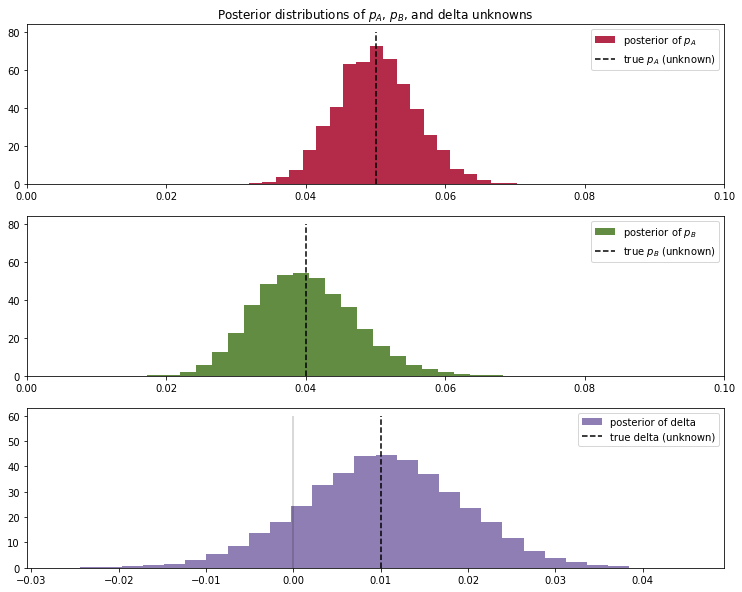

In [8]:
figsize(12.5, 10)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right")
